In [1]:
#home 
setwd("C://Users//Cherch//DataScience//project")

#work 
#setwd("C://bb//DataScience//project")



#install.packages("openxlsx")
#install.packages("caret")

require("caret")
require("openxlsx")
require("tidyverse")
require(devtools)
library(dplyr)
library(car)


protocol<-read.xlsx("../project/BoxOffice - Data Retrieval Protocol.xlsx", sheet = "protocol")

head(protocol)

rownames(protocol) <- str_trim(protocol$Feature.name)

load("../data/BoxOffice_ff.RData")



Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: openxlsx

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()

Loading required package: devtools

Loading required package: usethis

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




Feature.name                       Source                              
1 movie_id                           movies                              
2 depart_Lighting_female             movie_crew LEFT OUTER JOIN crew_dim 
3 original_language                  movies                              
4 sw_collection                      movie_collection                    
5 depart_Visual_Effects_female       movie_crew LEFT OUTER JOIN crew_dim 
6 runtime_cat                        movies                              
  Value.type  Scale   Data.type Unique.count Measure.unit Conversion.factor Min
1 Categorical Nominal Decimal   NA           NA           NA                 1 
2 Numeric     Ratio   Decimal    2           NA           NA                 0 
3 Categorical Nominal Text      44           NA           NA                NA 
4 Categorical Ratio   Decimal    3           NA           NA                 0 
5 Numeric     Ratio   Decimal    3           NA           NA                 0 
6 Categorical Ordinal Text       3           NA           NA                 1 
  Max  Outlier.treatment Null
1 7398 NA                NA  
2    1 Categorize        NA  
3   NA Leave             NA  
4    2 Leave             NA  
5    2 Categorize        NA  
6    3 Leave             NA  
  Outlier.Notes                                                                   
1 NA                                                                              
2 Set Value type=Categorical due to low variability                               
3 NA                                                                              
4 Movies belongin to multiple collections look like an error (check movie_id= 555)
5 Set Value type=Categorical due to low variability                               
6 NA                                                                              
  Categories.num Categories.names
1 NA             NA              
2 0,1,2          None, Exist     
3 NA             NA              
4 NA             NA              
5 0,1,2          None, Exist     
6 NA             NA

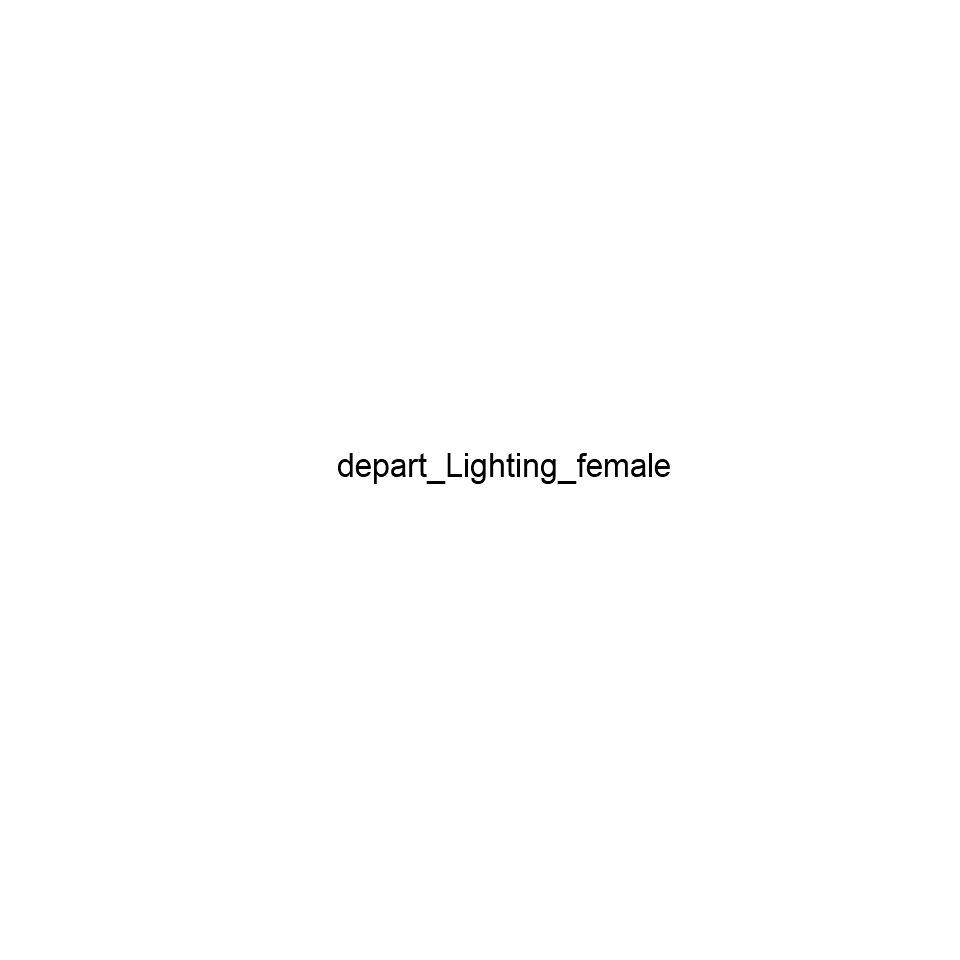

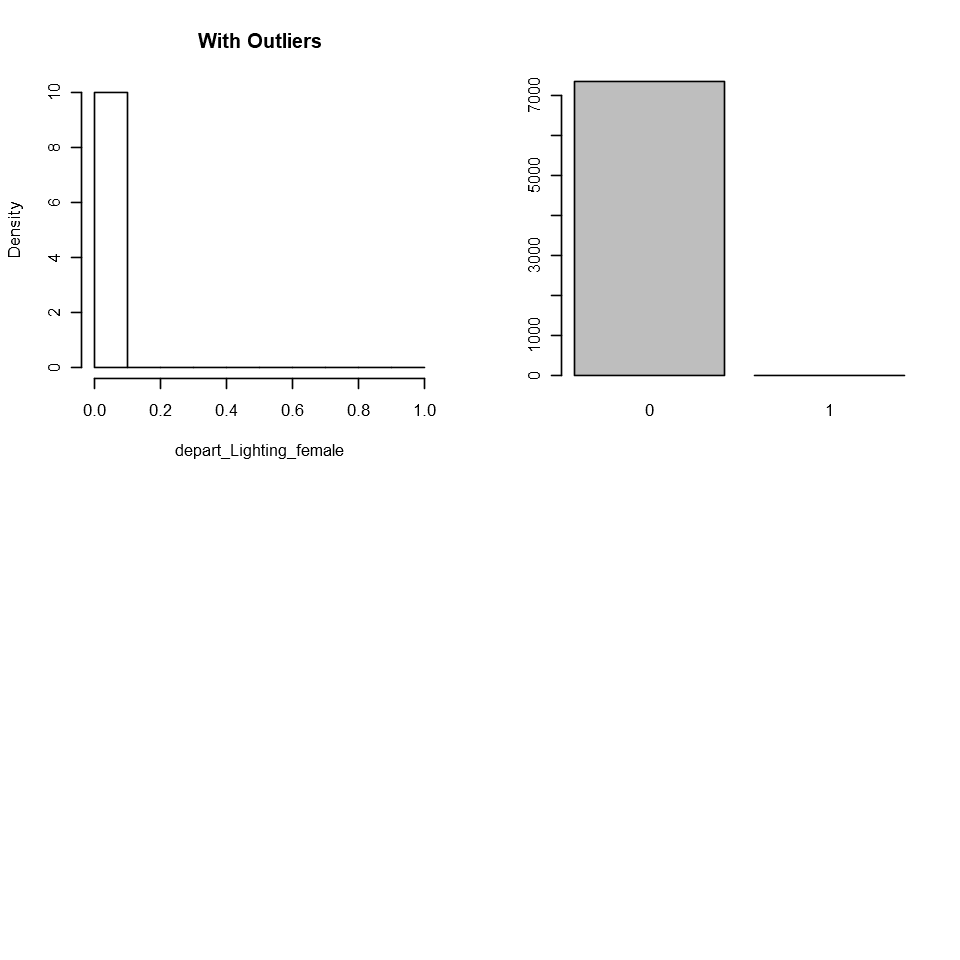

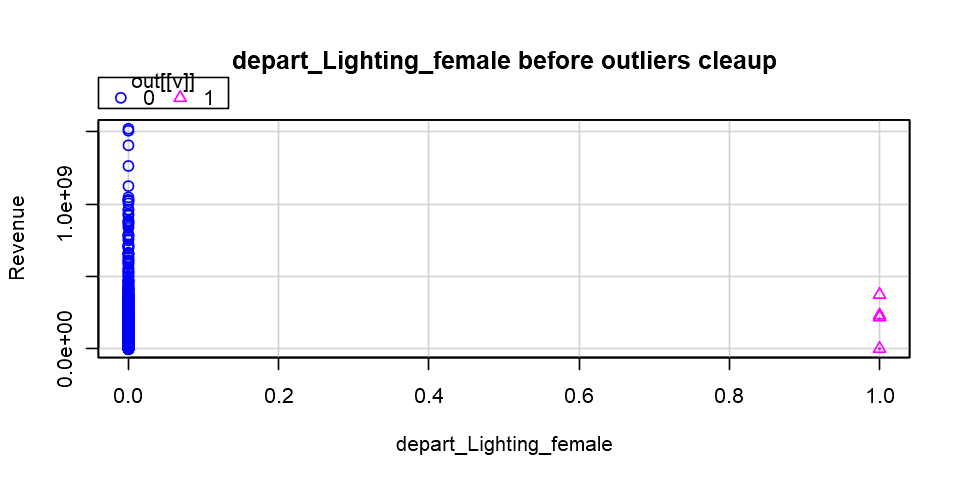

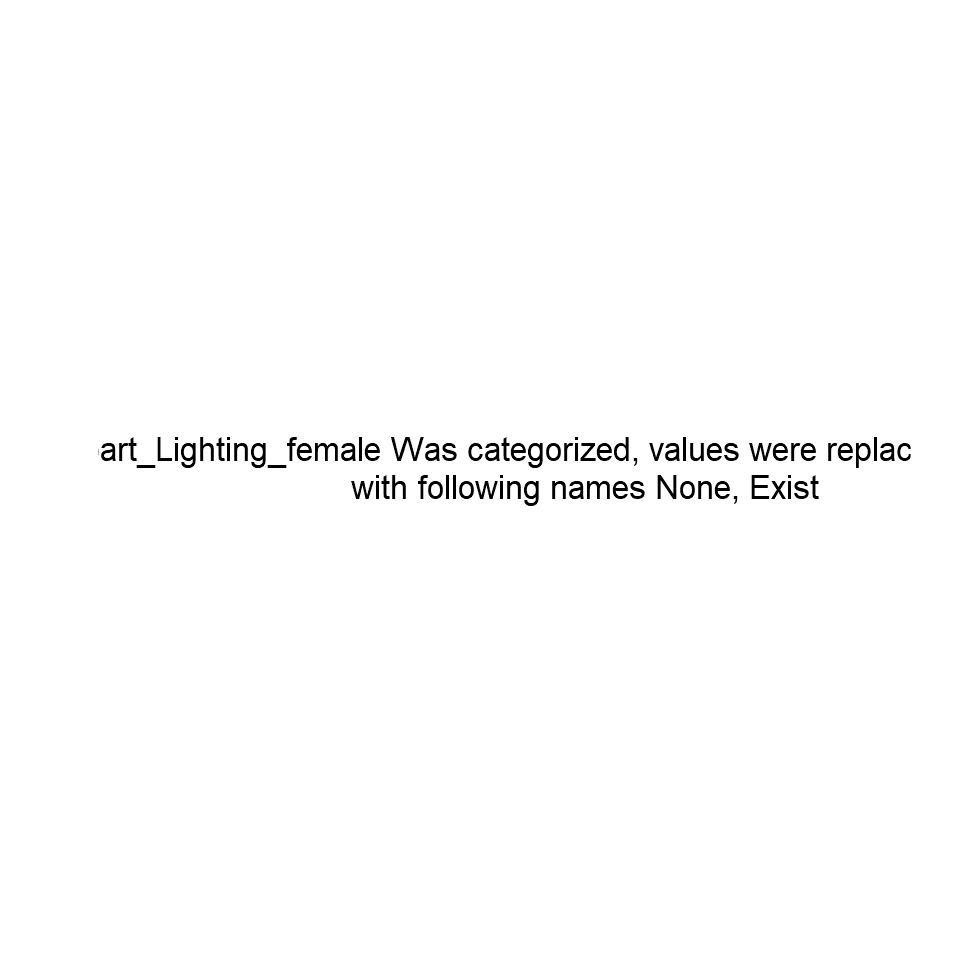

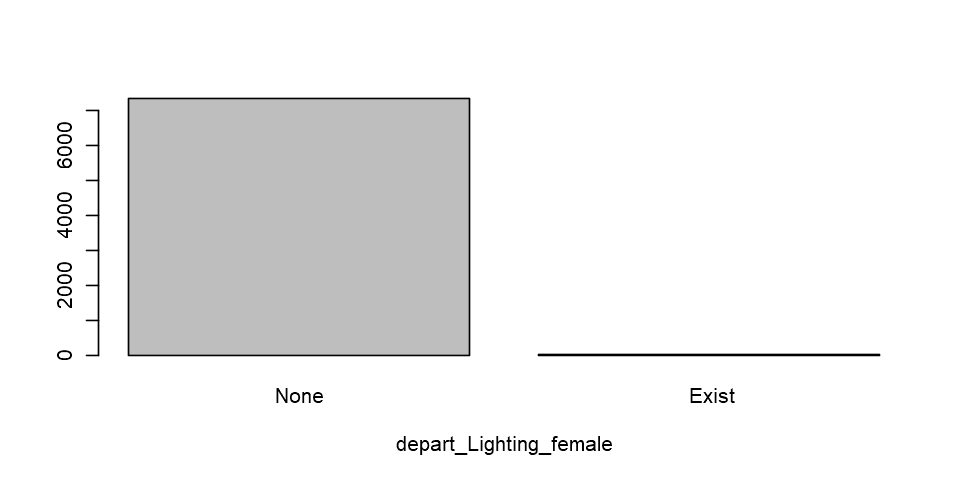

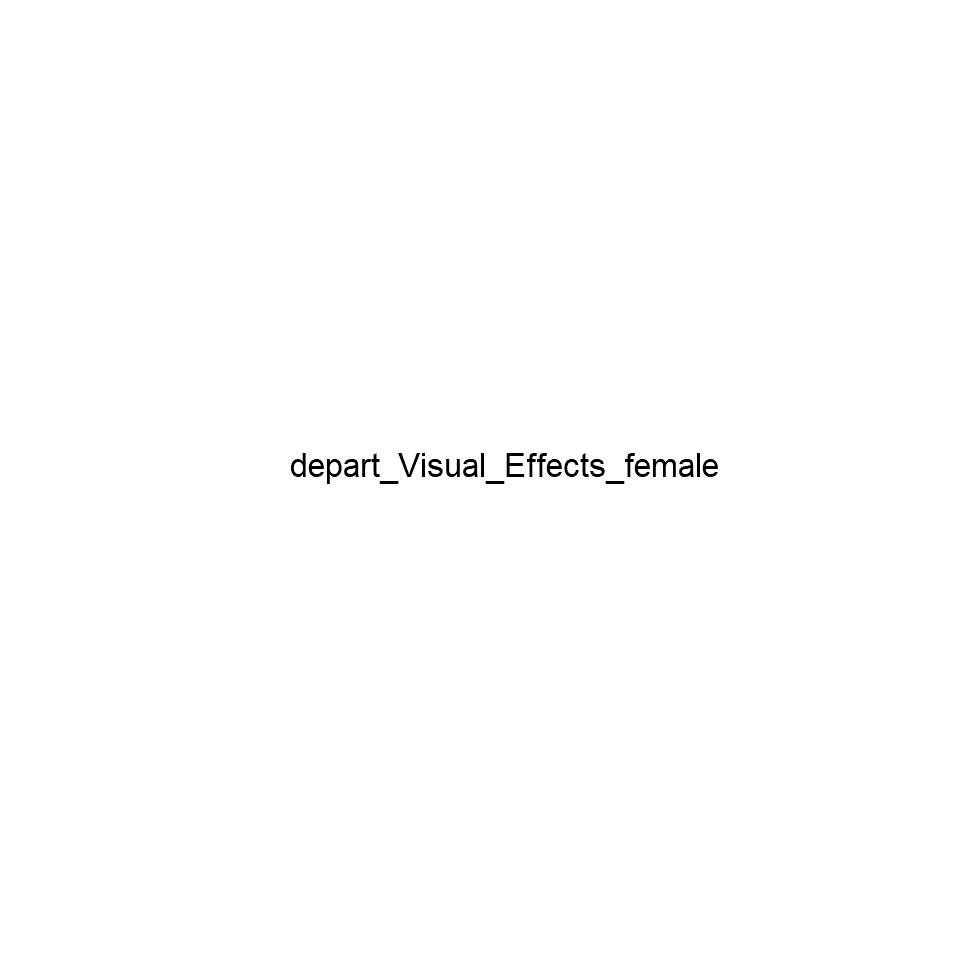

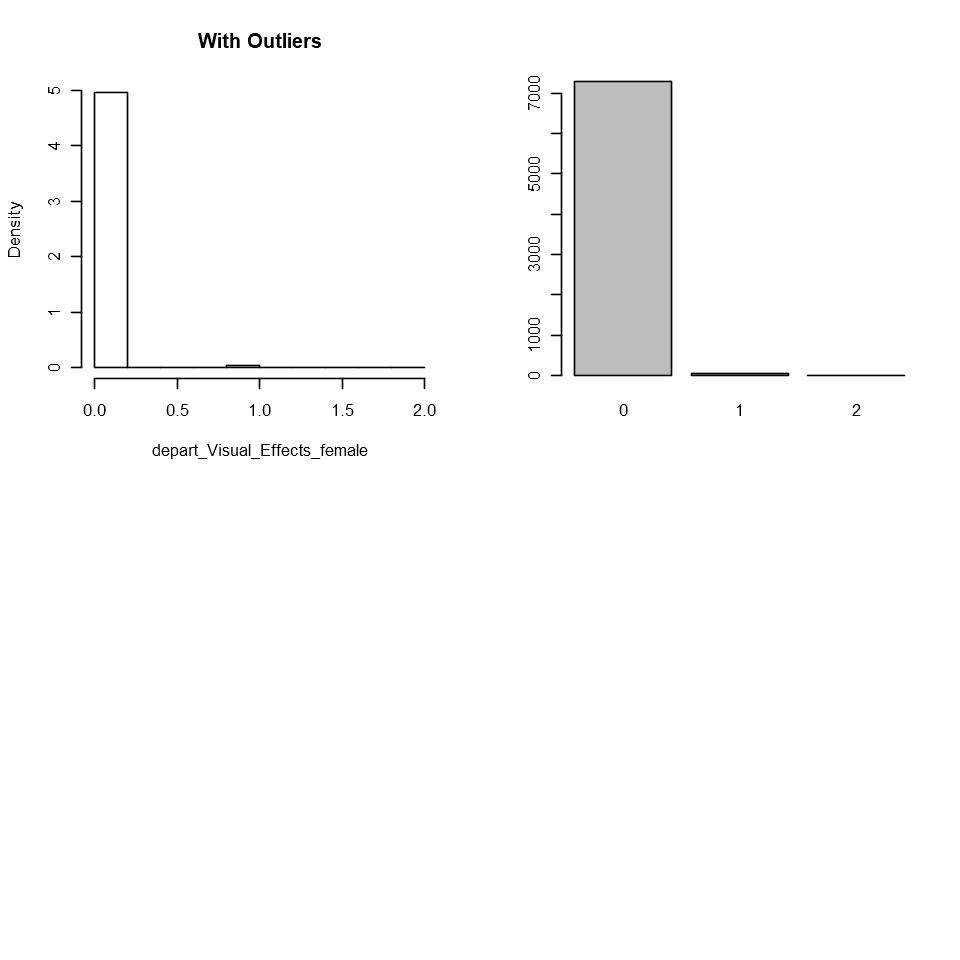

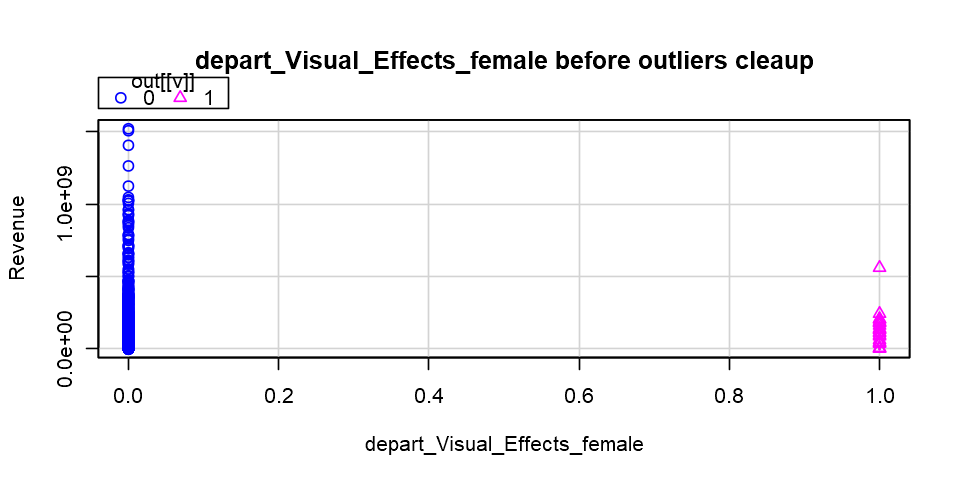

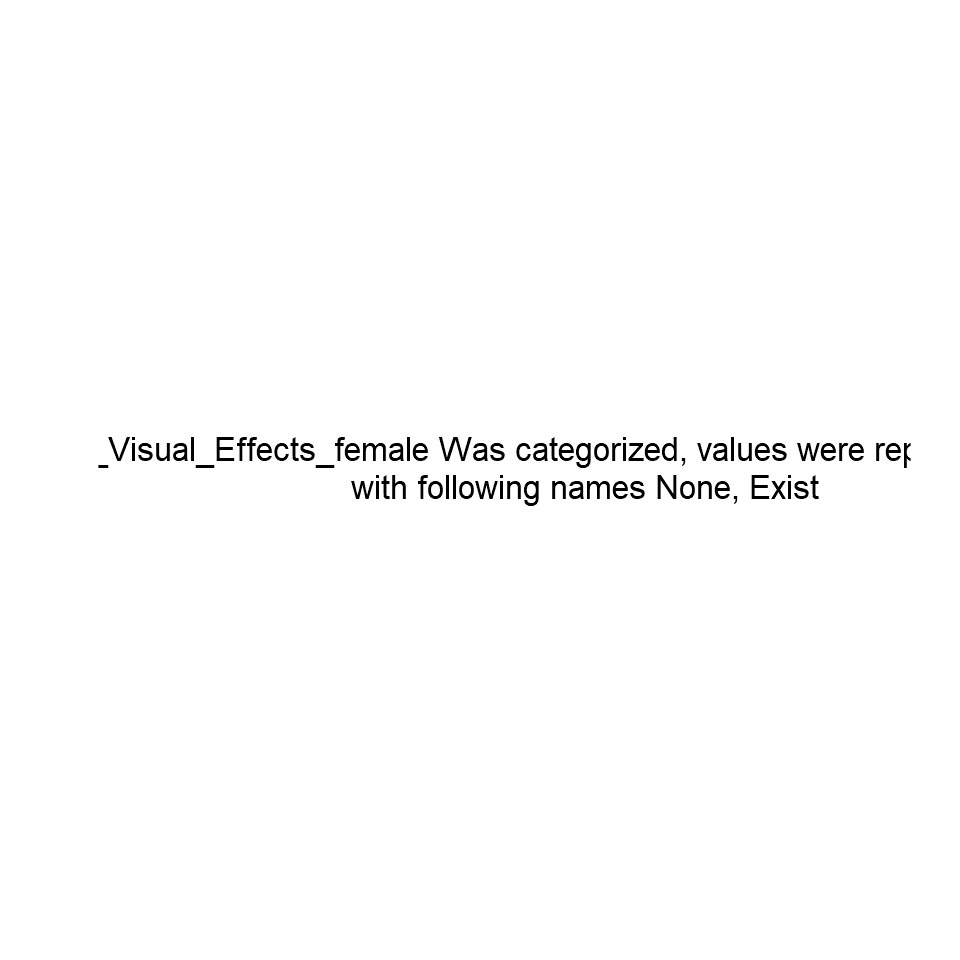

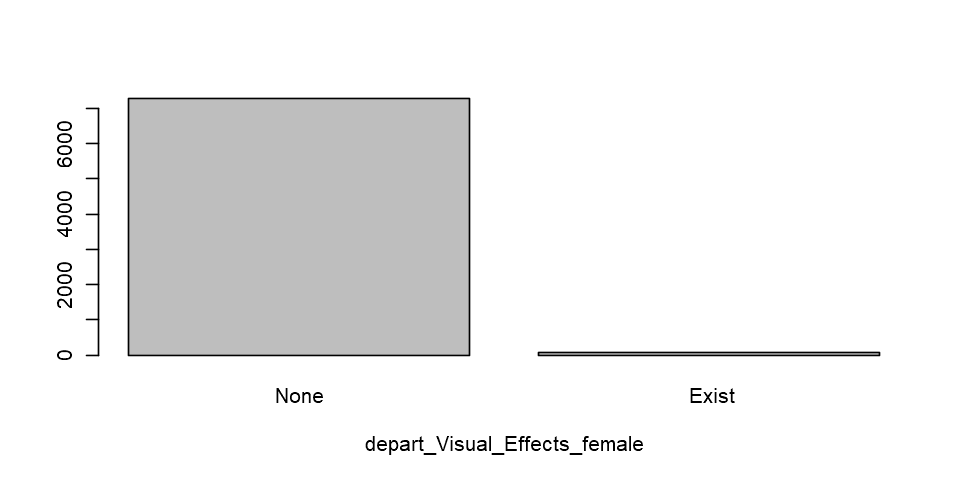

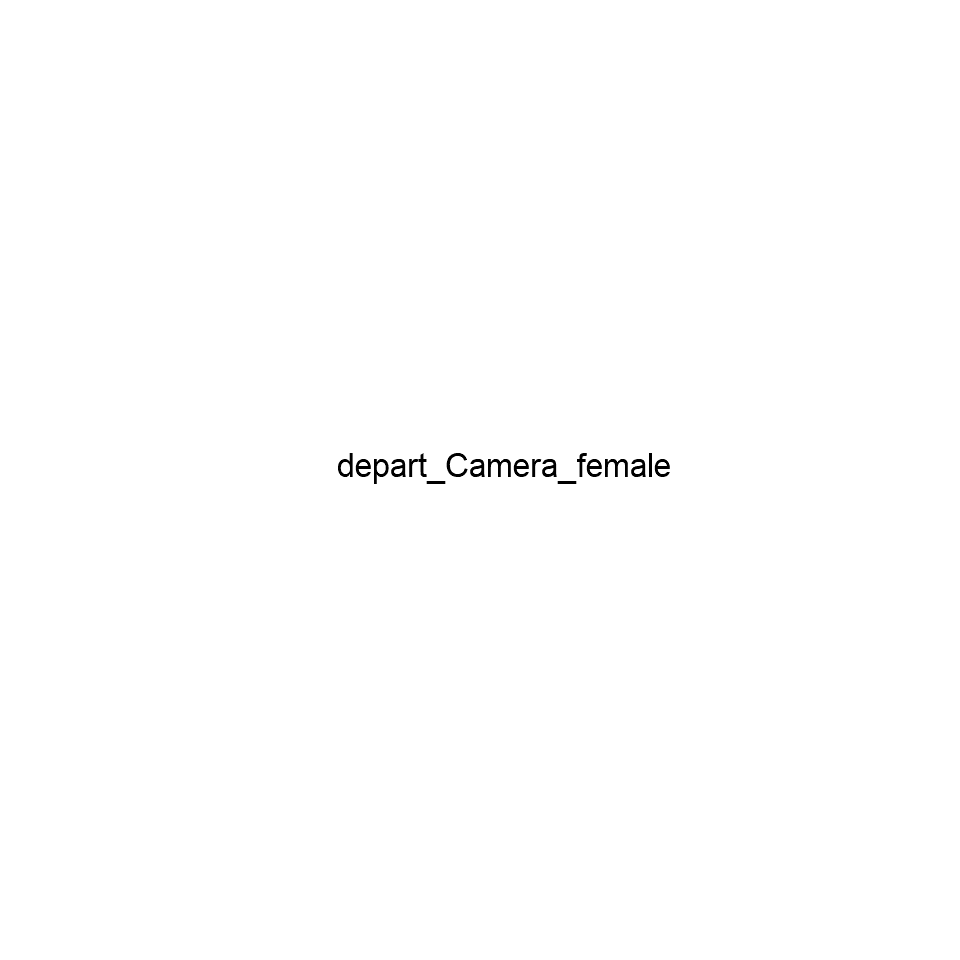

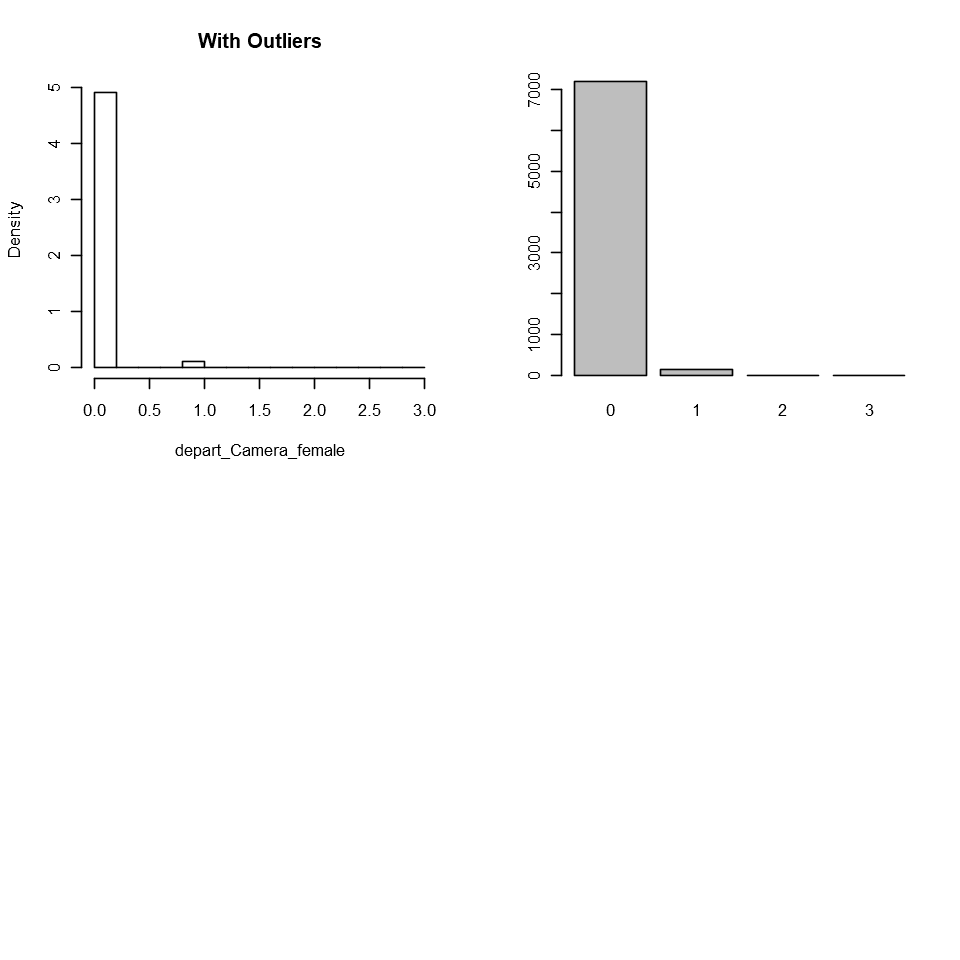

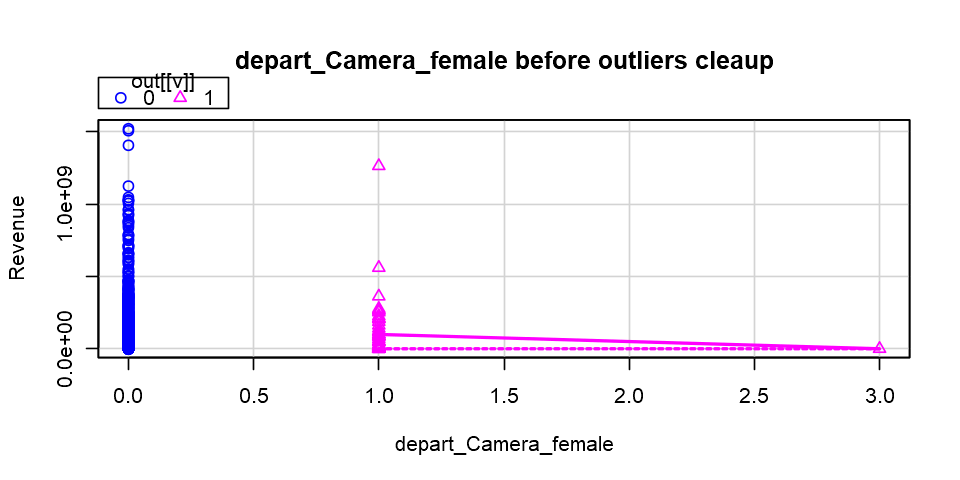

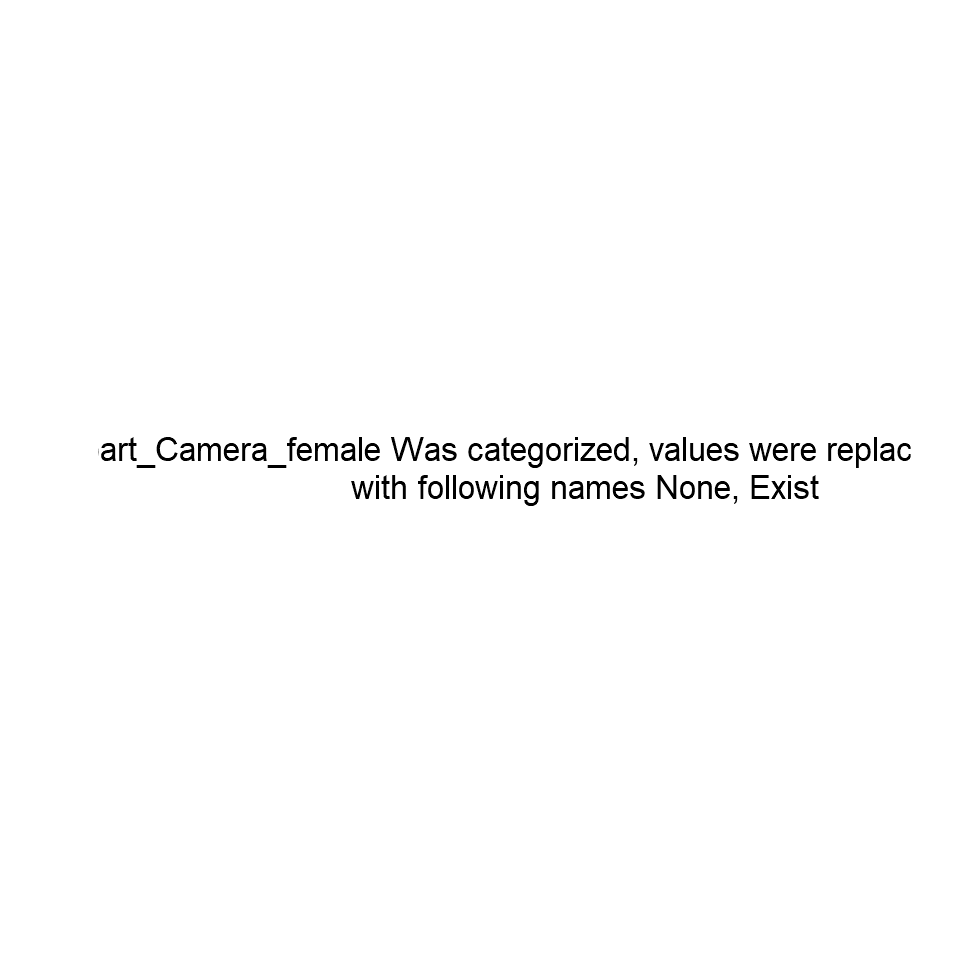

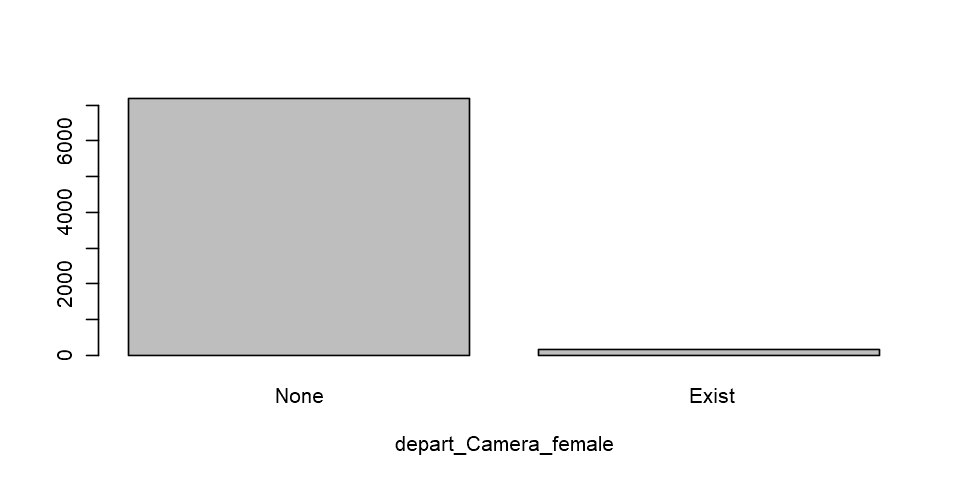

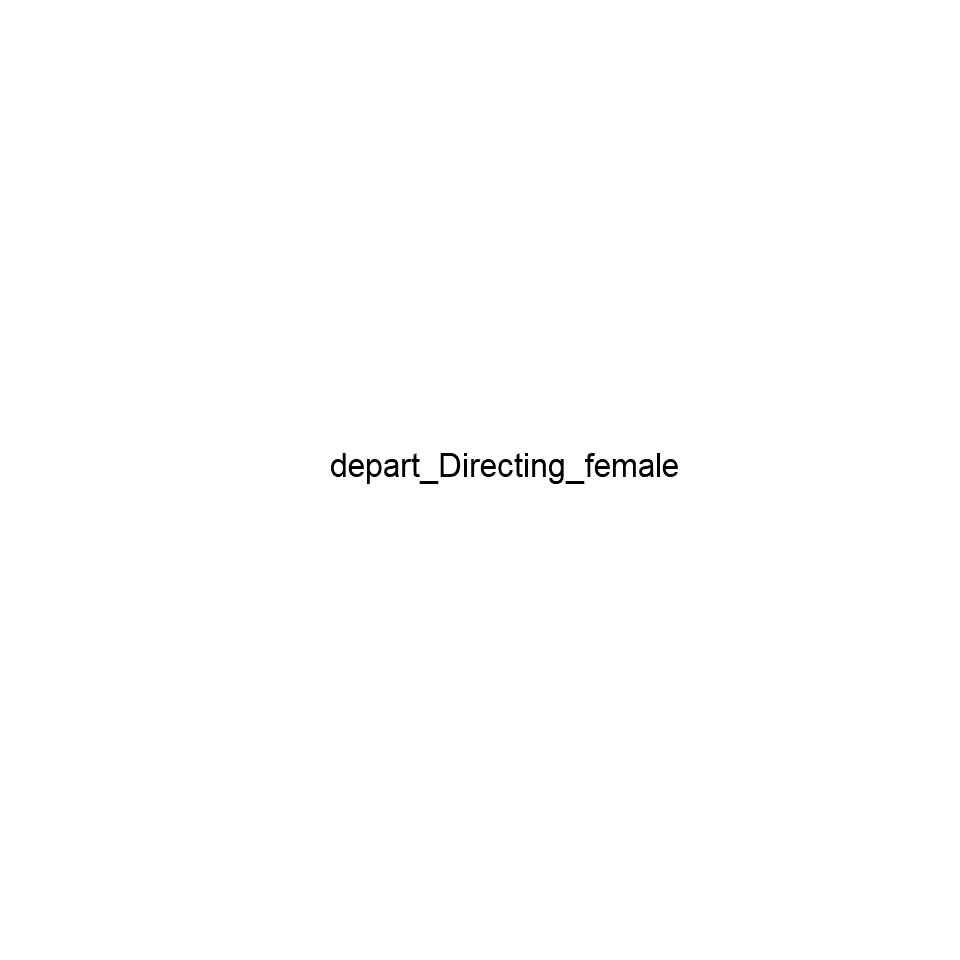

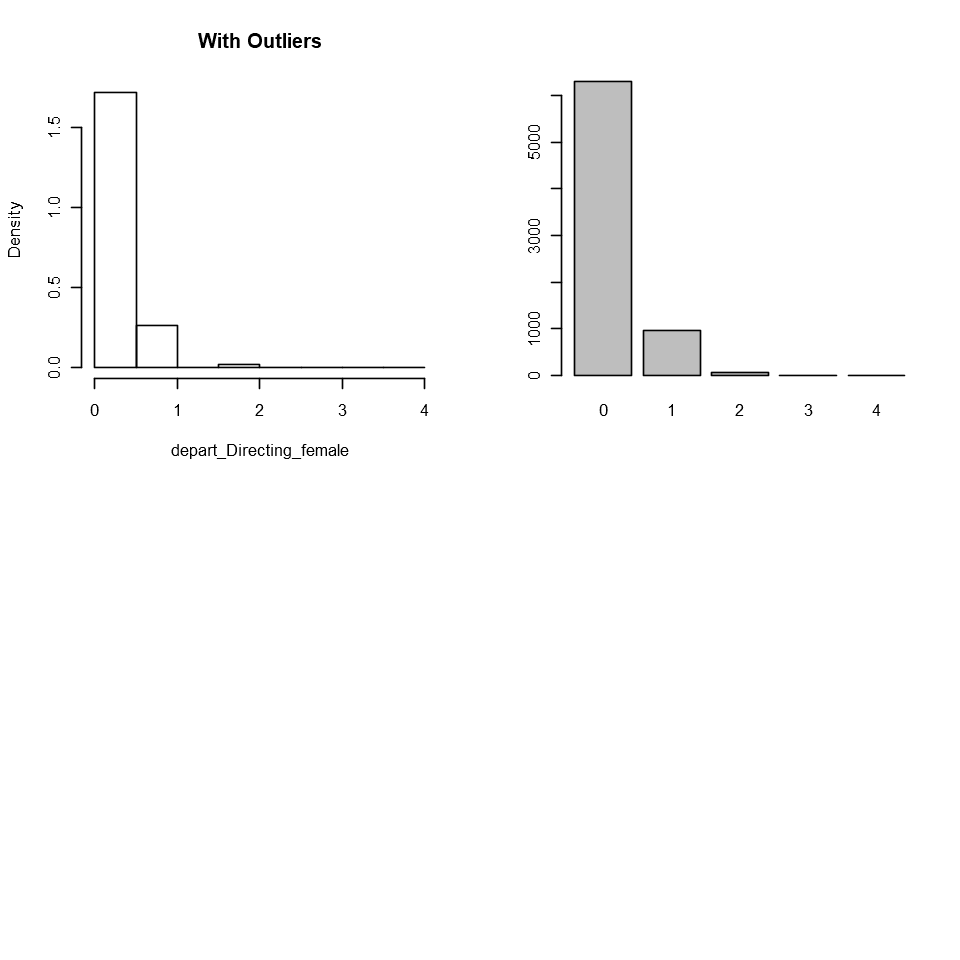

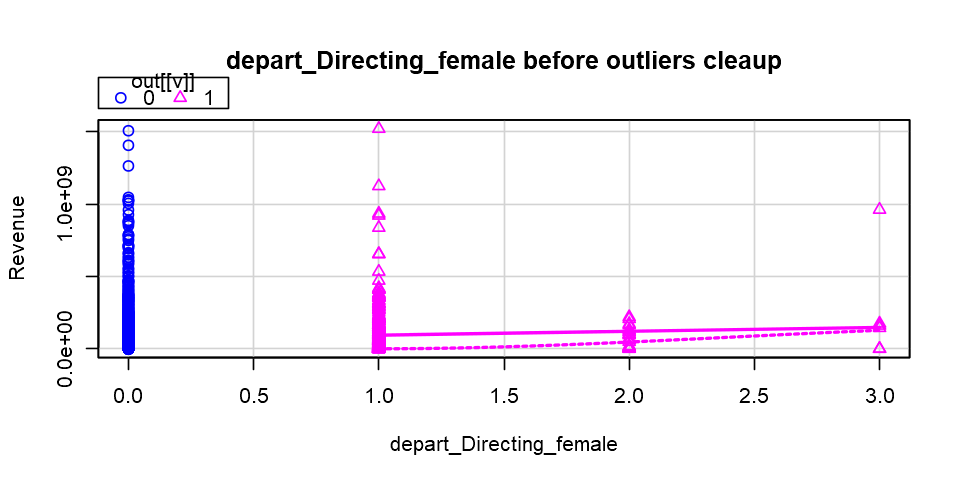

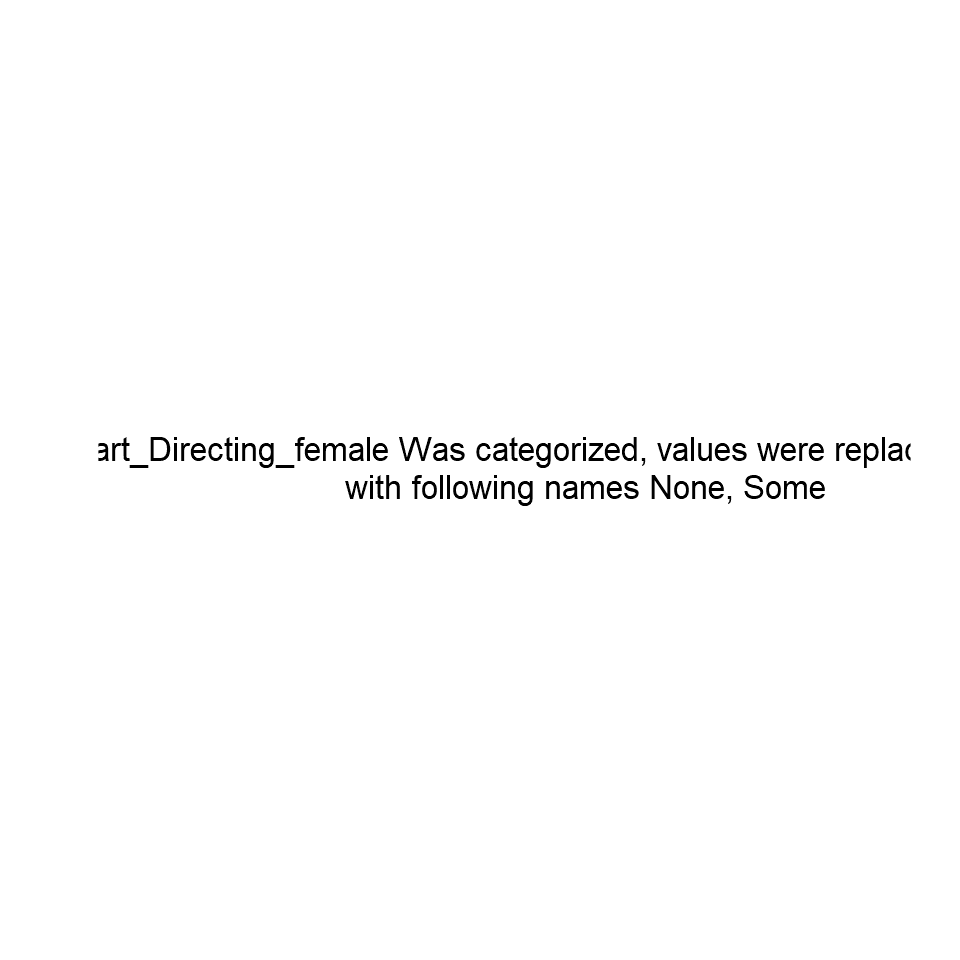

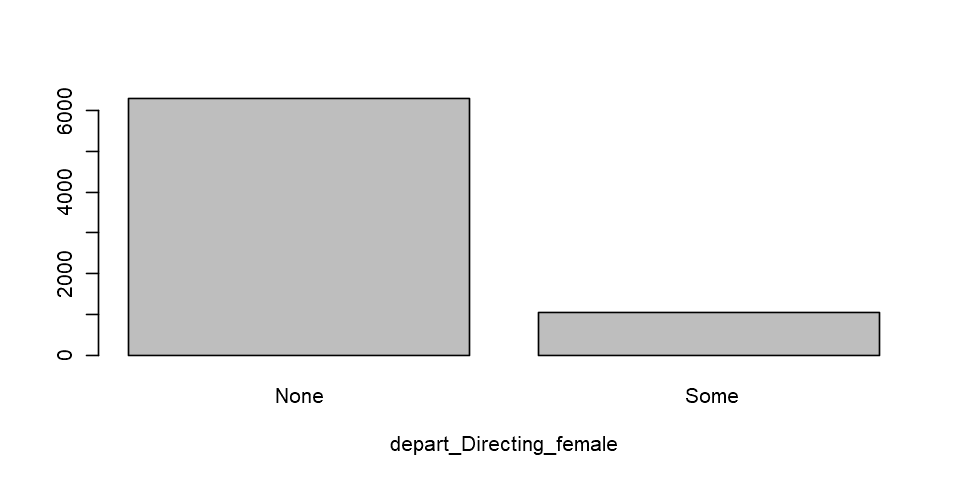

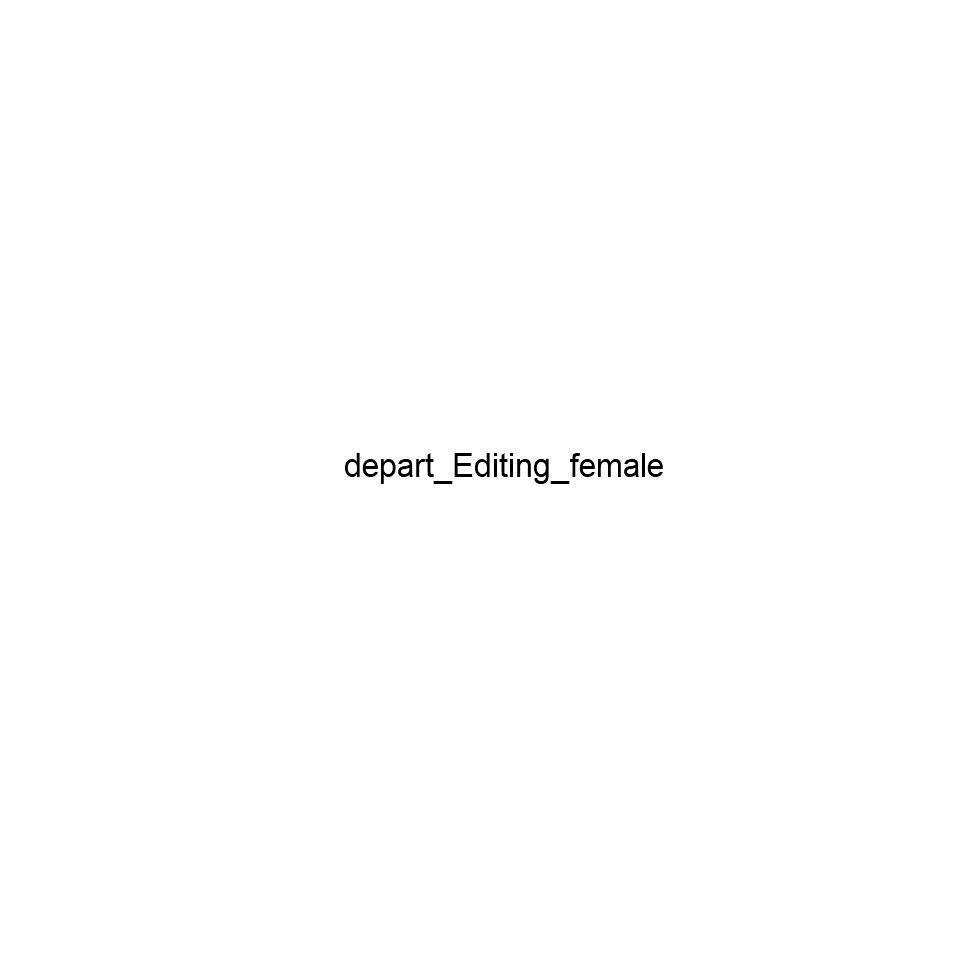

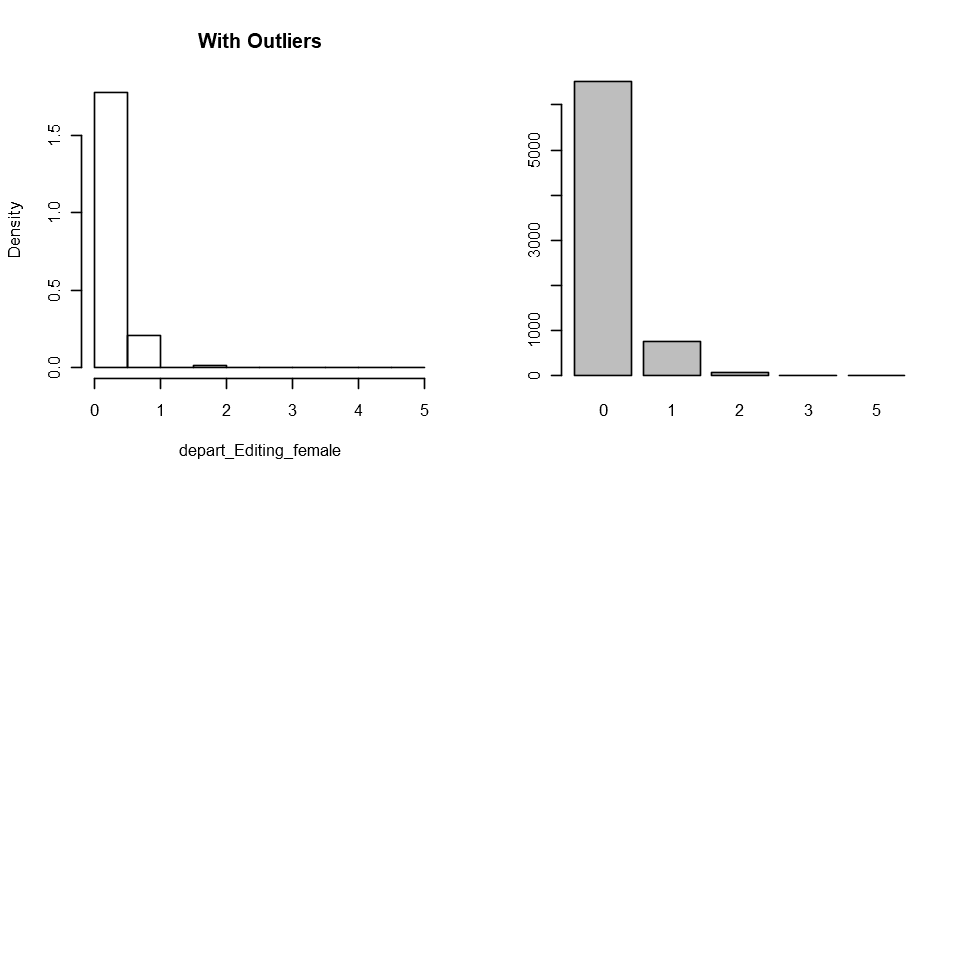

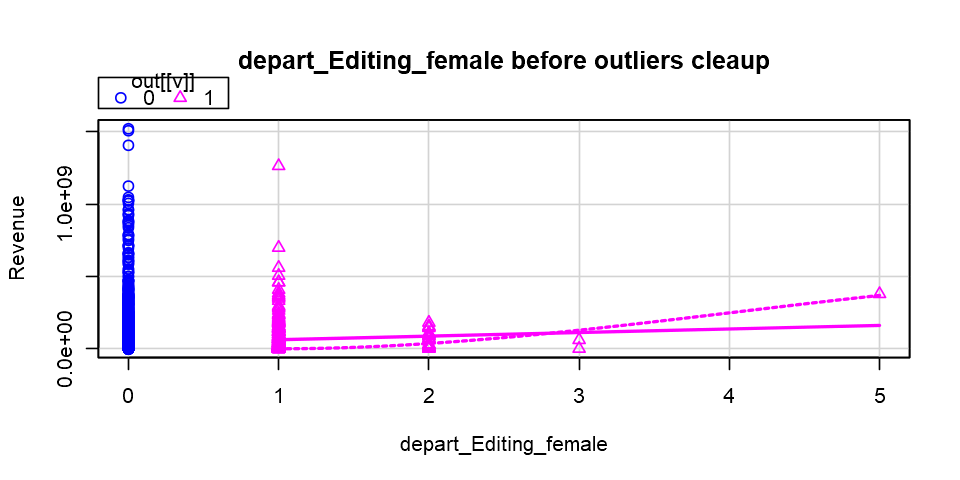

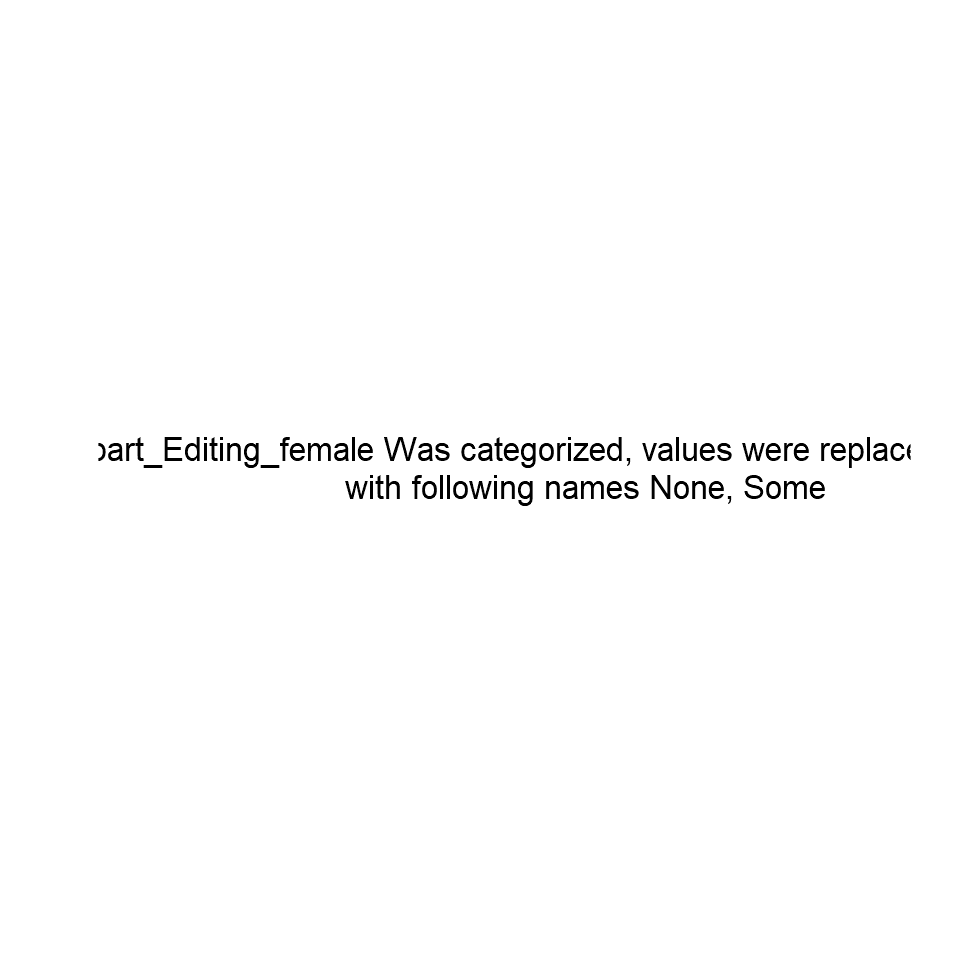

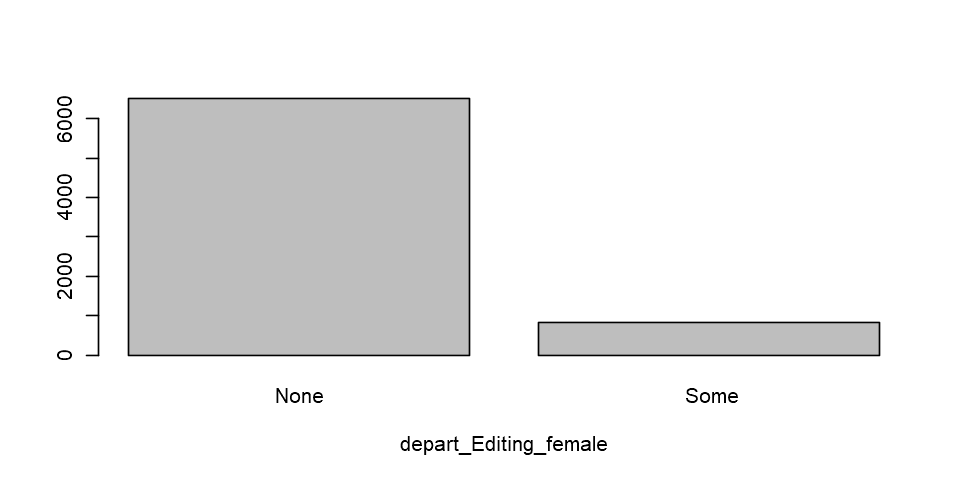

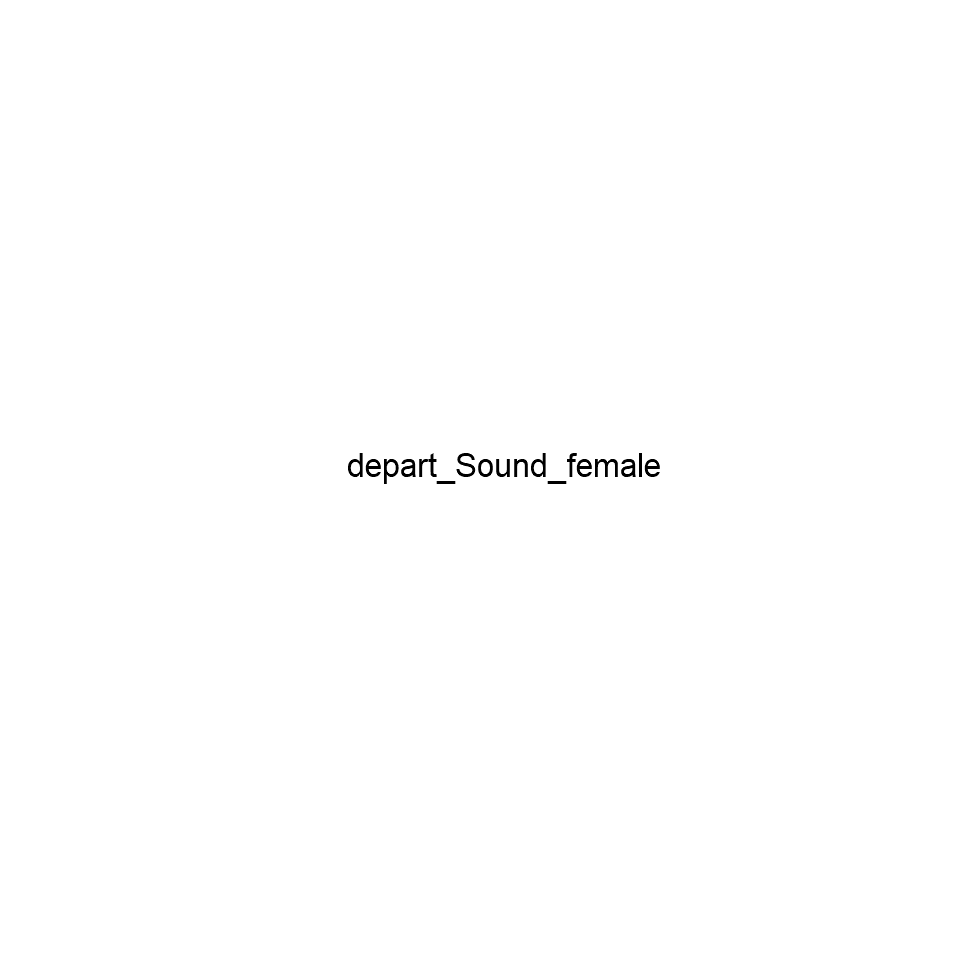

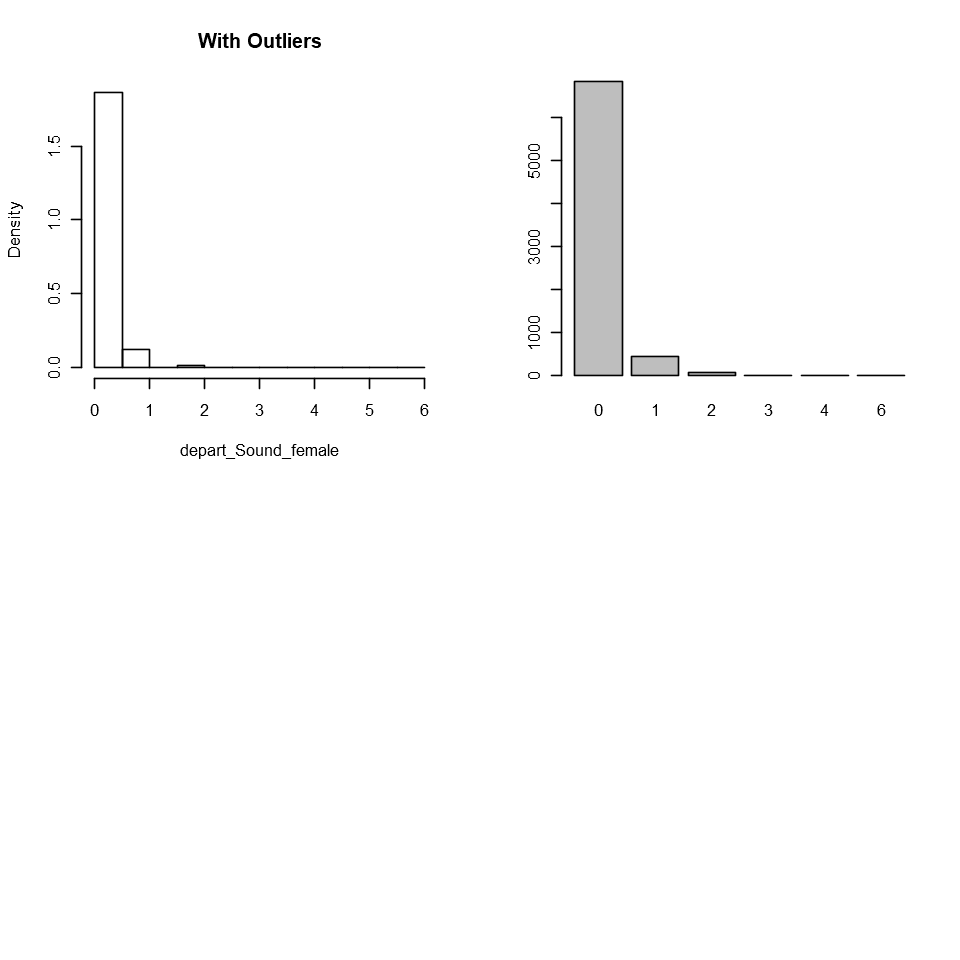

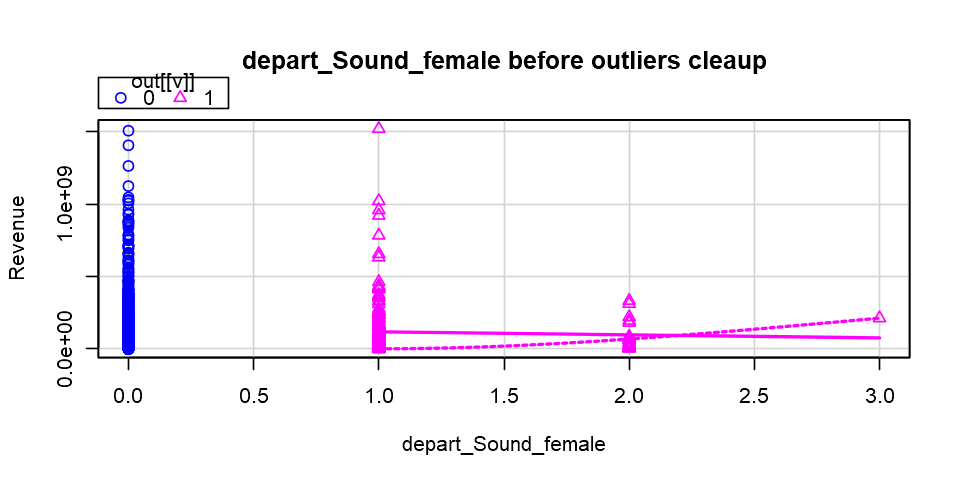

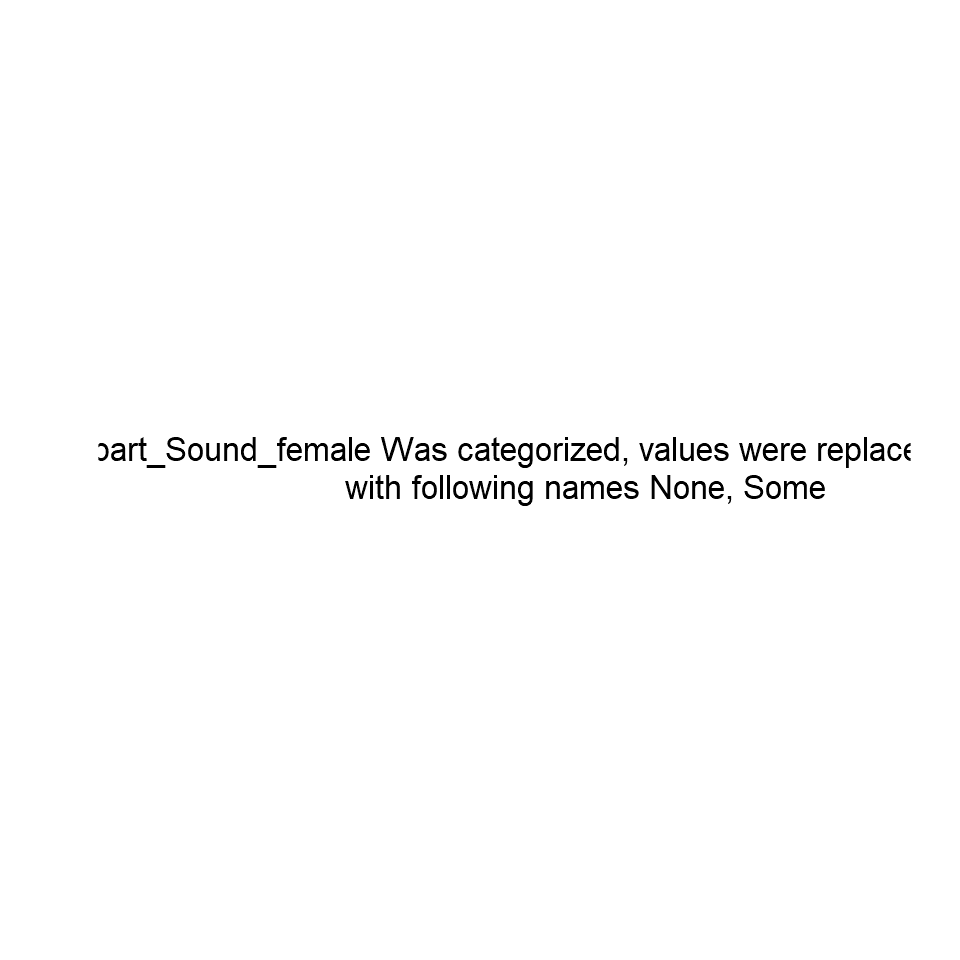

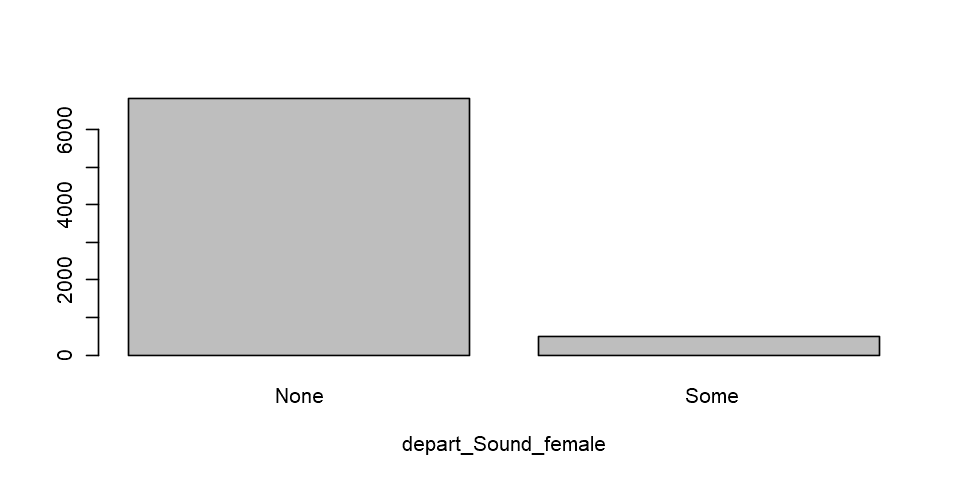

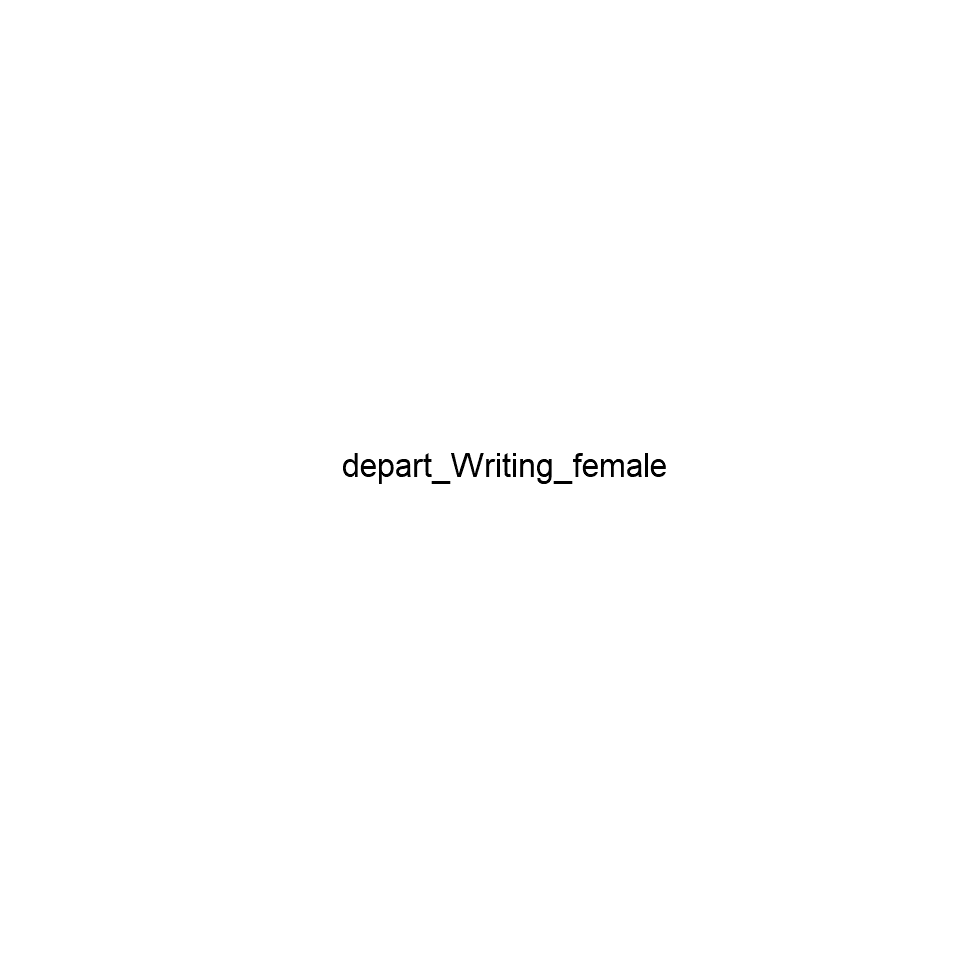

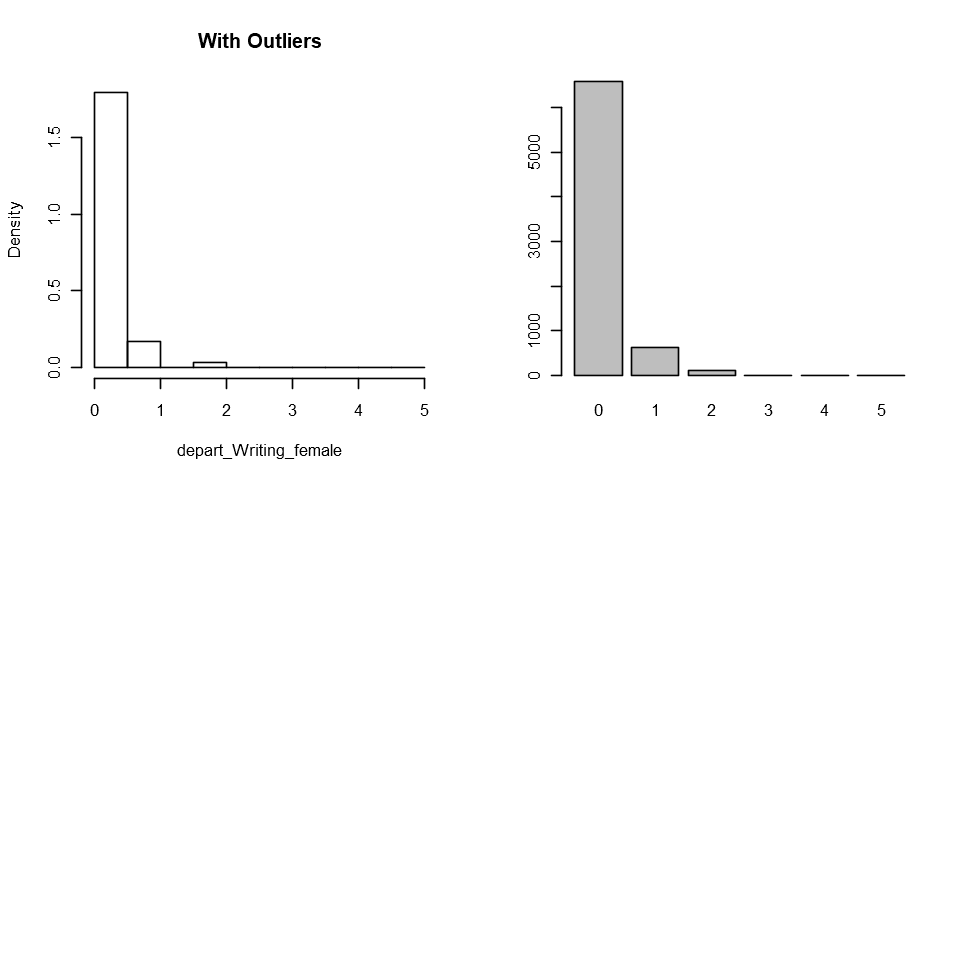

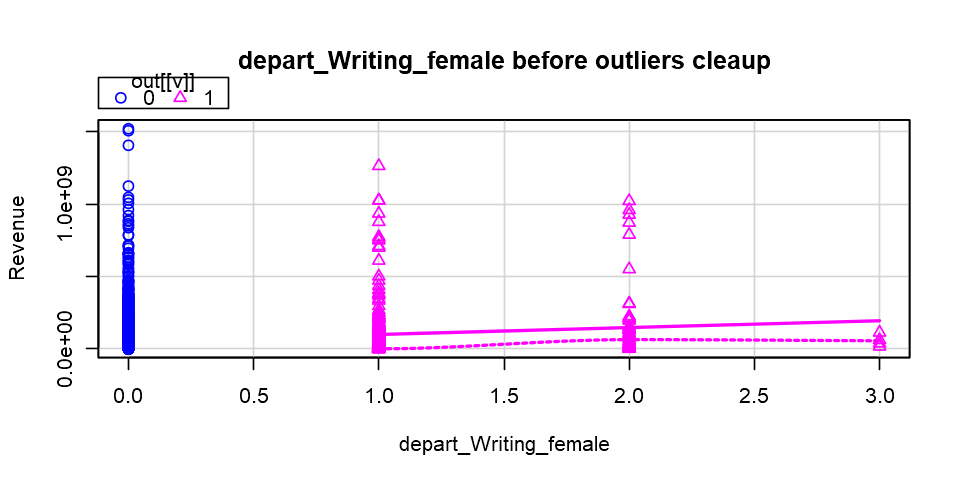

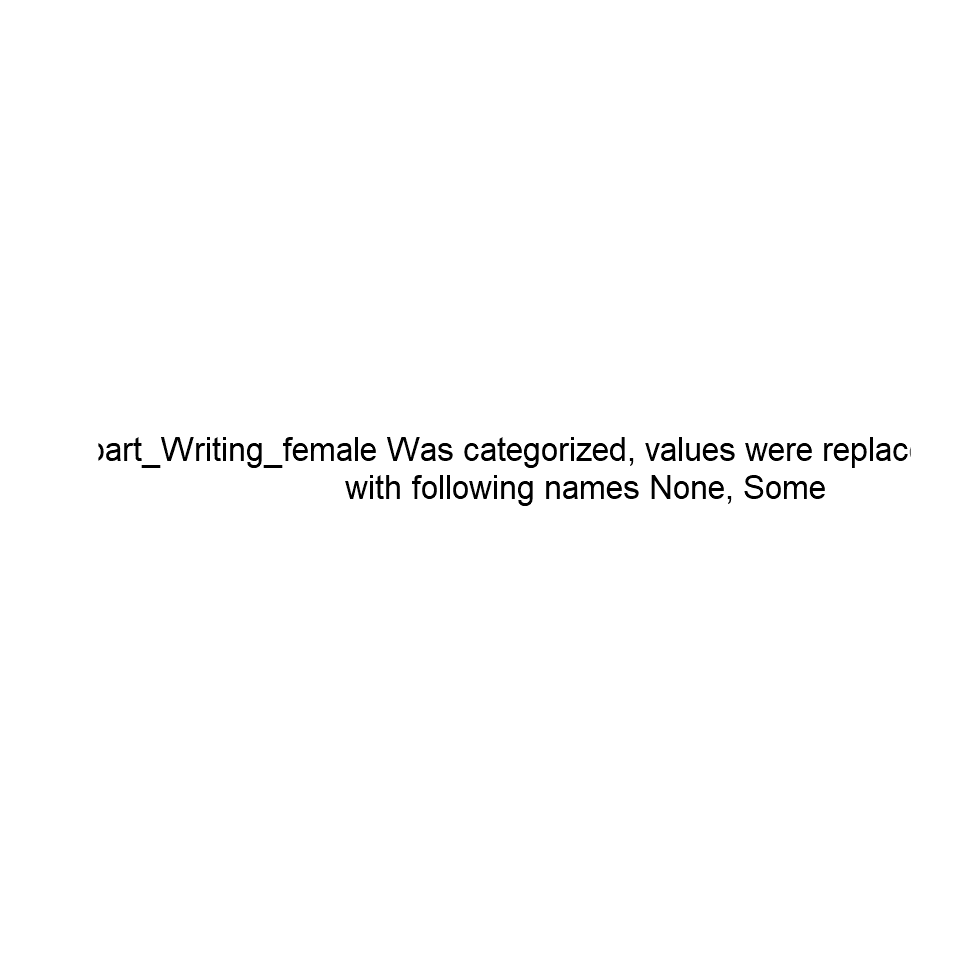

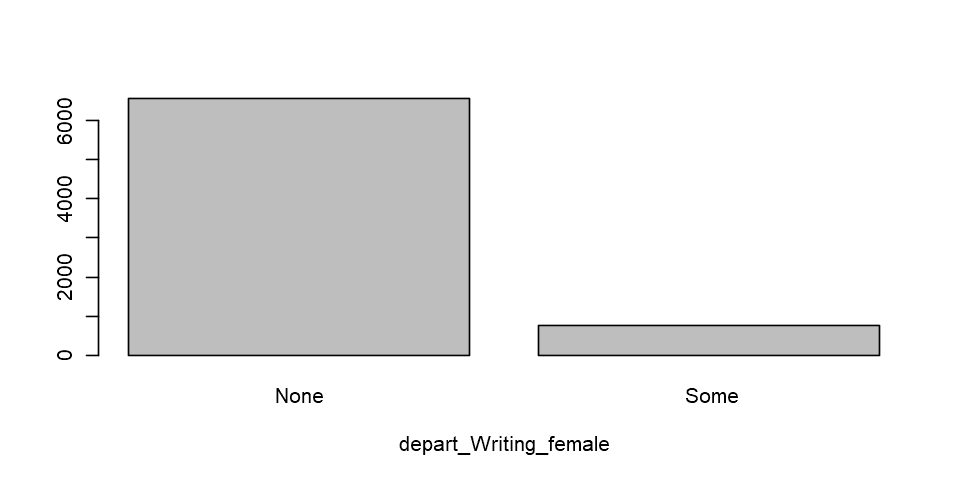

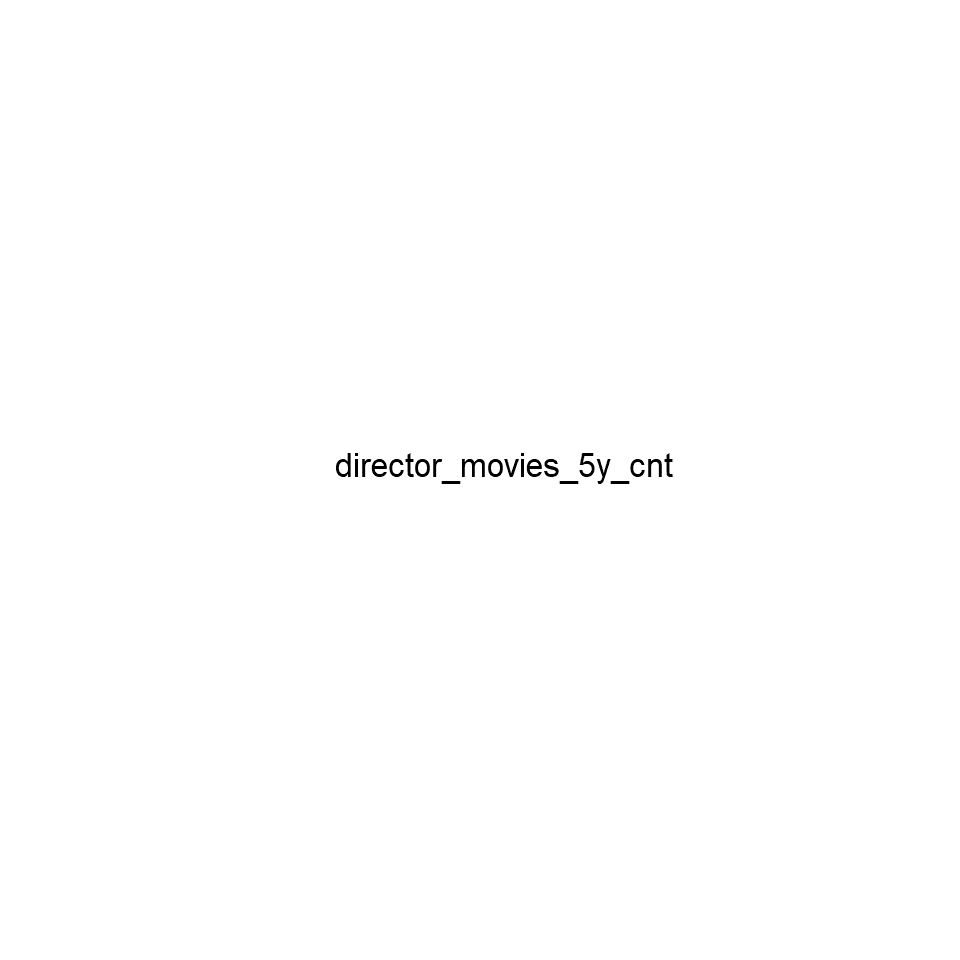

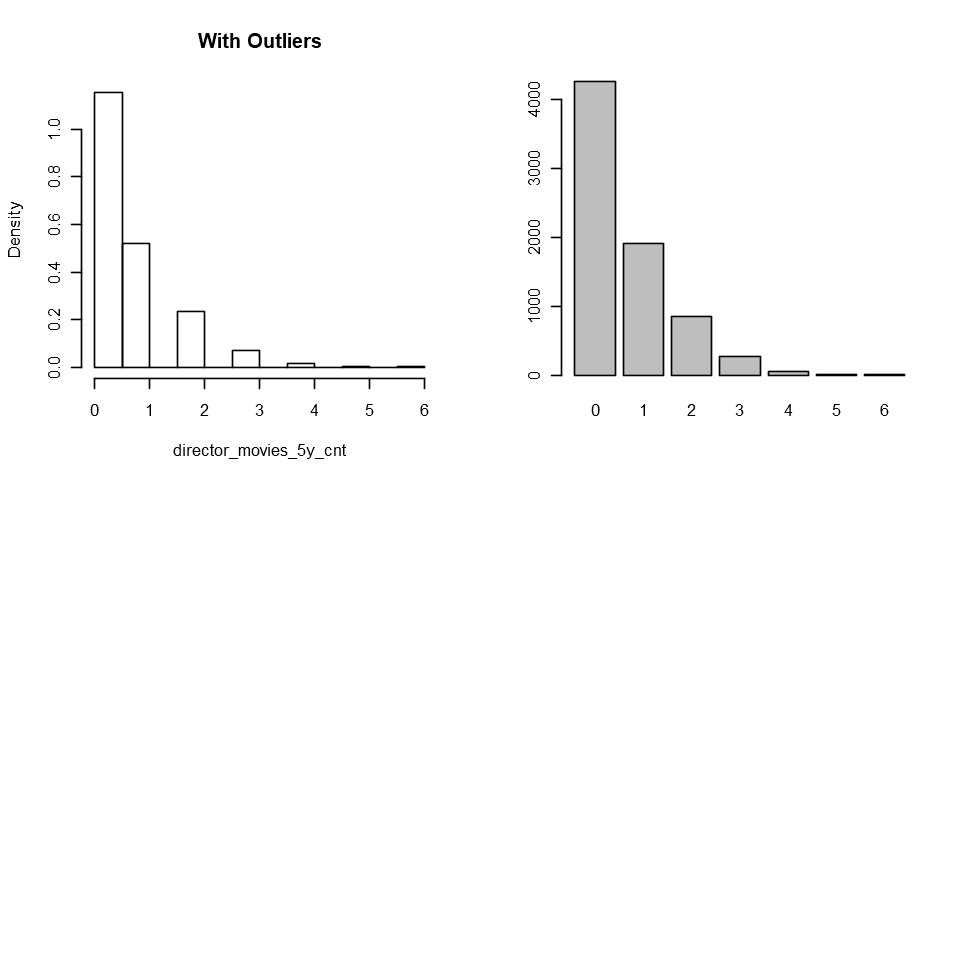

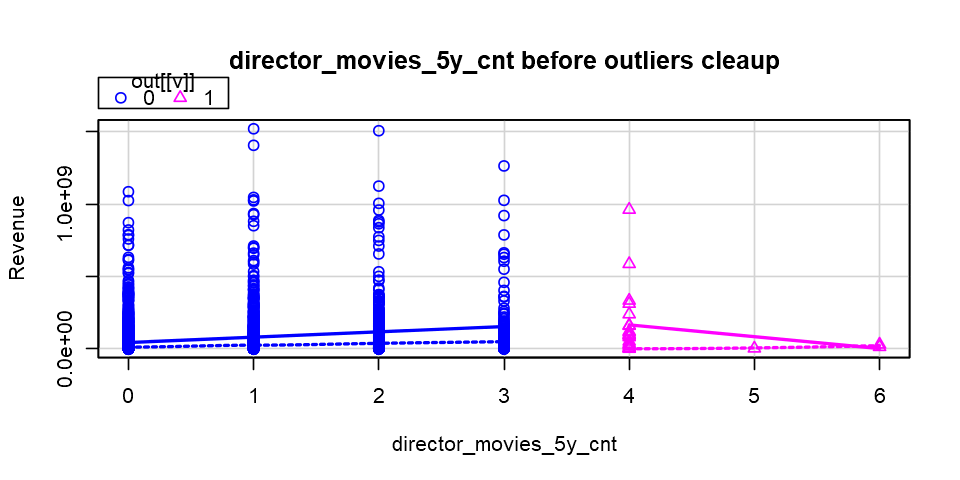

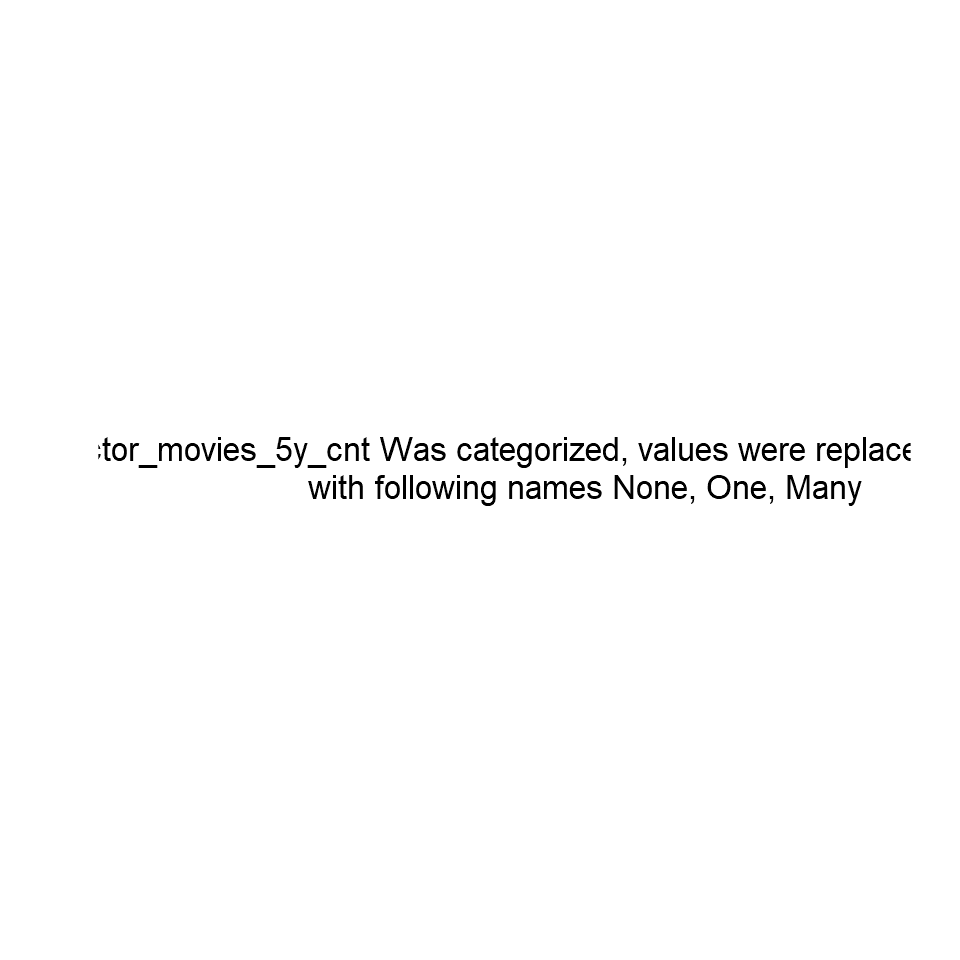

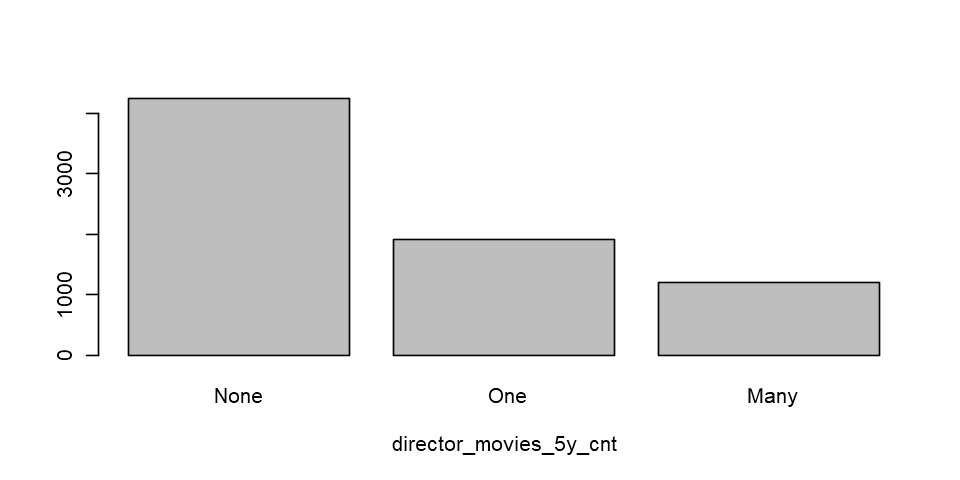

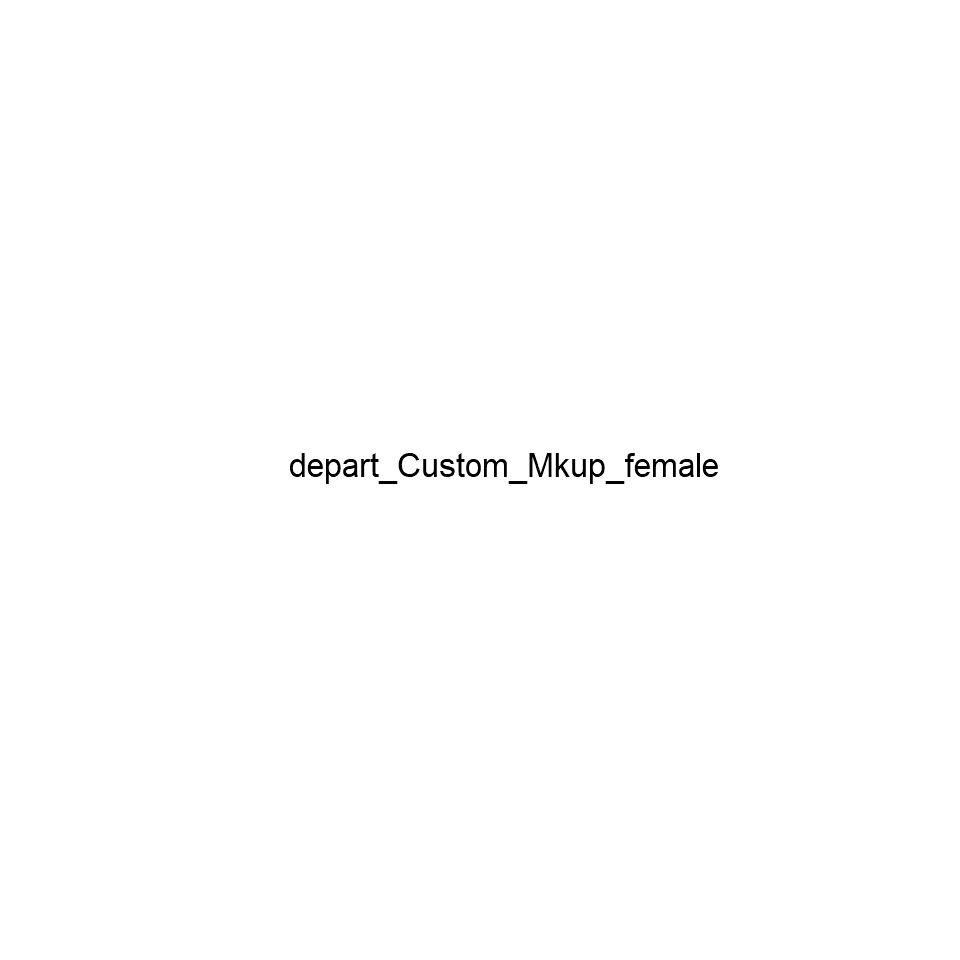

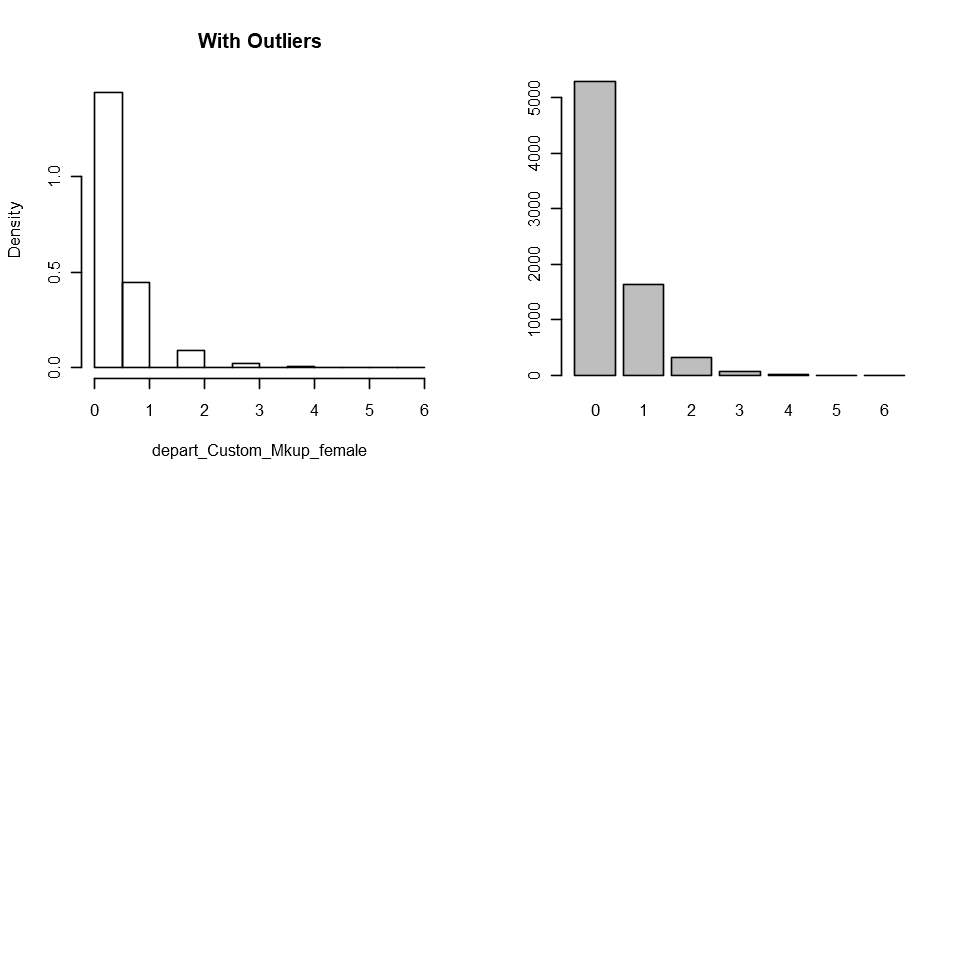

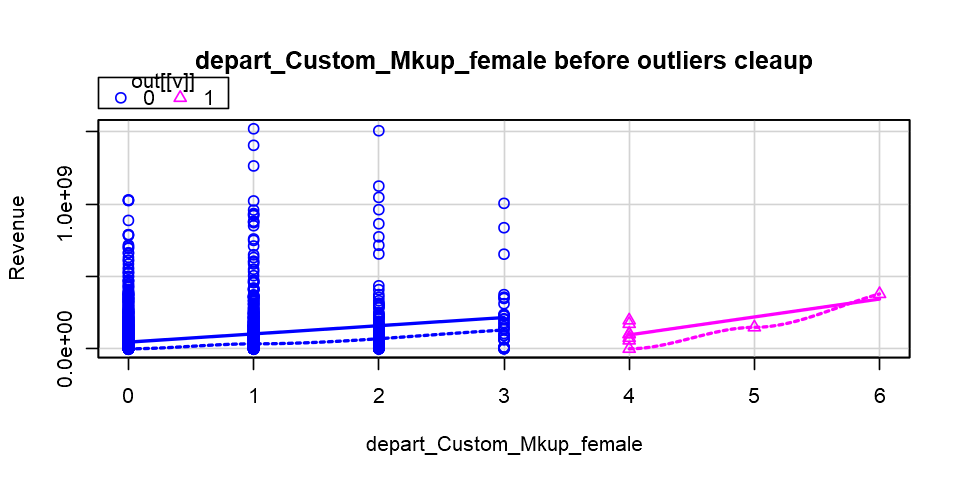

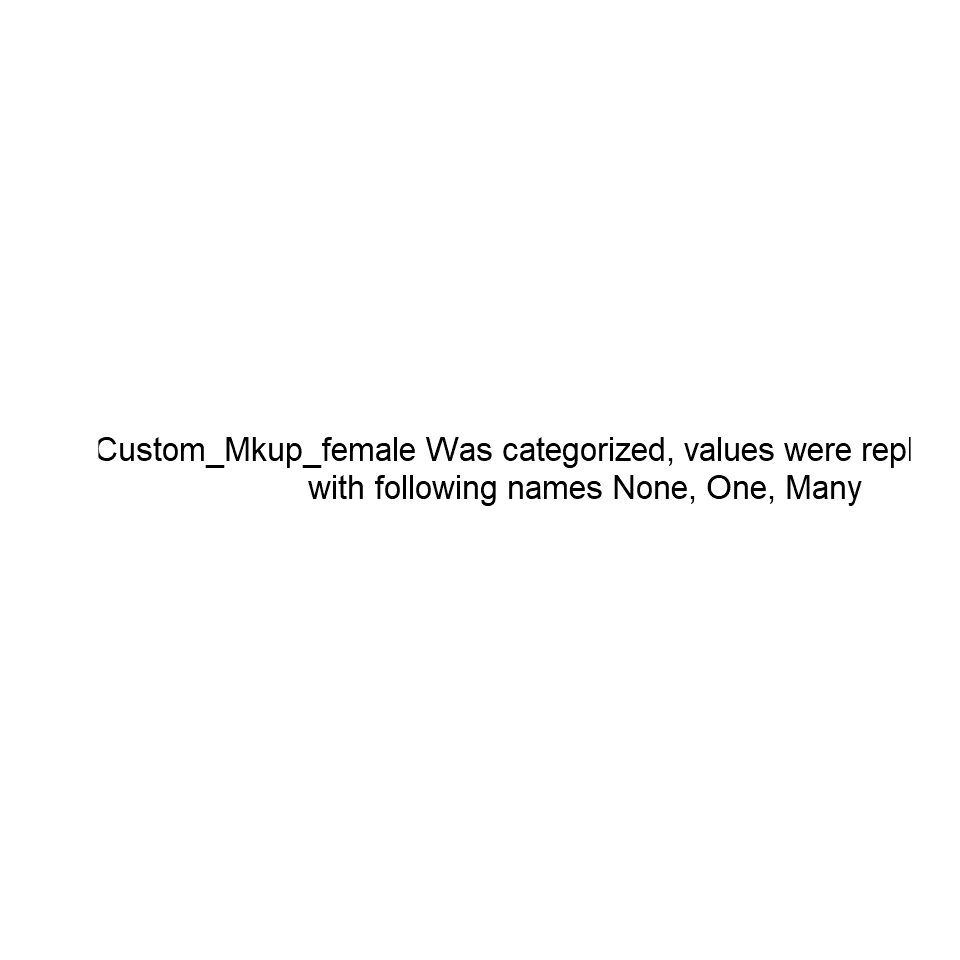

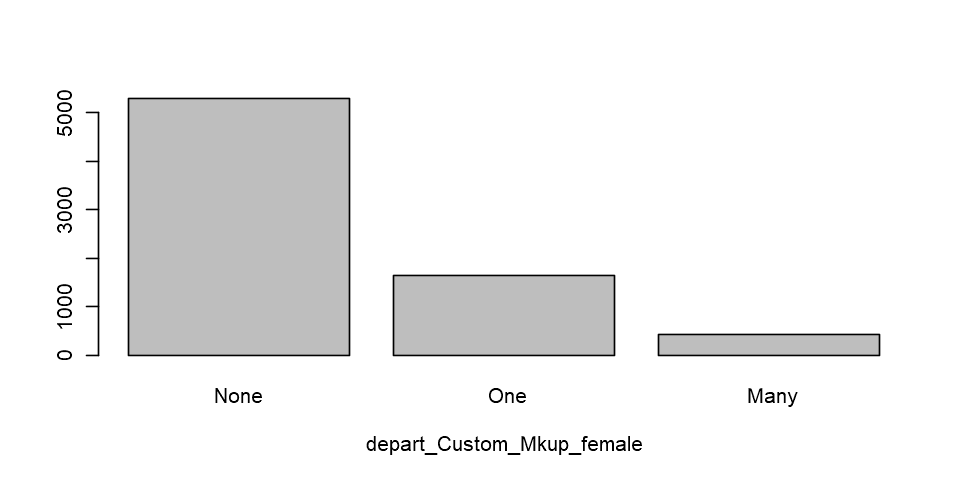

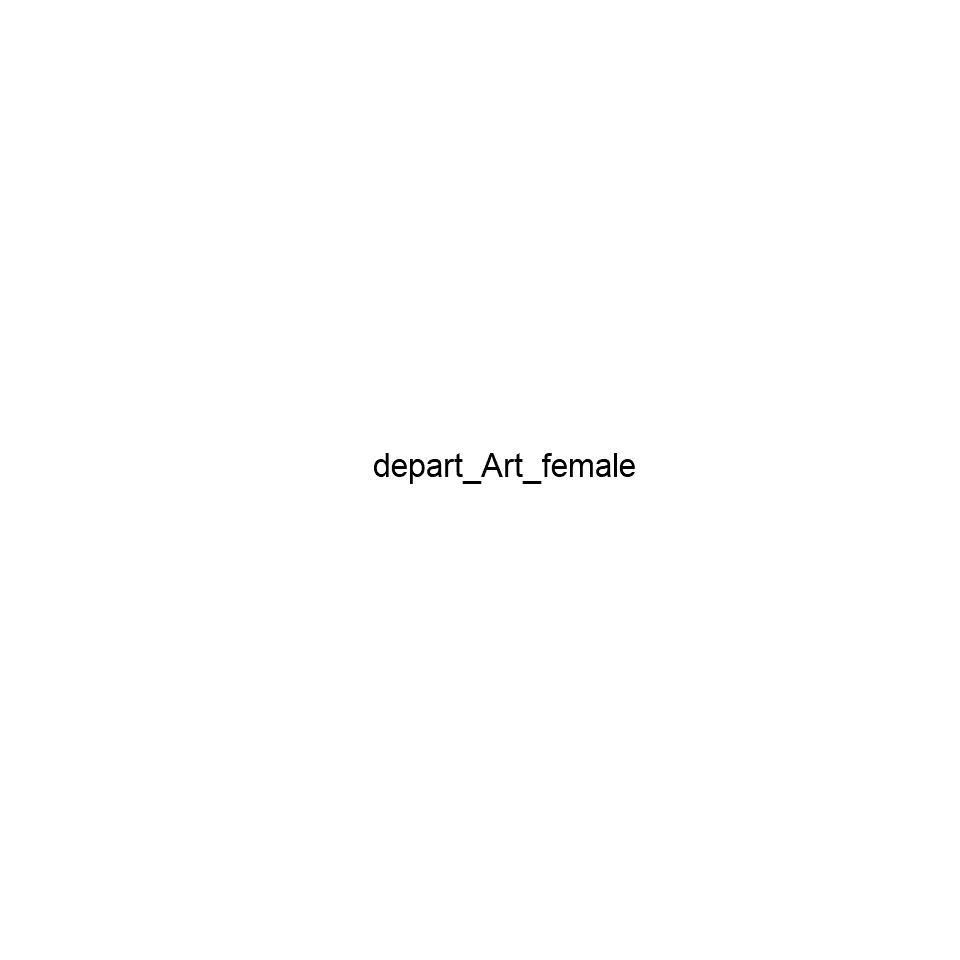

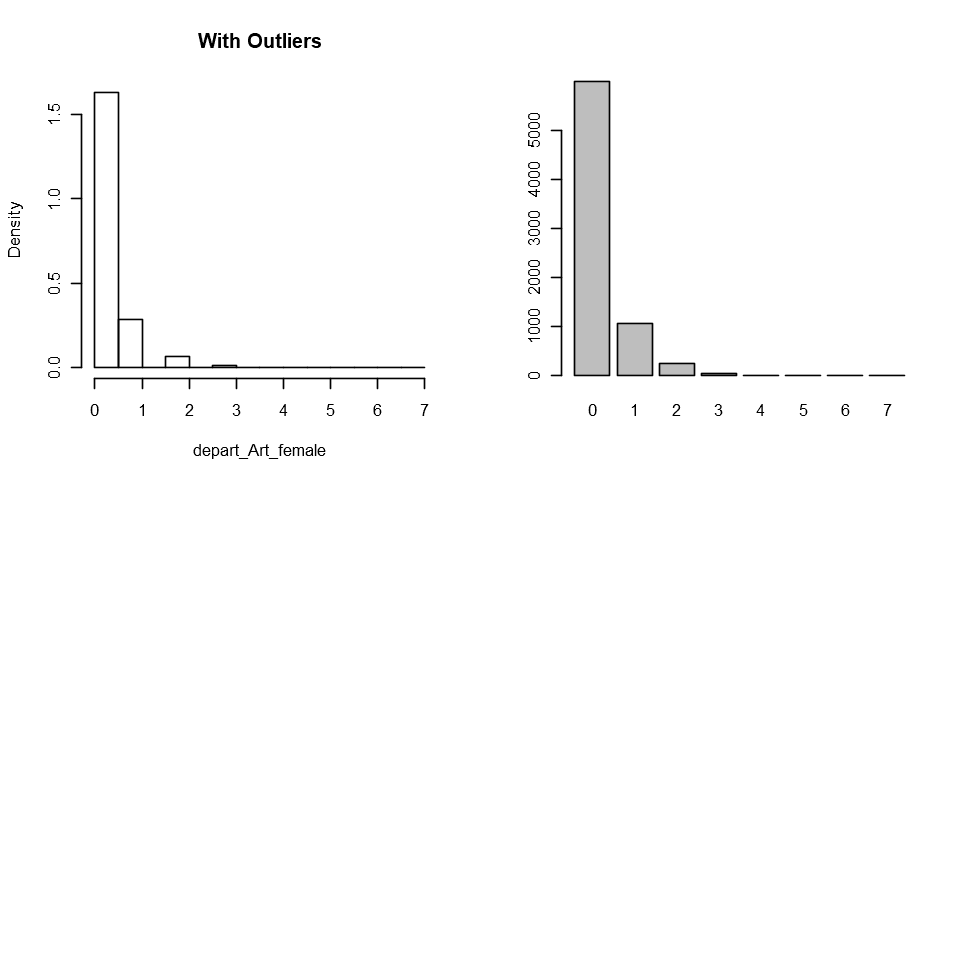

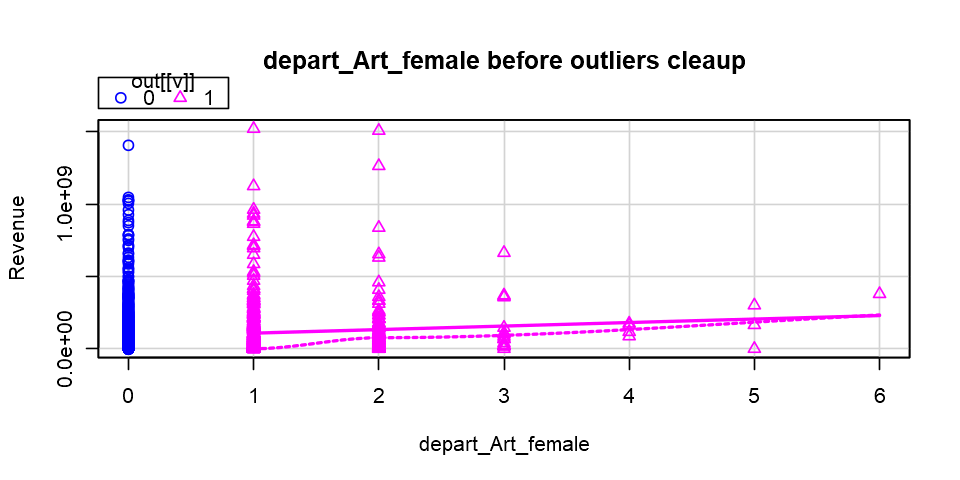

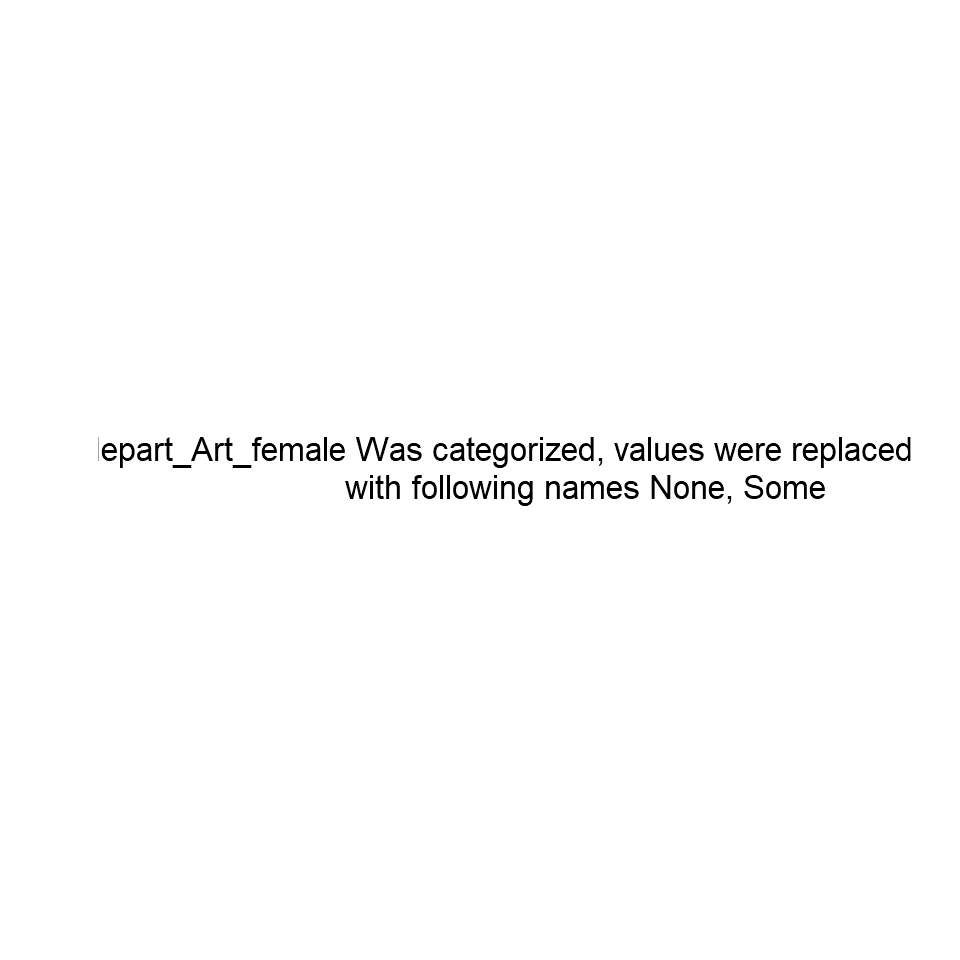

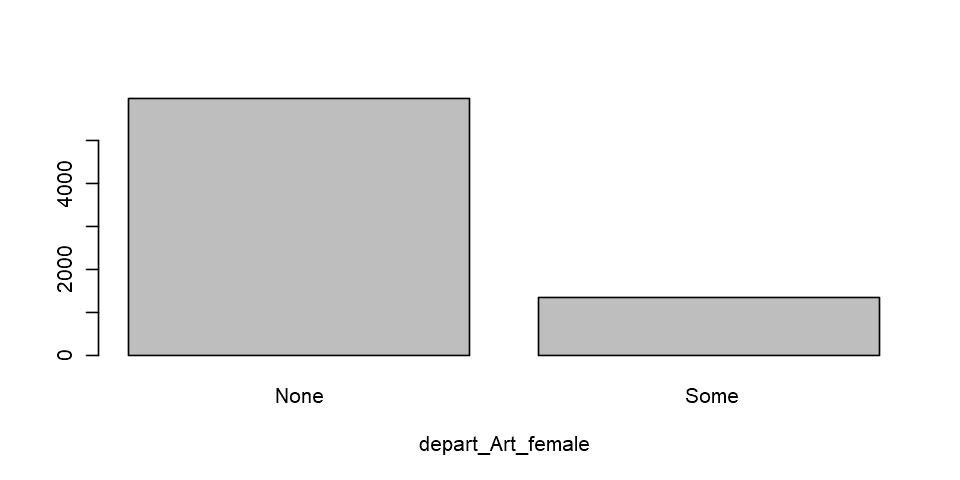

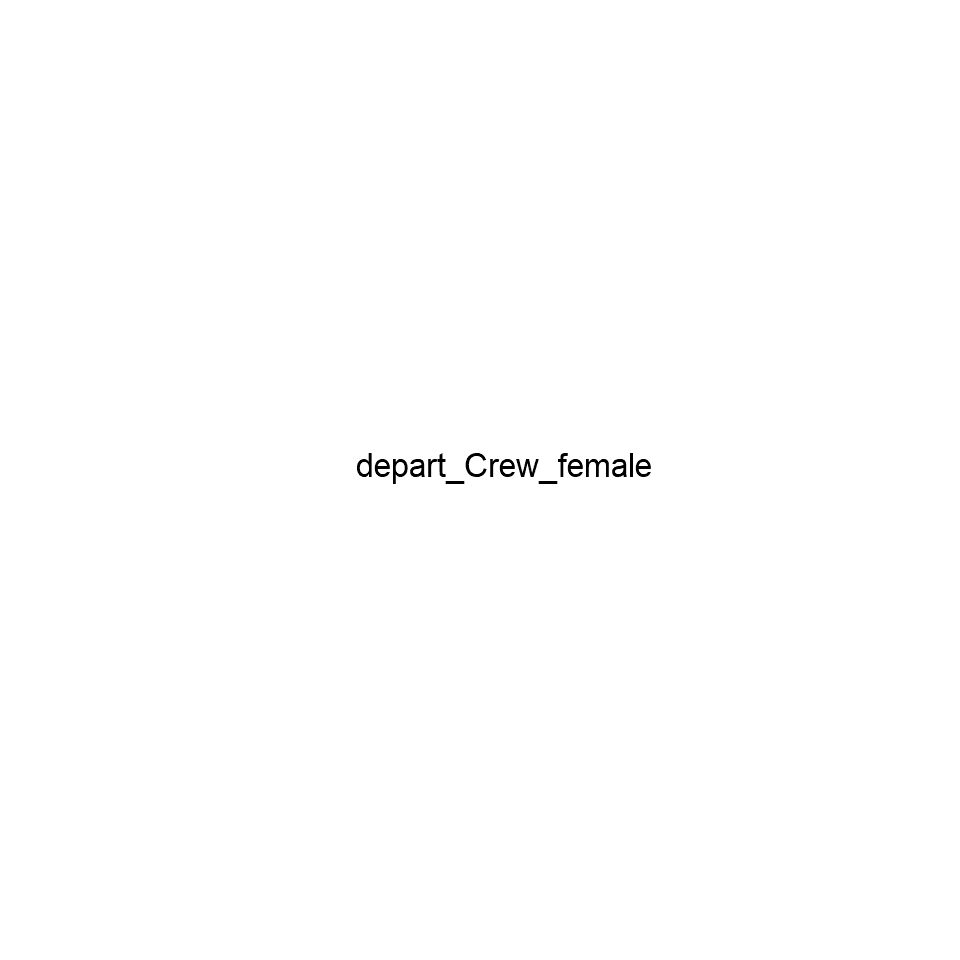

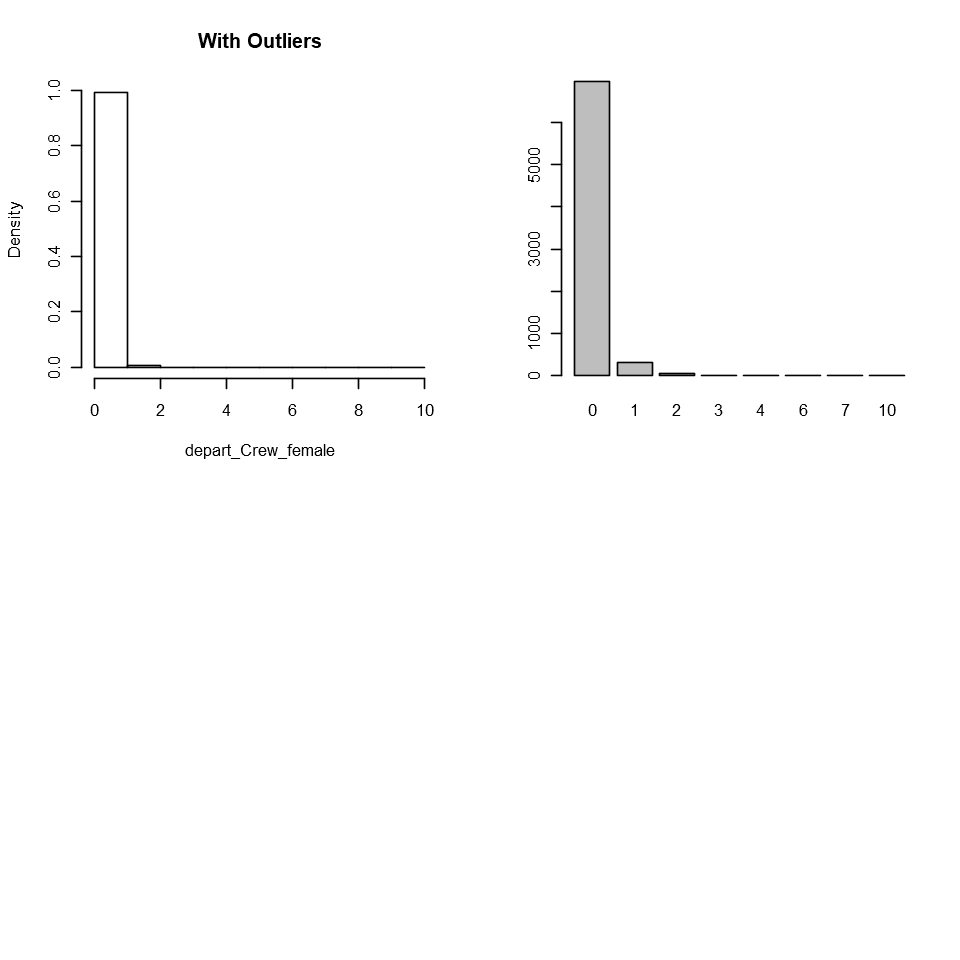

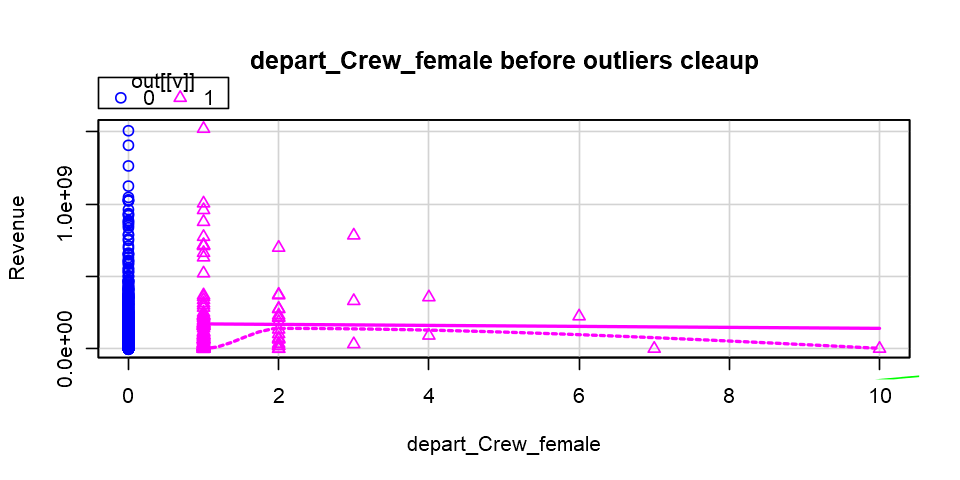

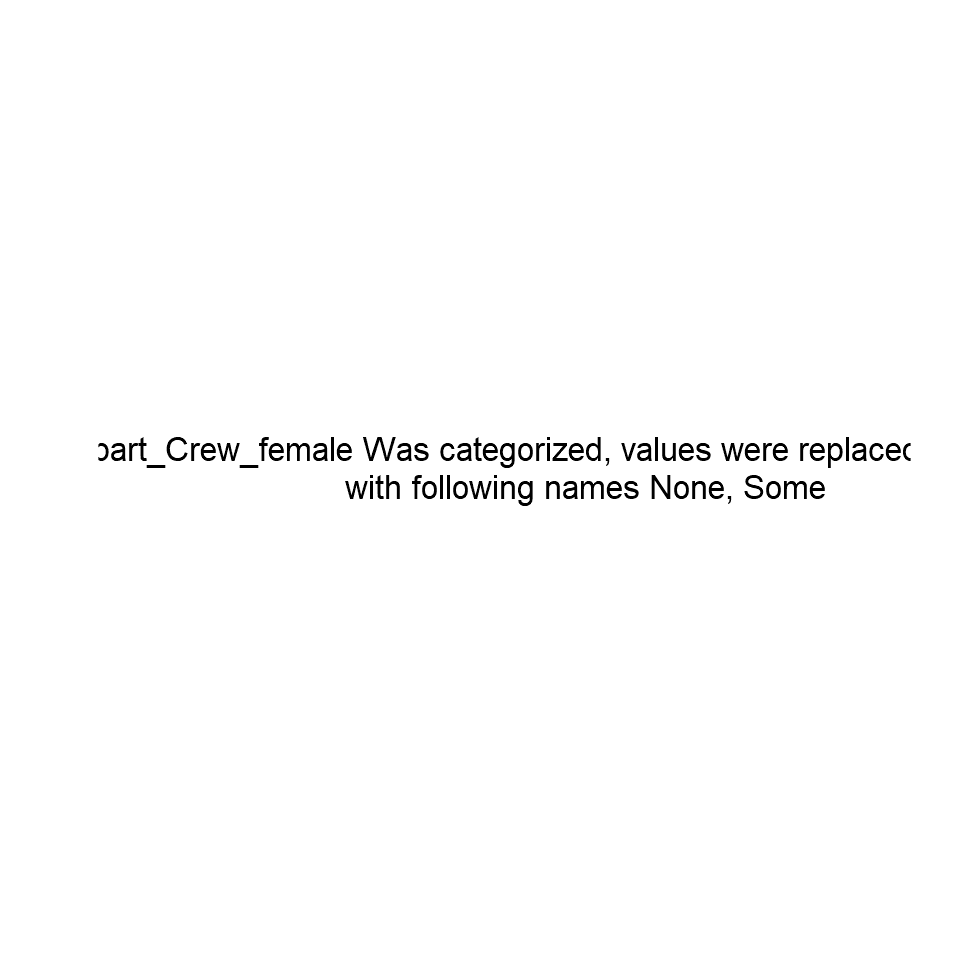

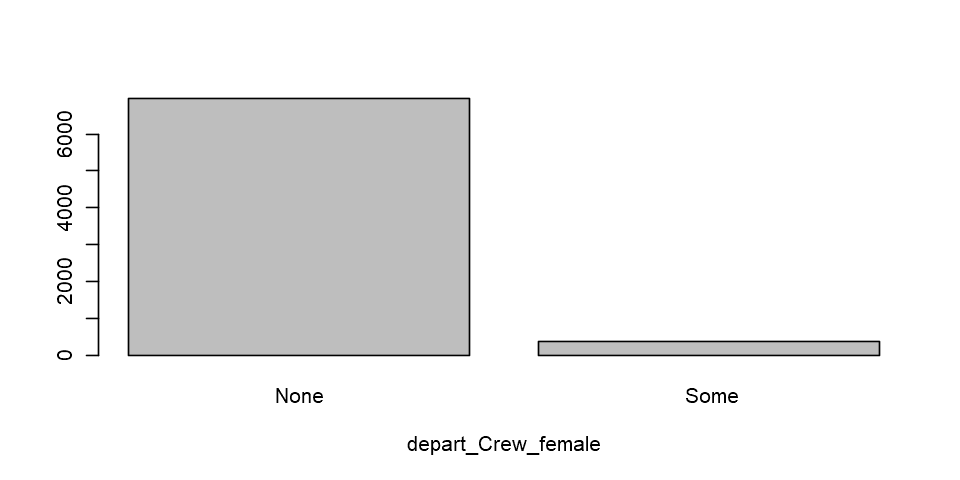

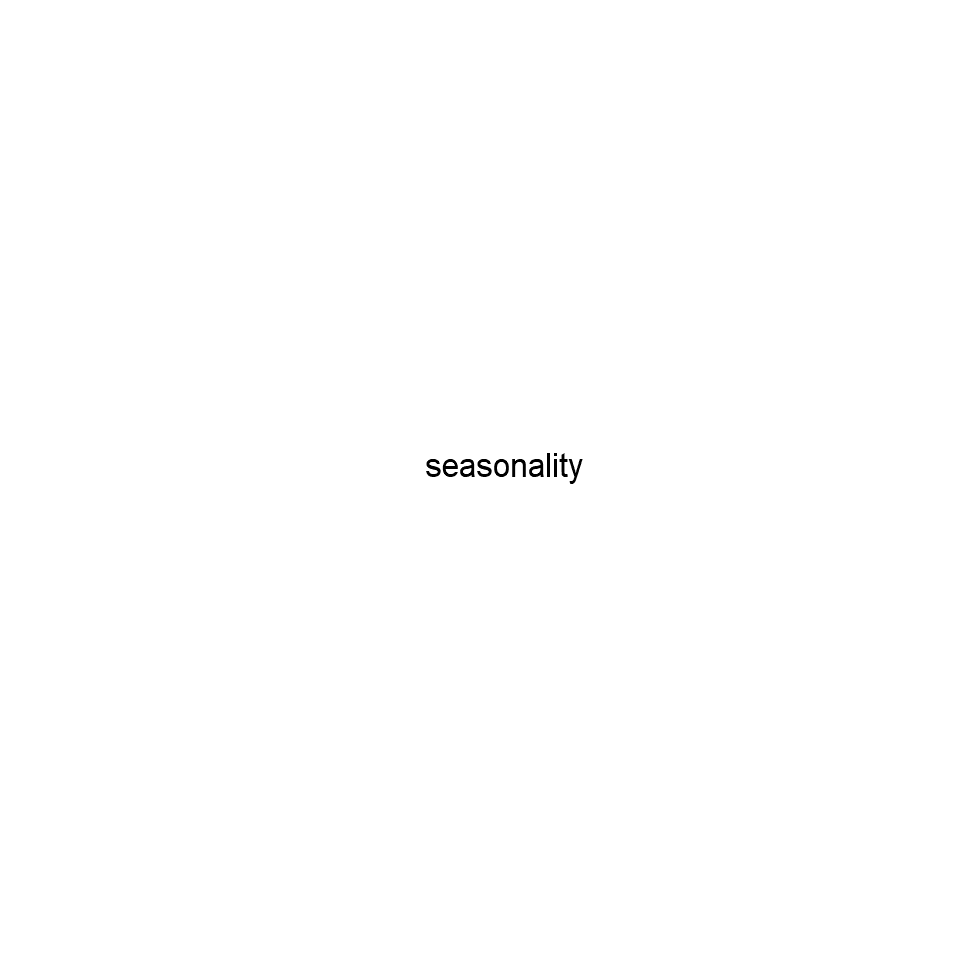

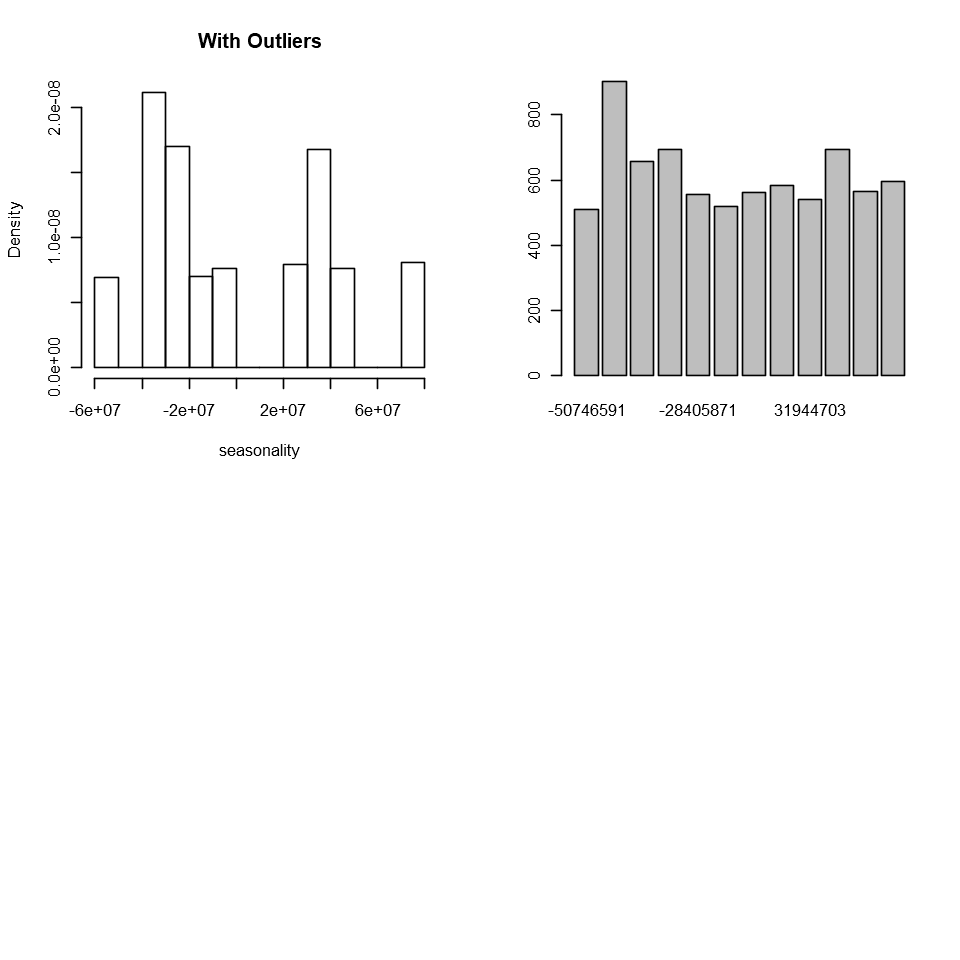

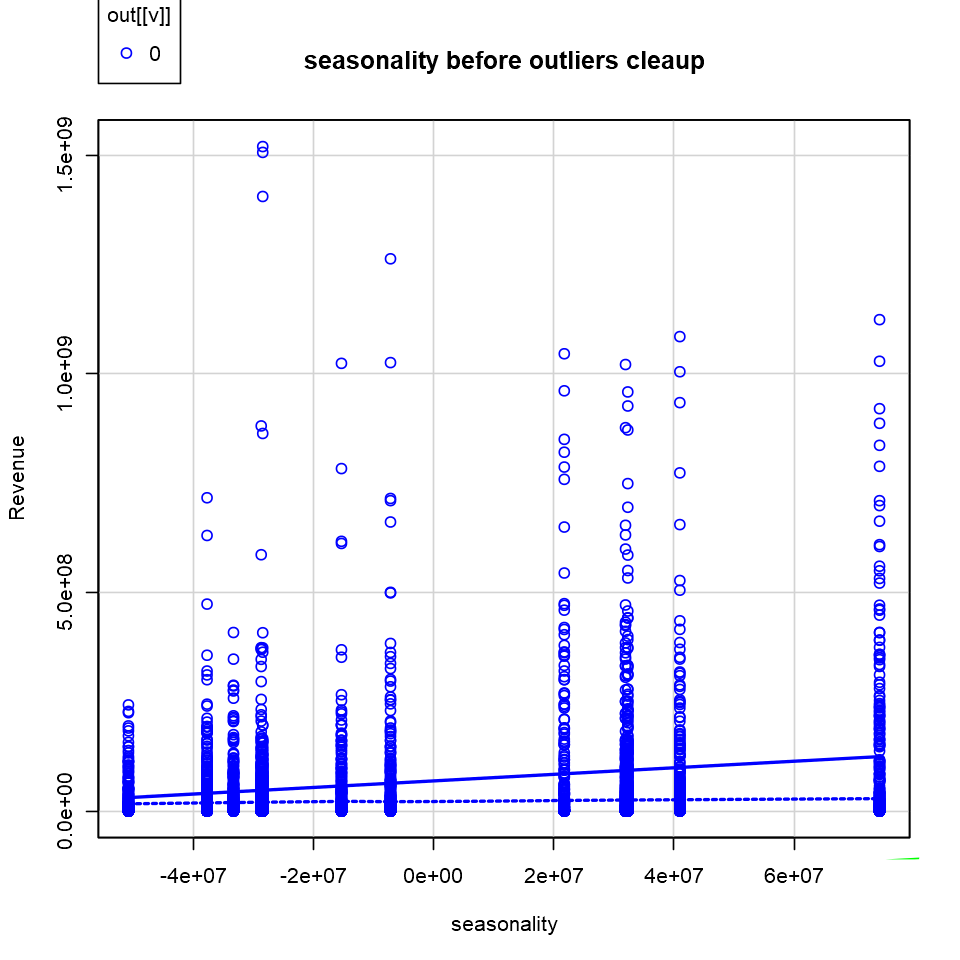

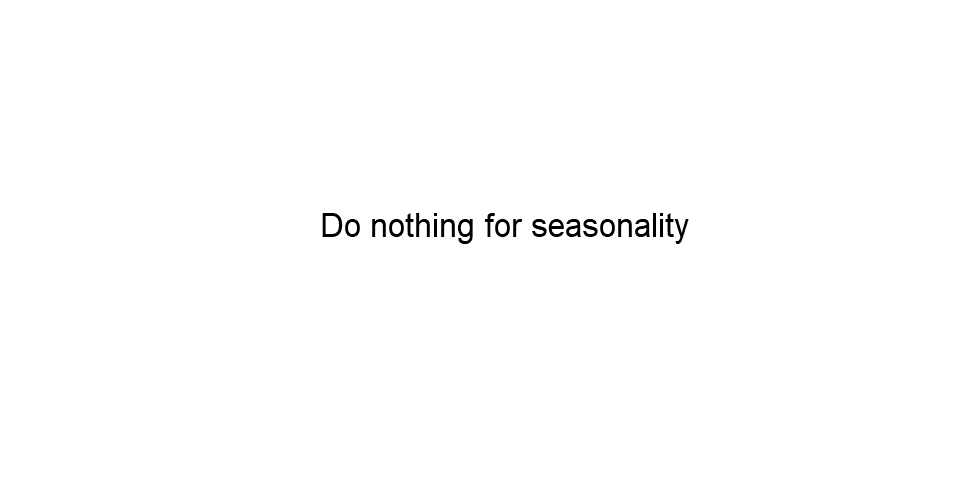

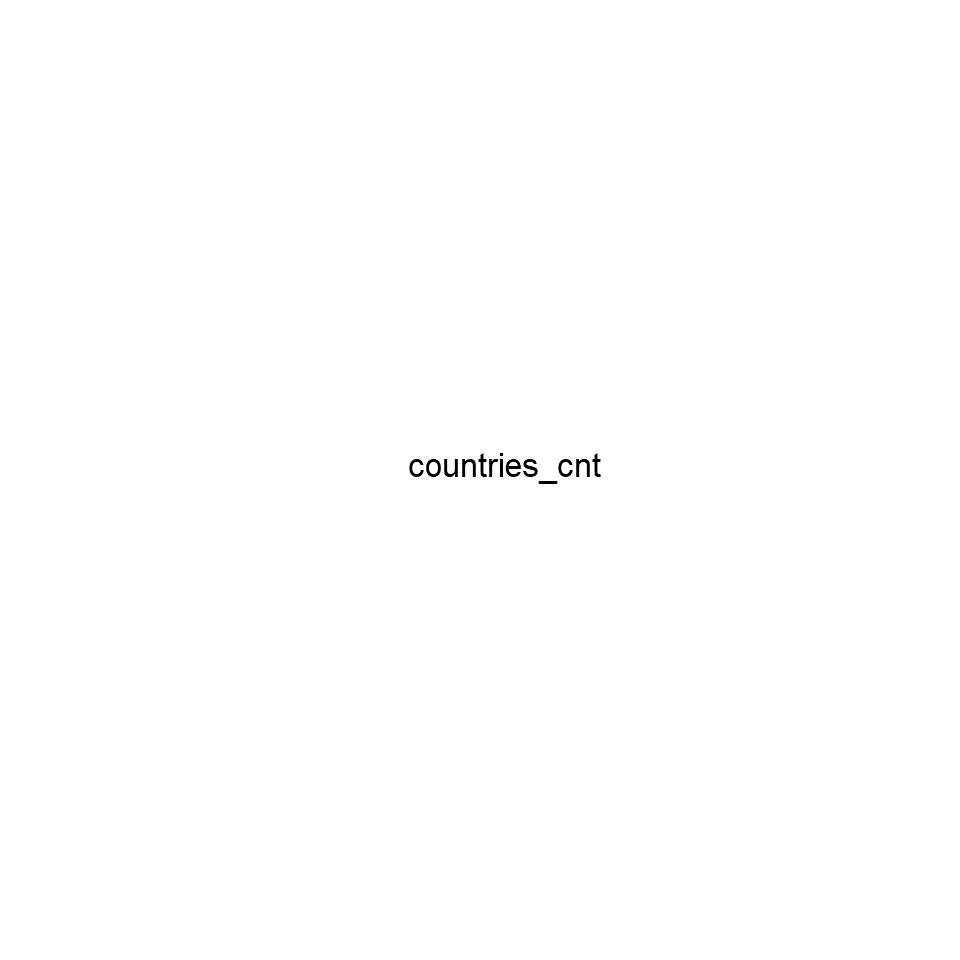

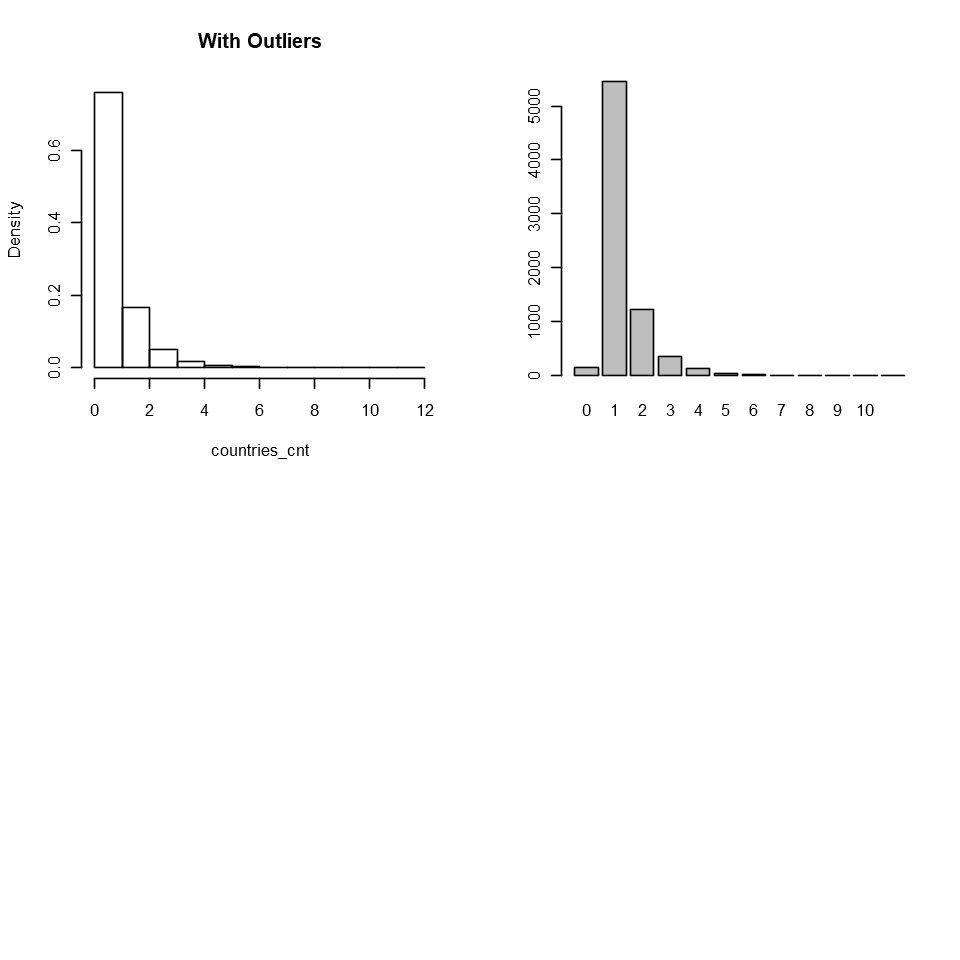

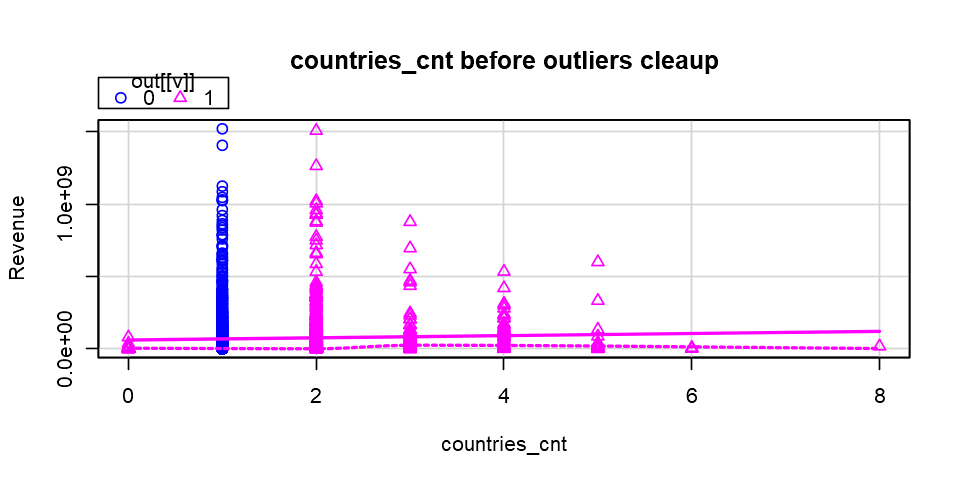

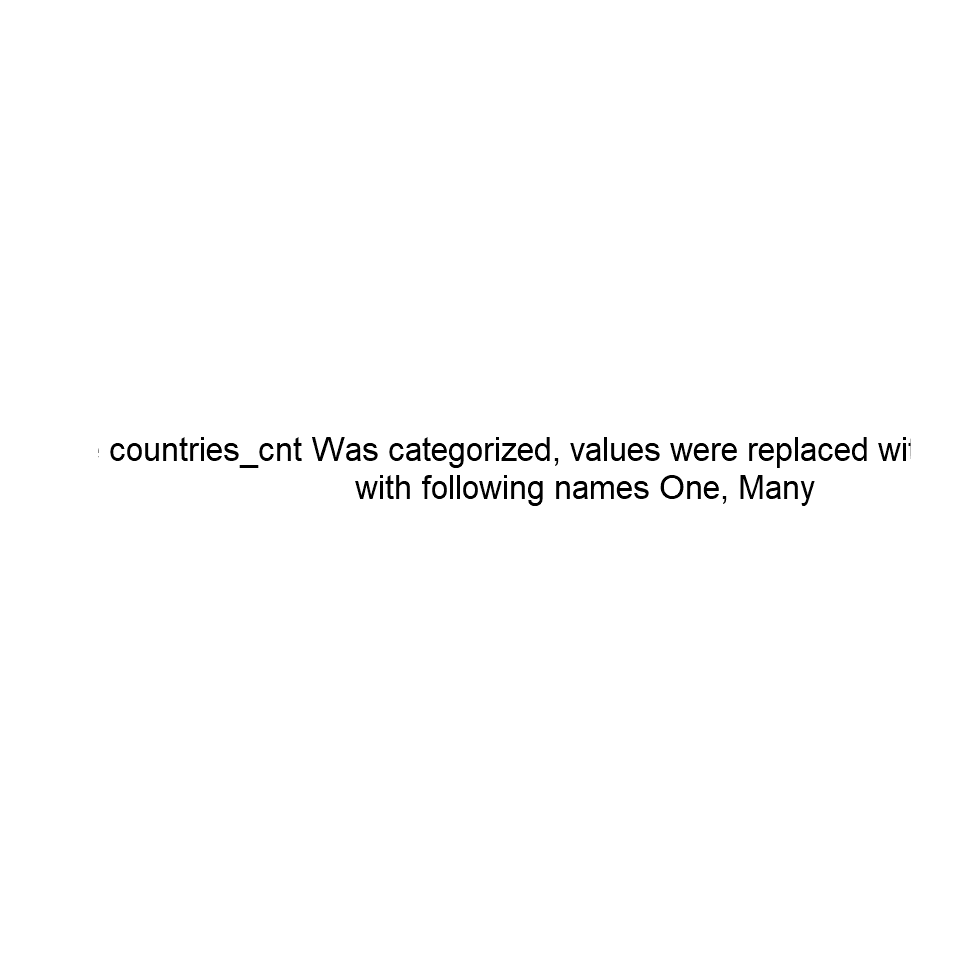

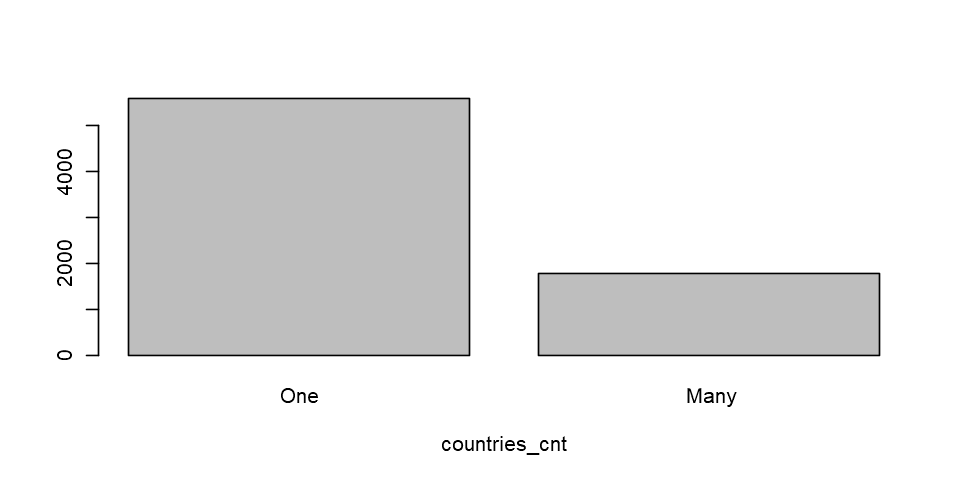

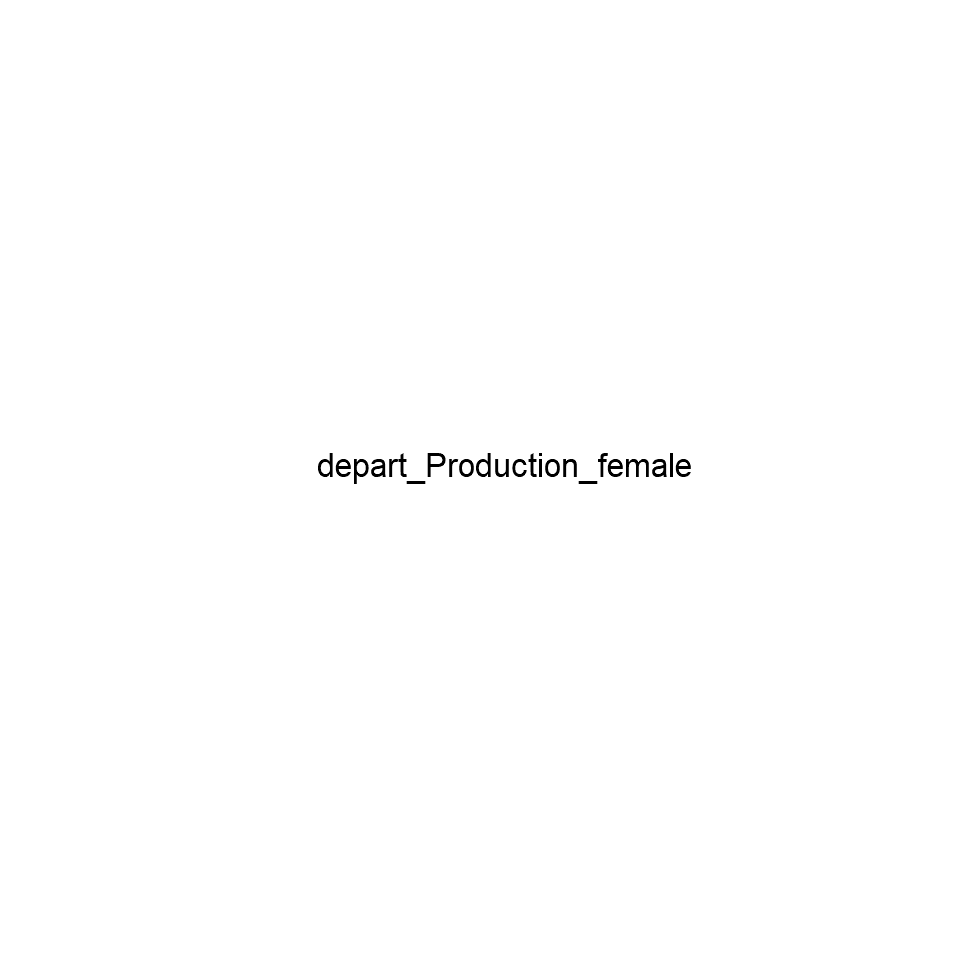

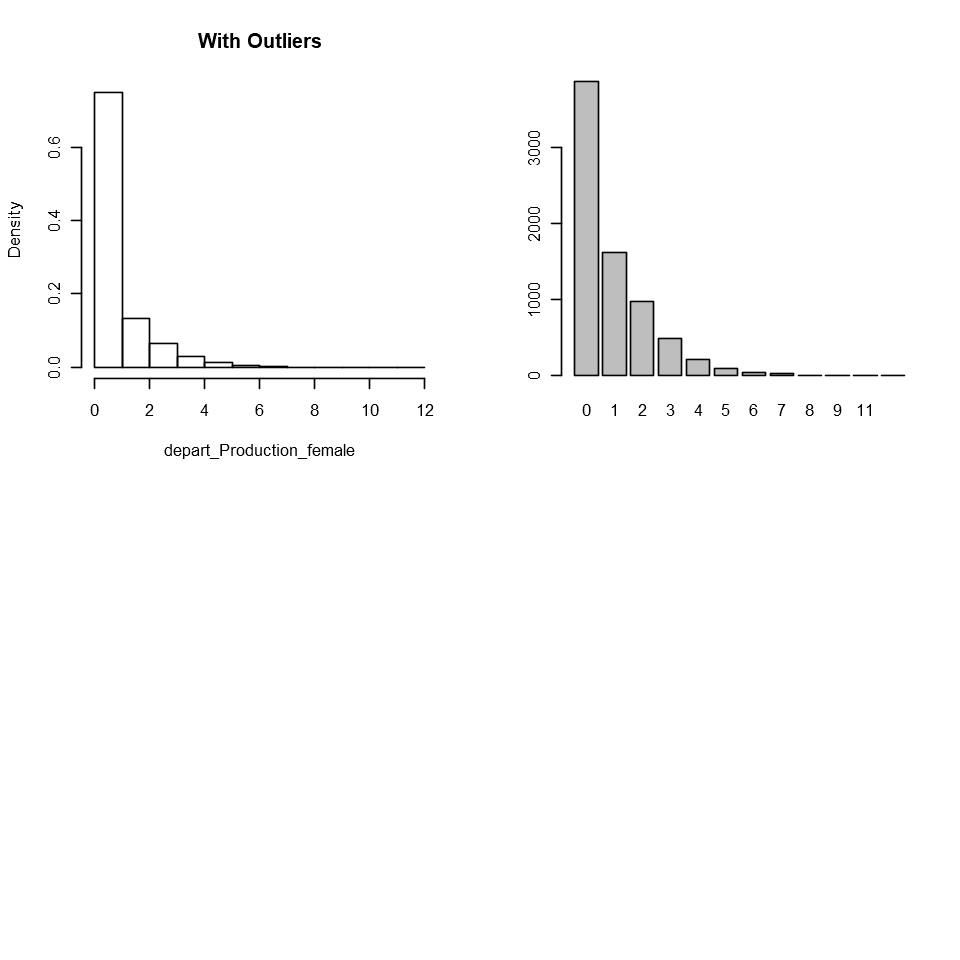

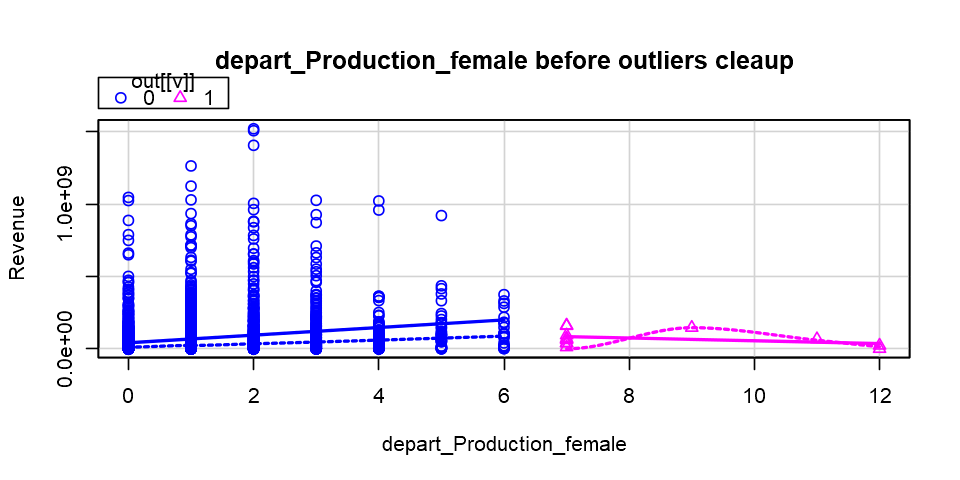

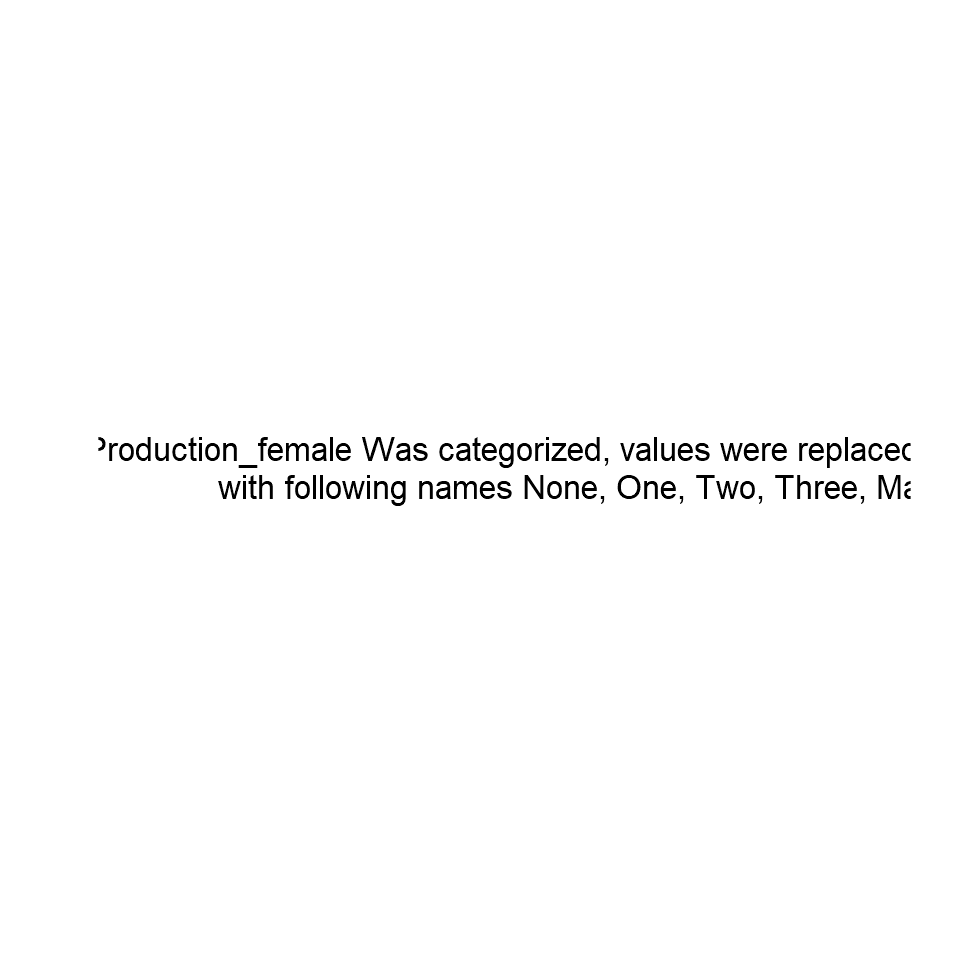

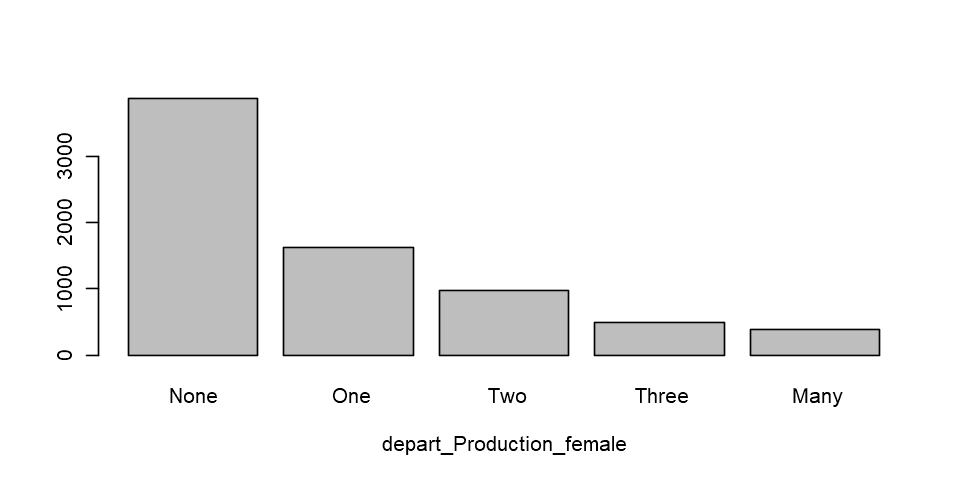

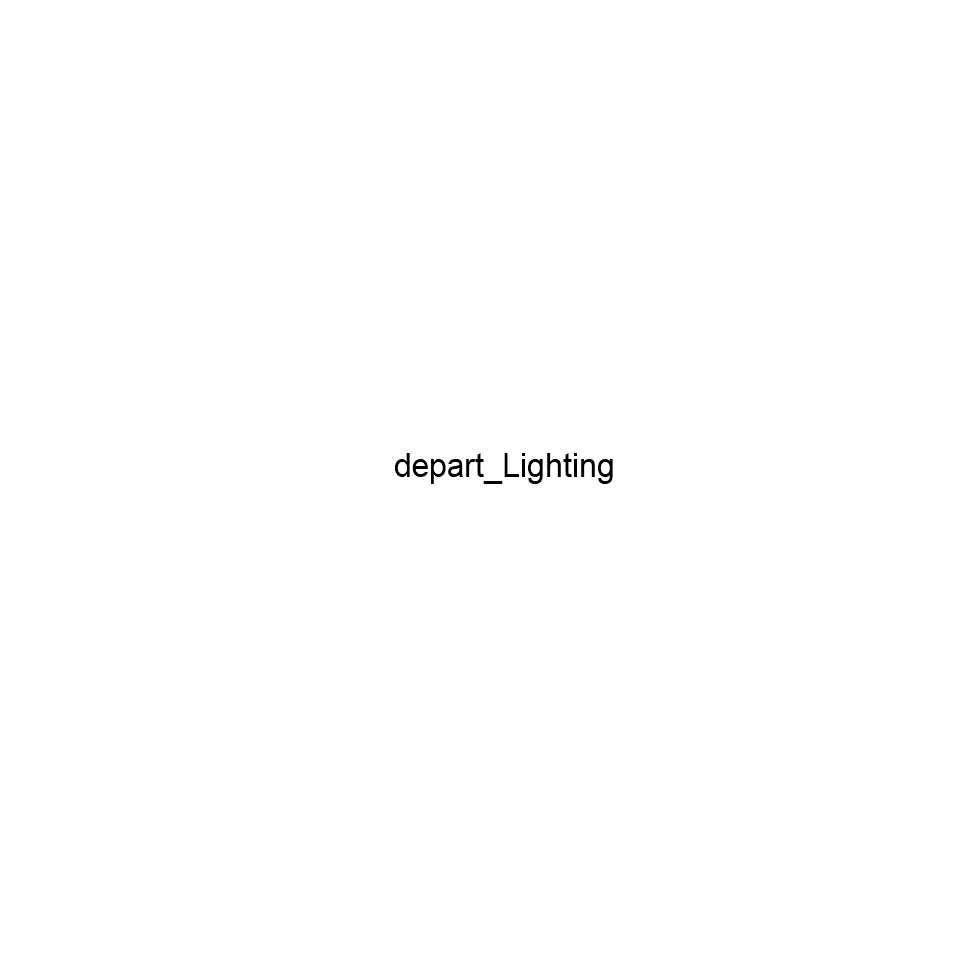

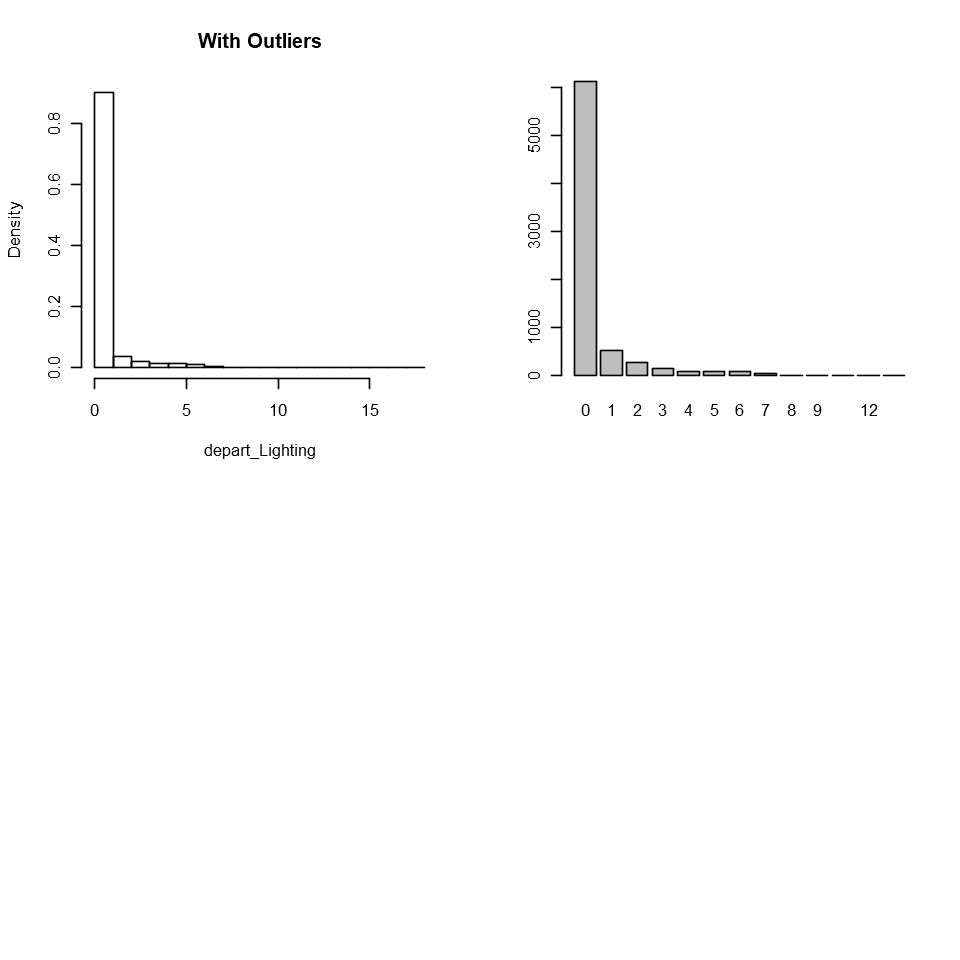

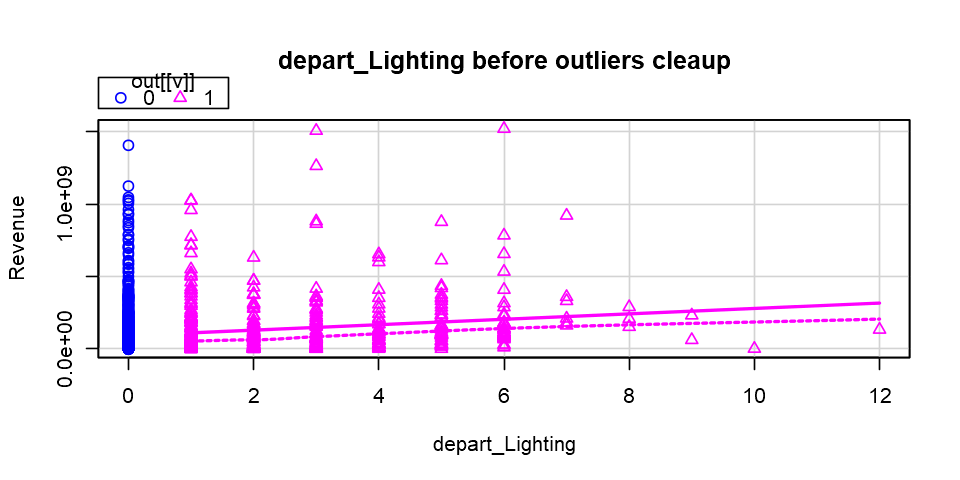

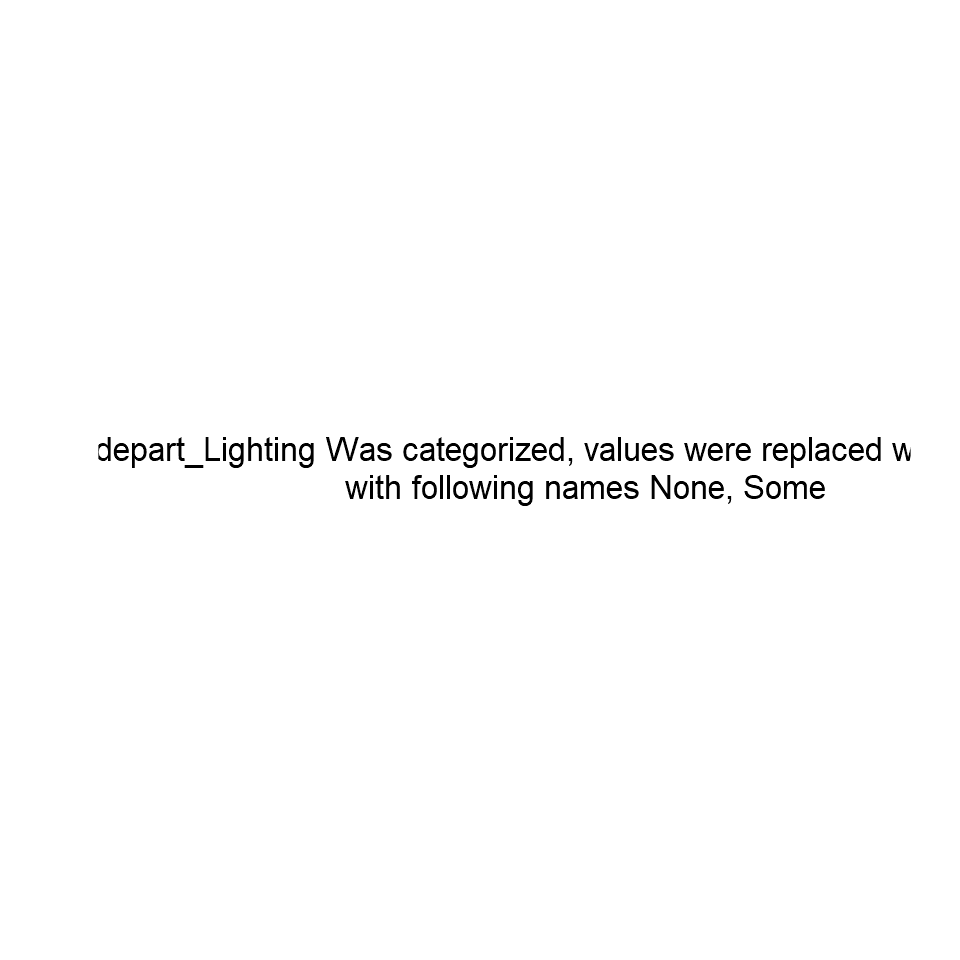

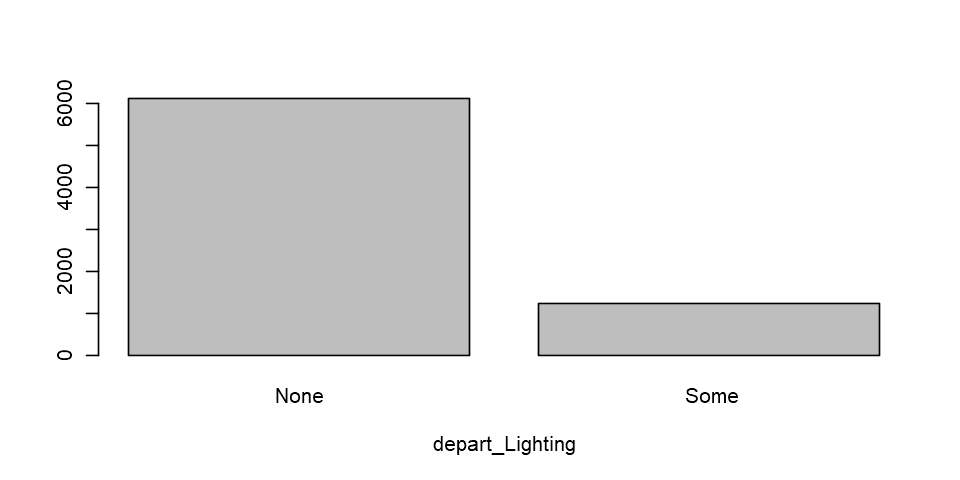

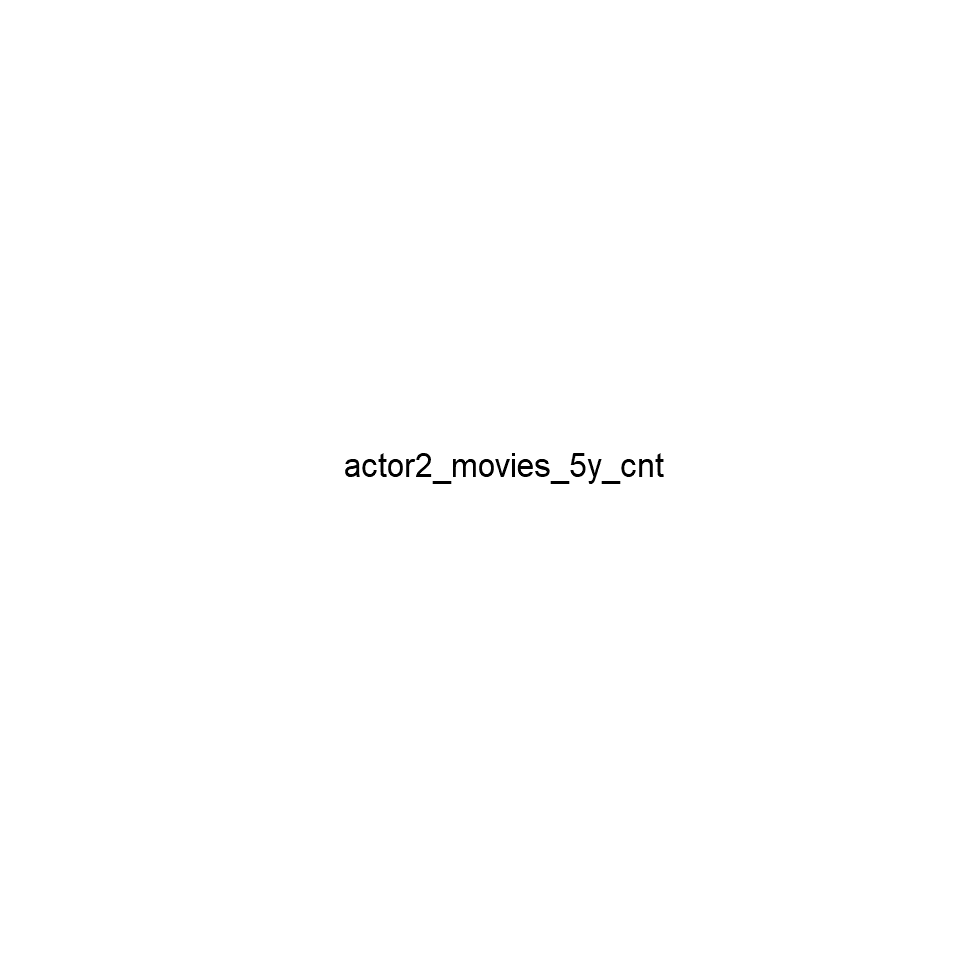

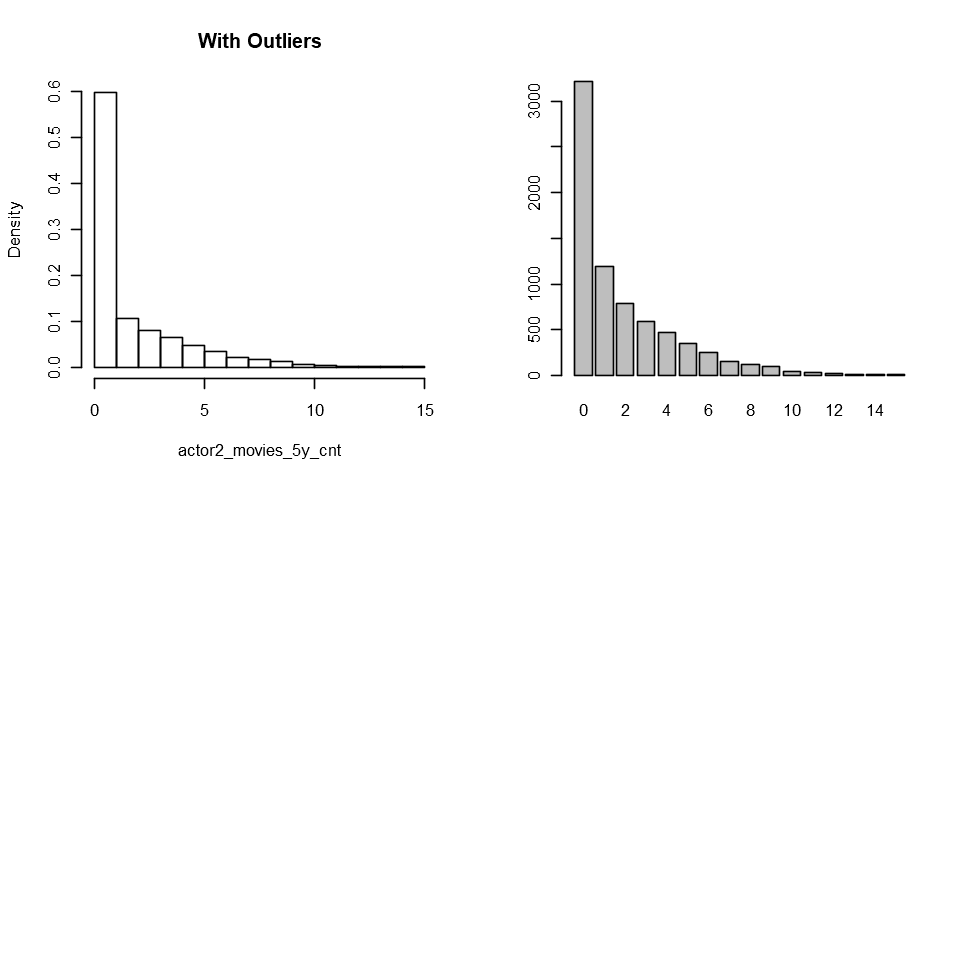

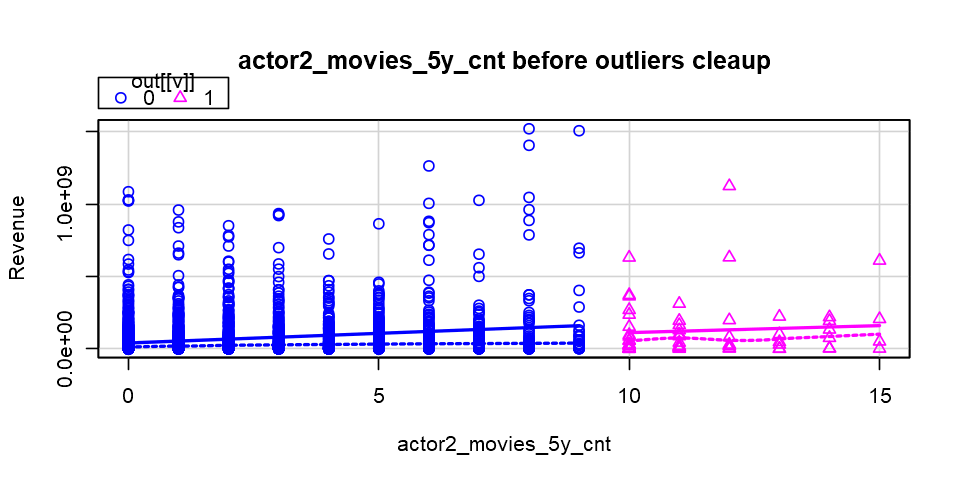

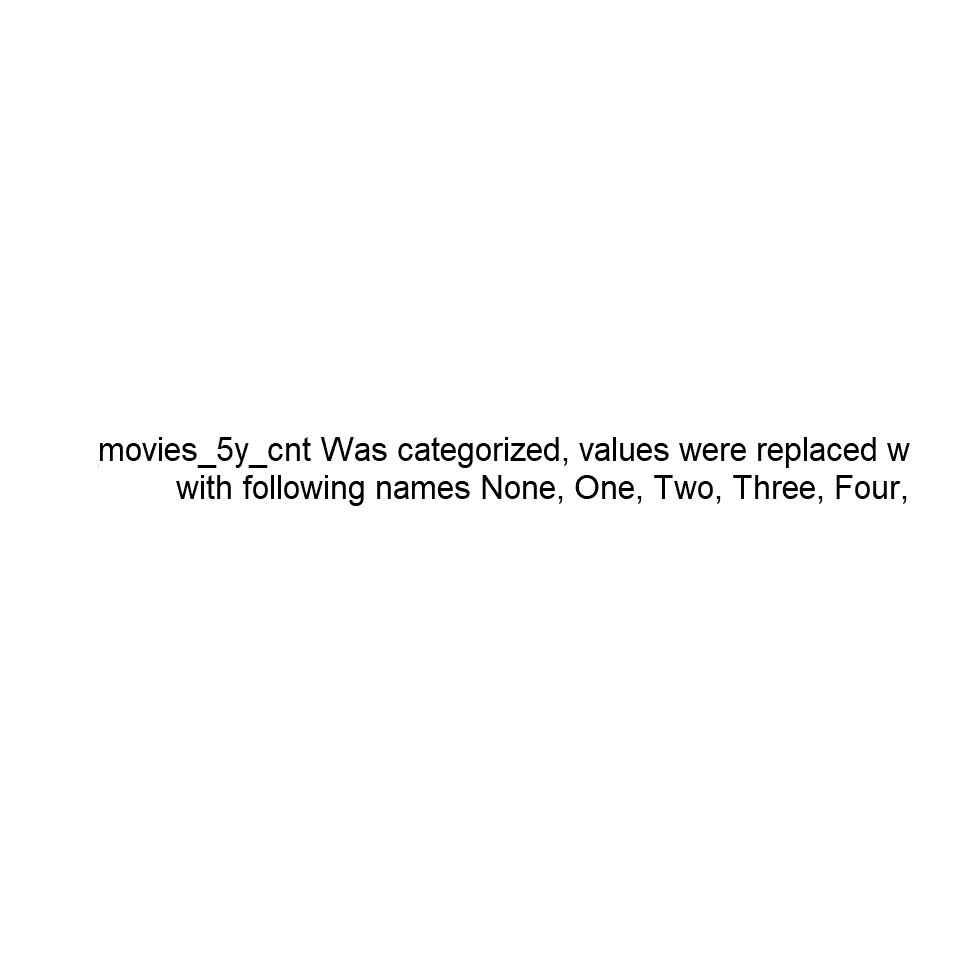

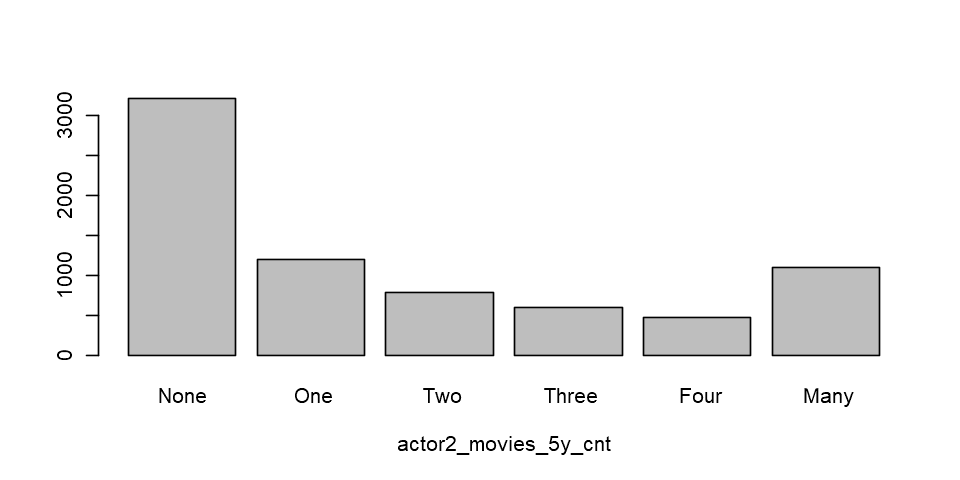

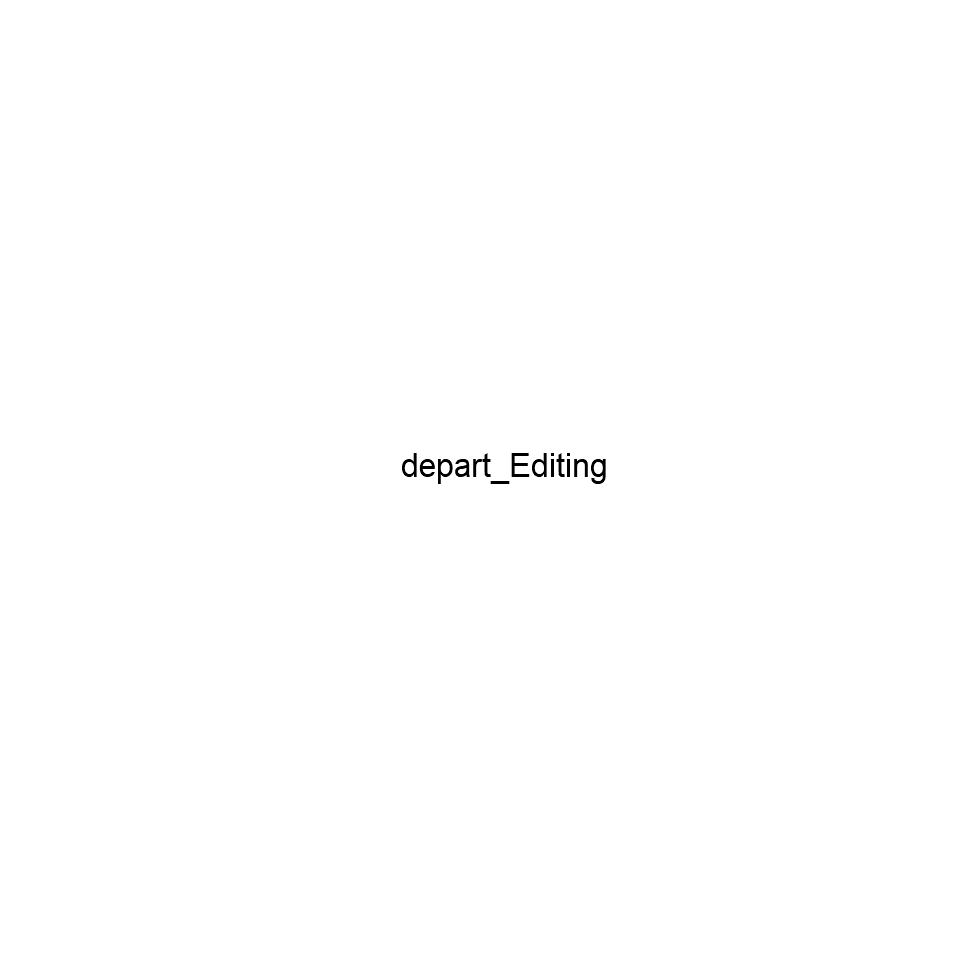

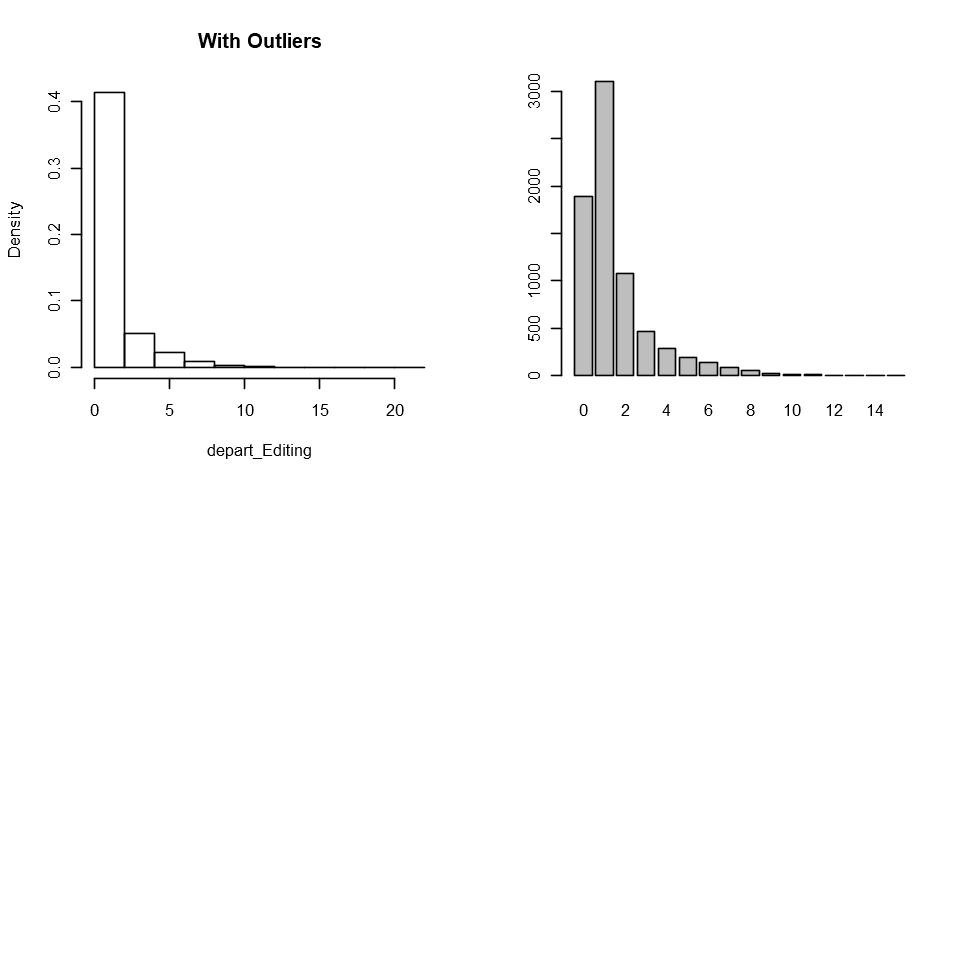

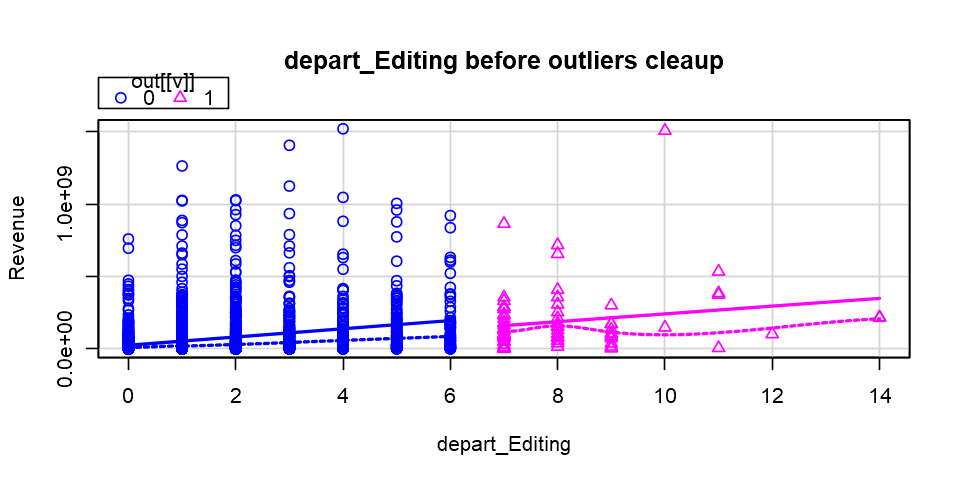

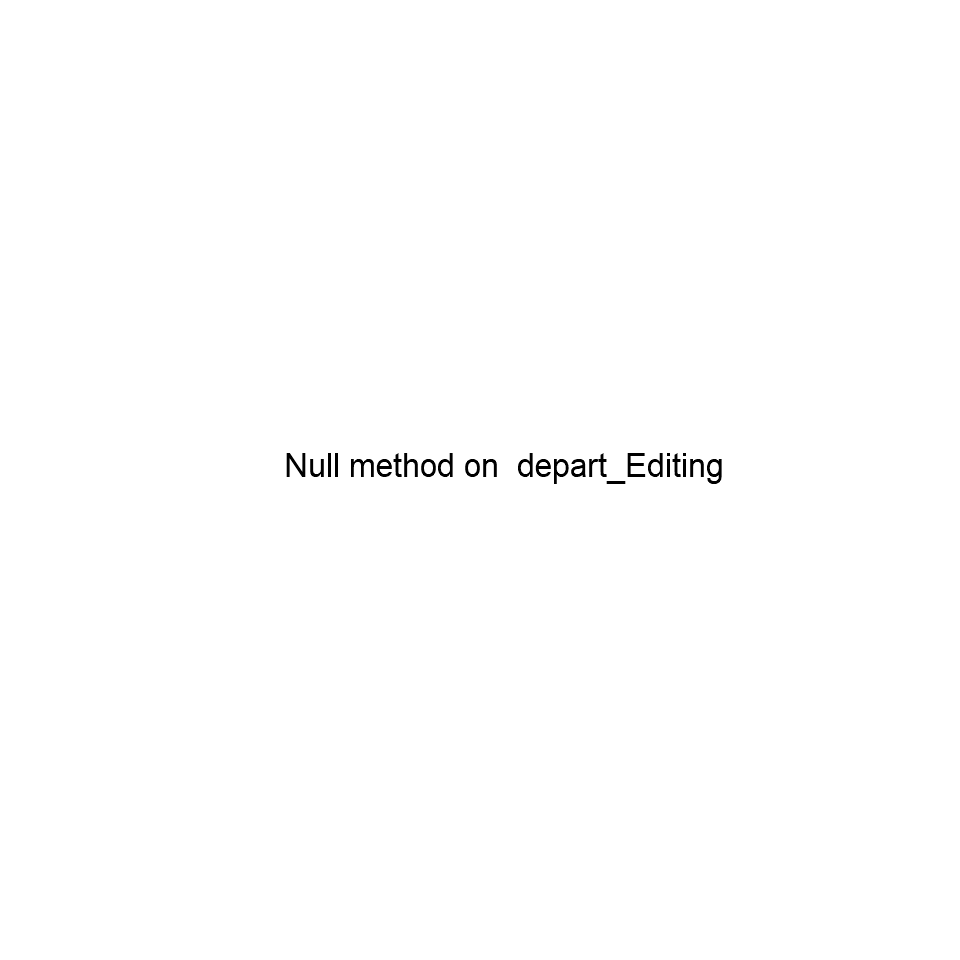

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


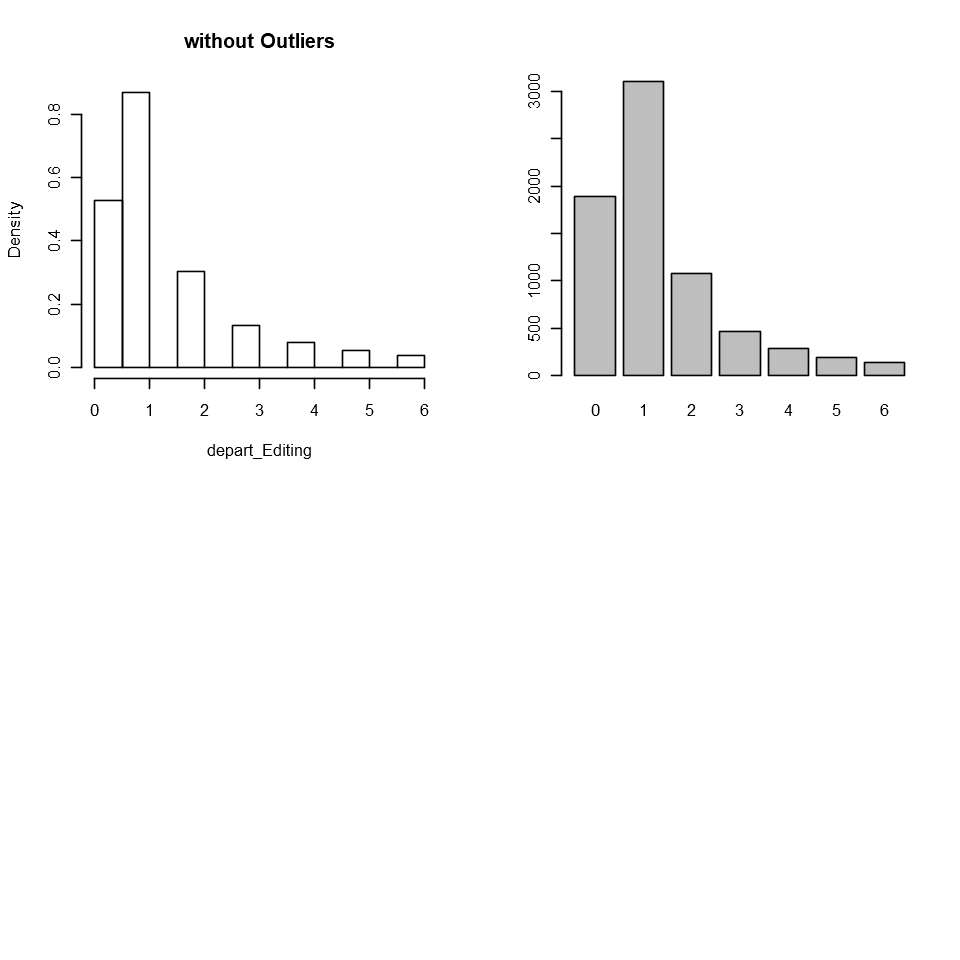

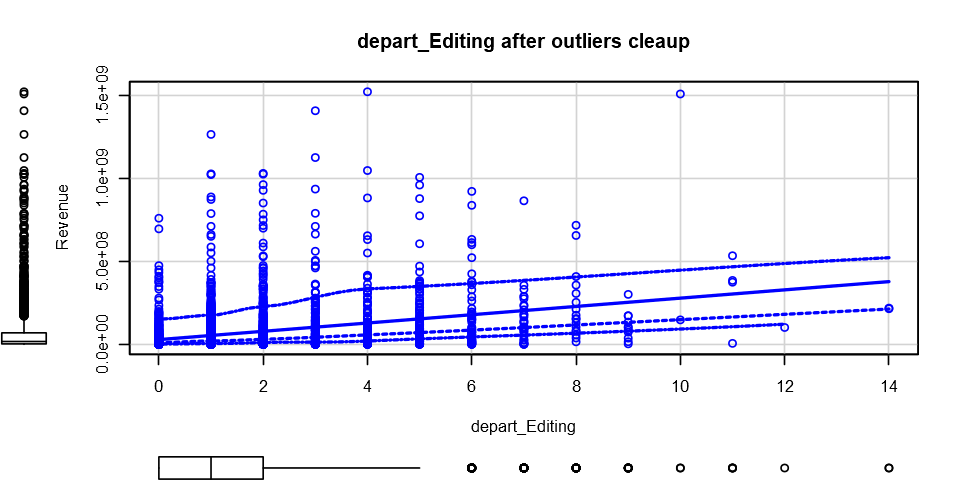

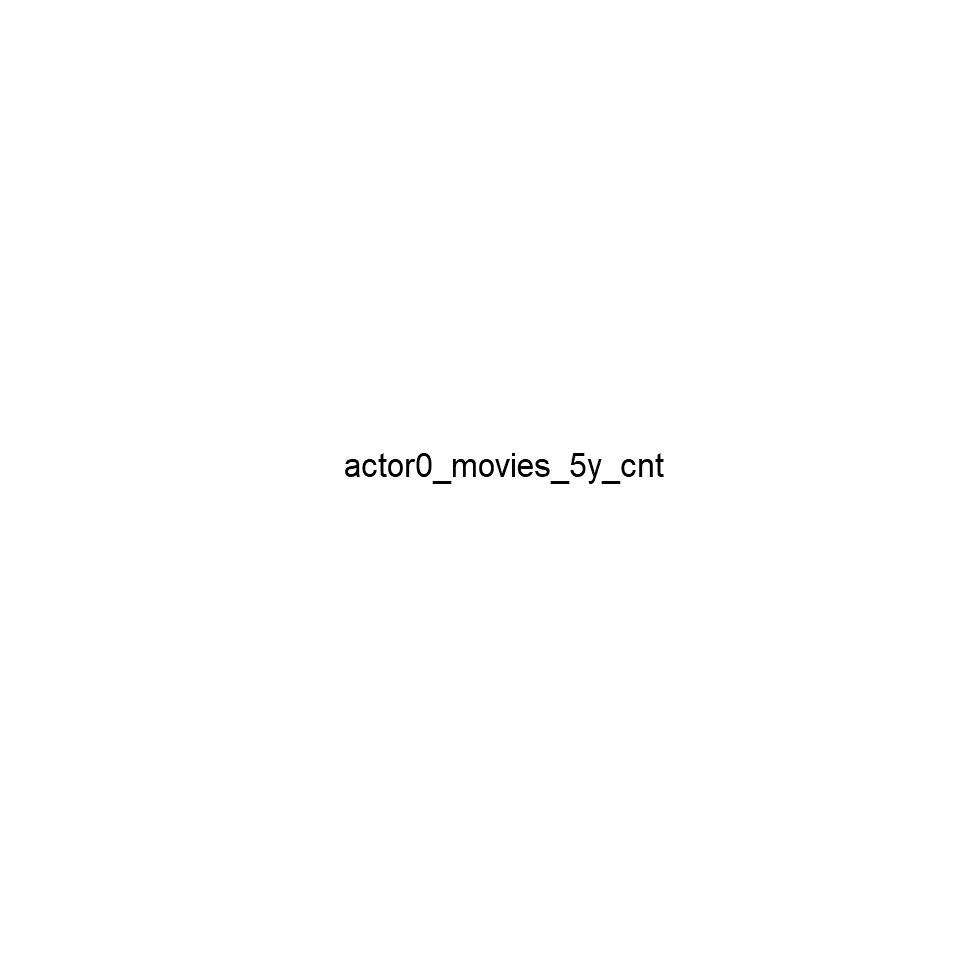

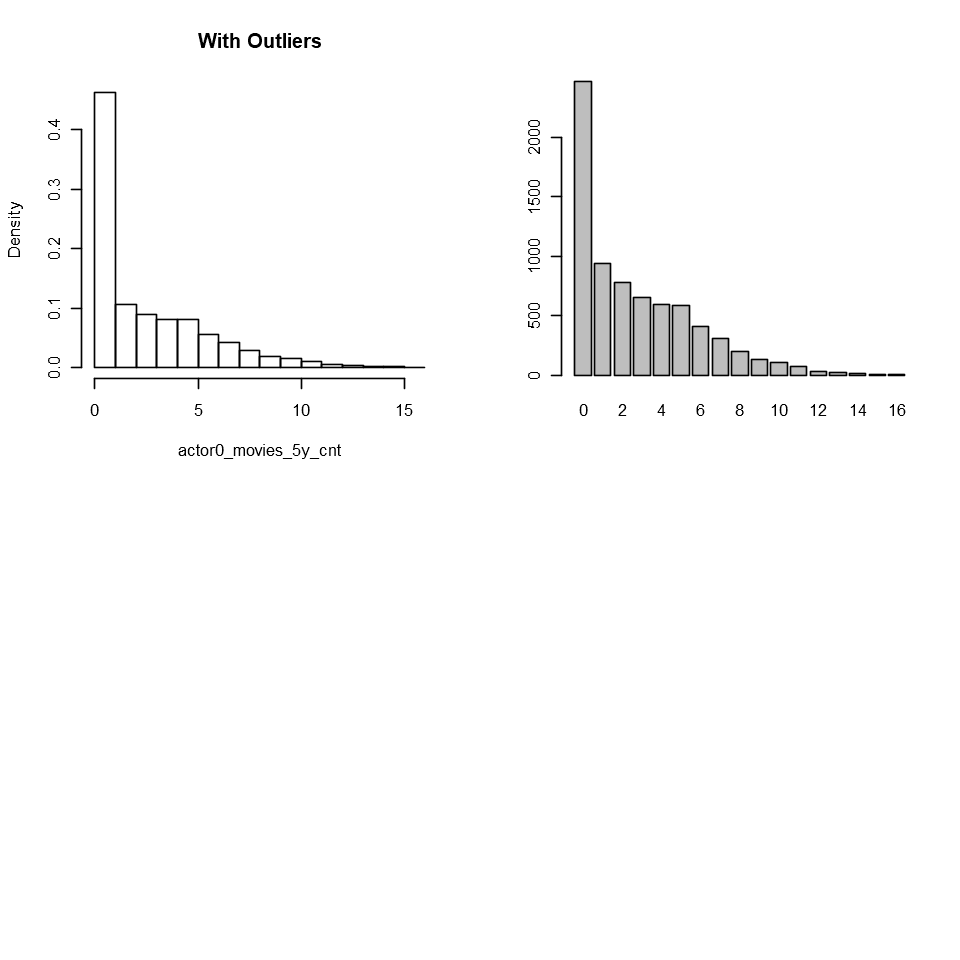

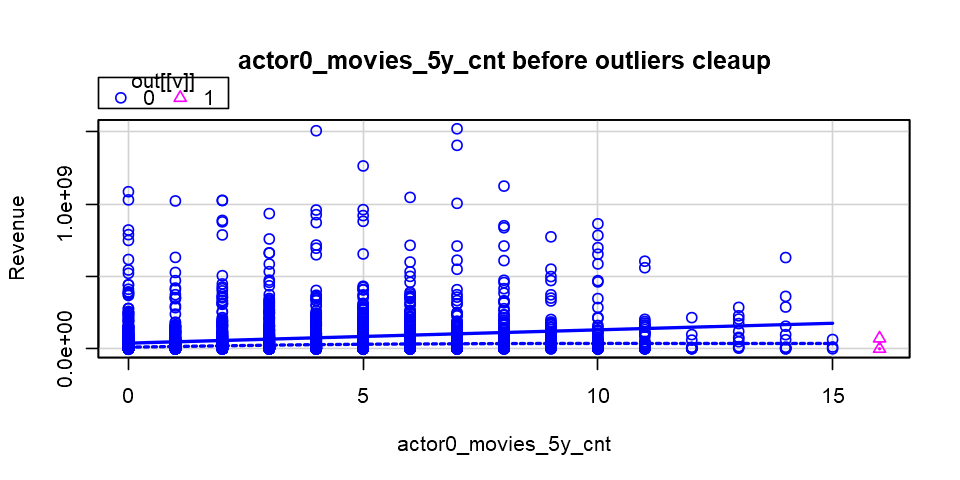

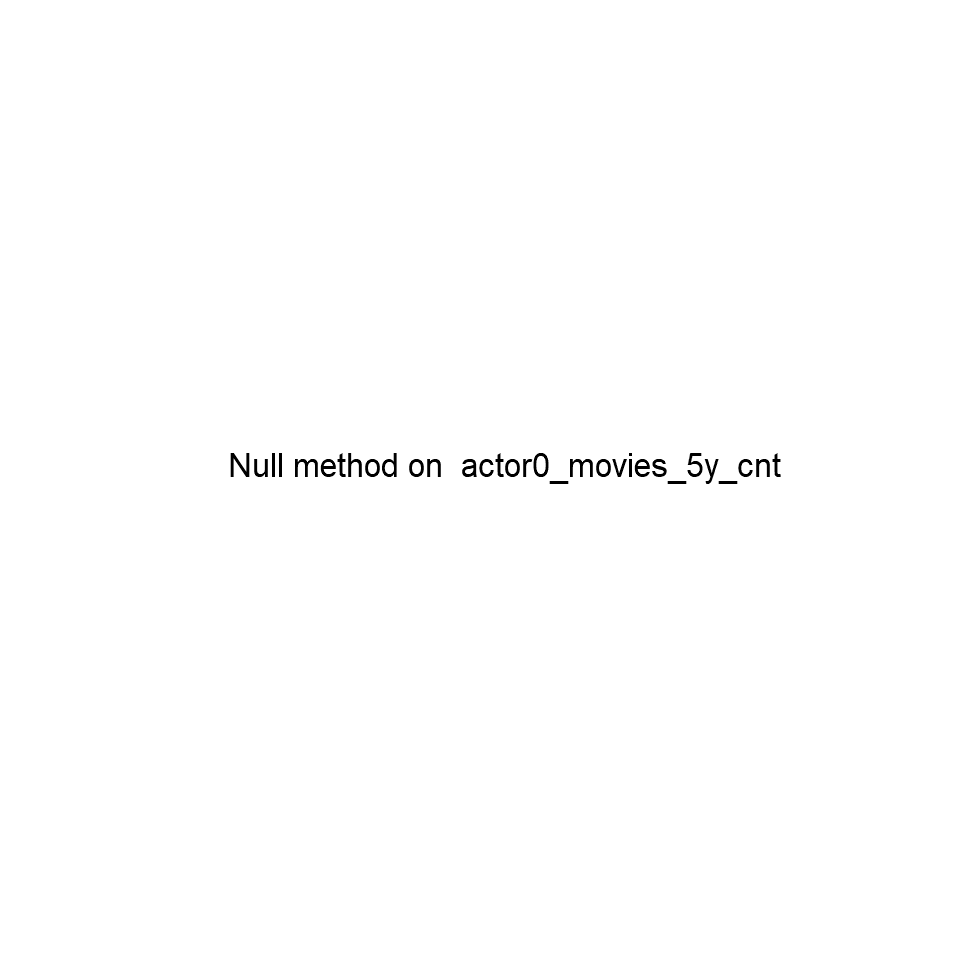

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


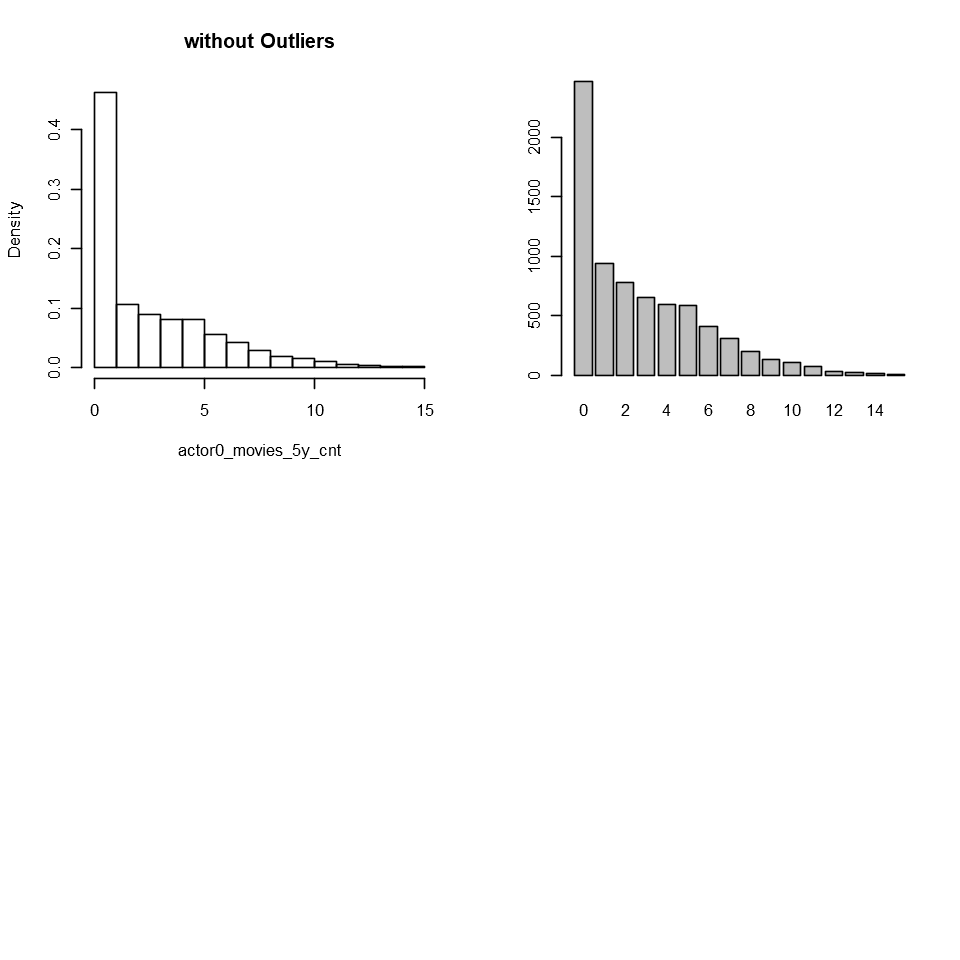

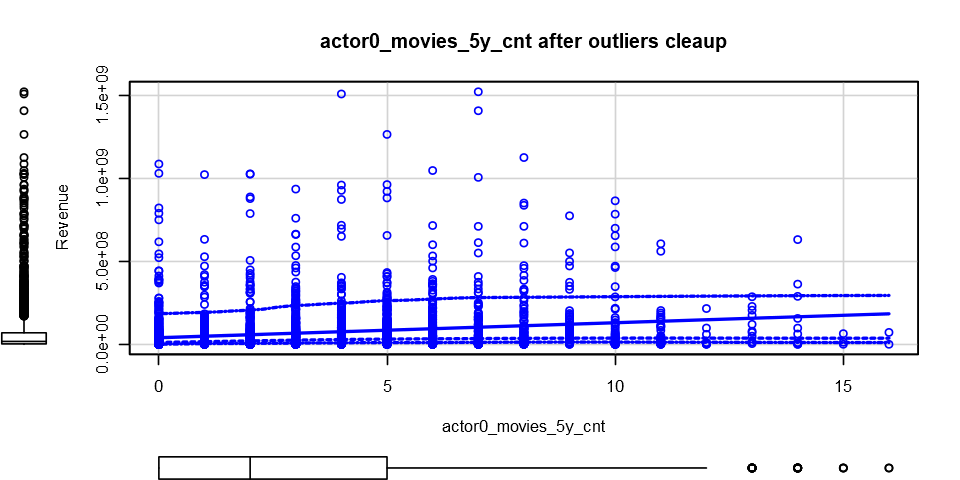

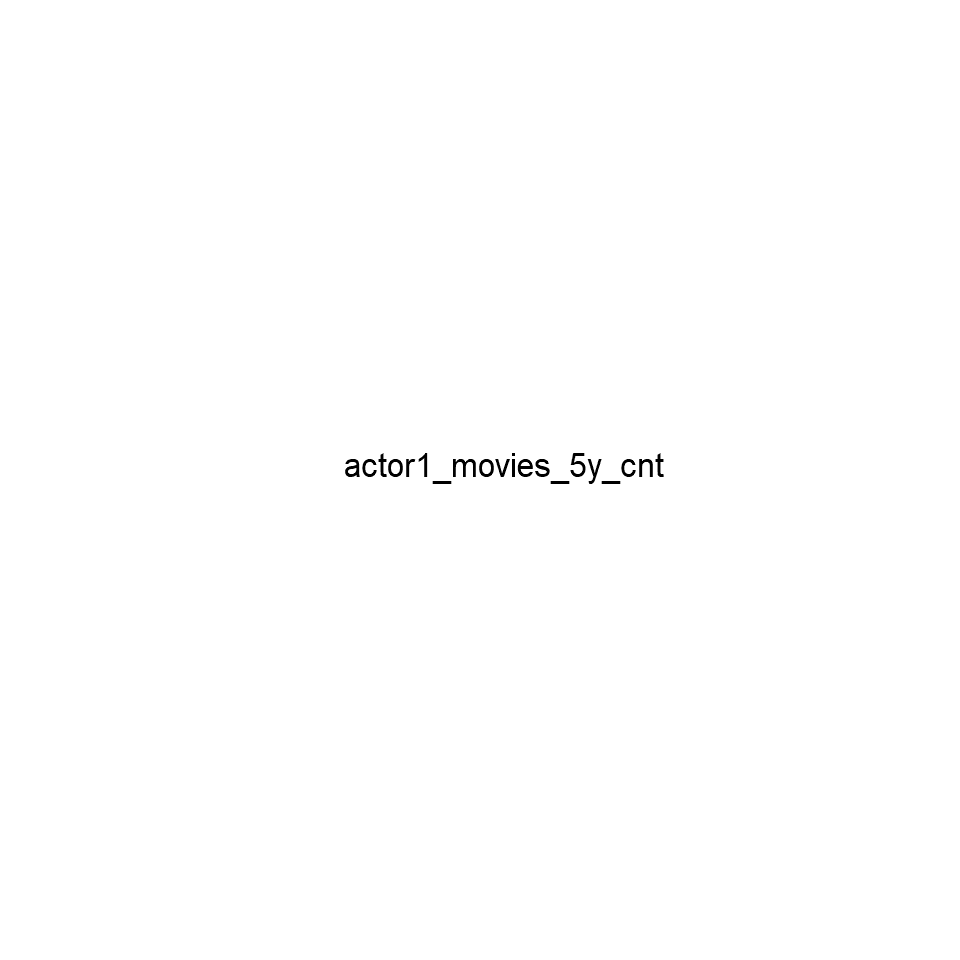

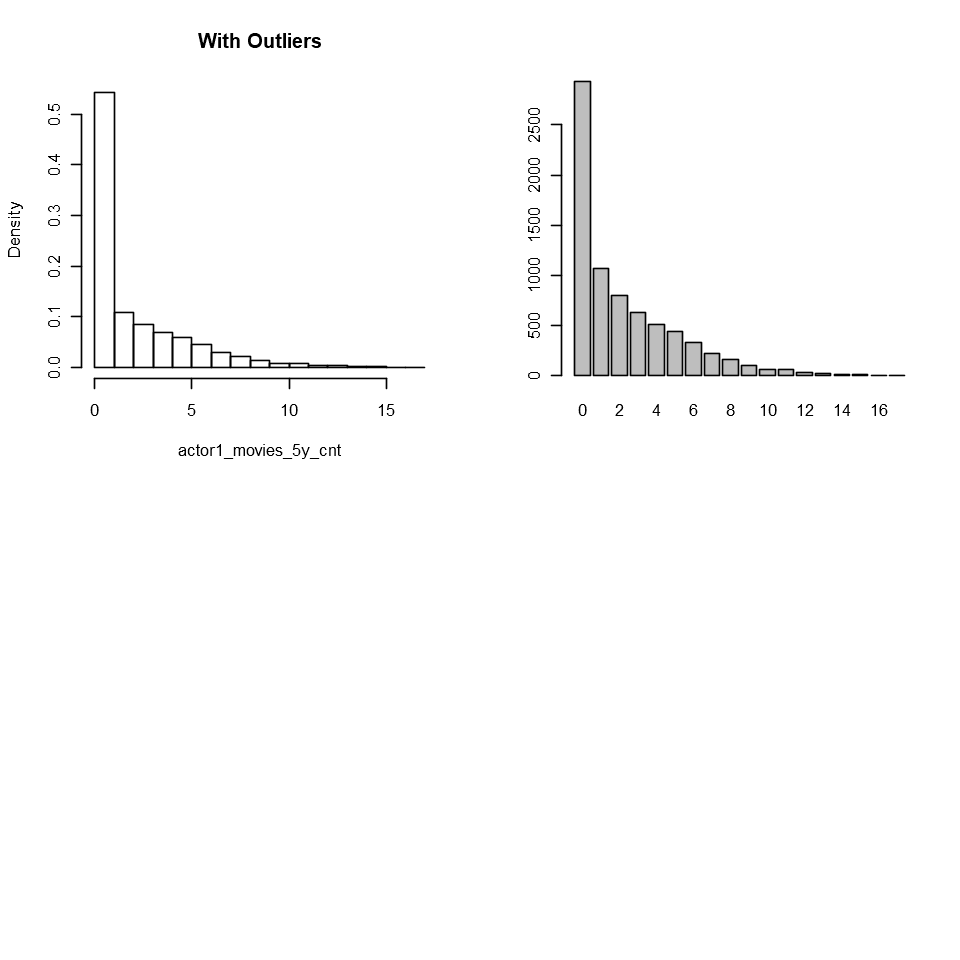

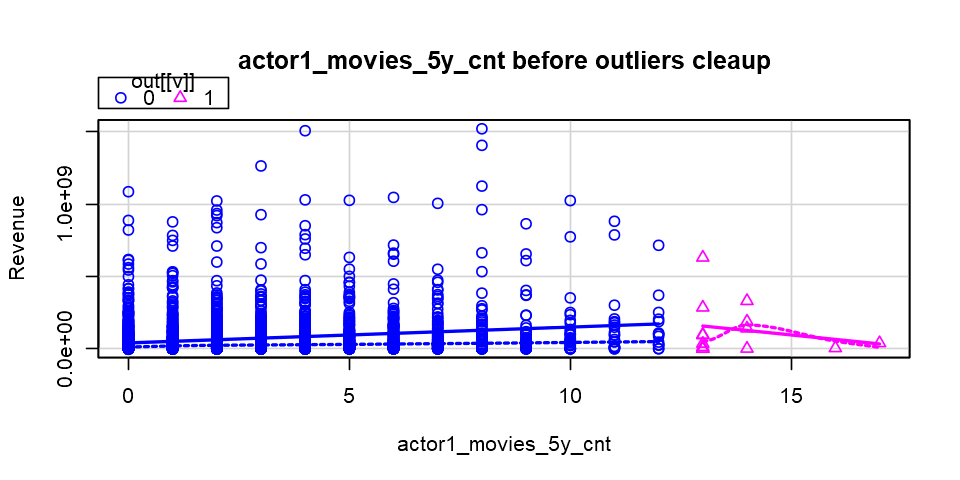

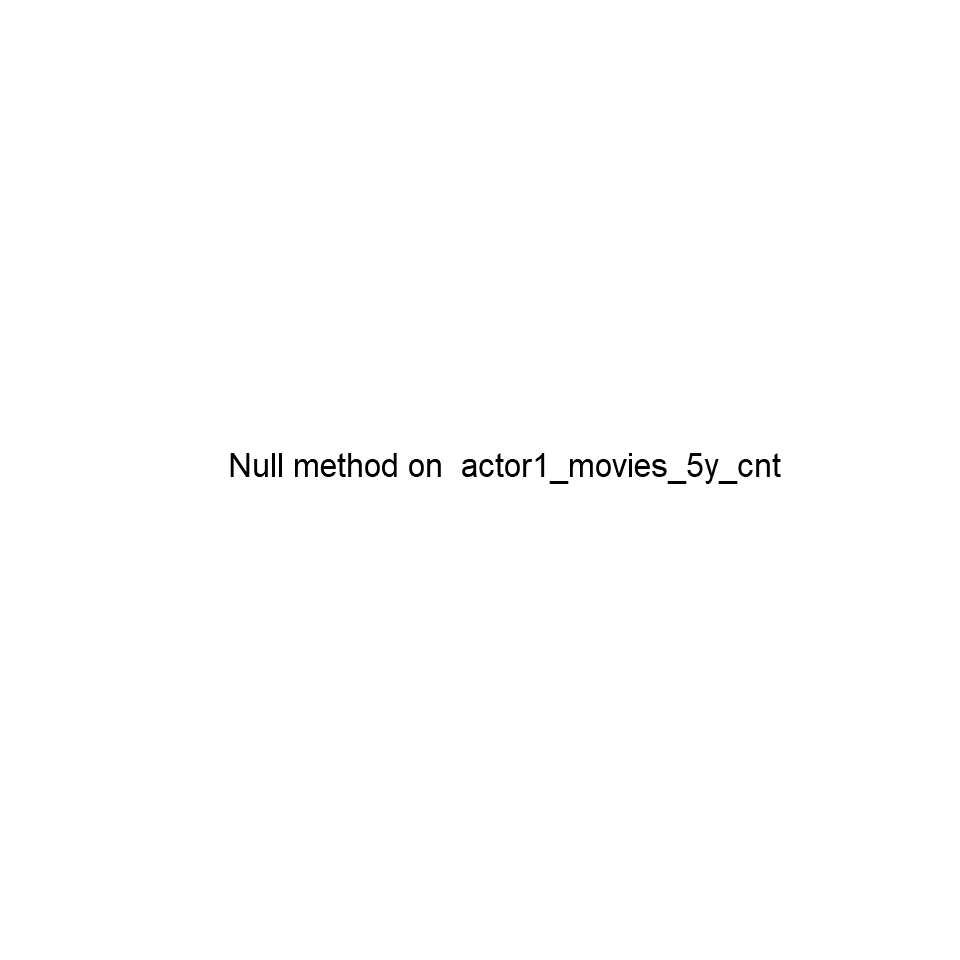

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


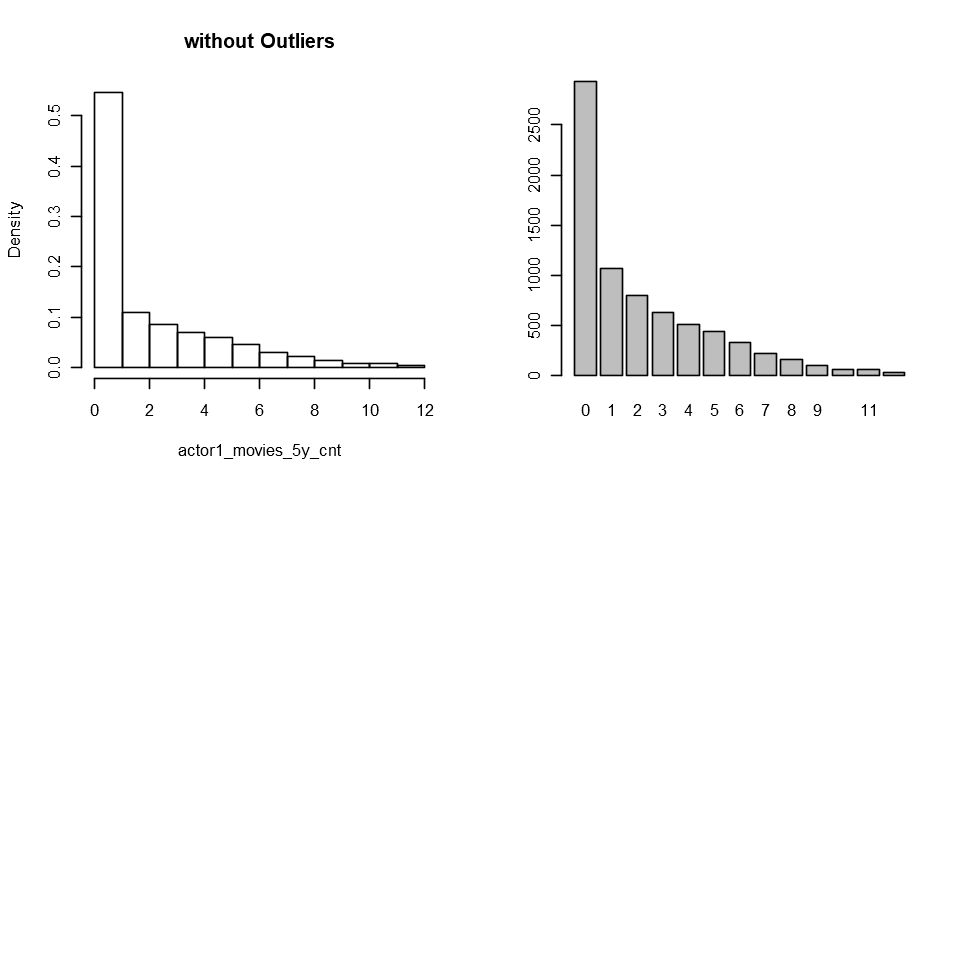

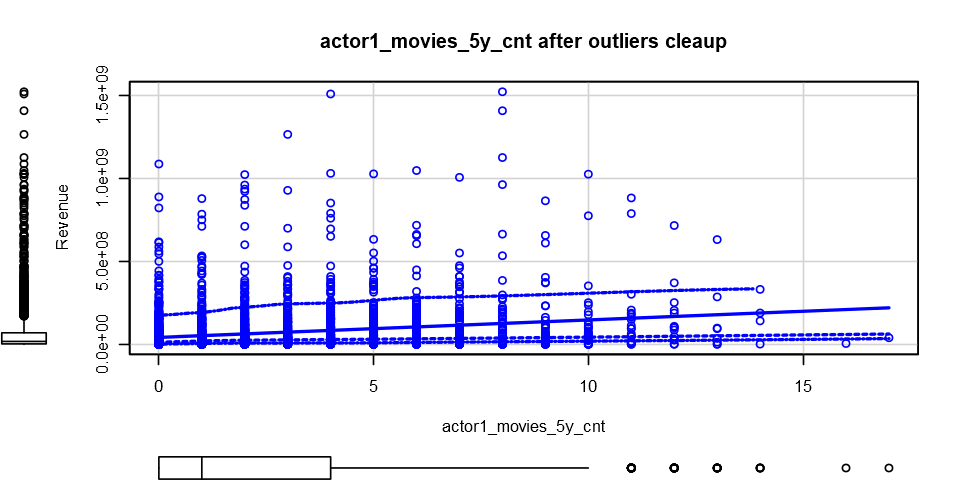

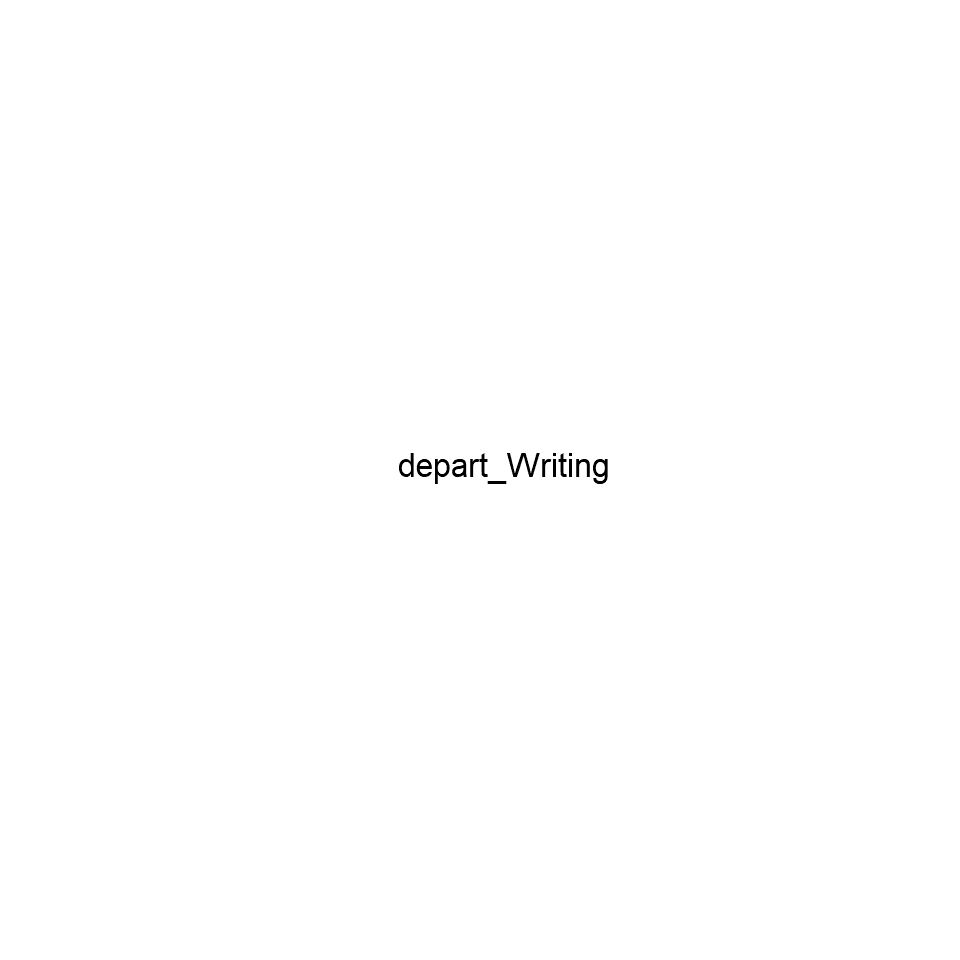

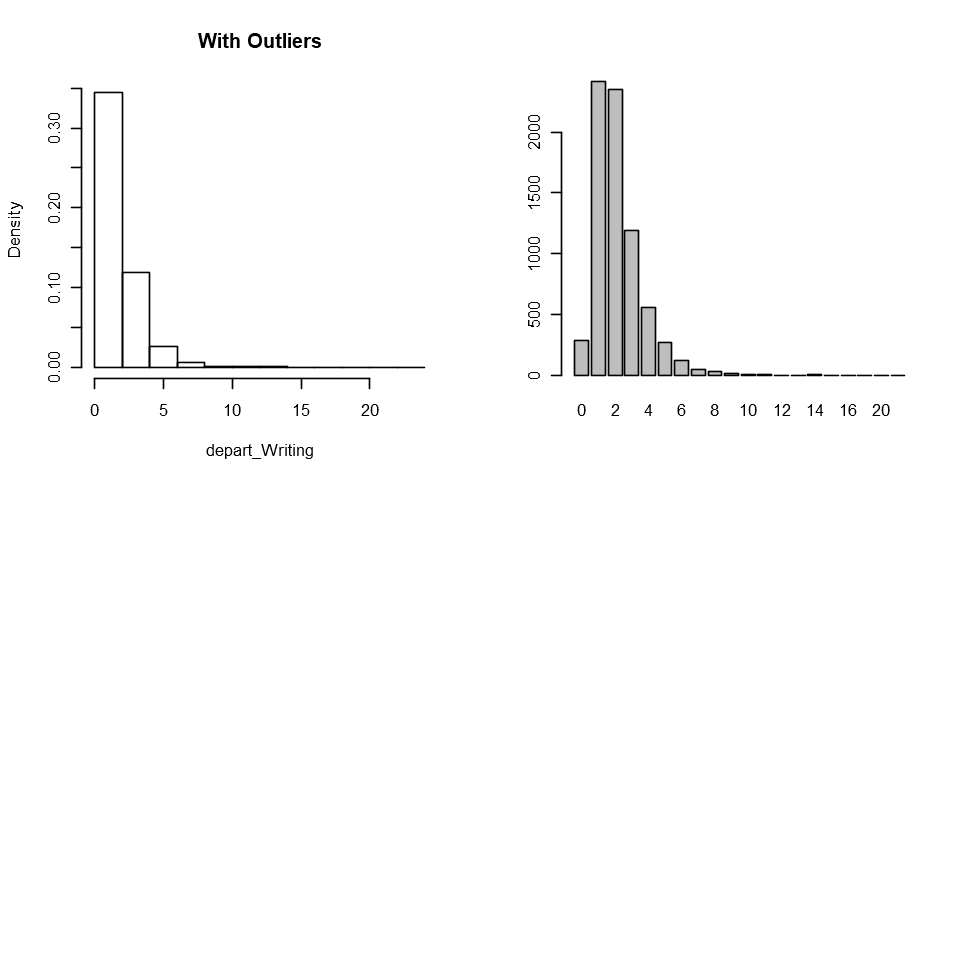

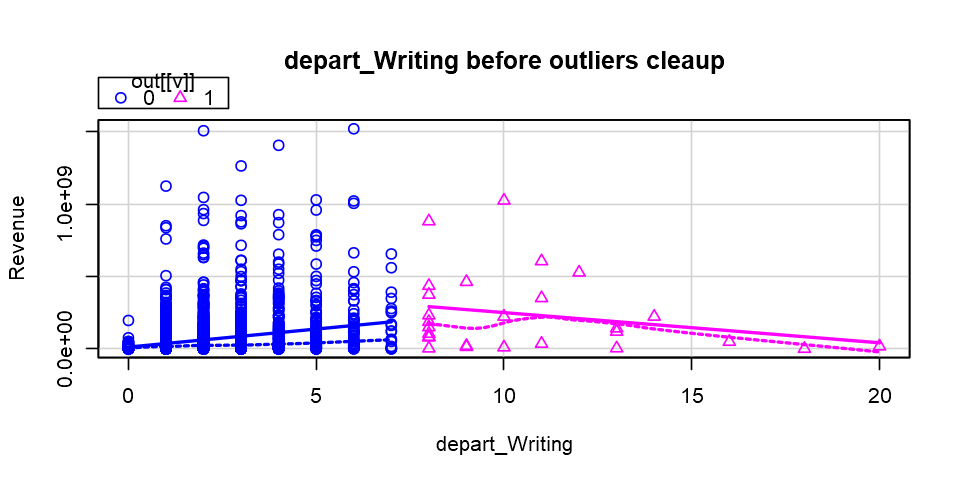

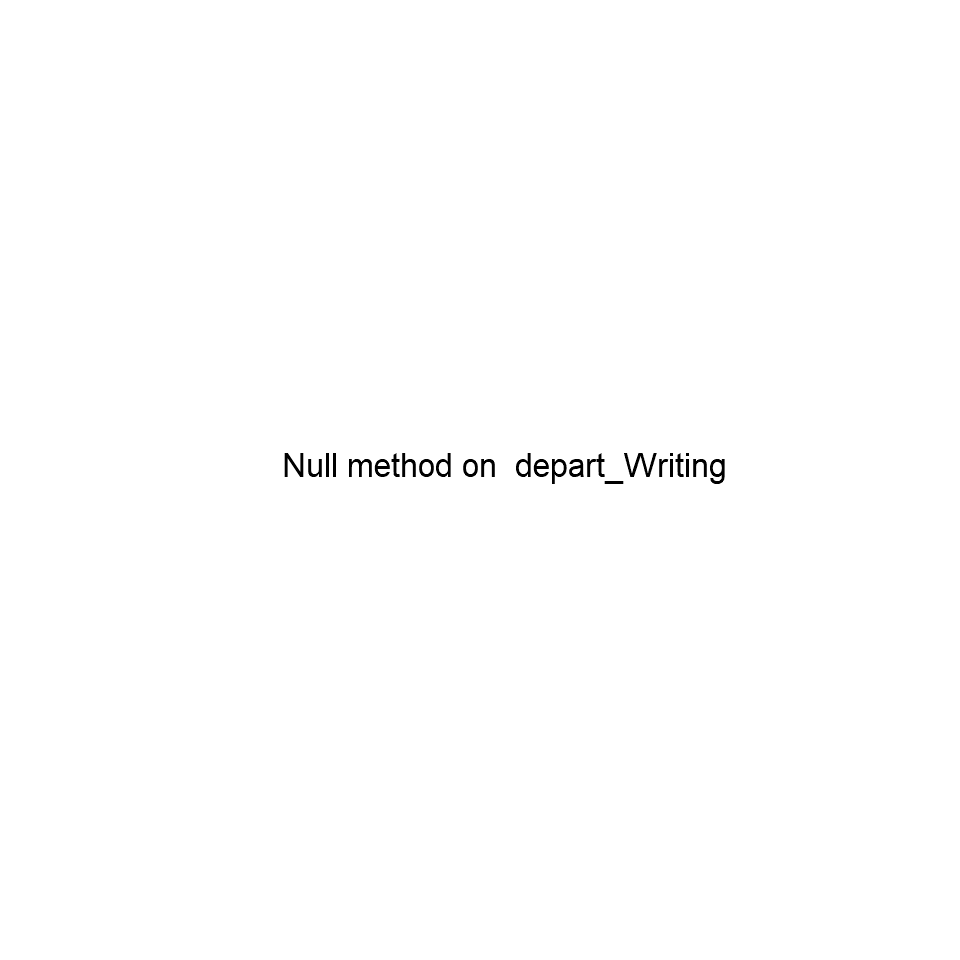

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


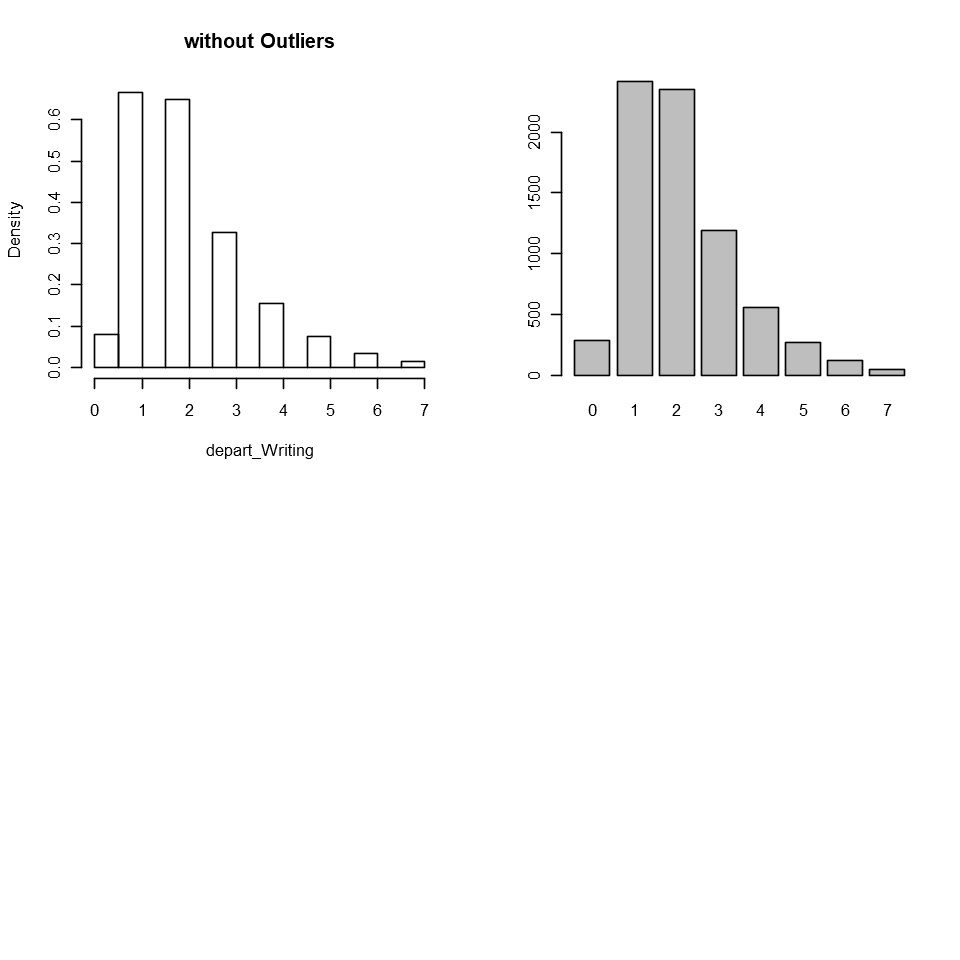

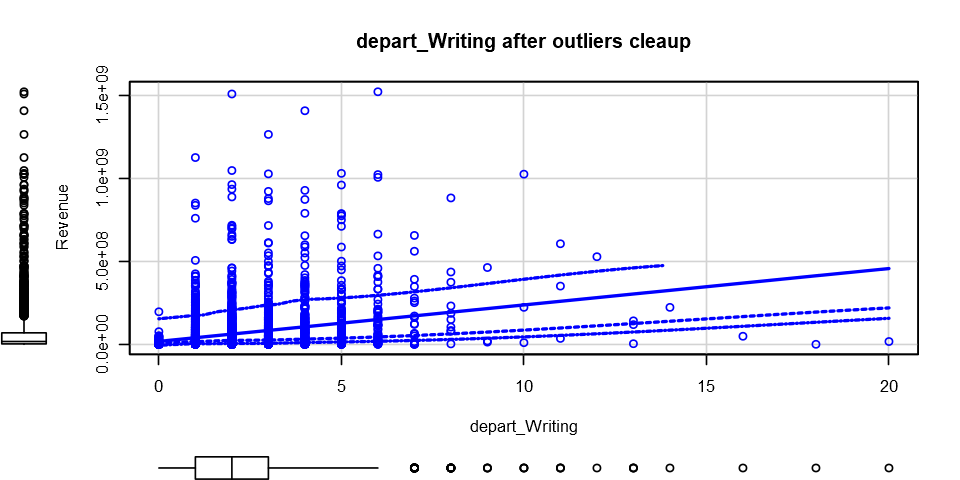

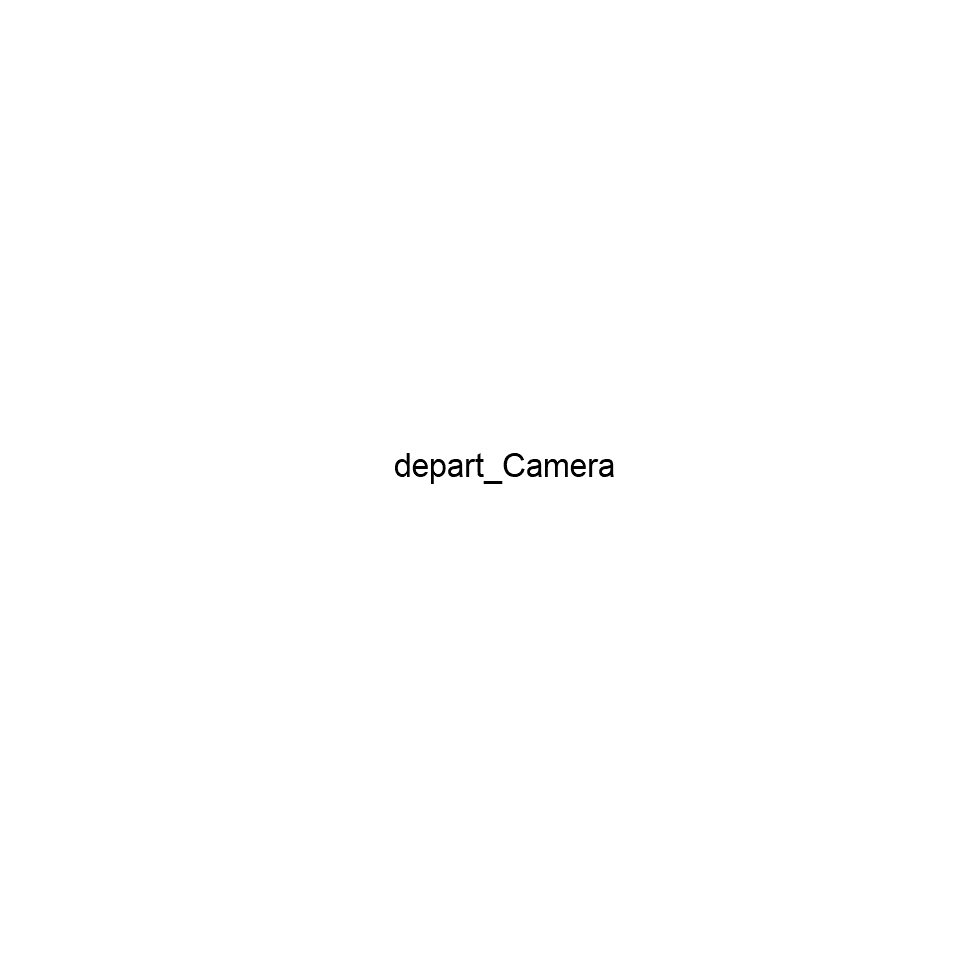

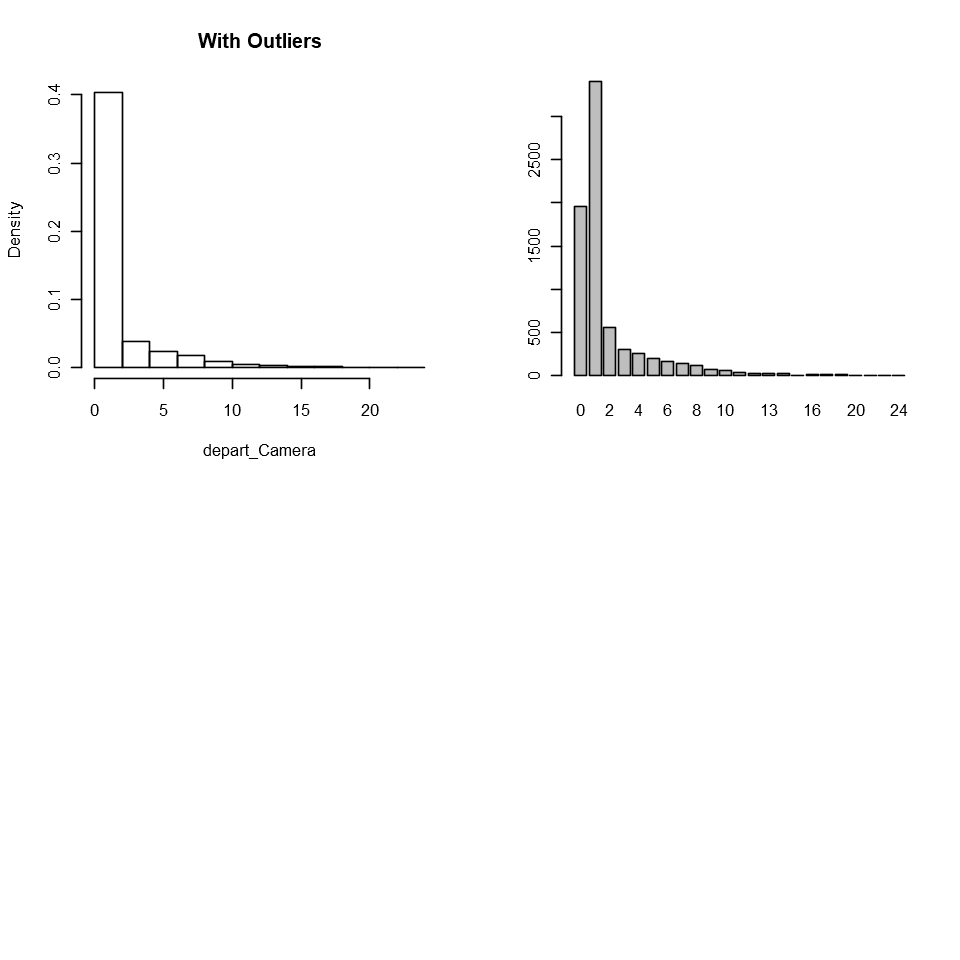

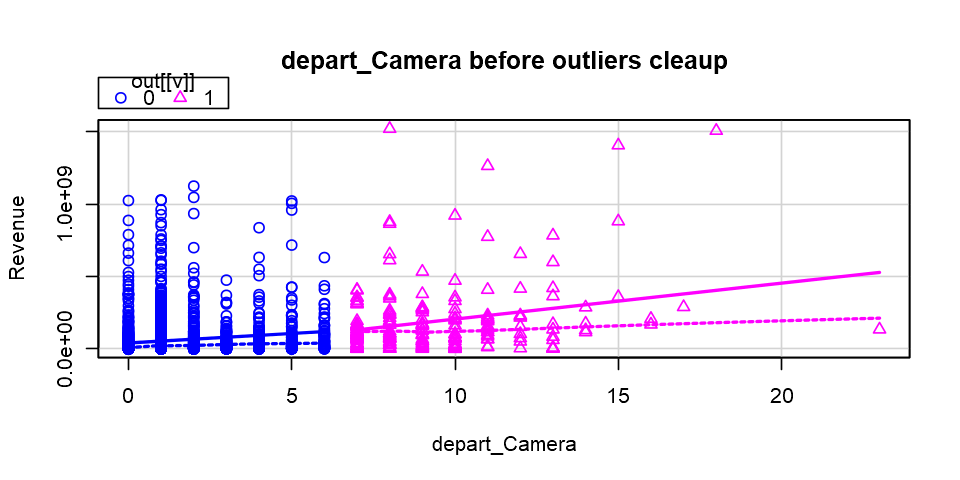

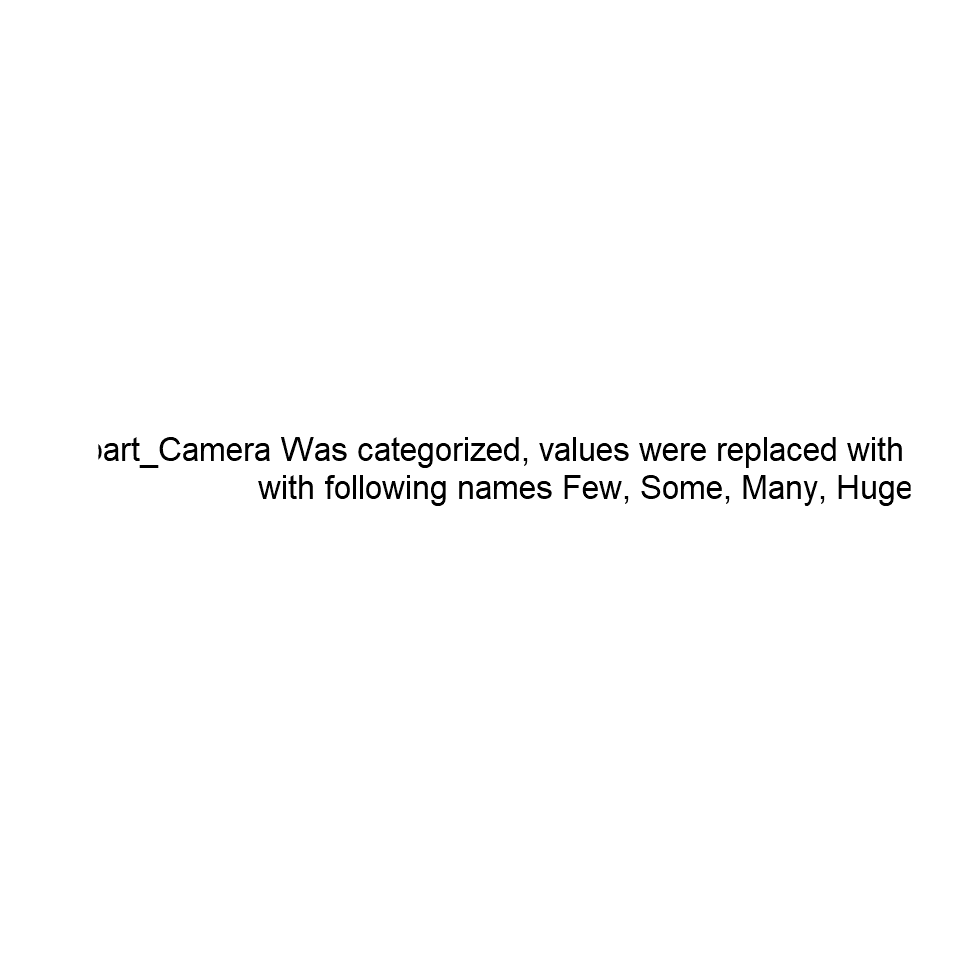

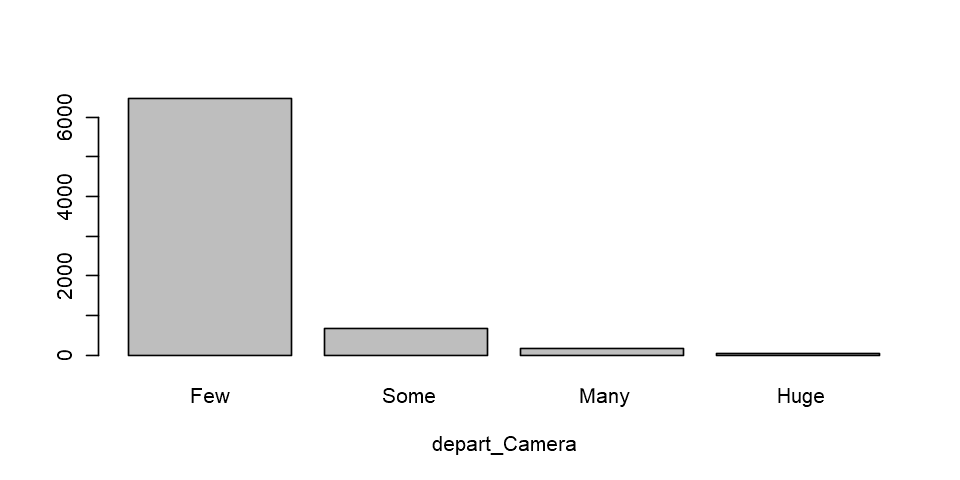

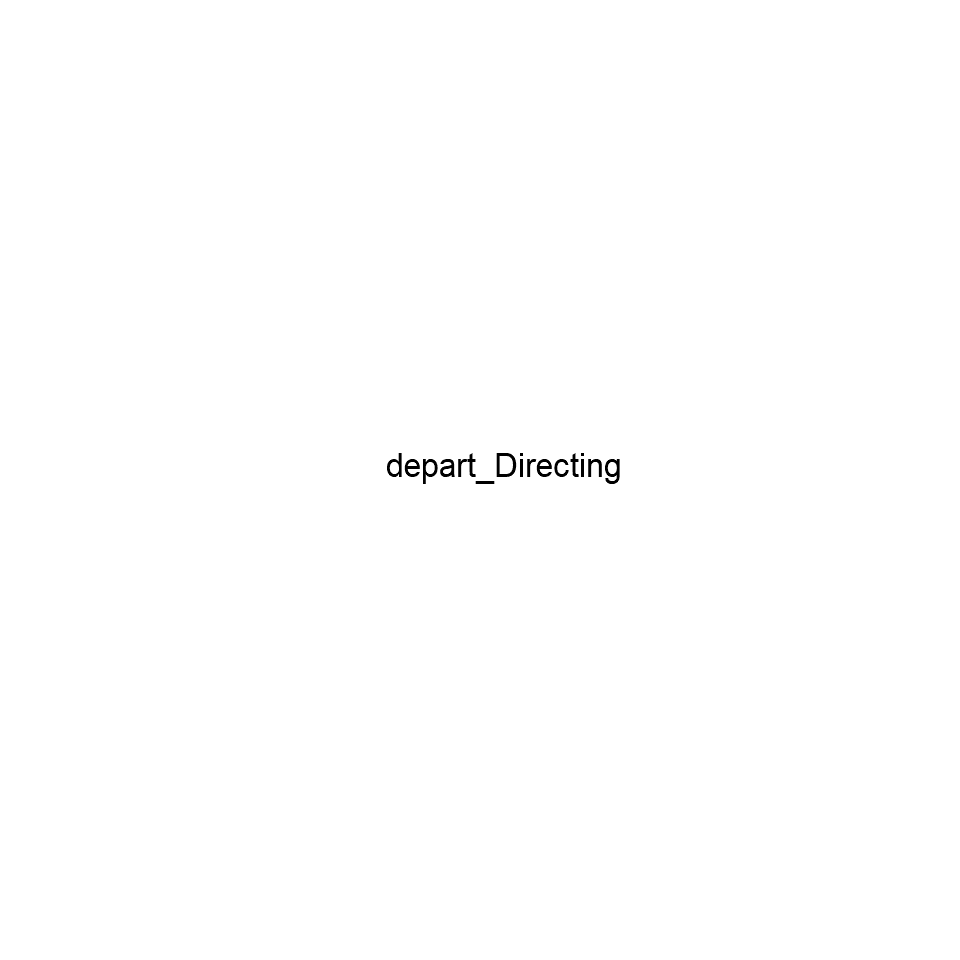

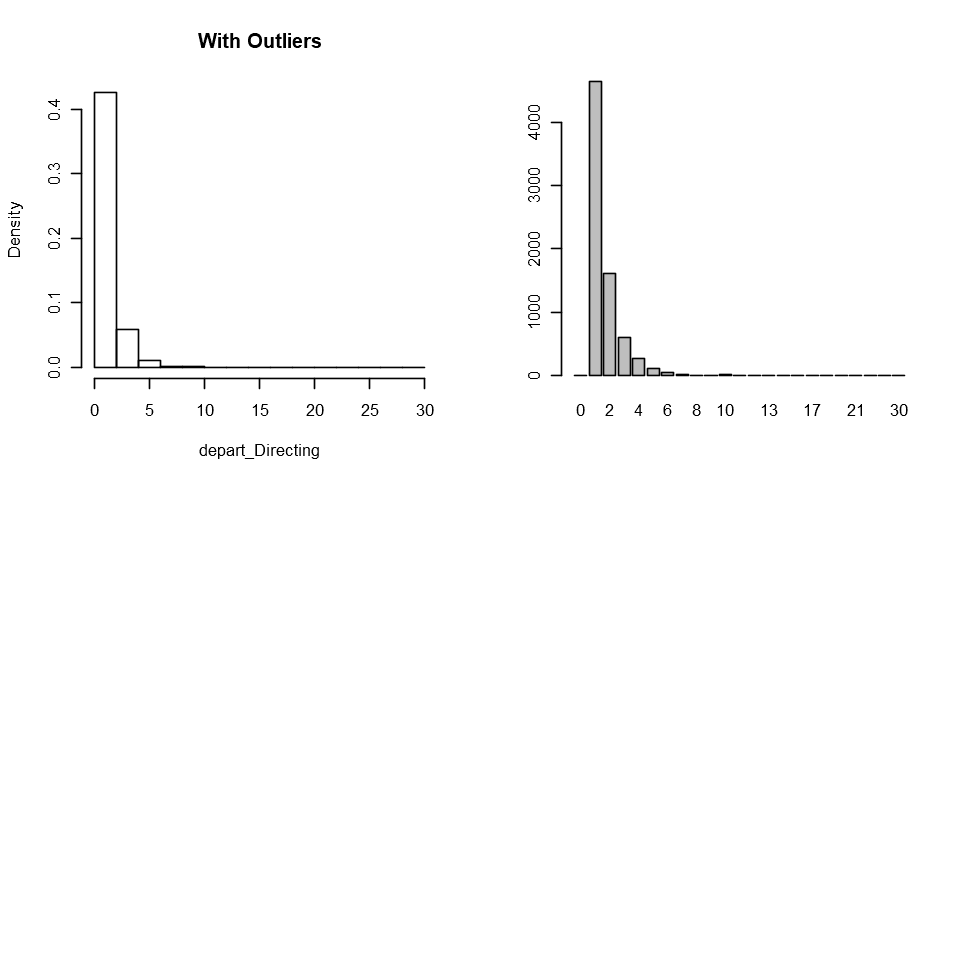

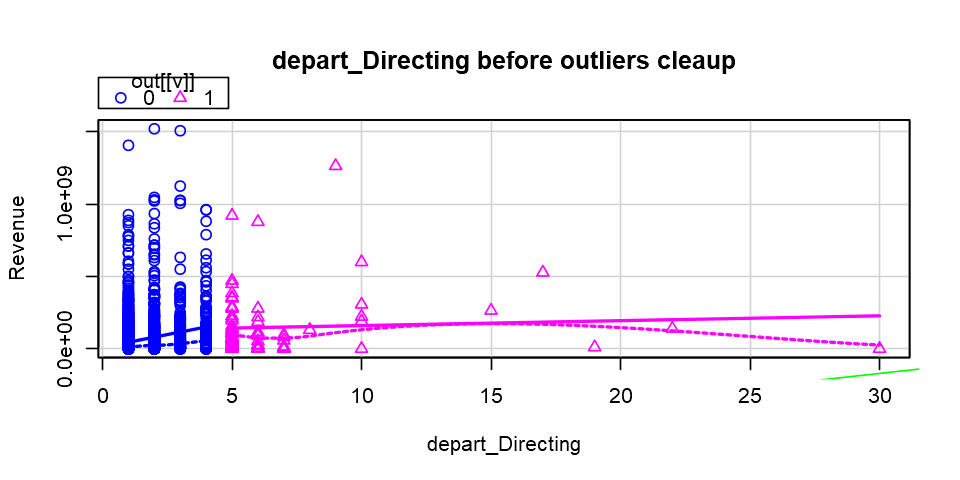

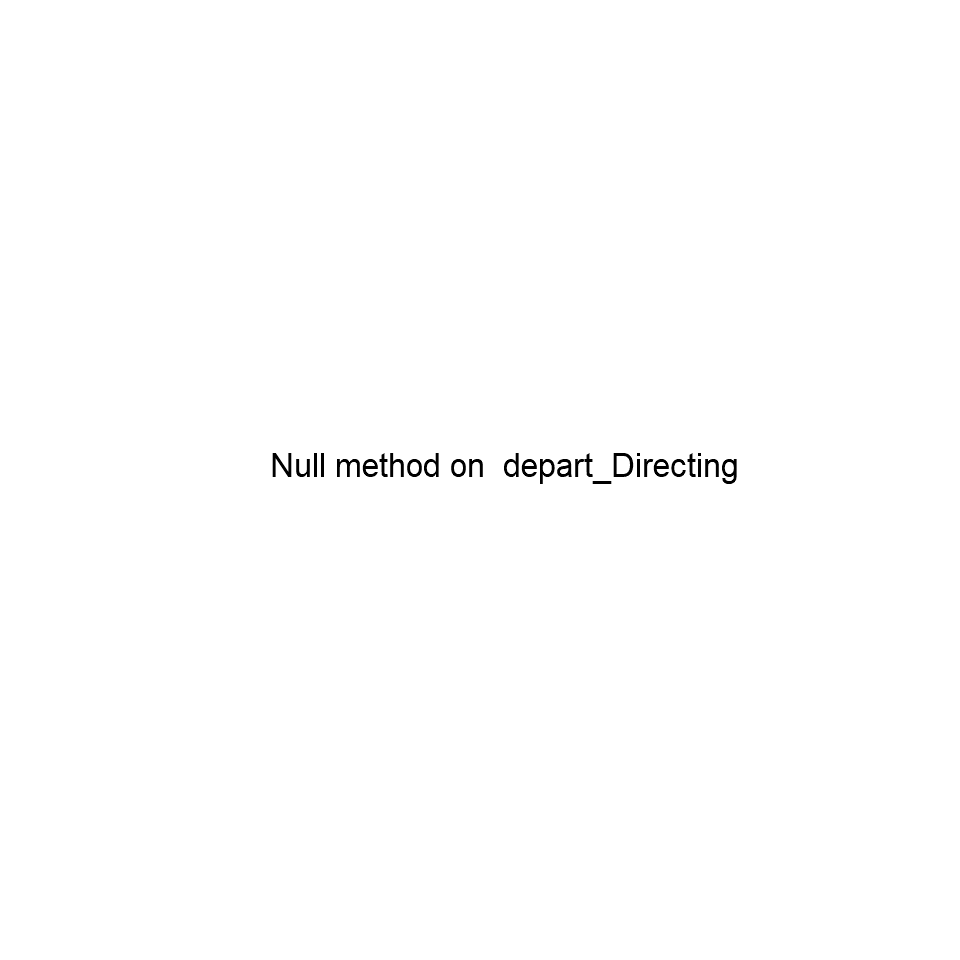

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


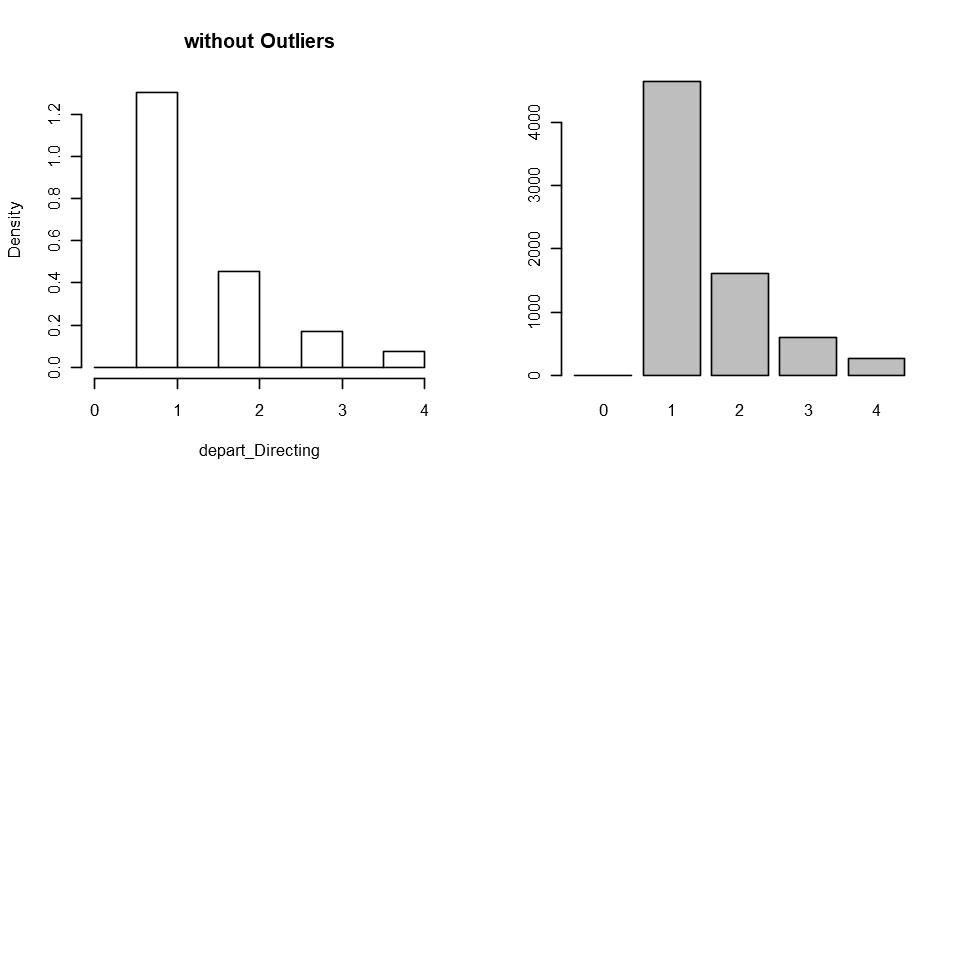

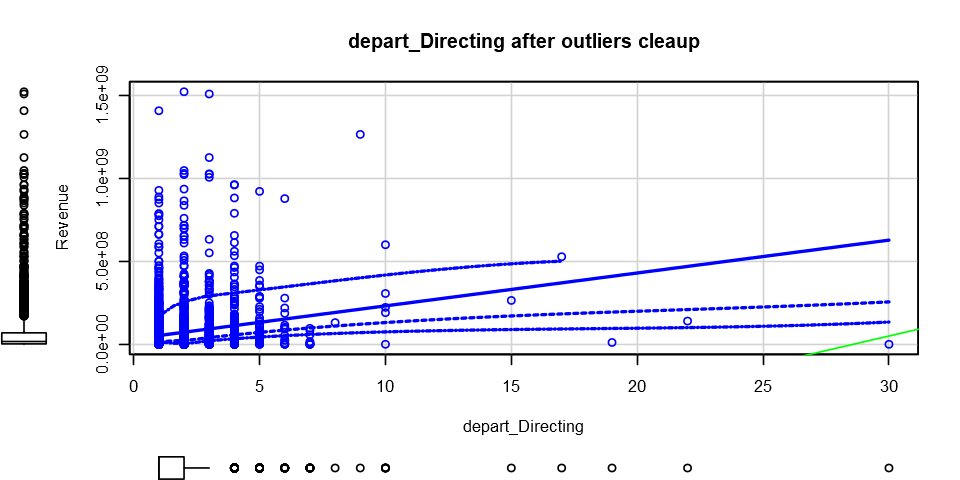

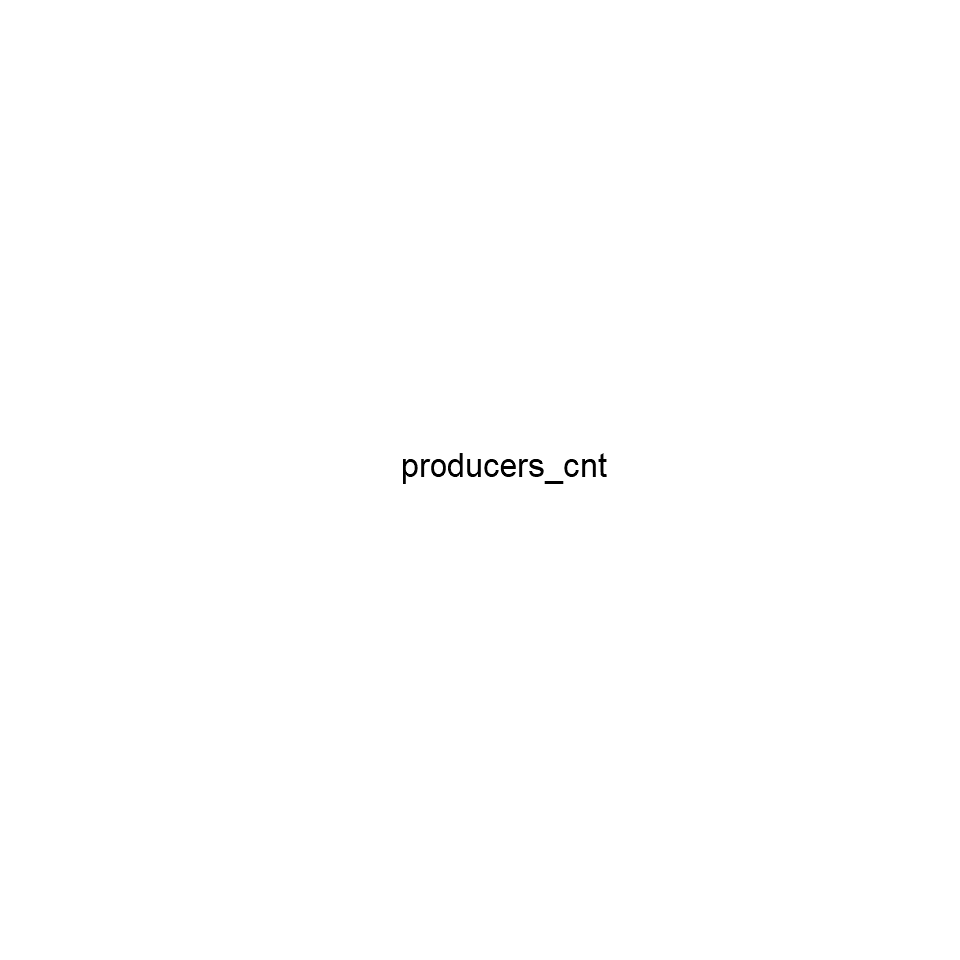

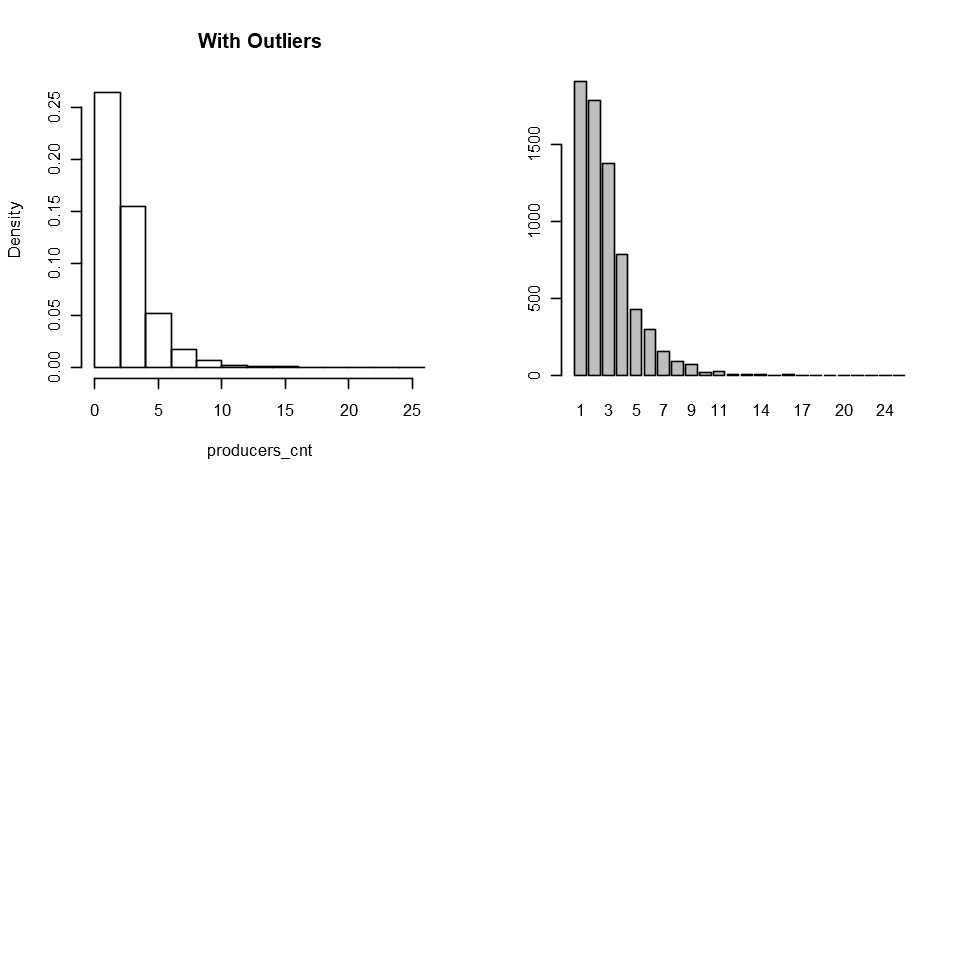

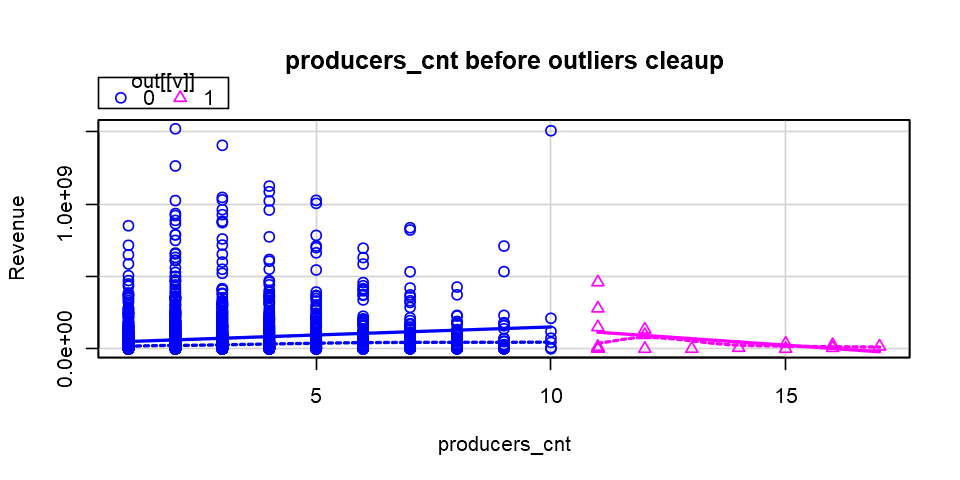

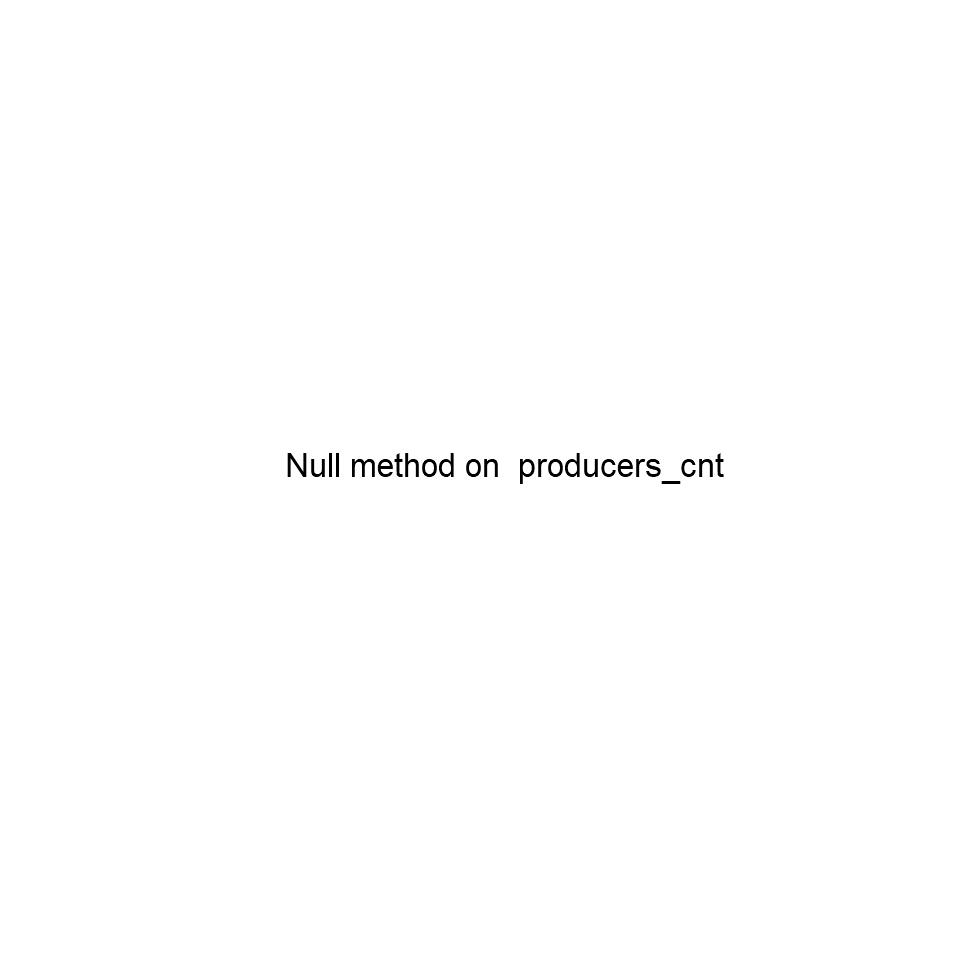

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


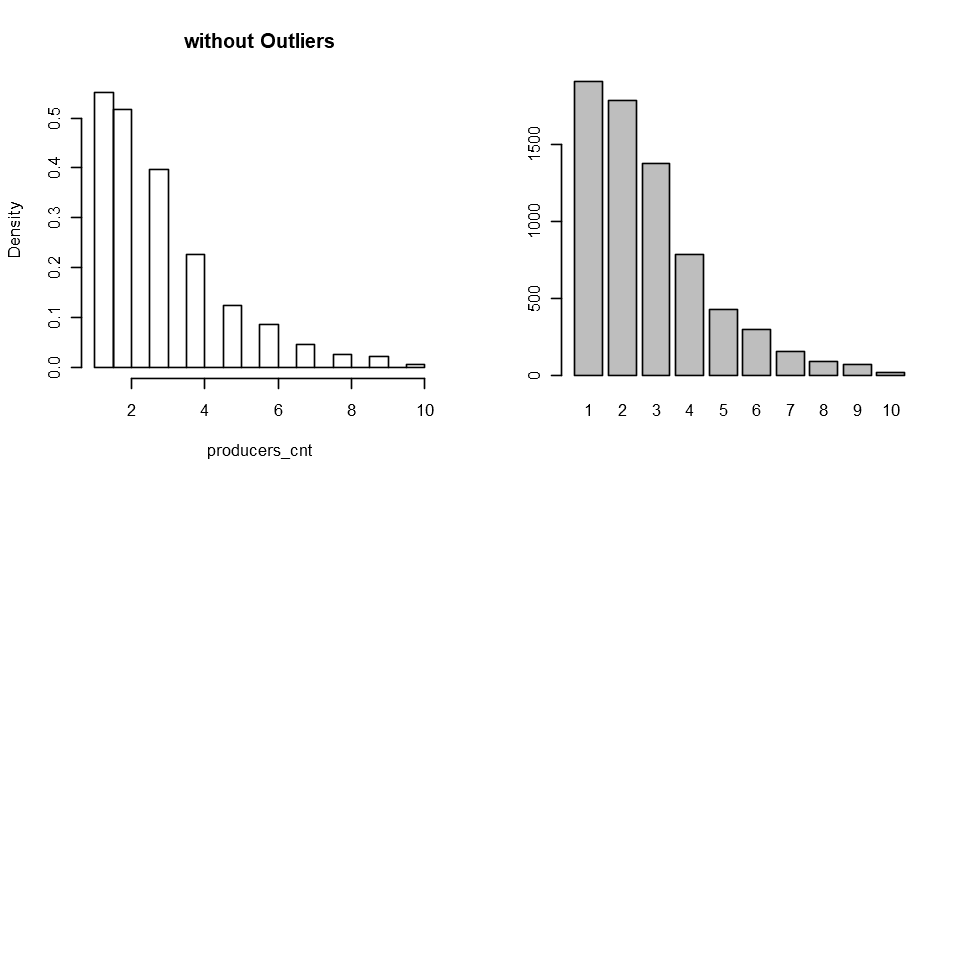

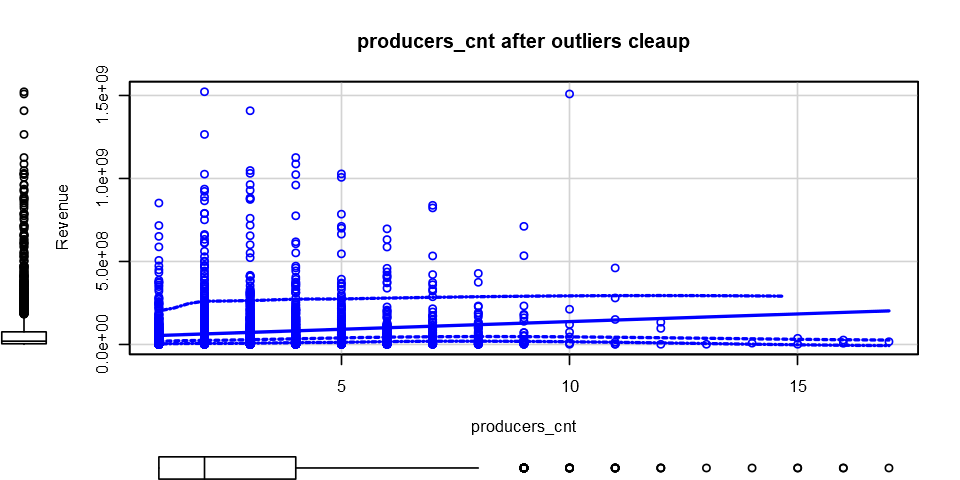

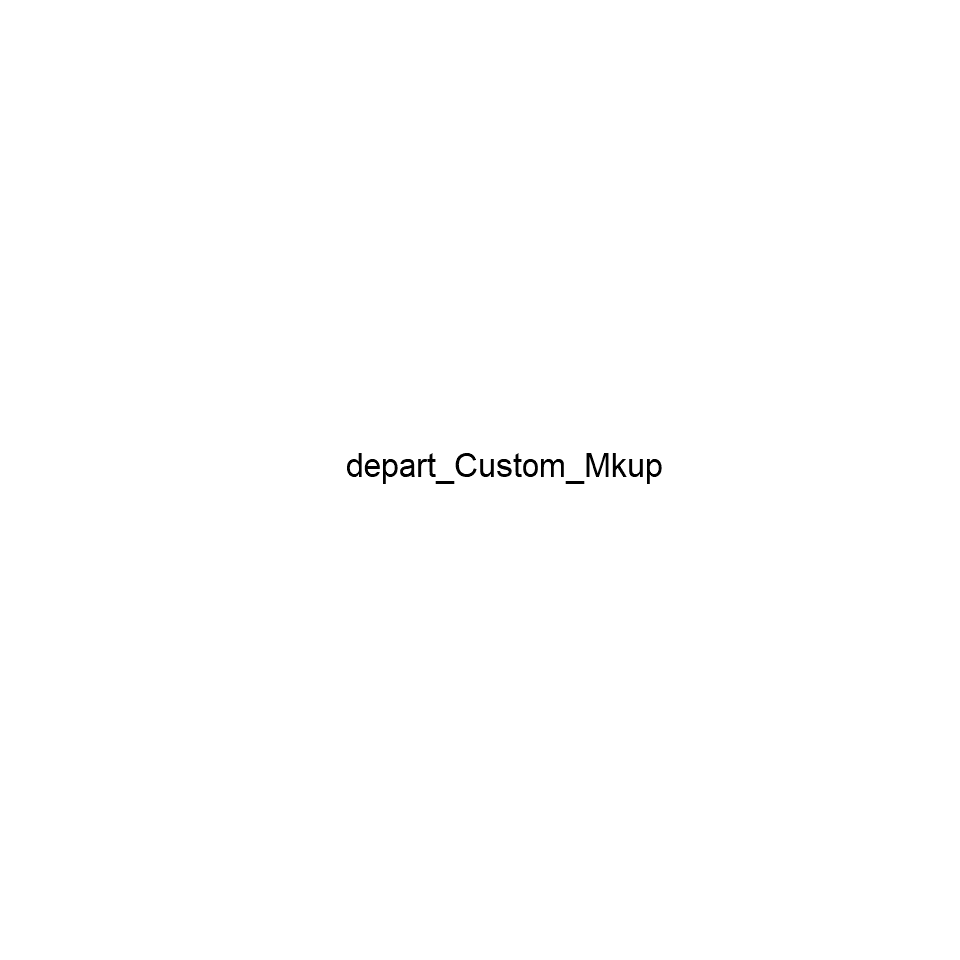

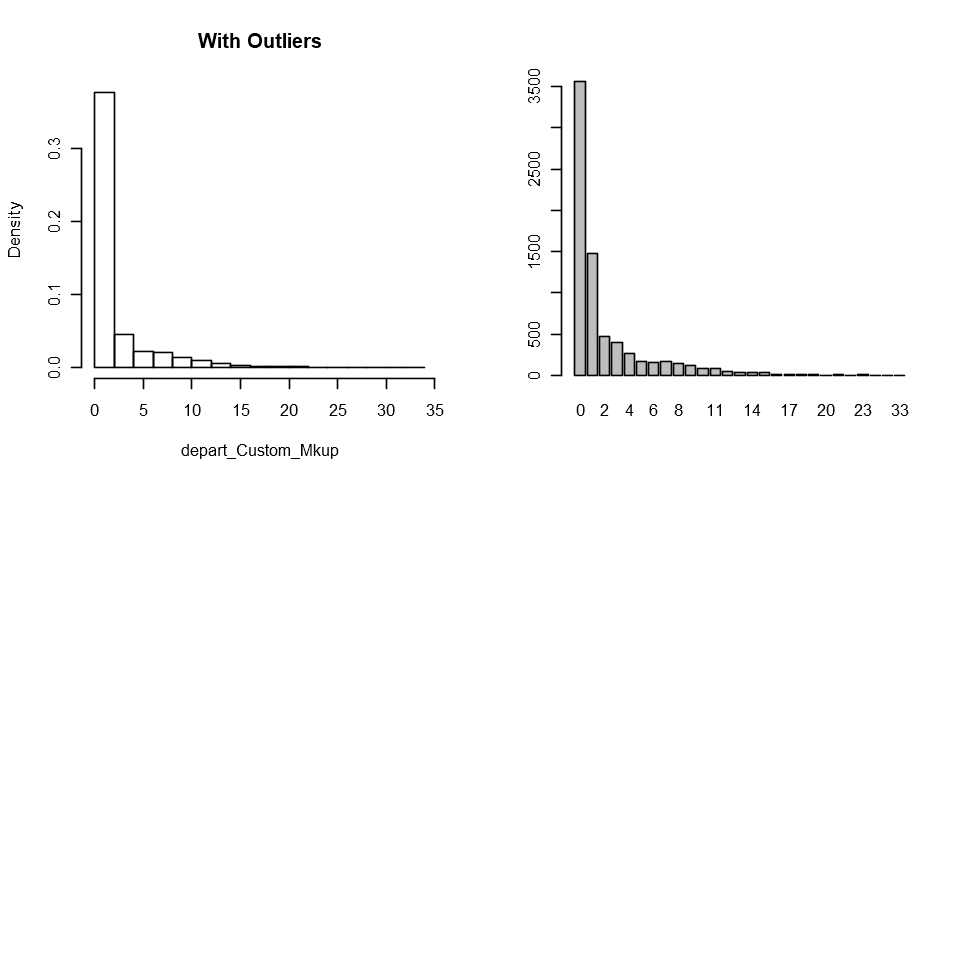

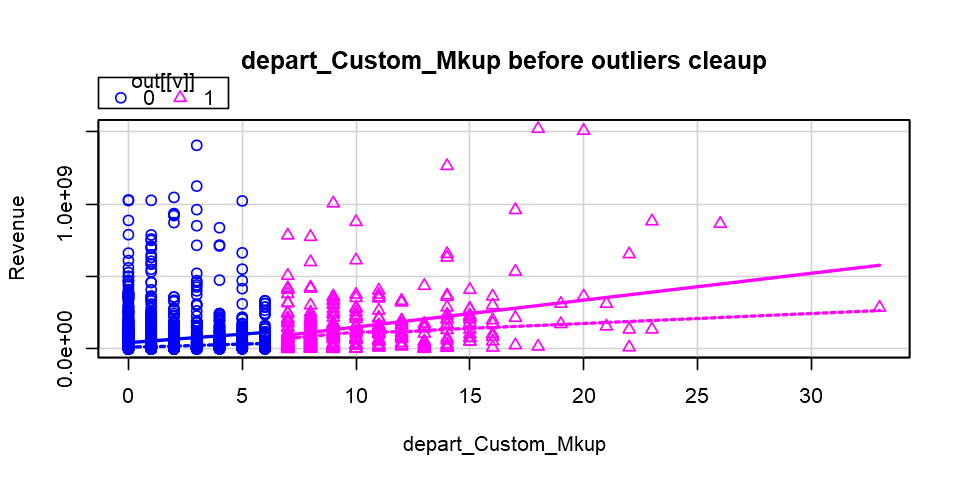

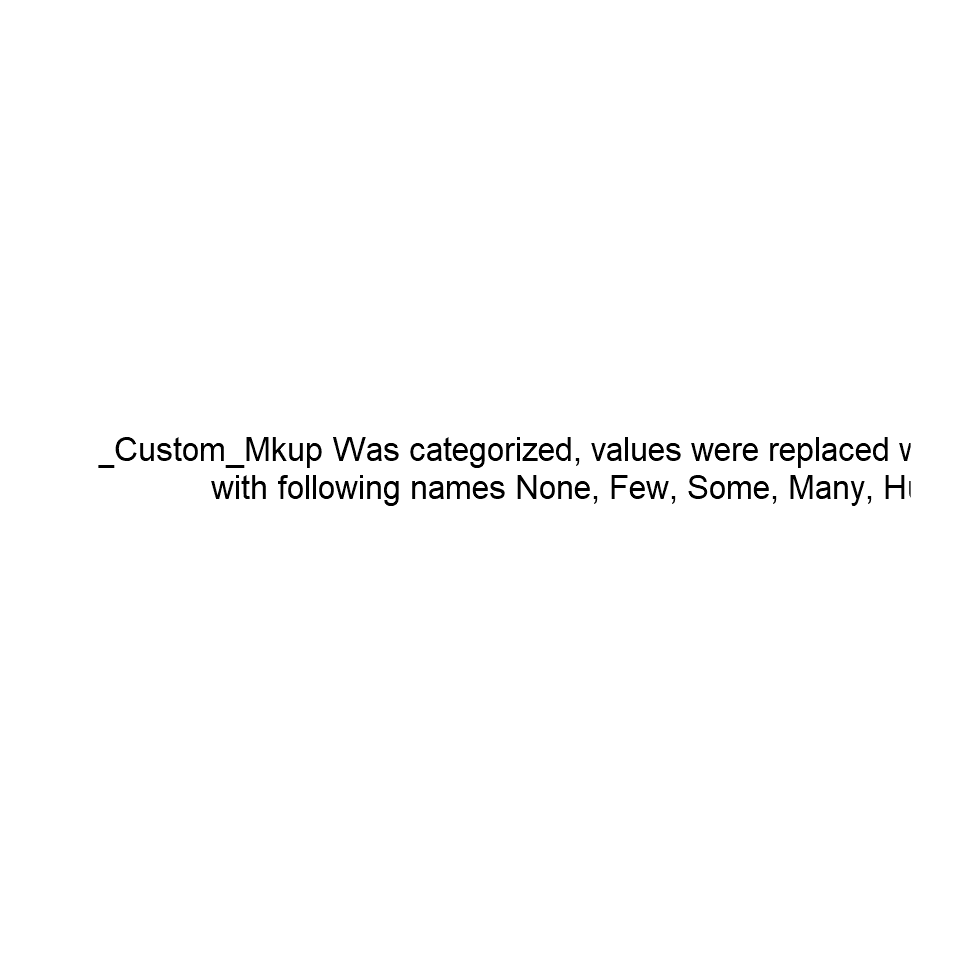

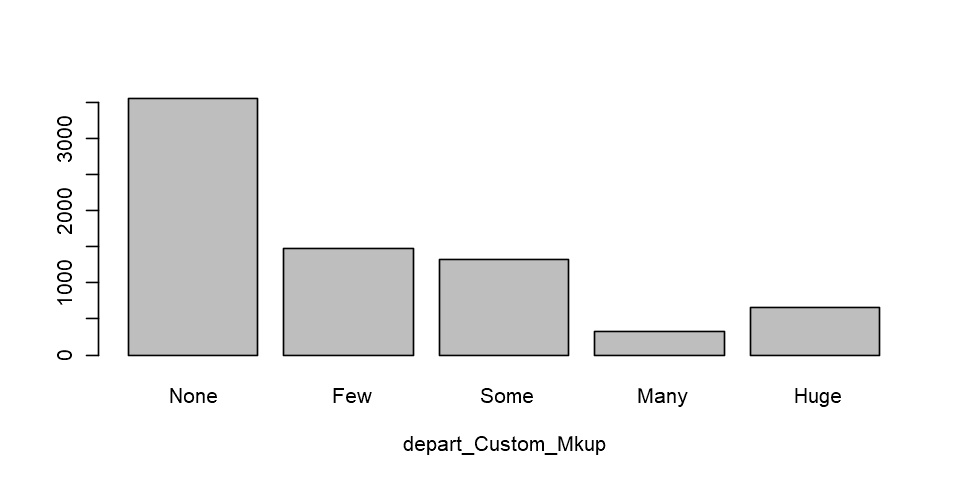

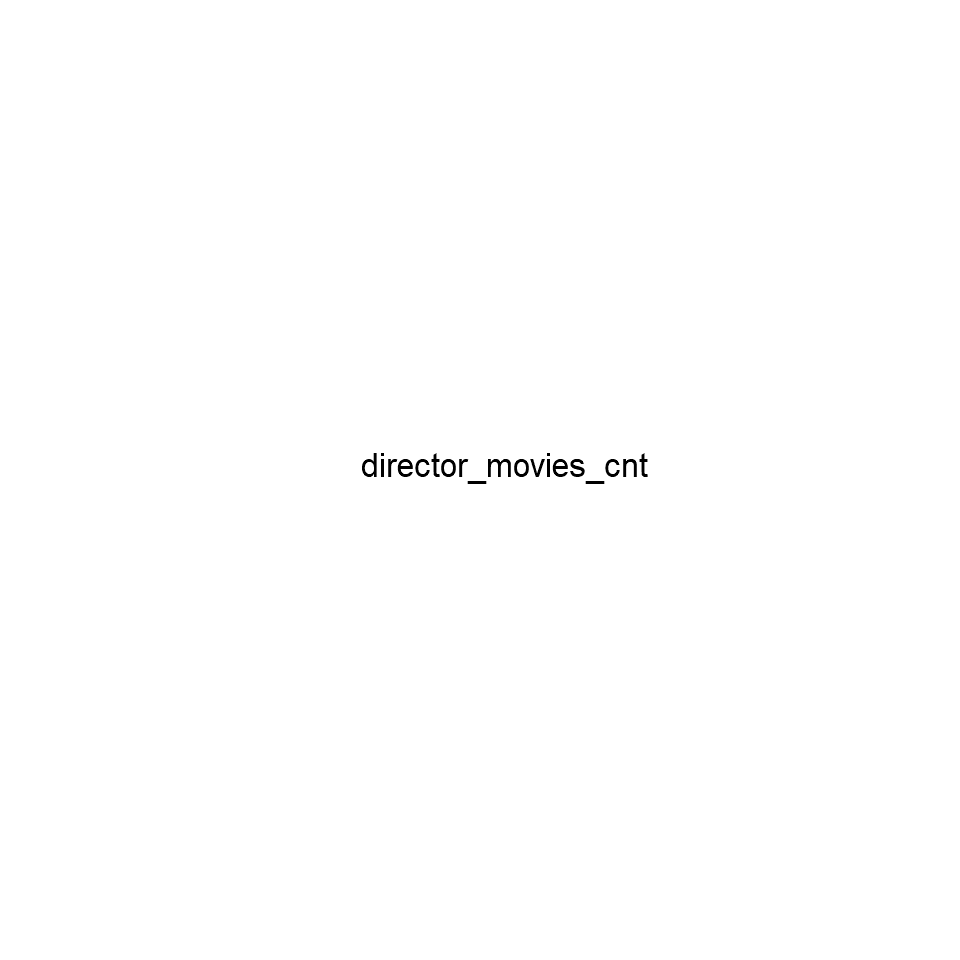

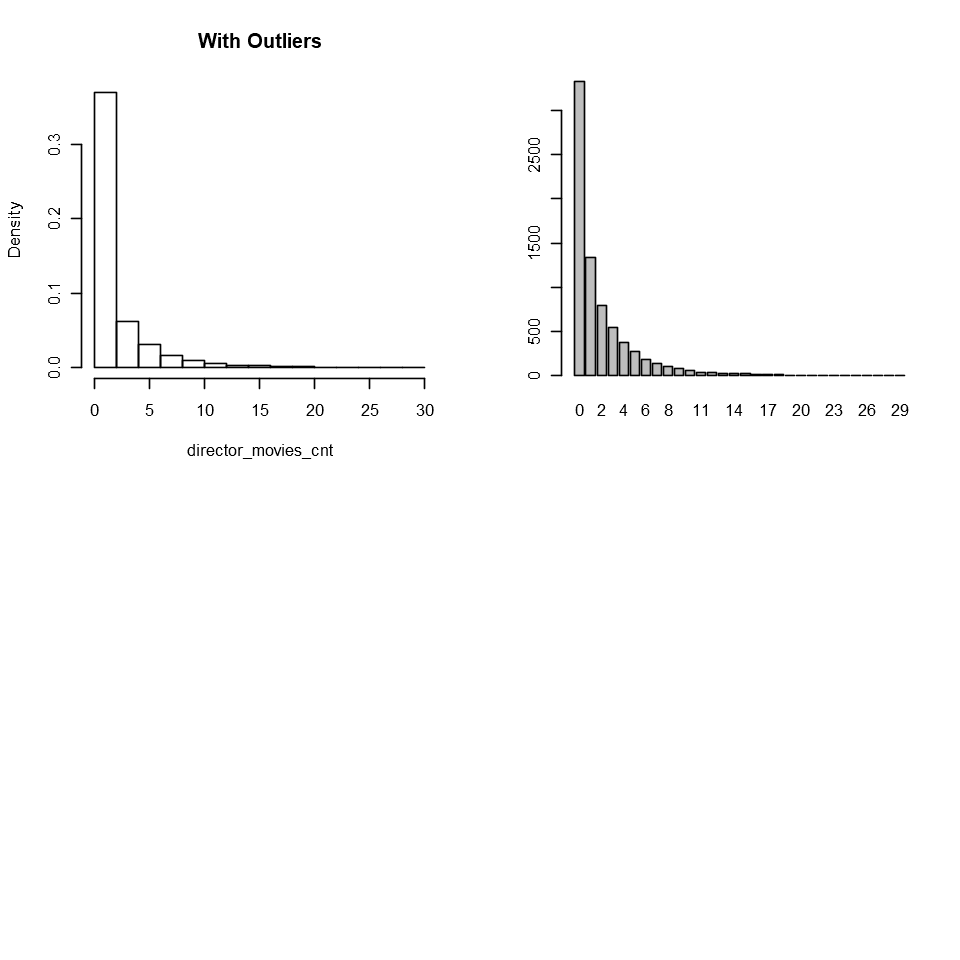

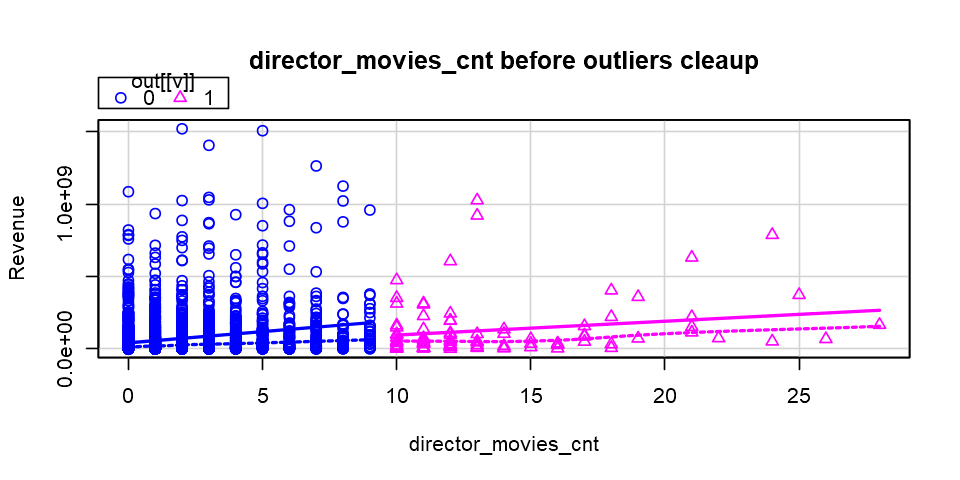

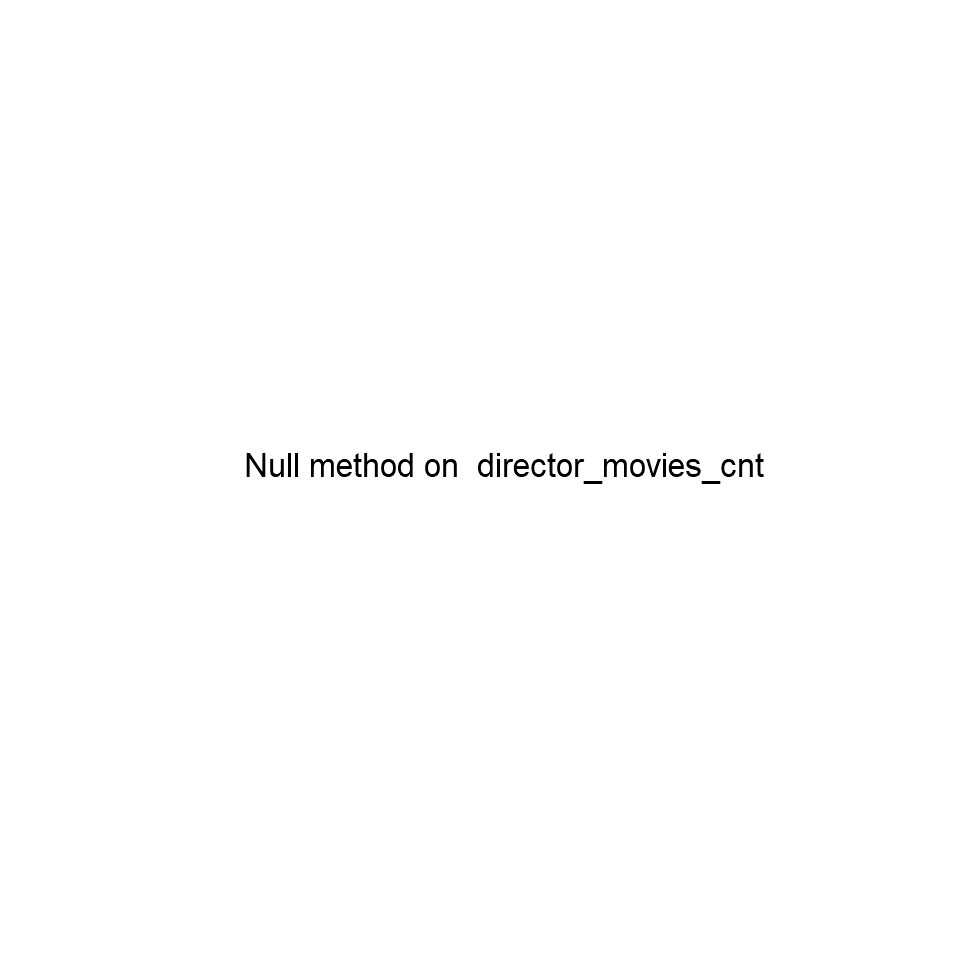

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


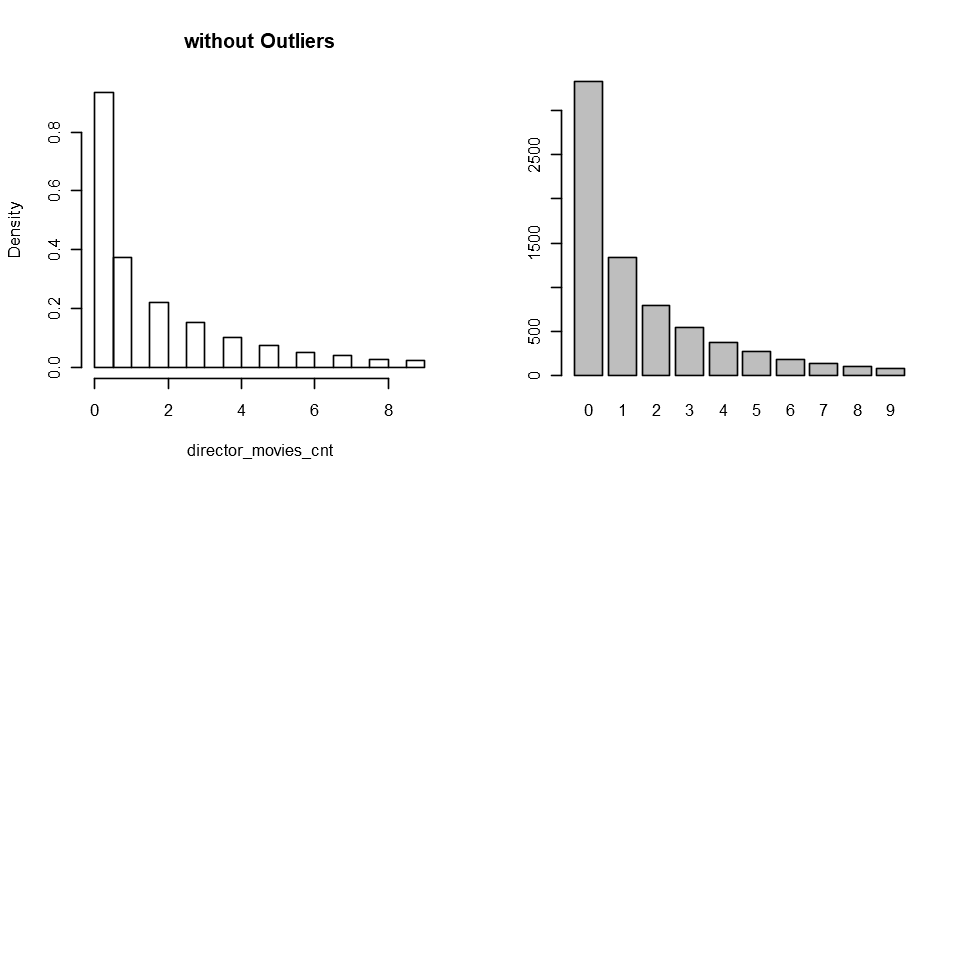

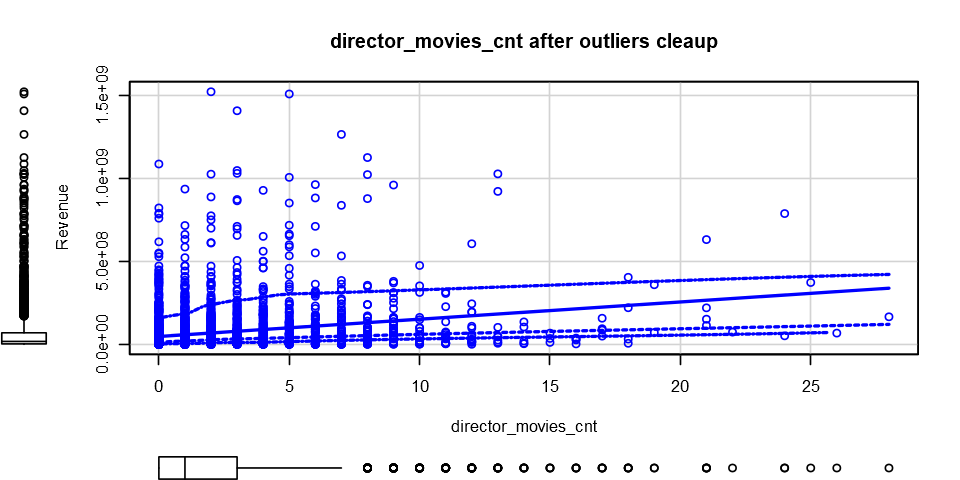

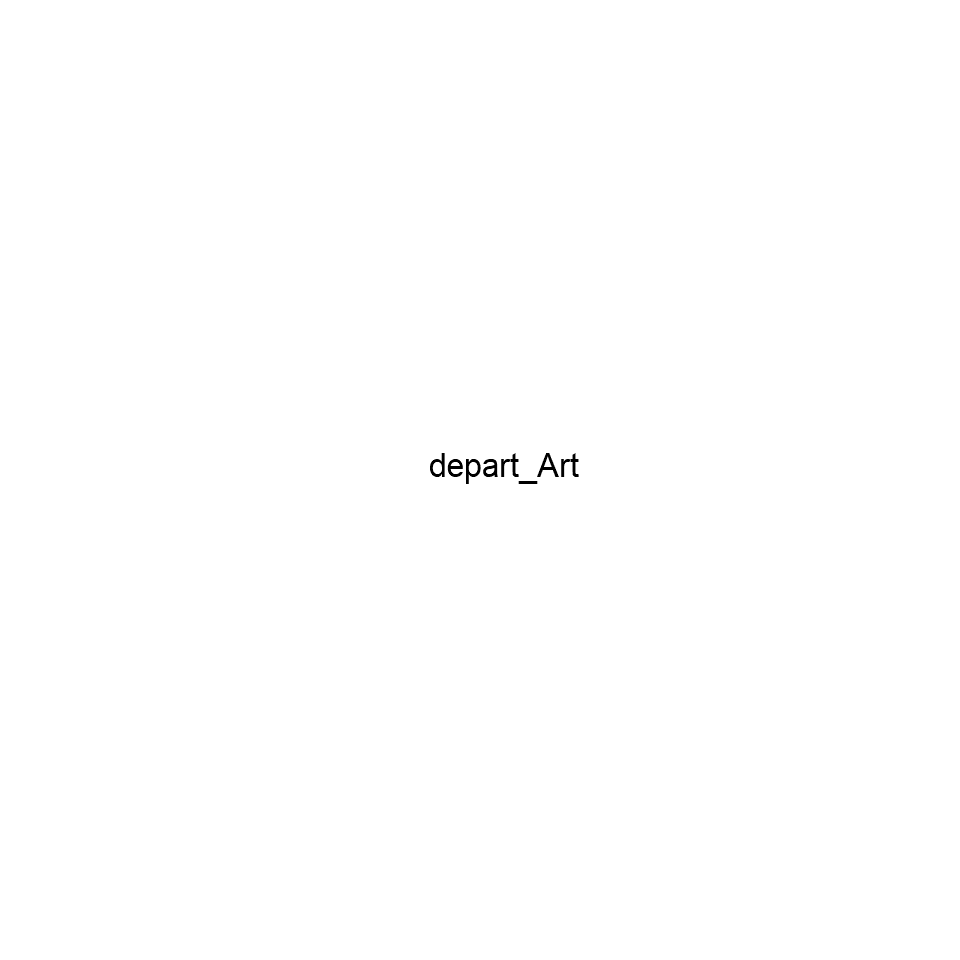

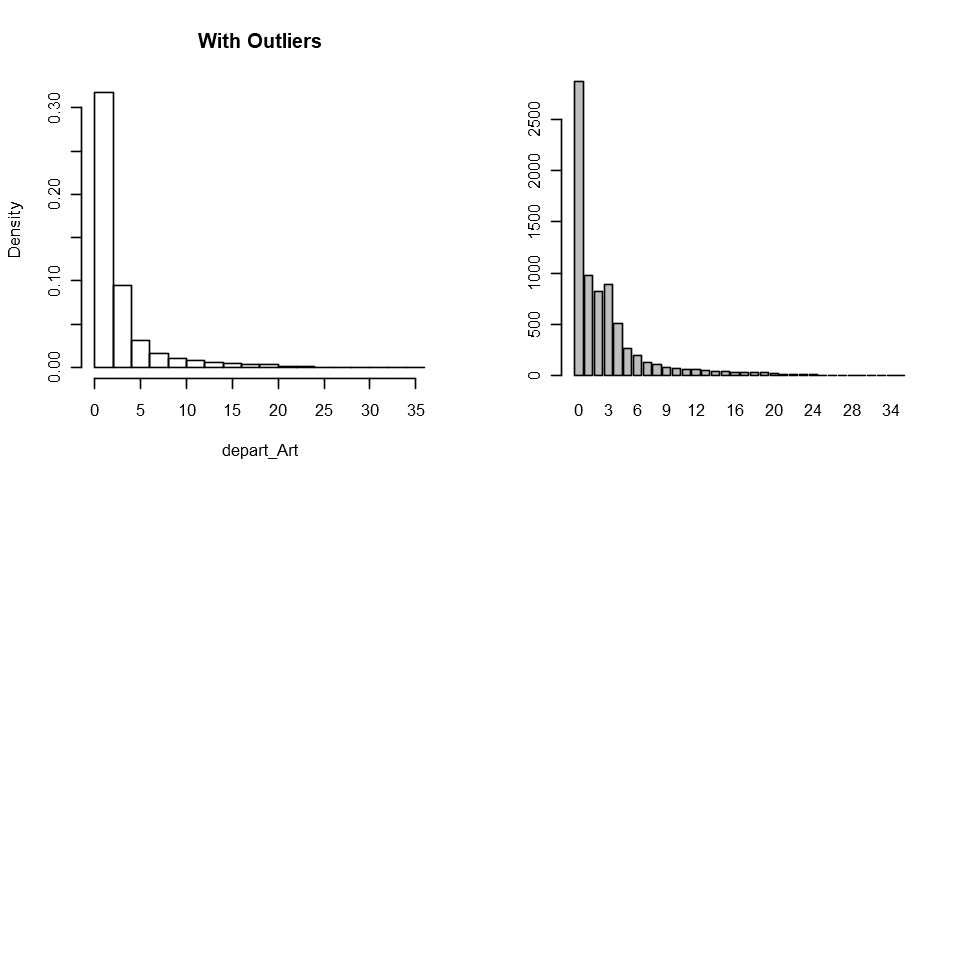

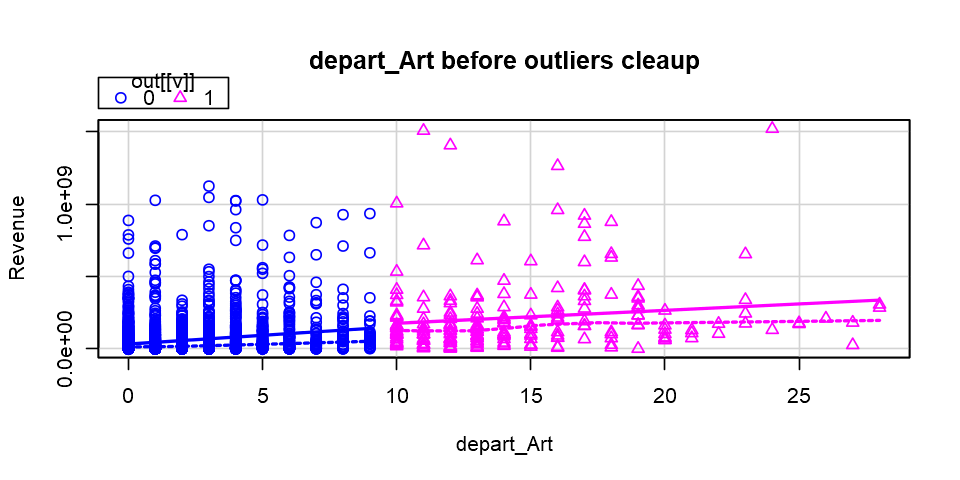

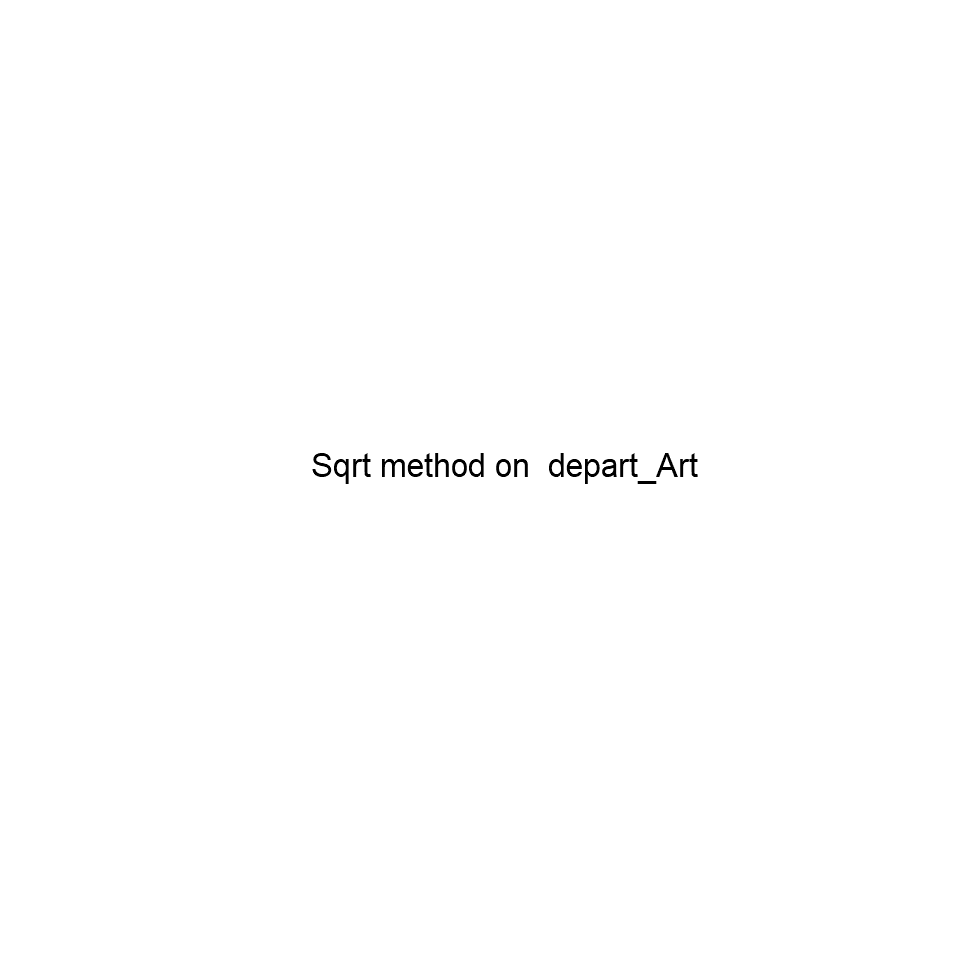

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


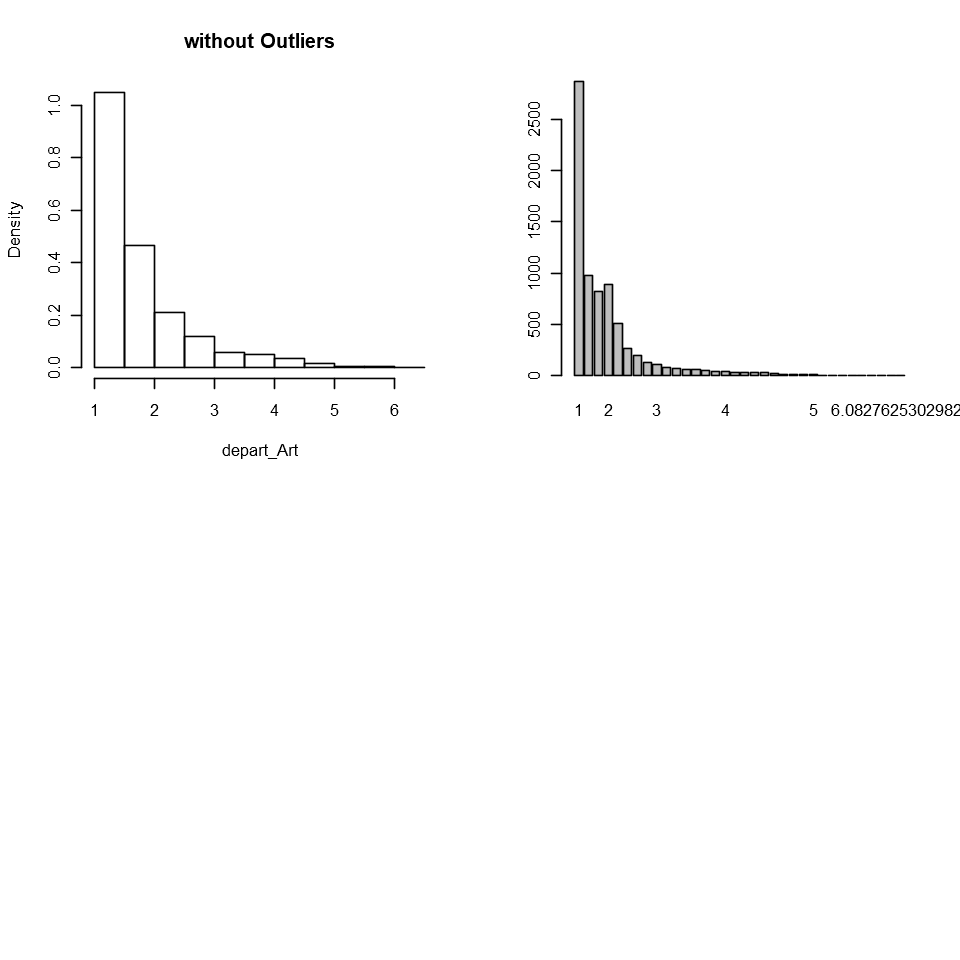

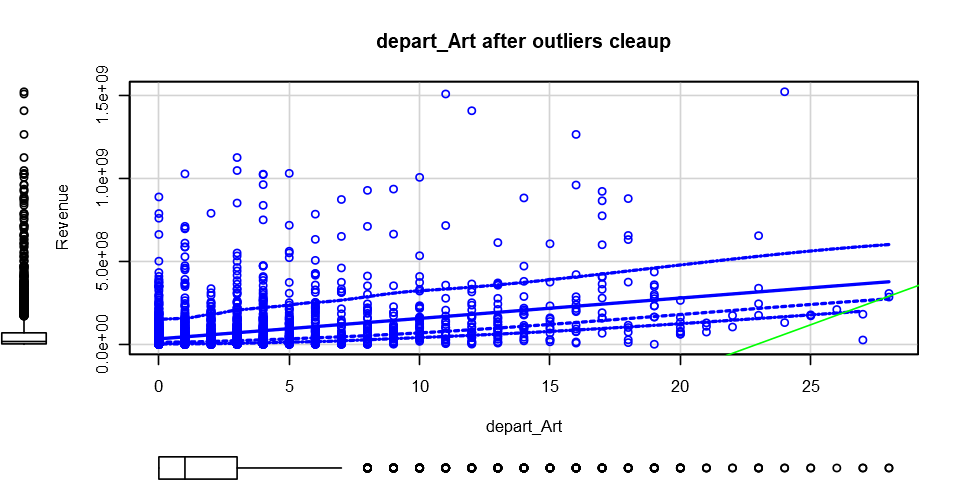

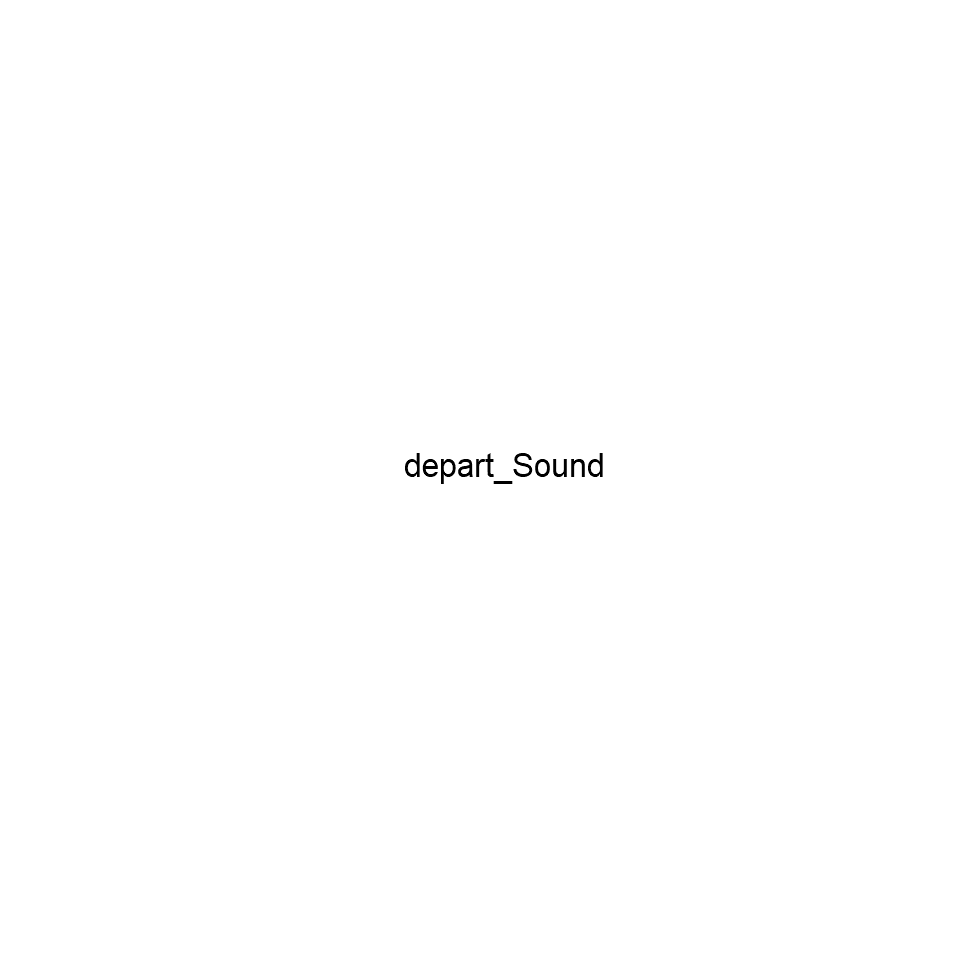

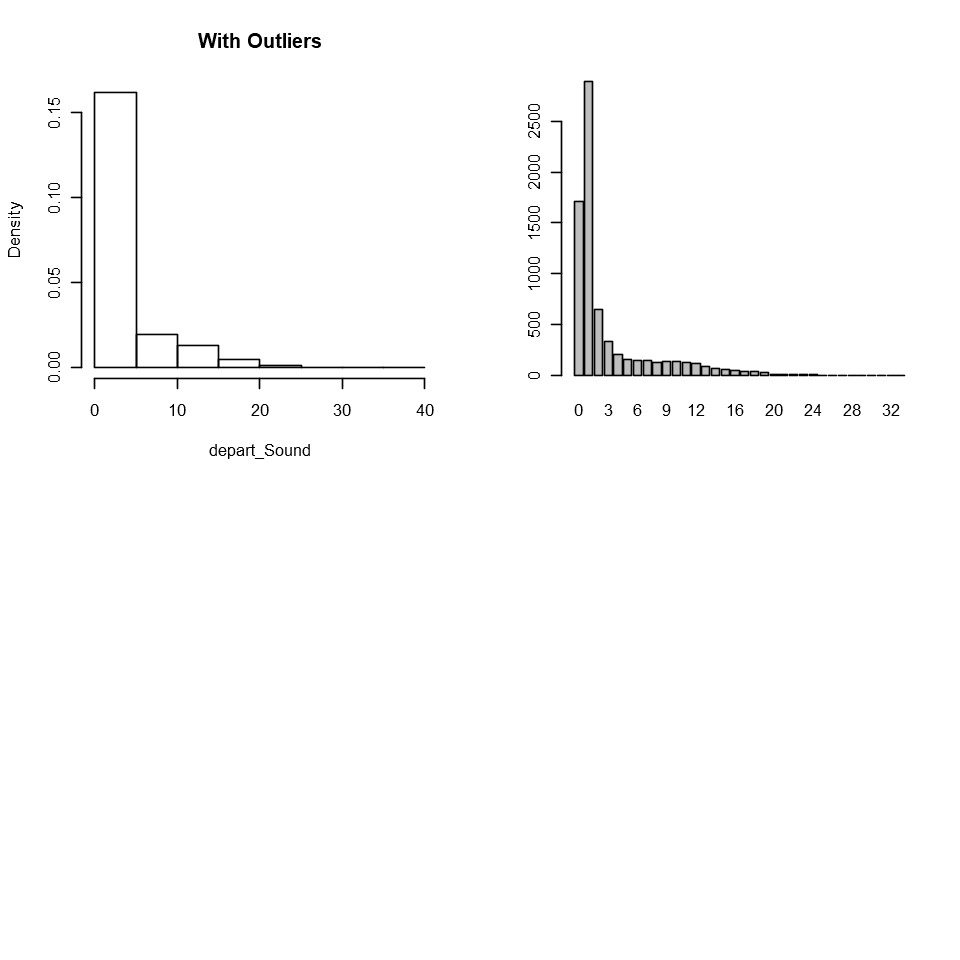

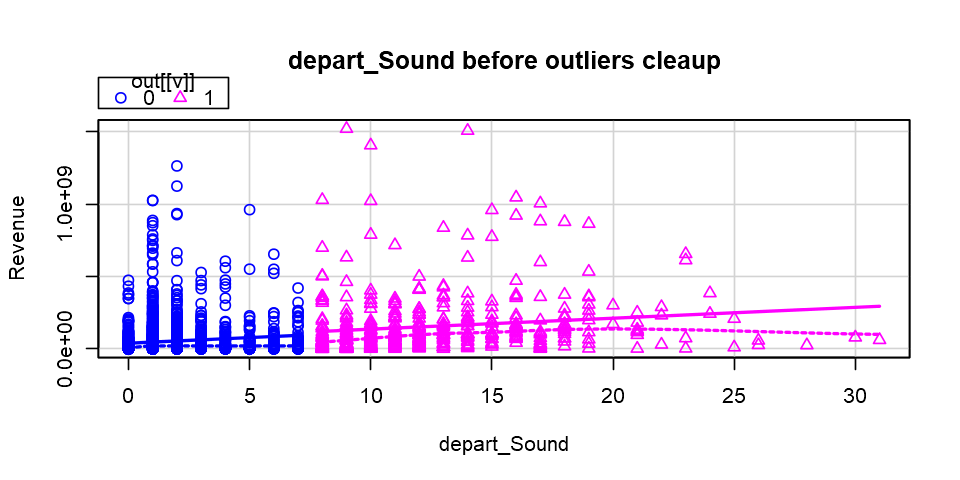

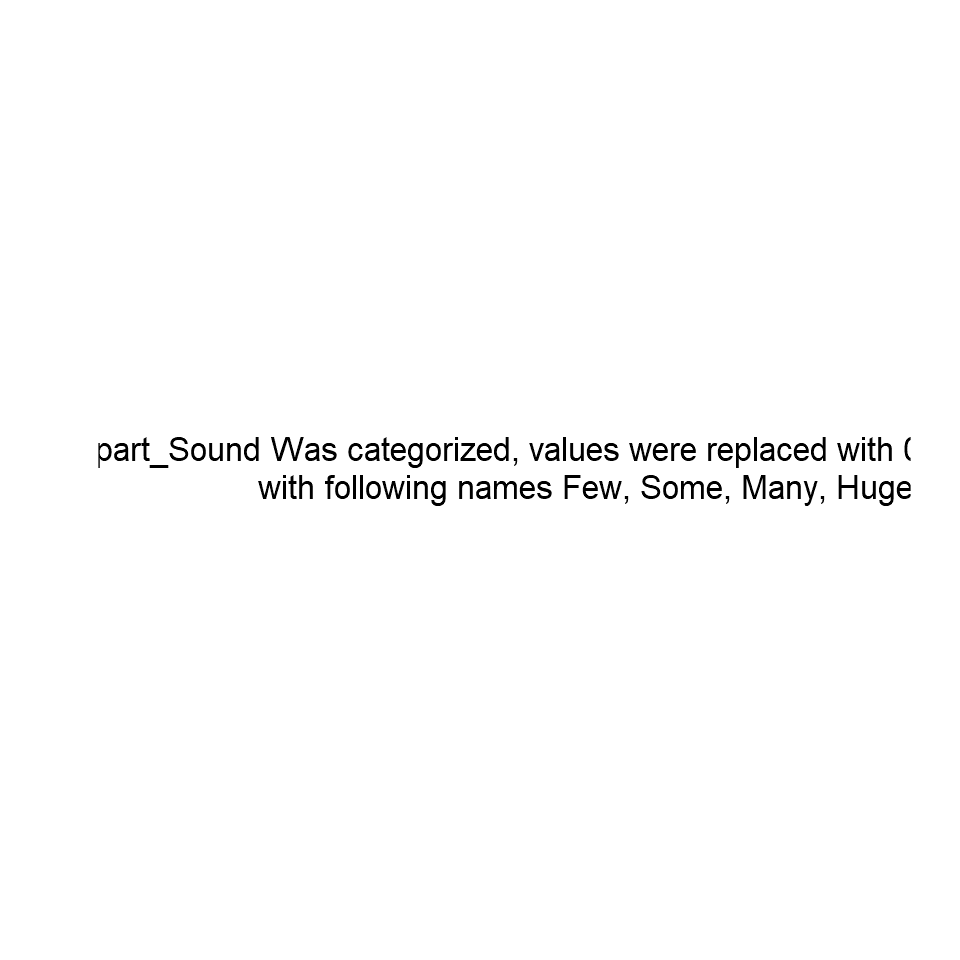

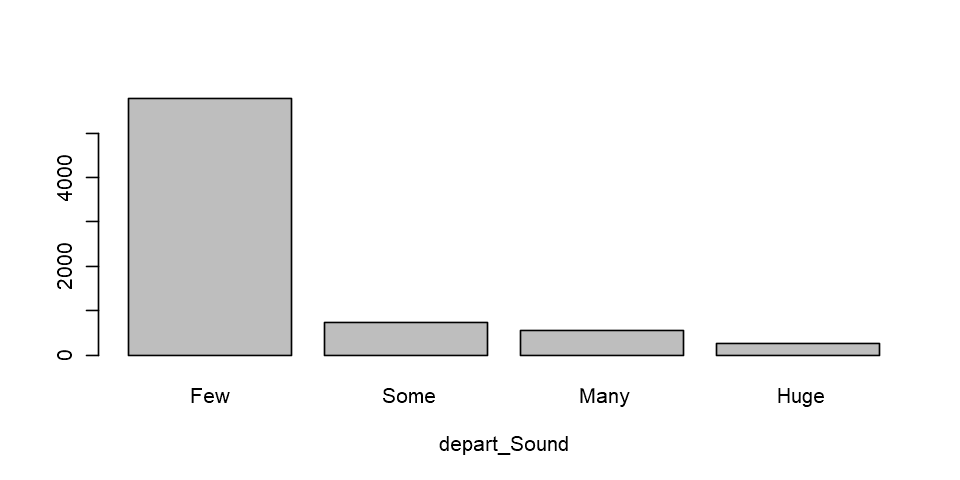

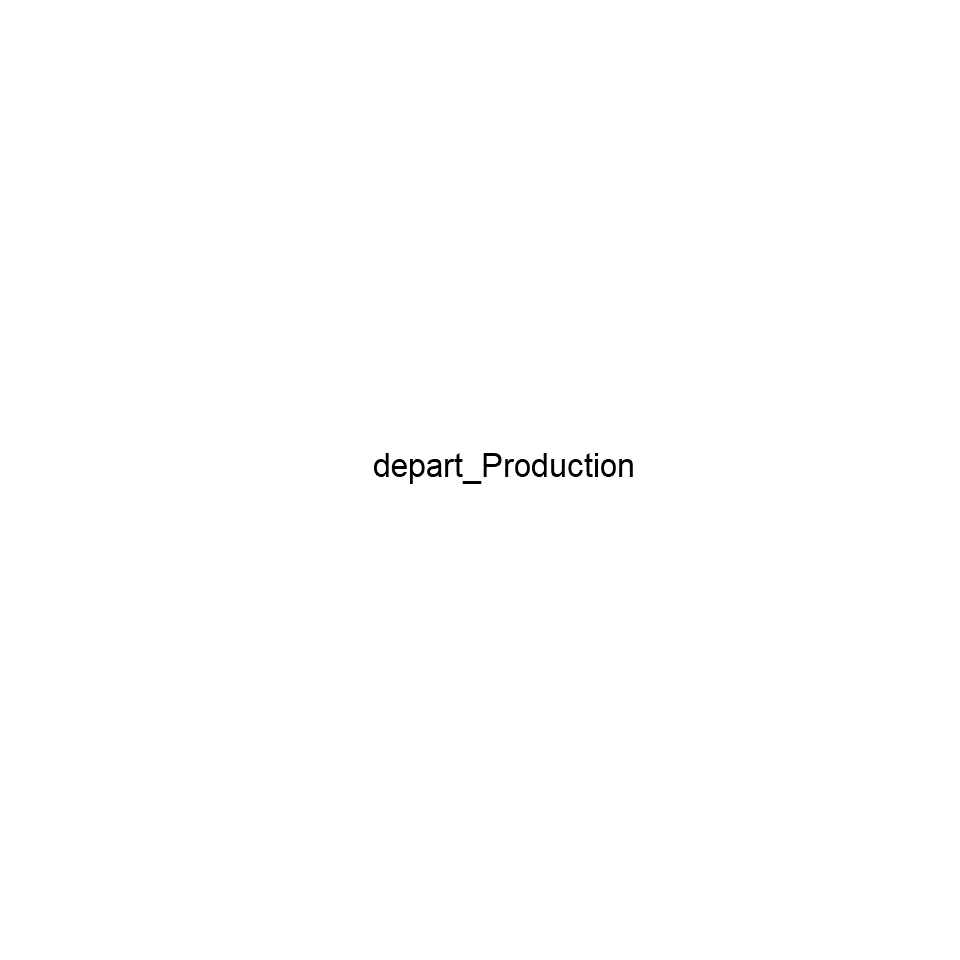

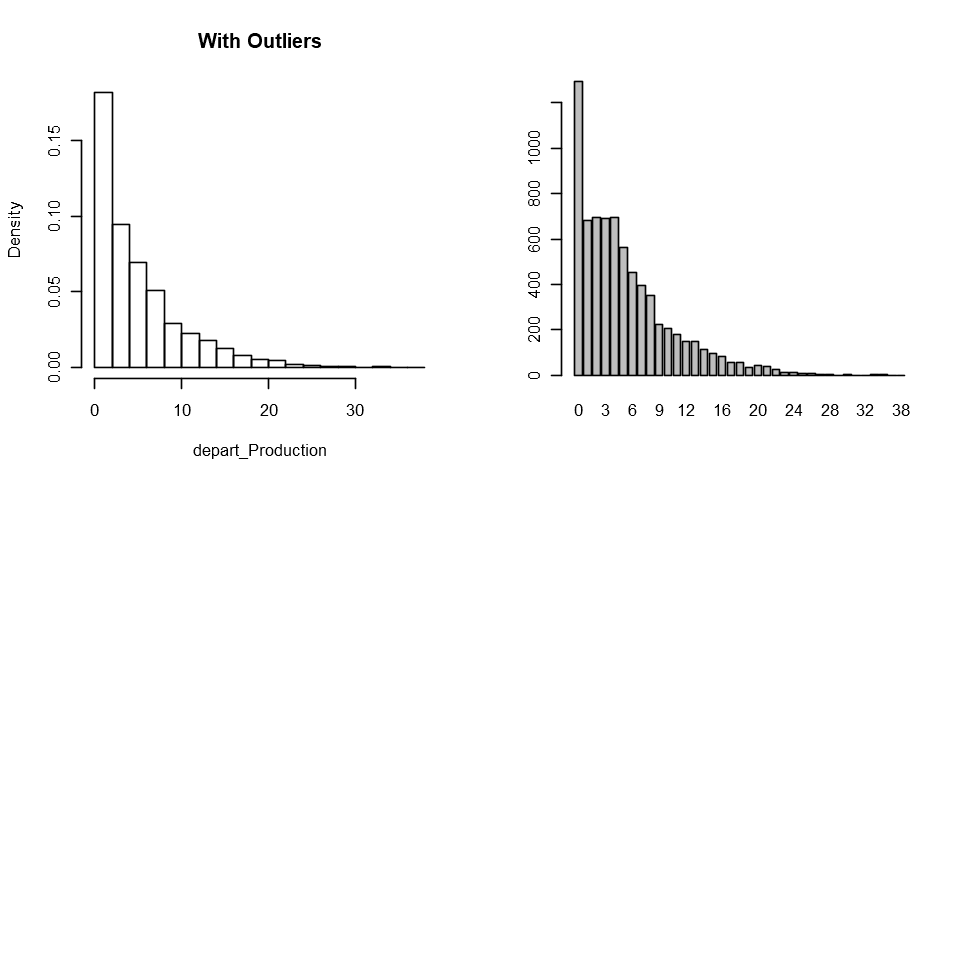

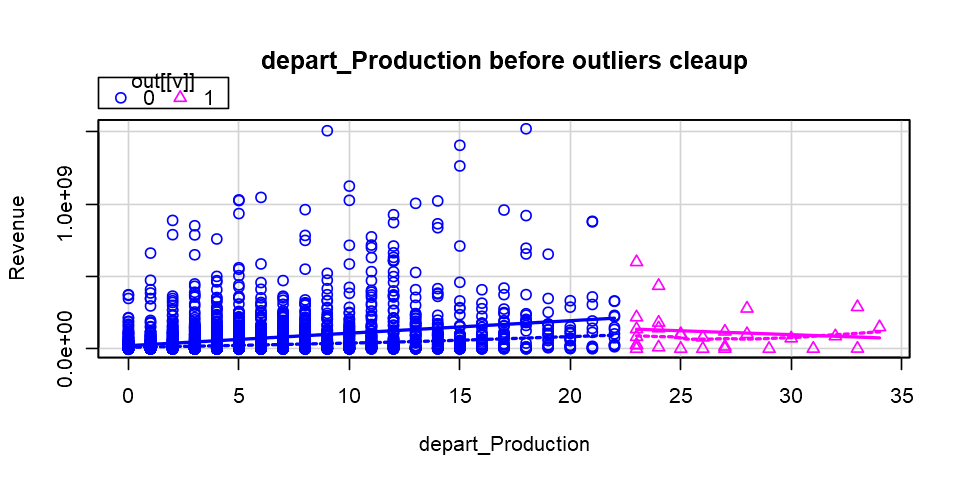

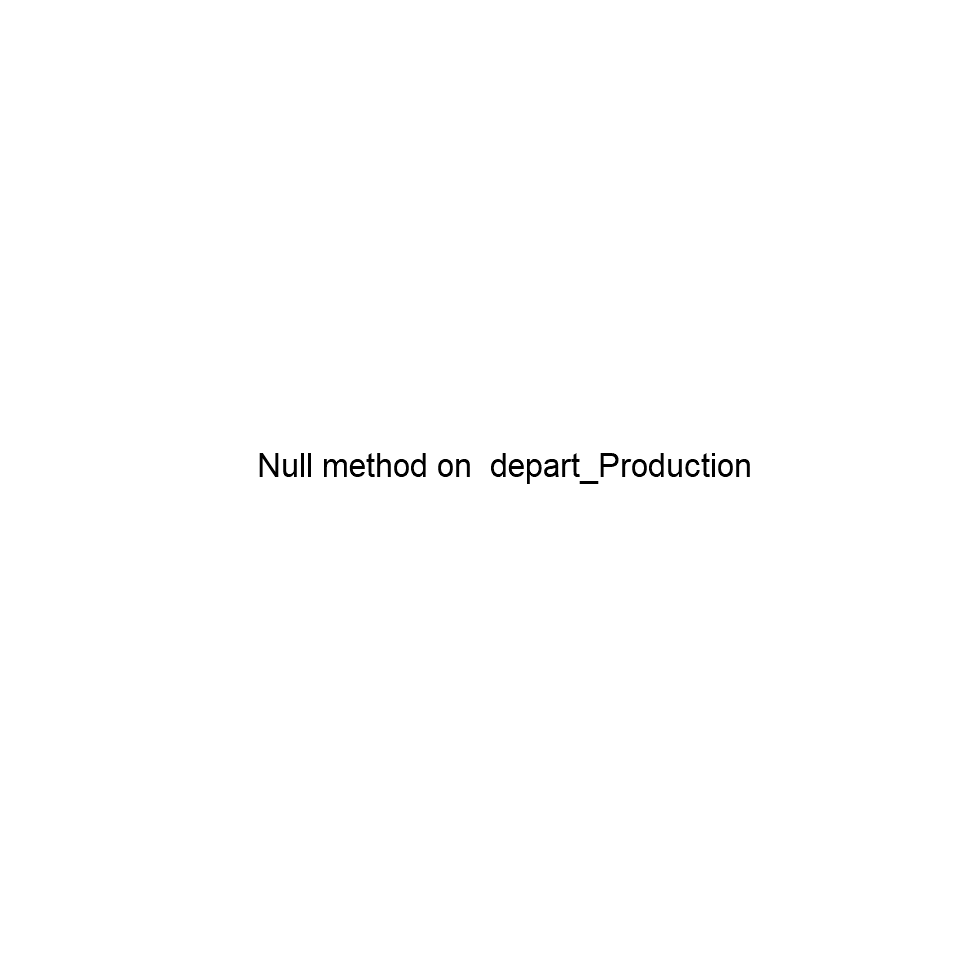

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


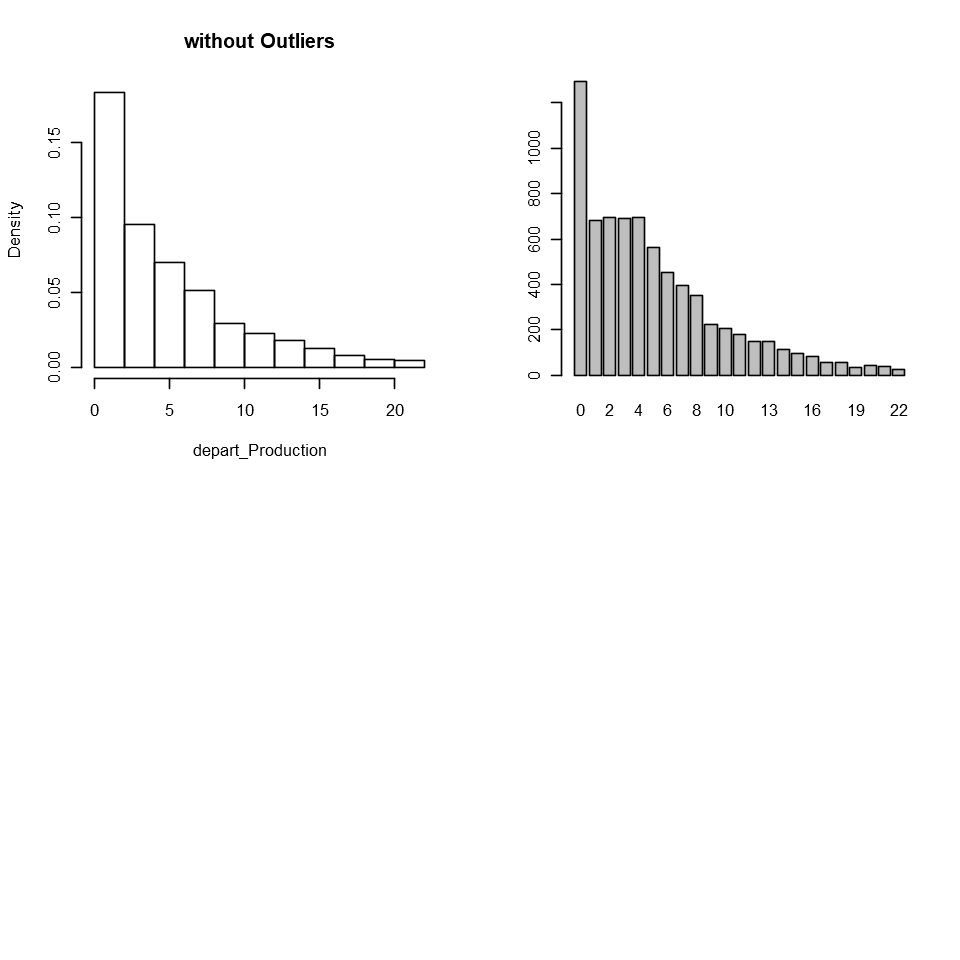

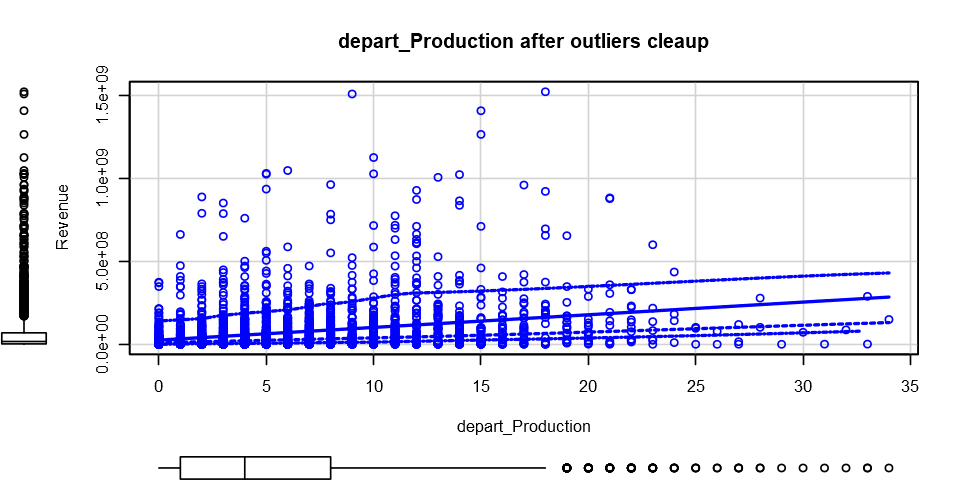

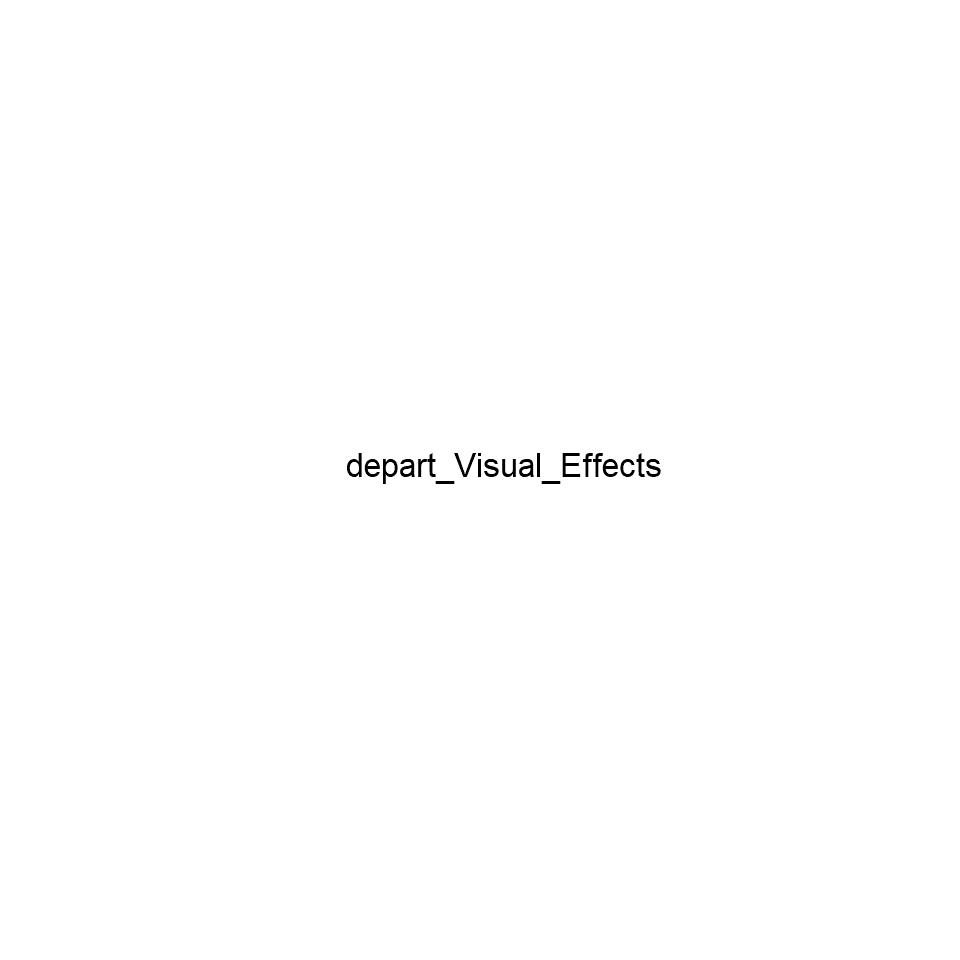

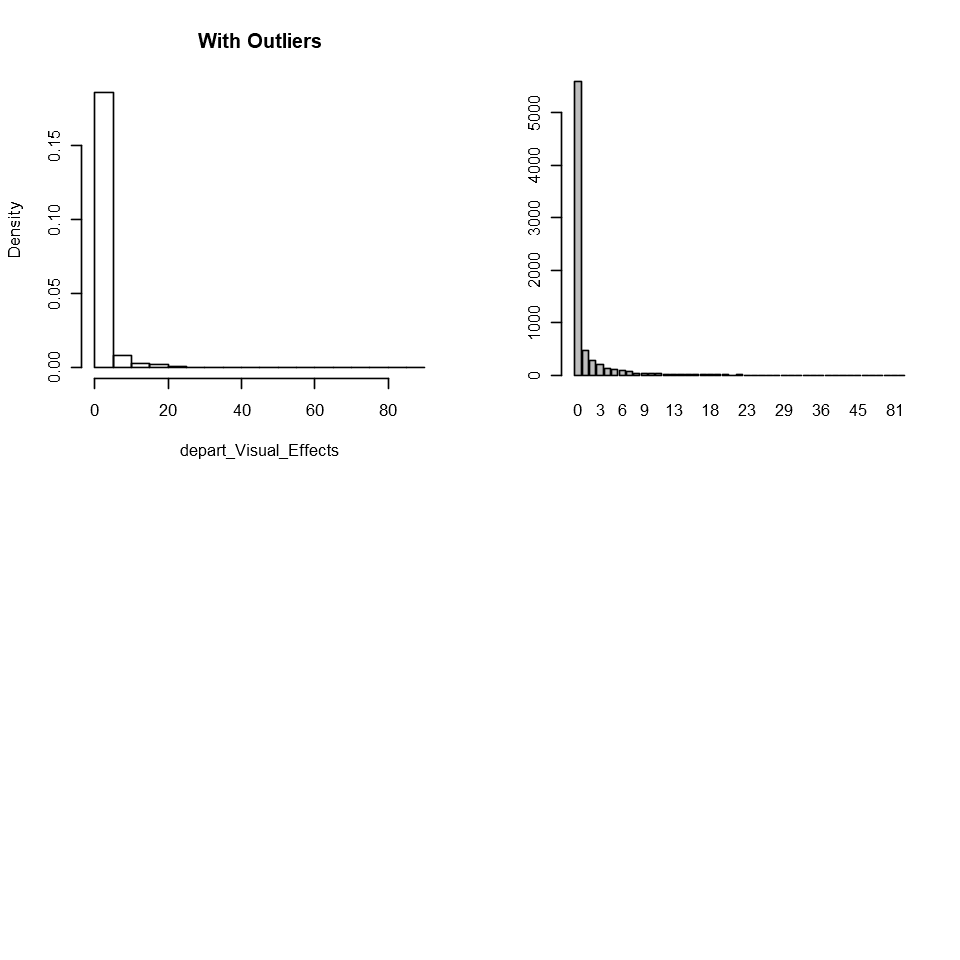

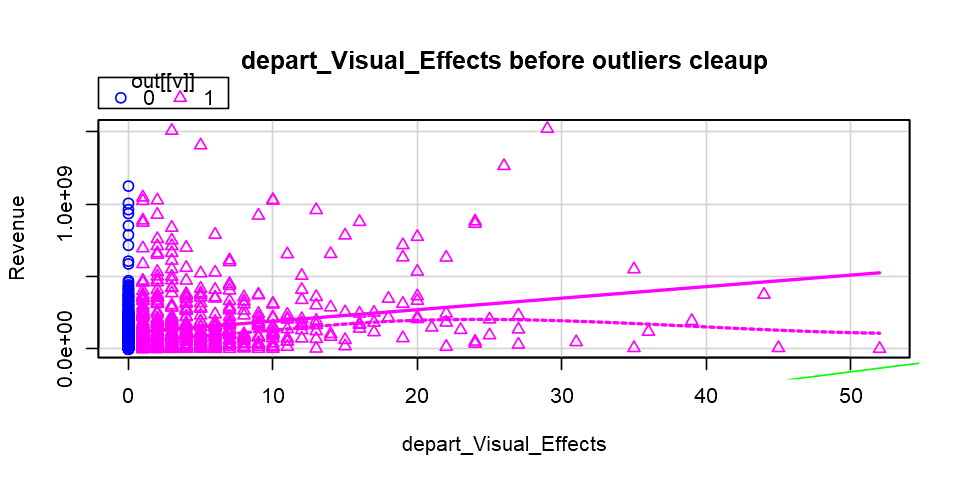

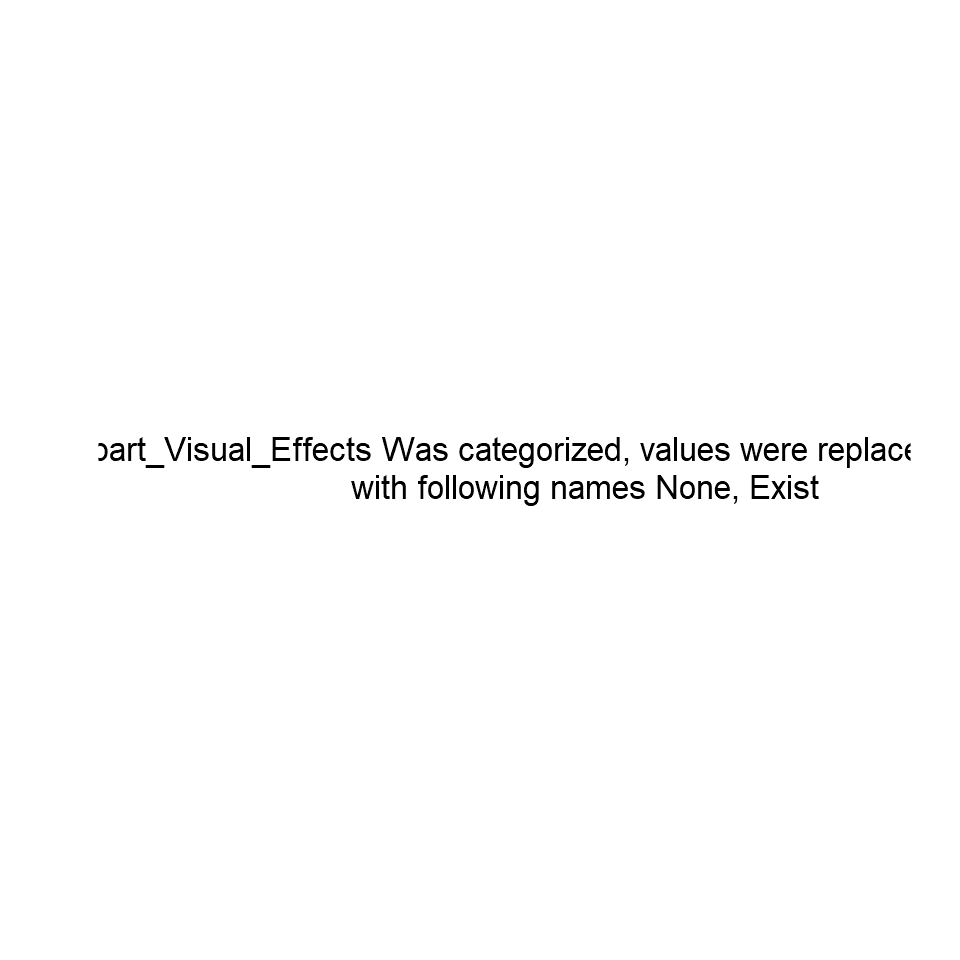

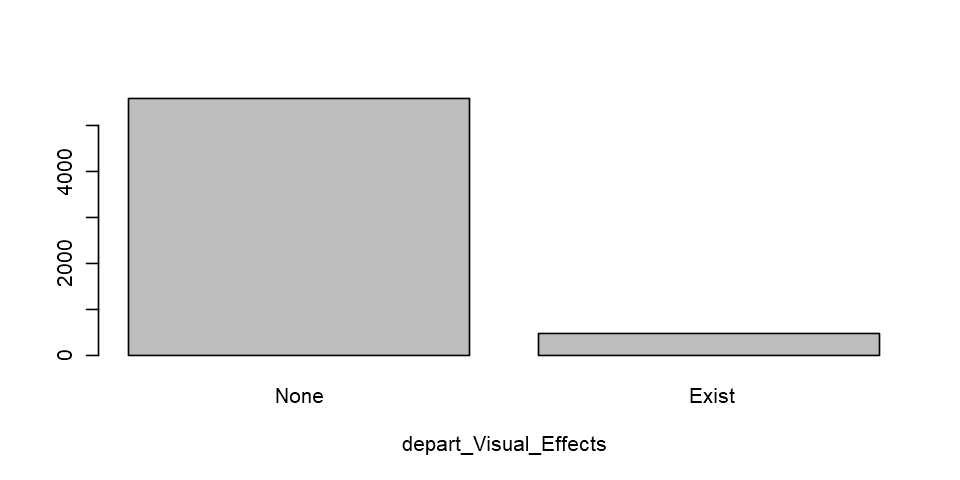

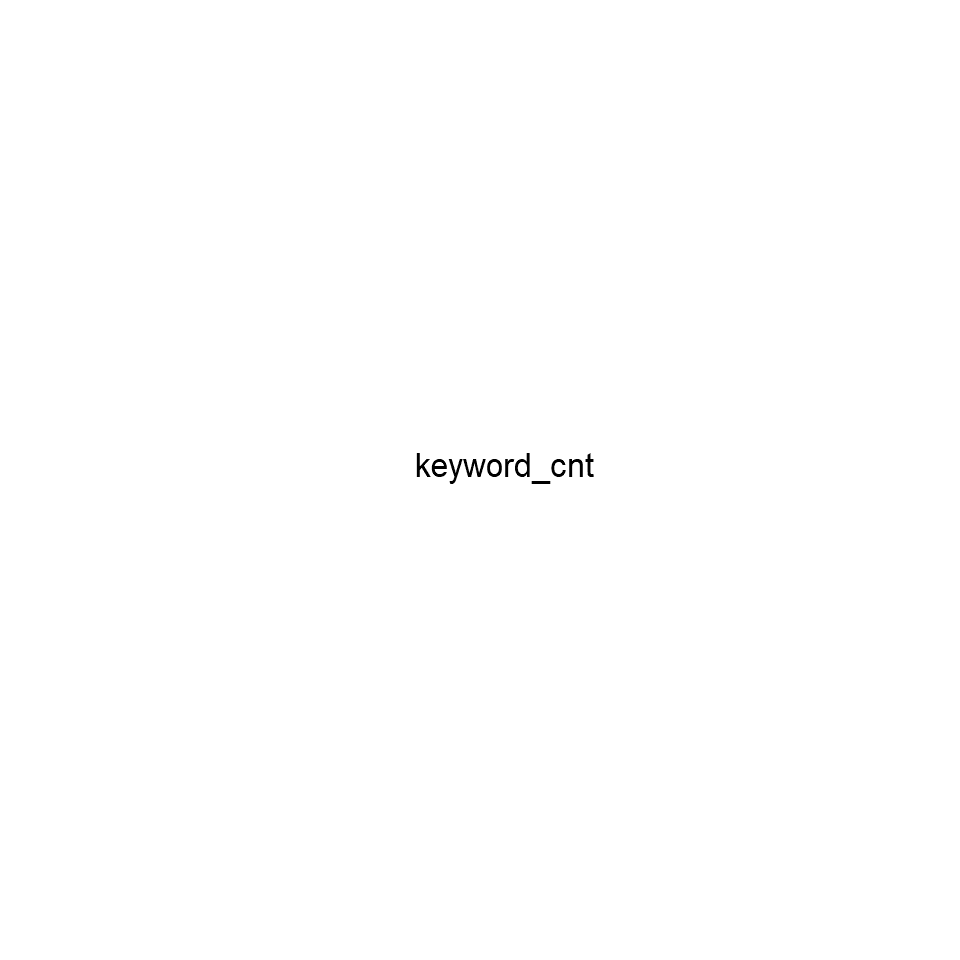

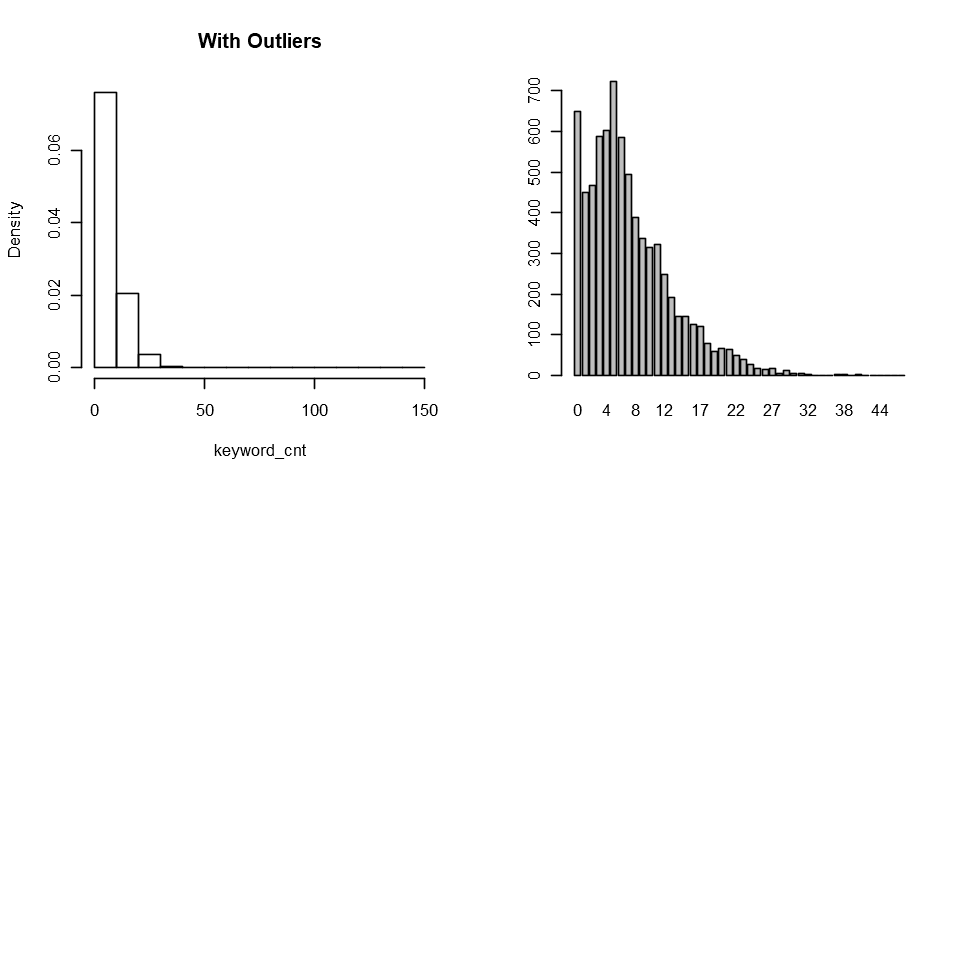

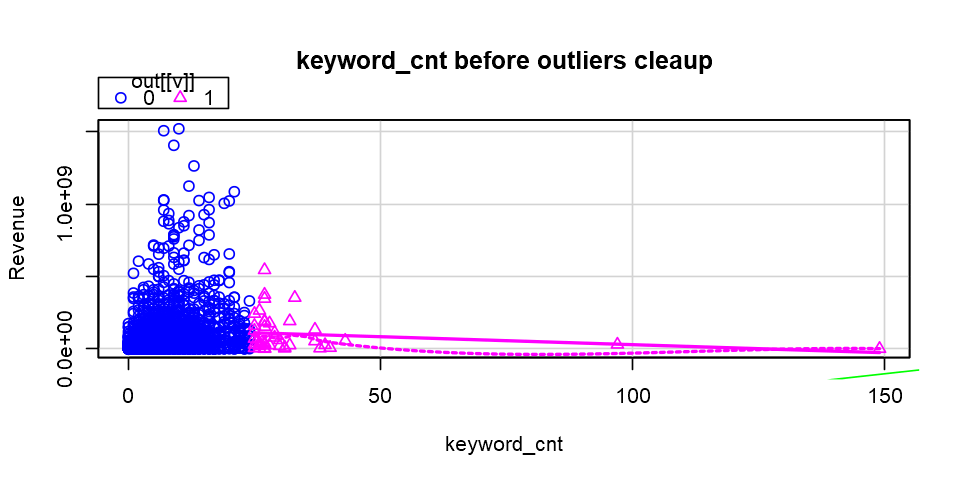

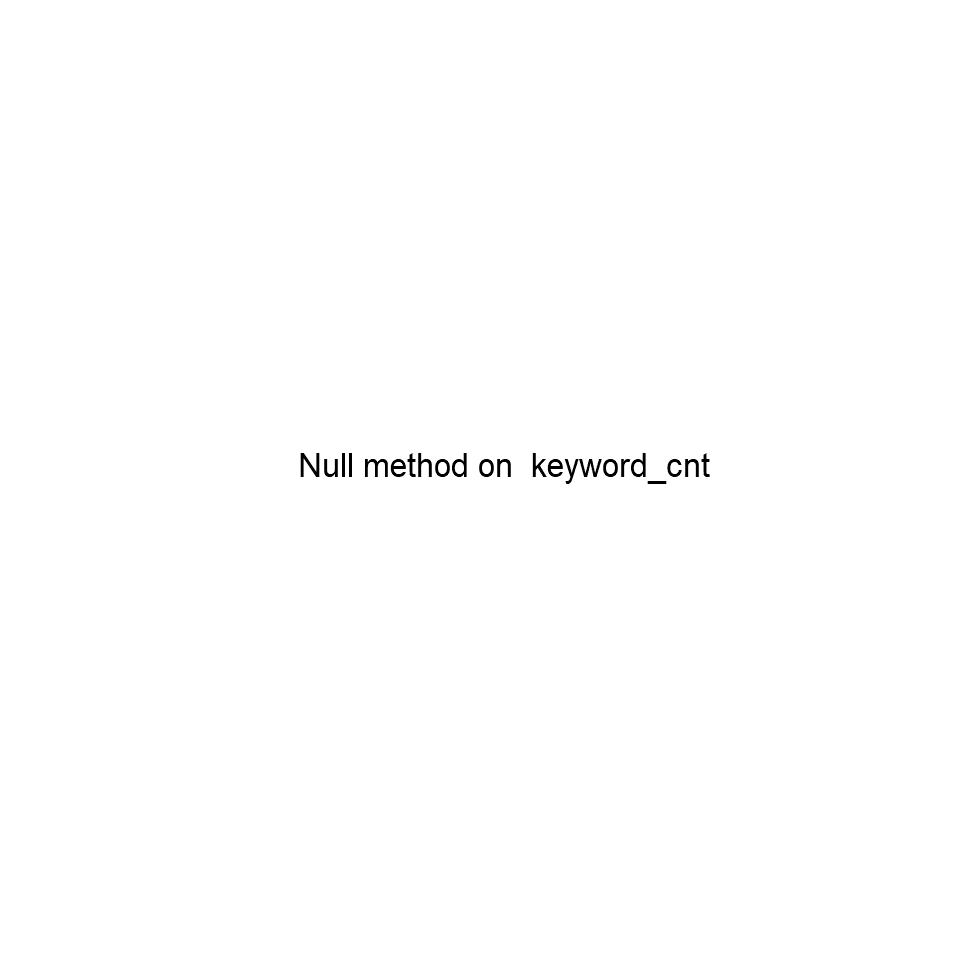

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


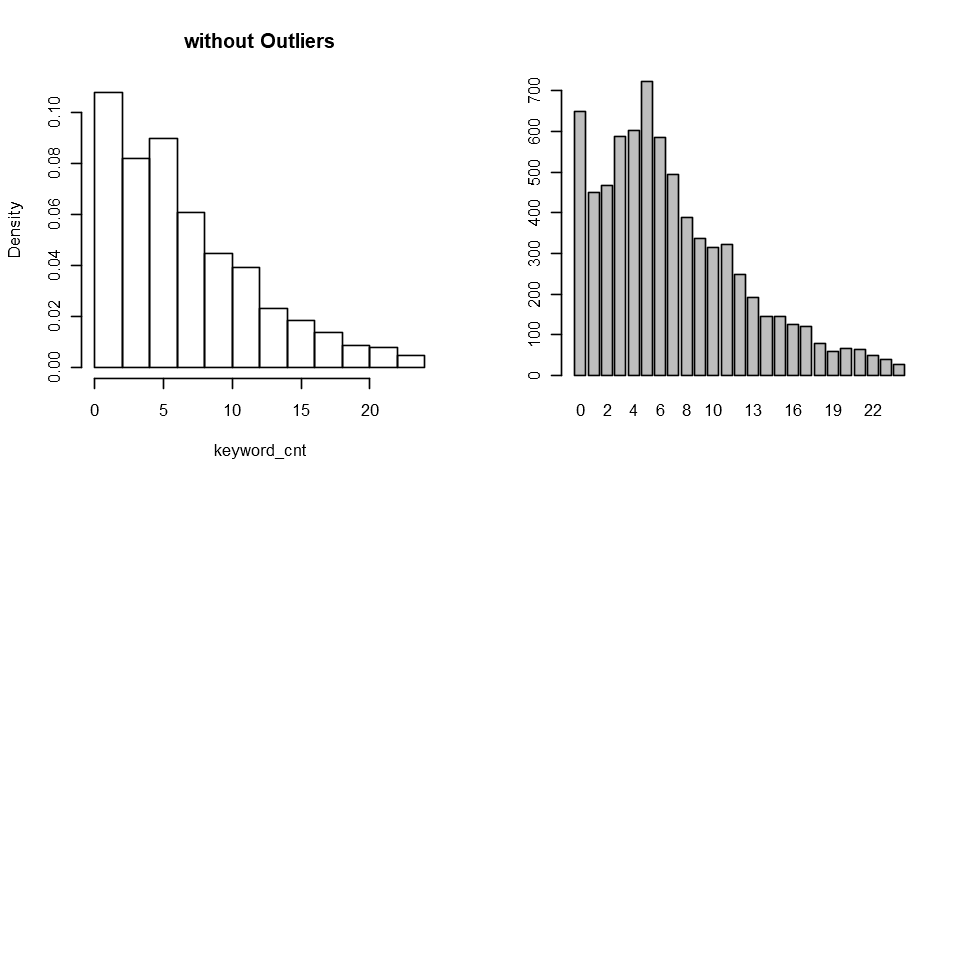

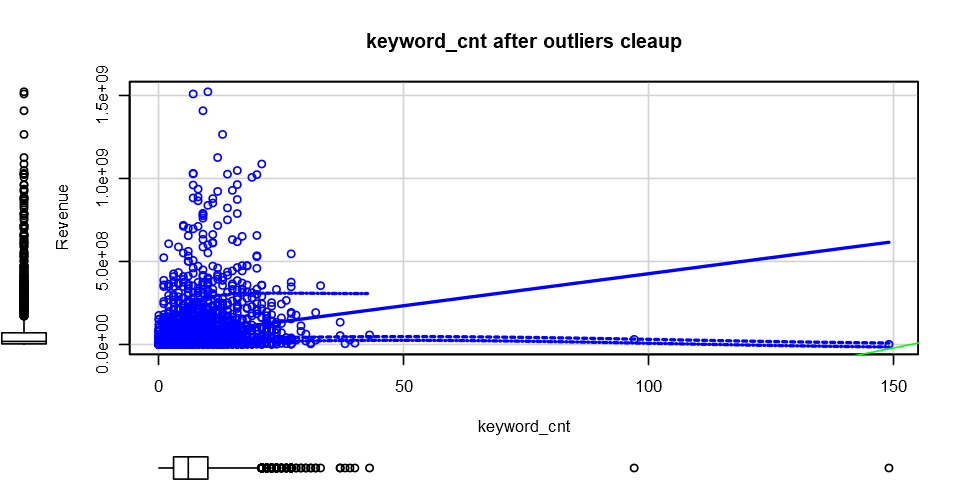

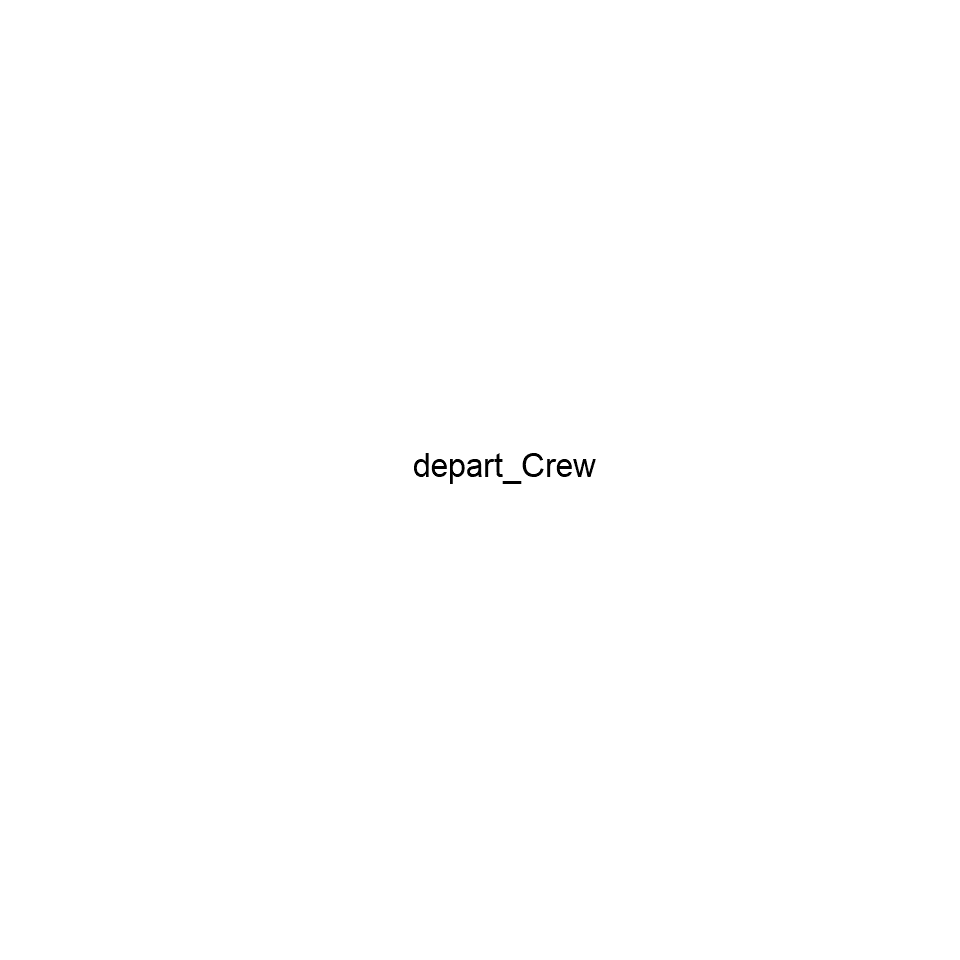

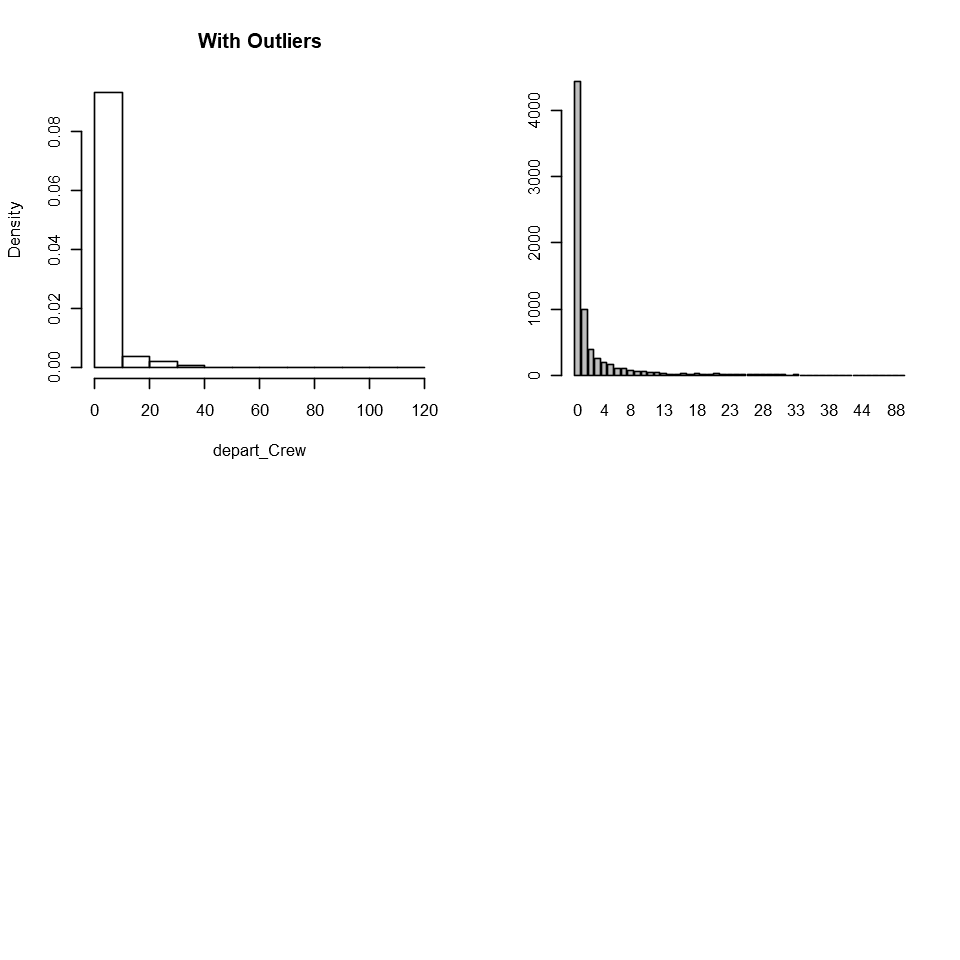

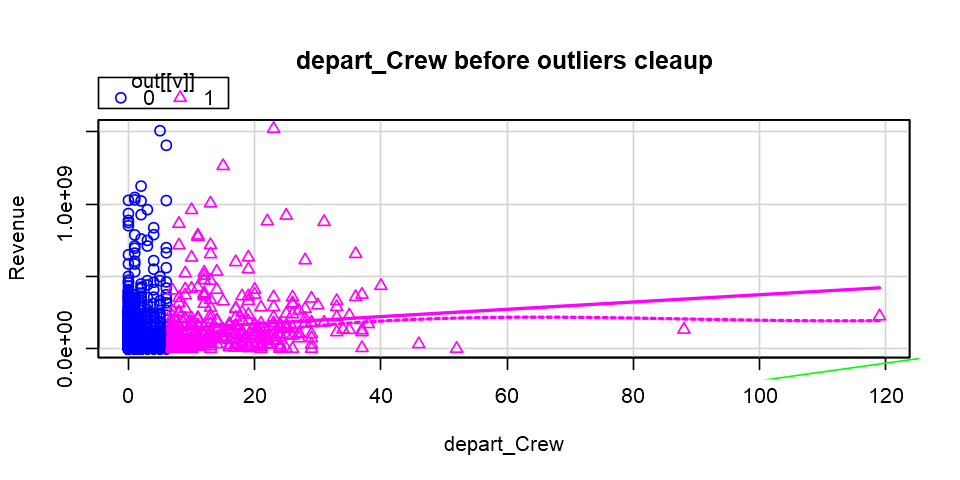

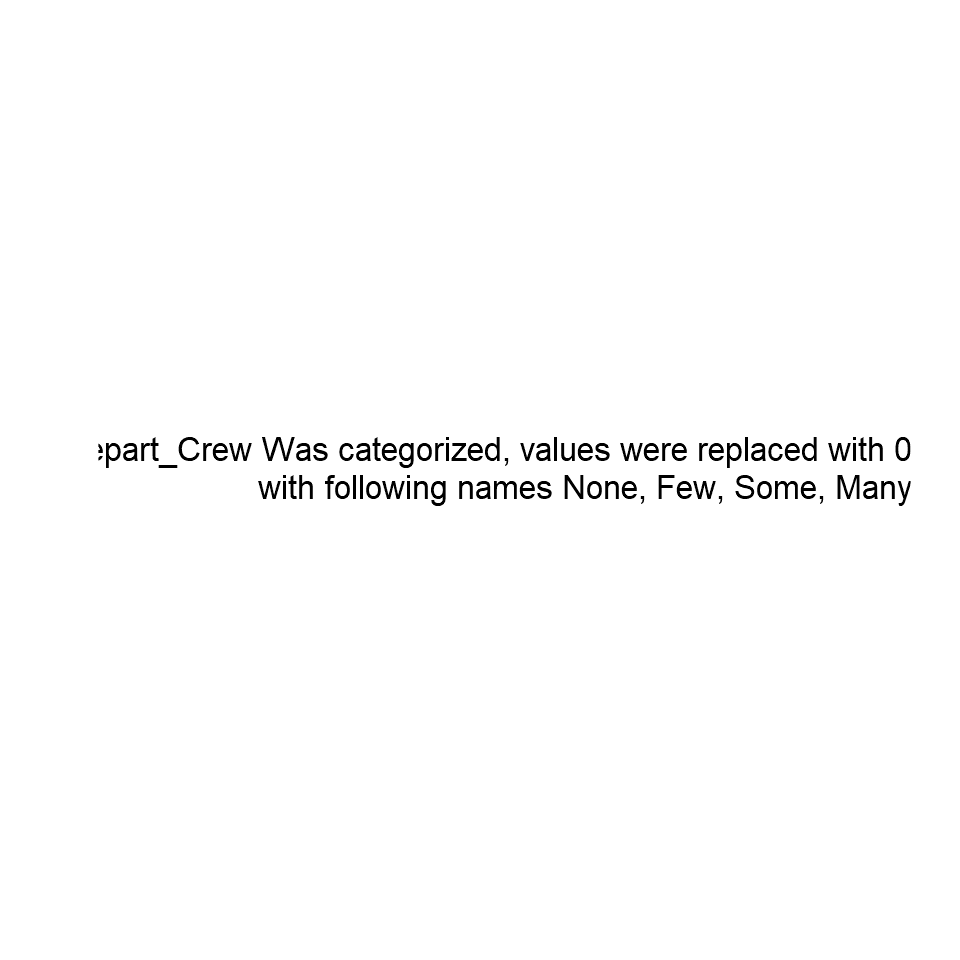

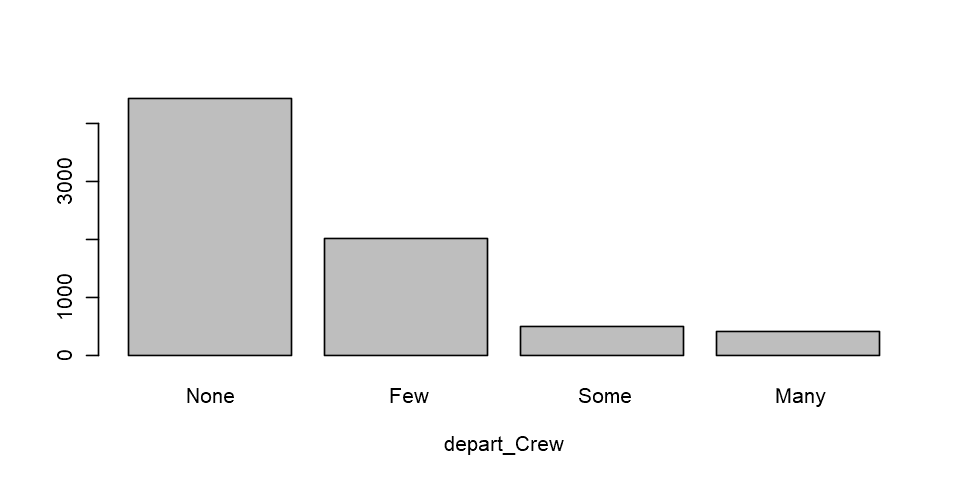

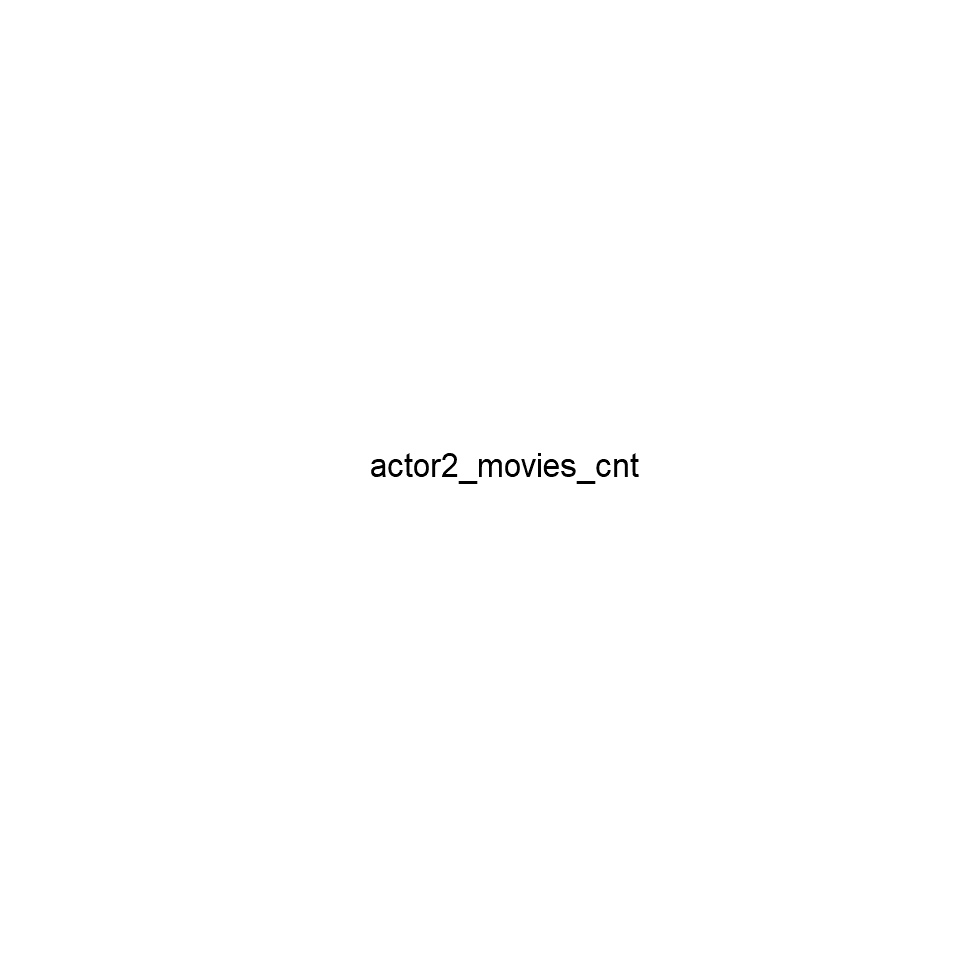

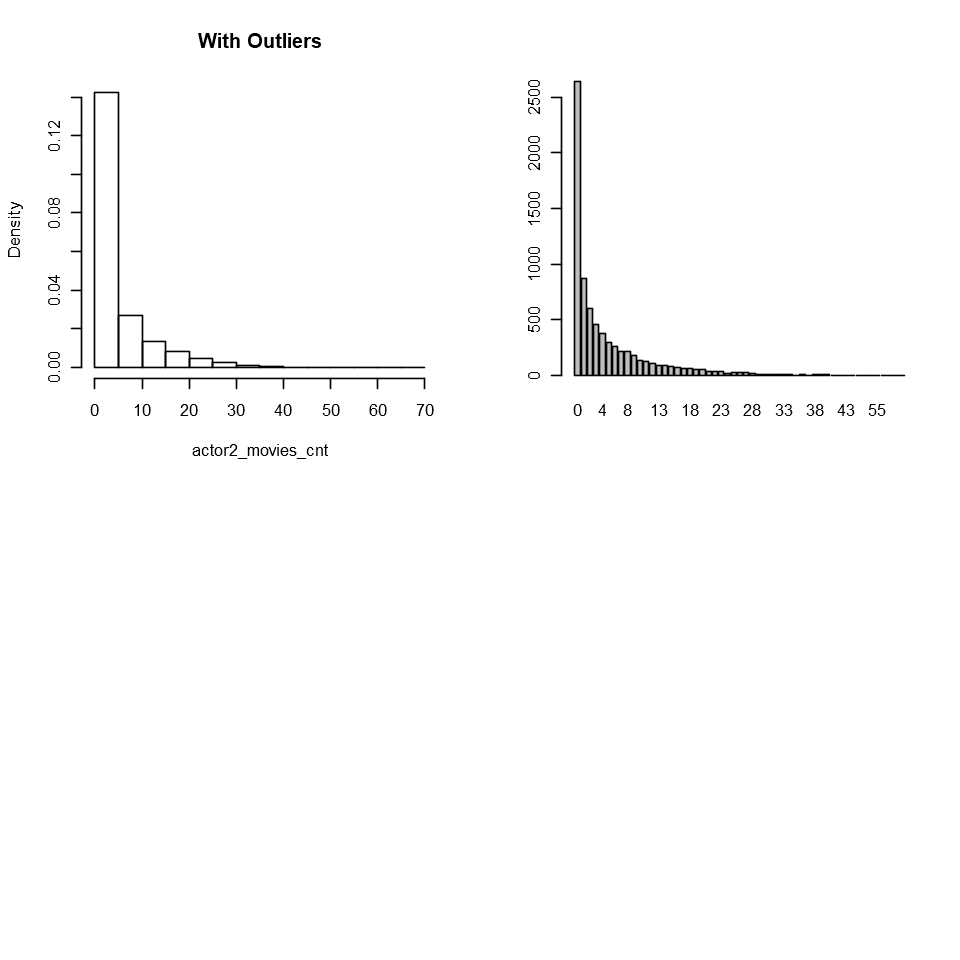

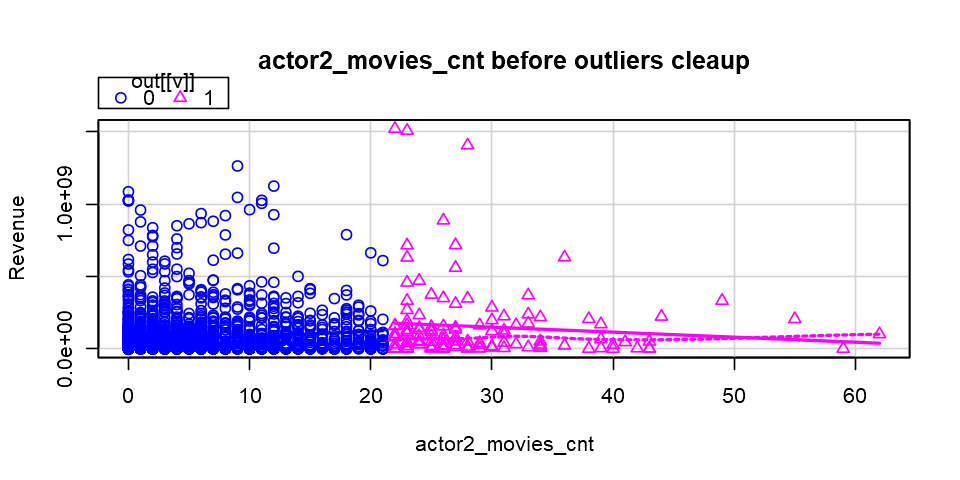

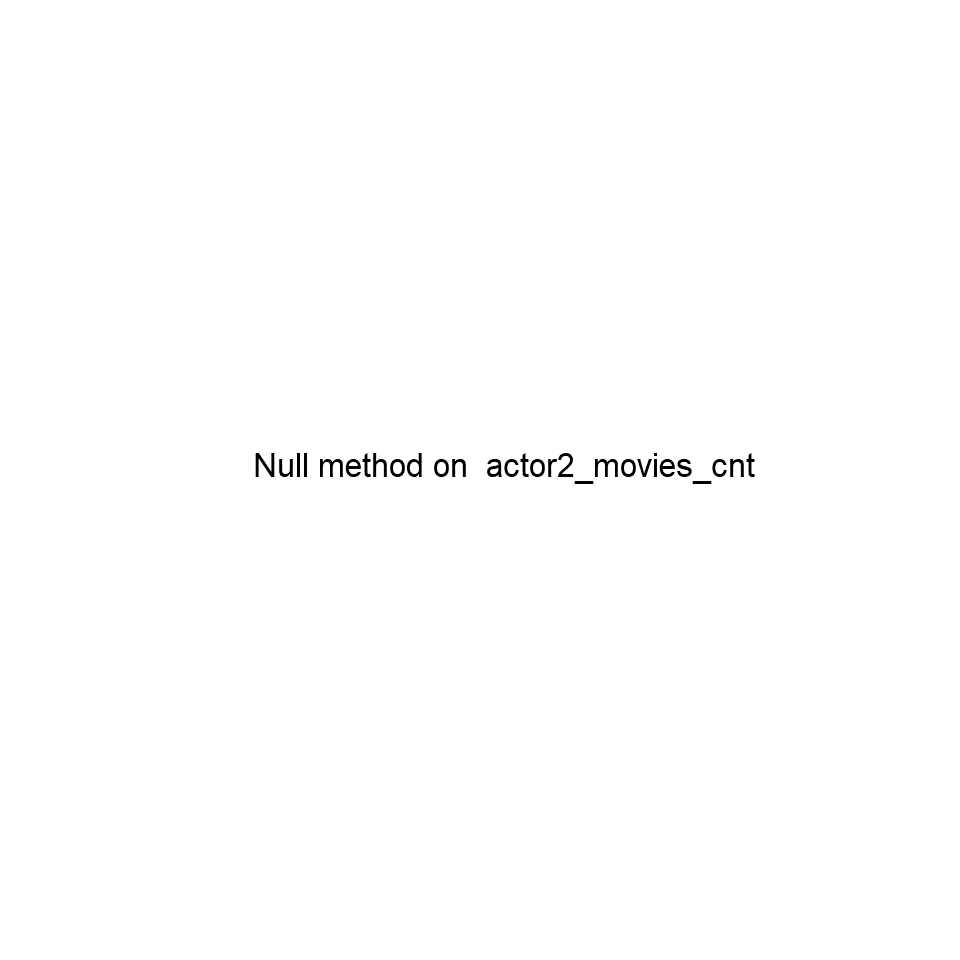

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


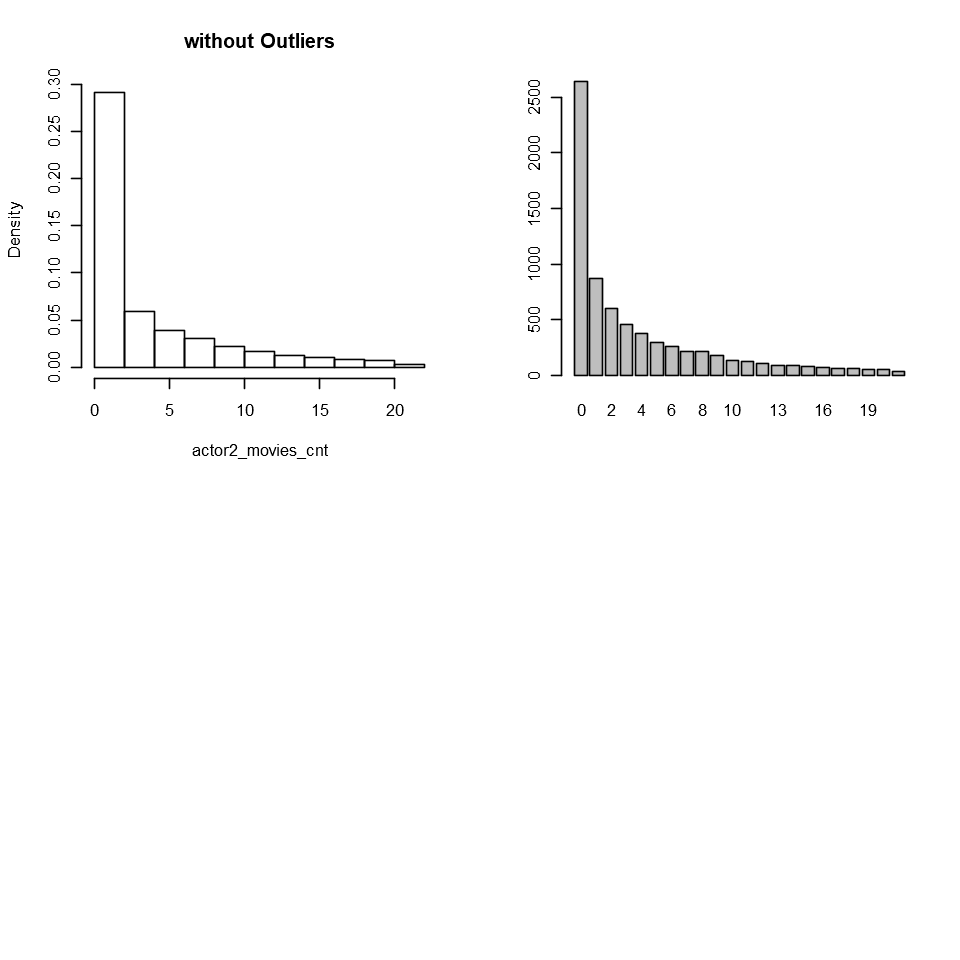

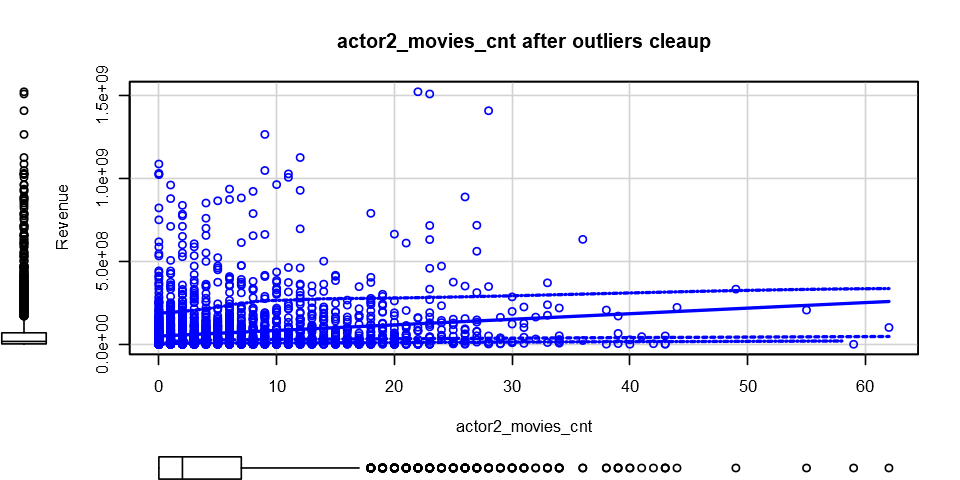

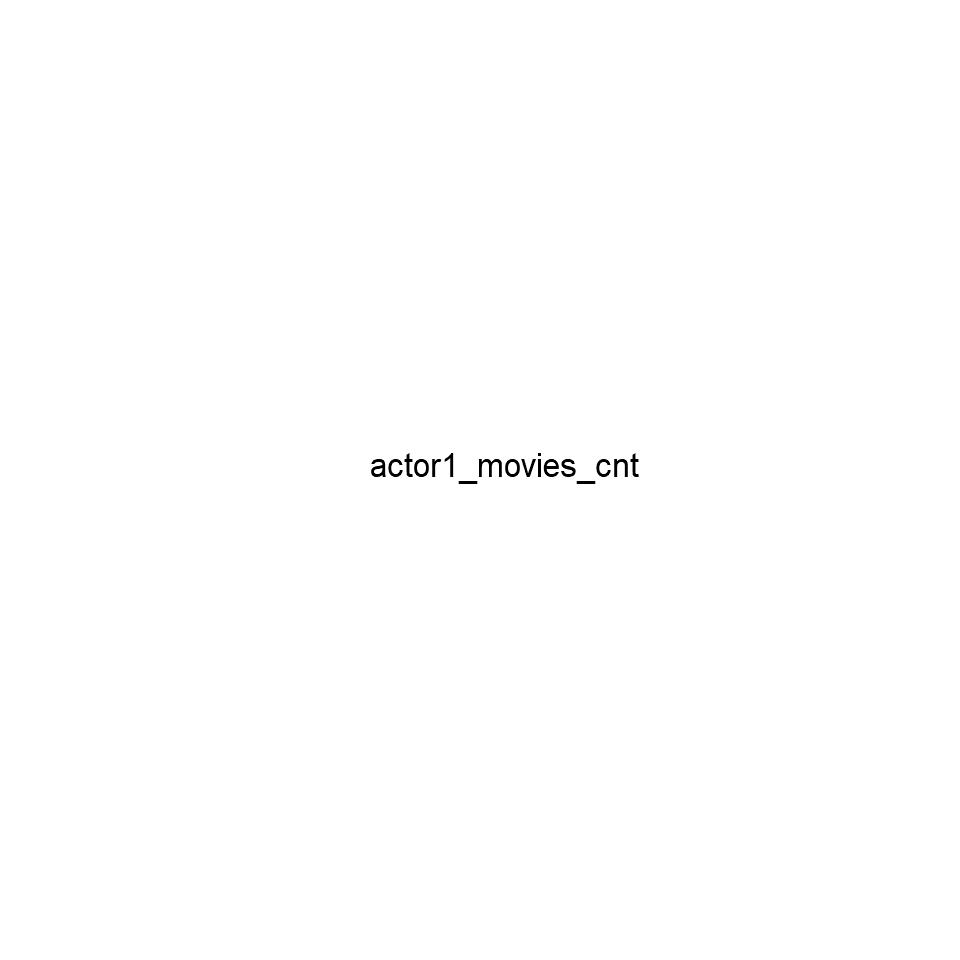

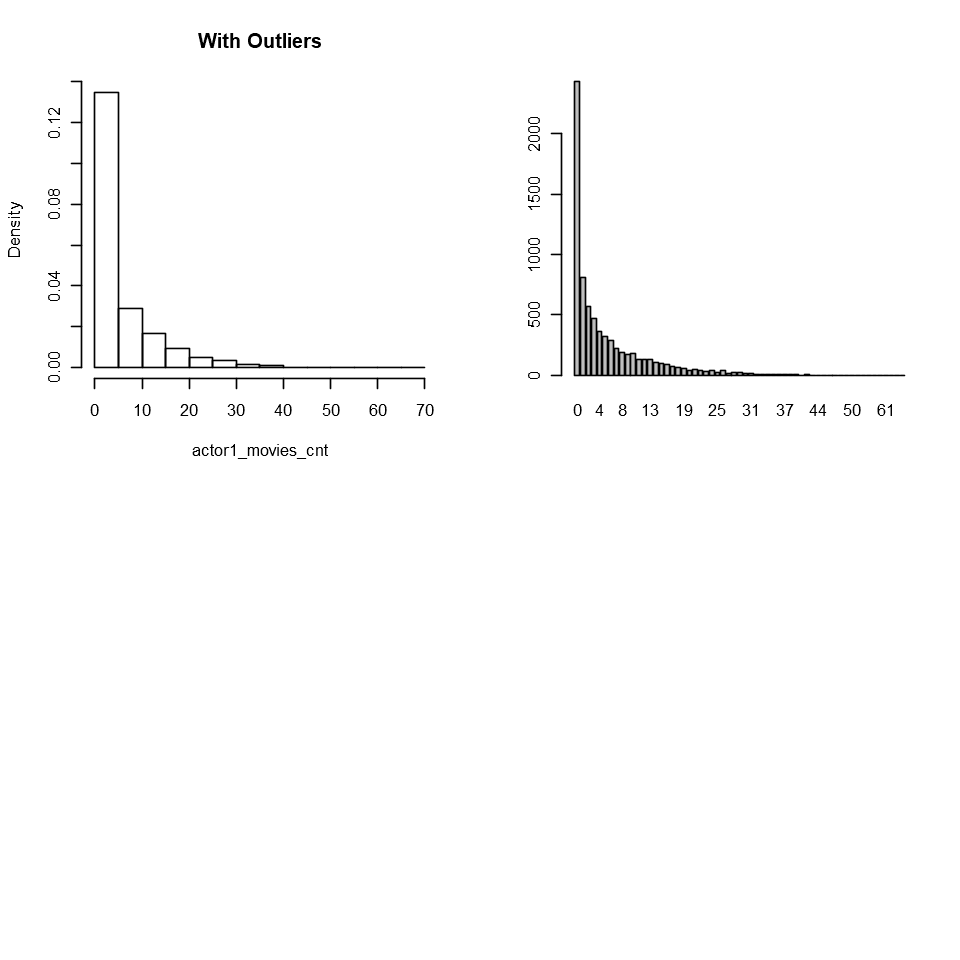

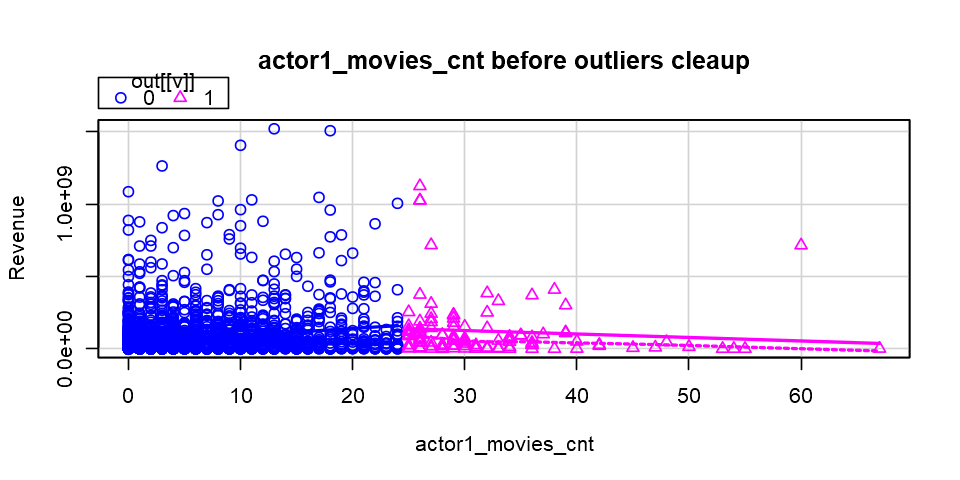

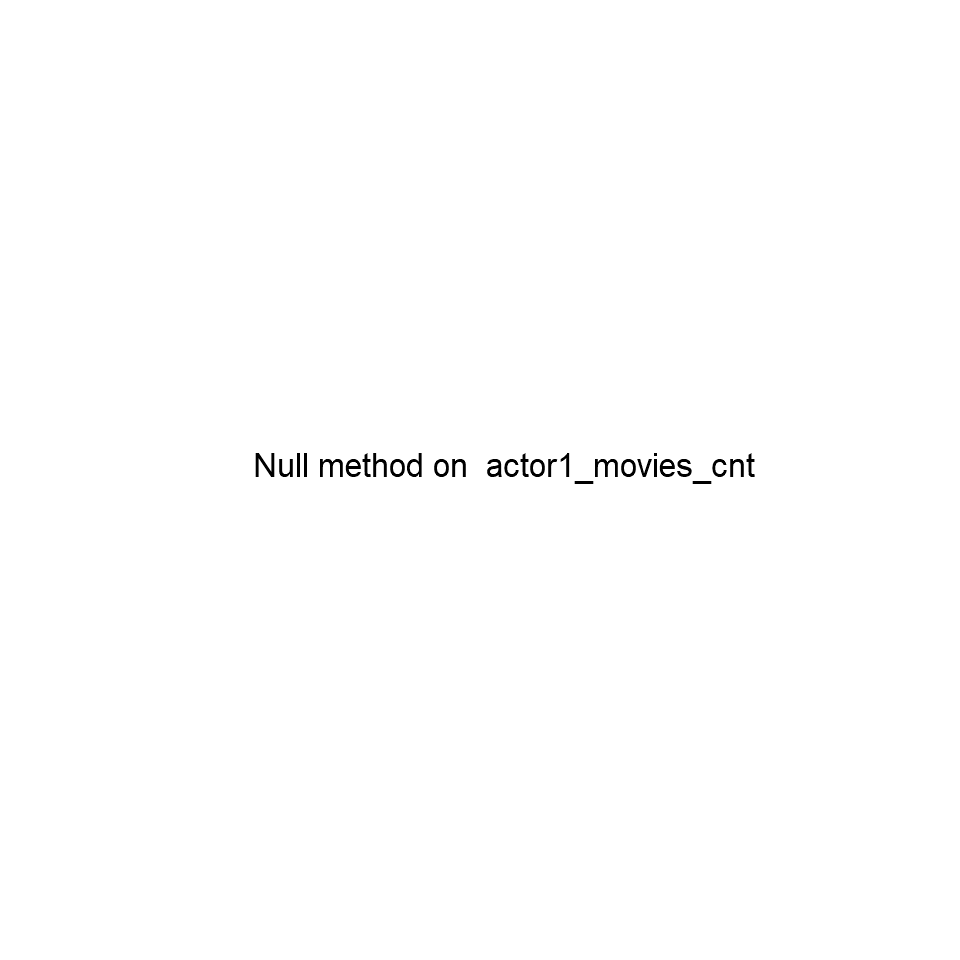

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


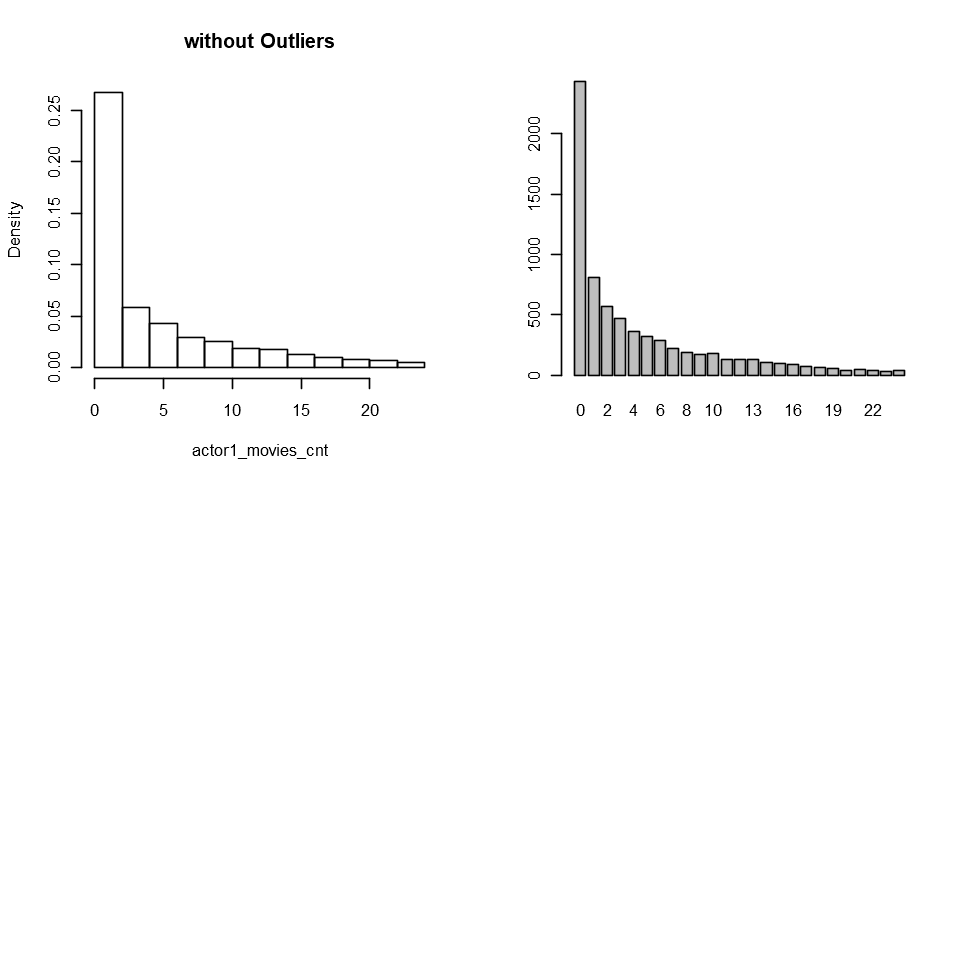

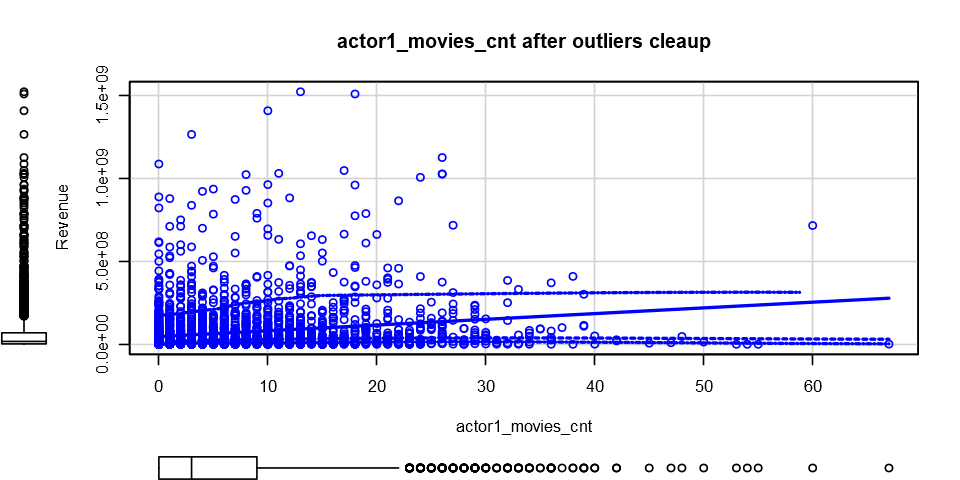

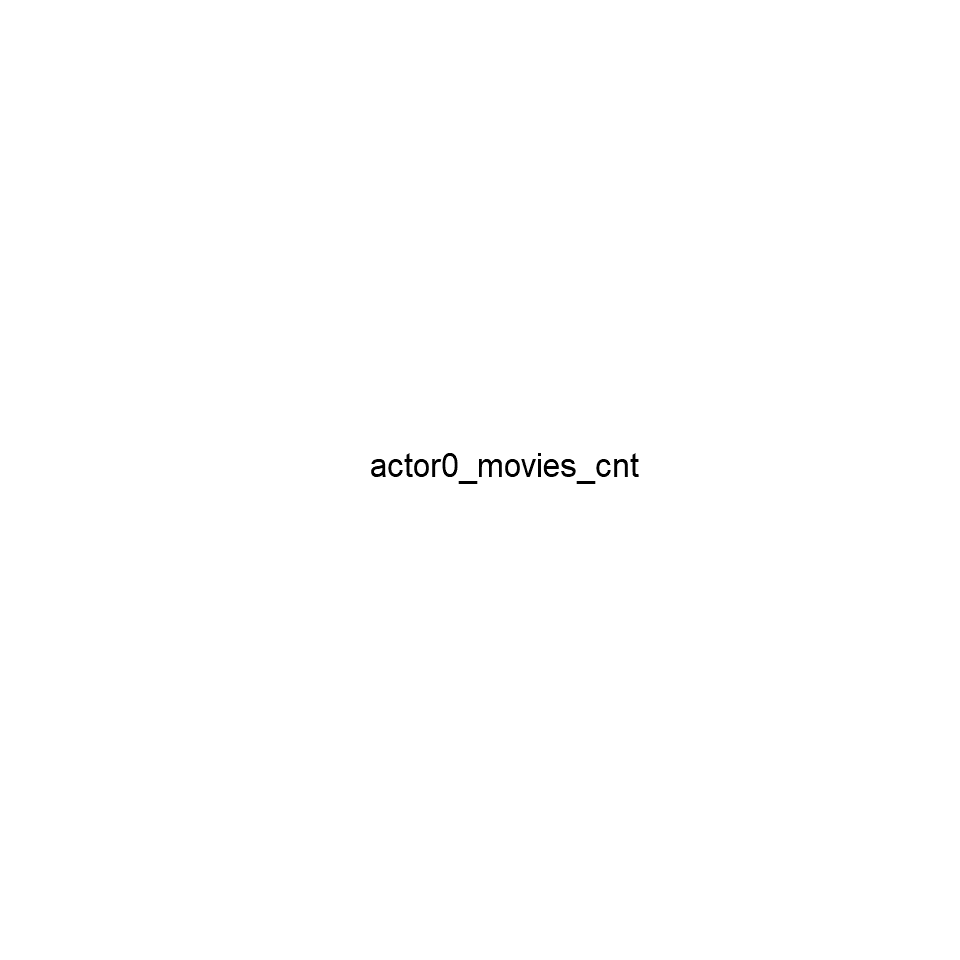

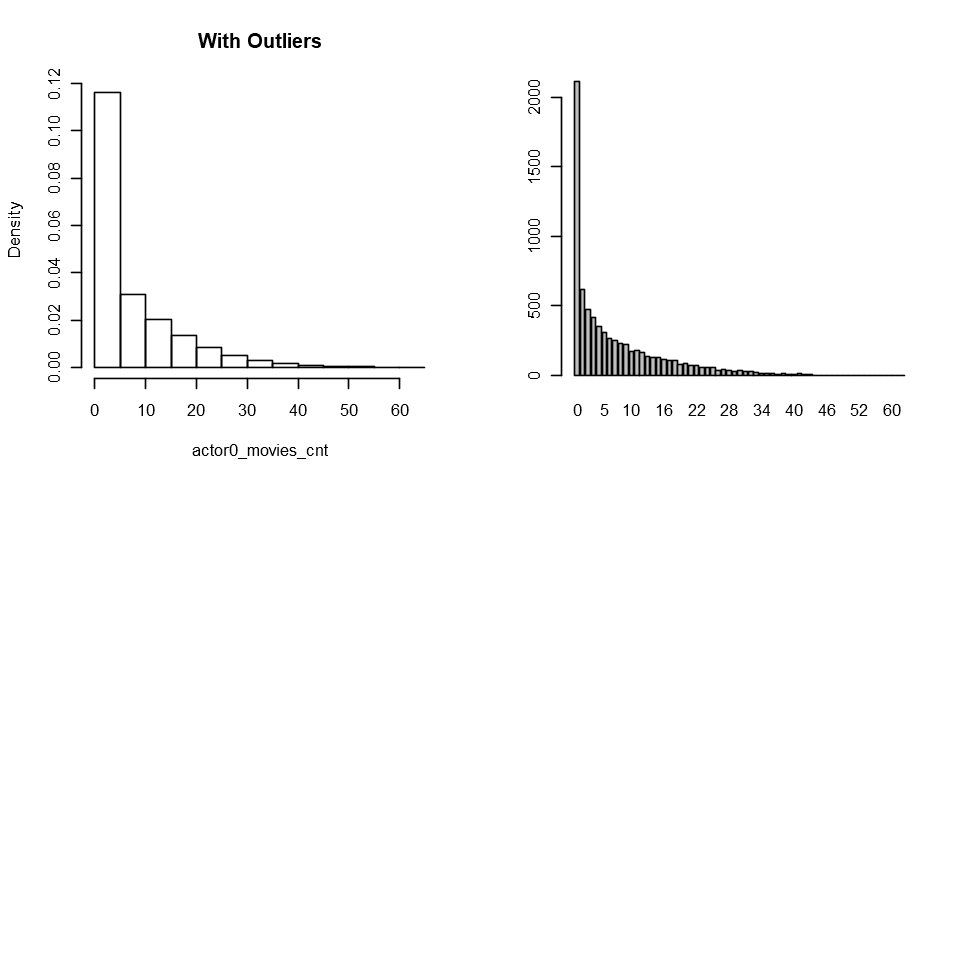

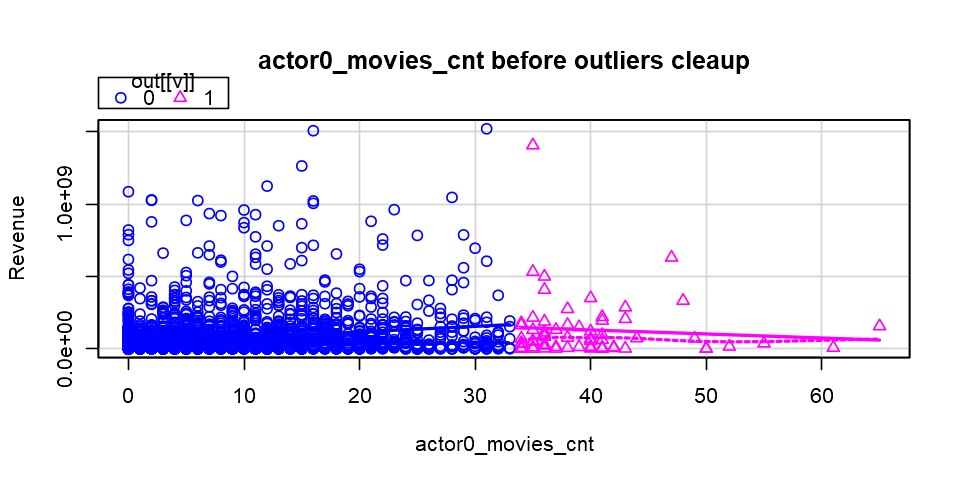

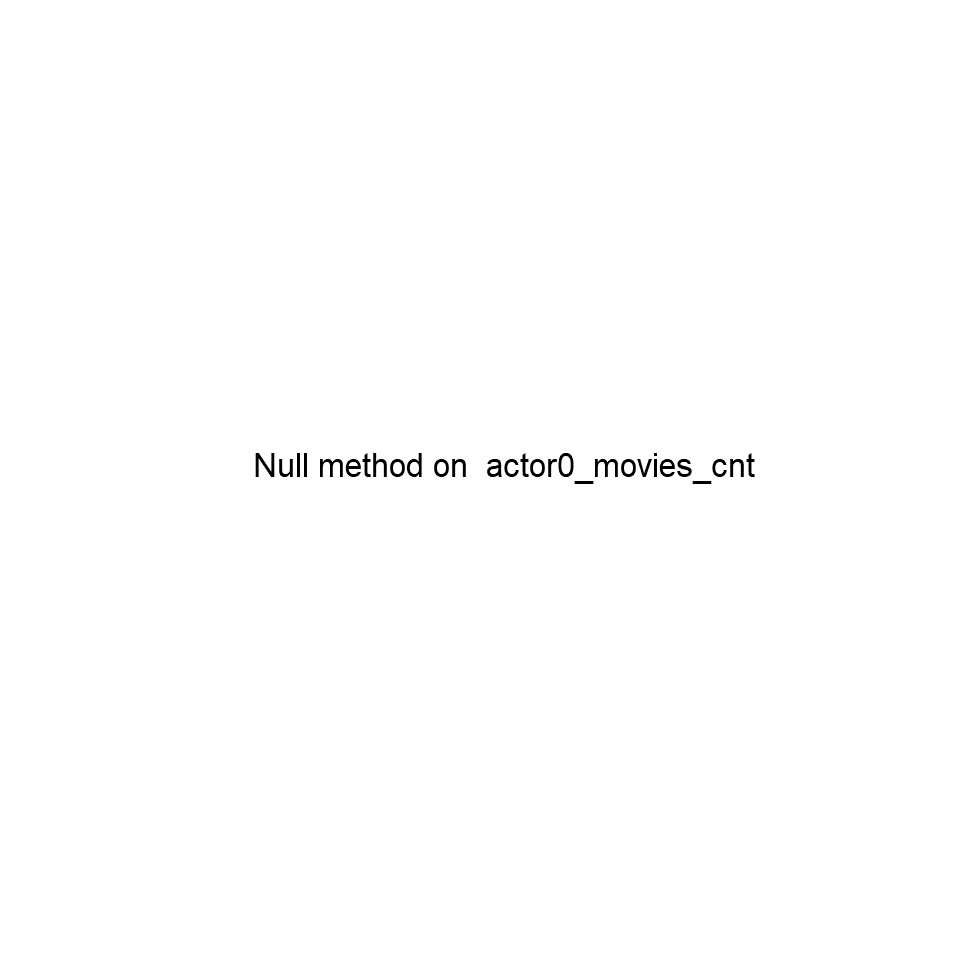

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


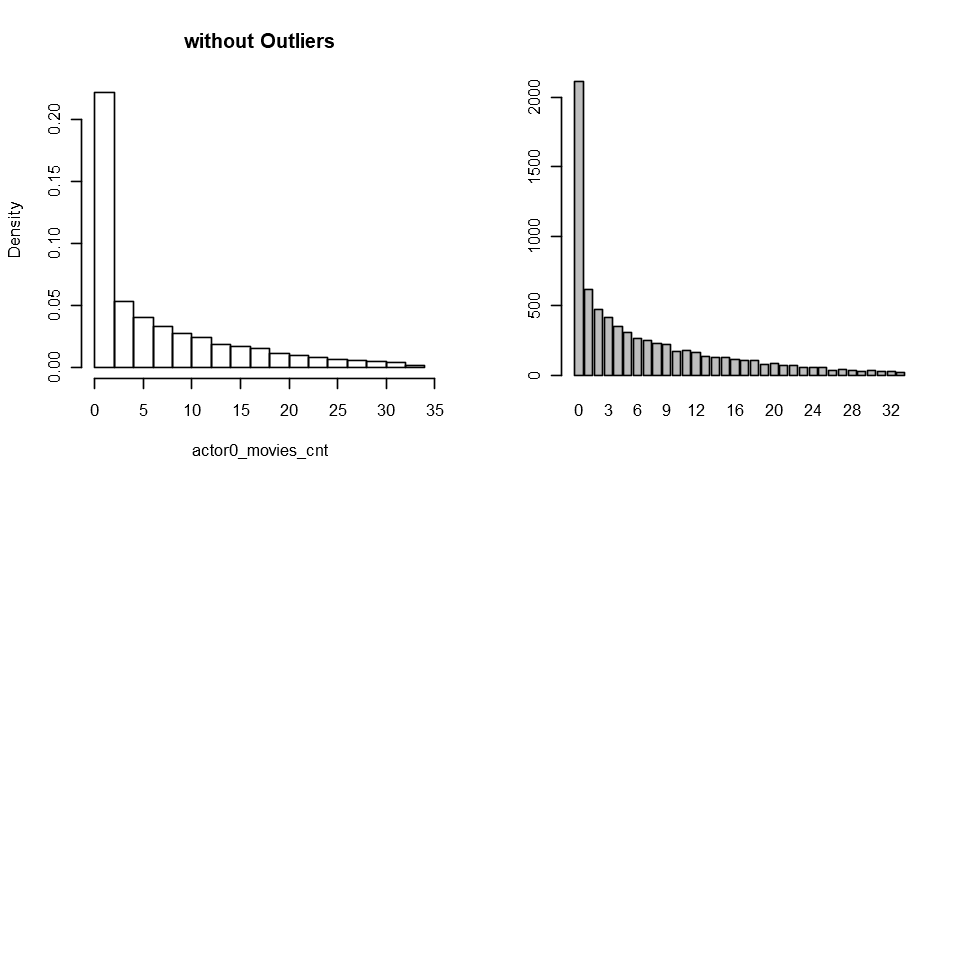

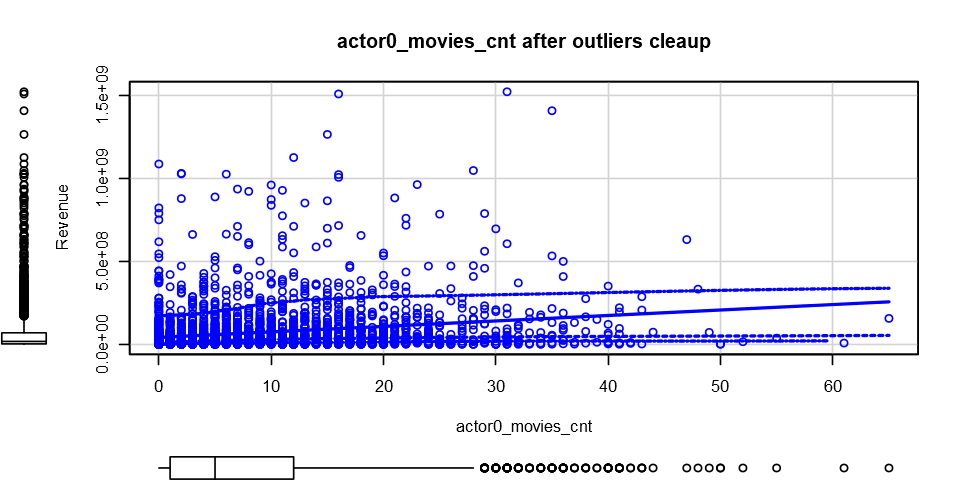

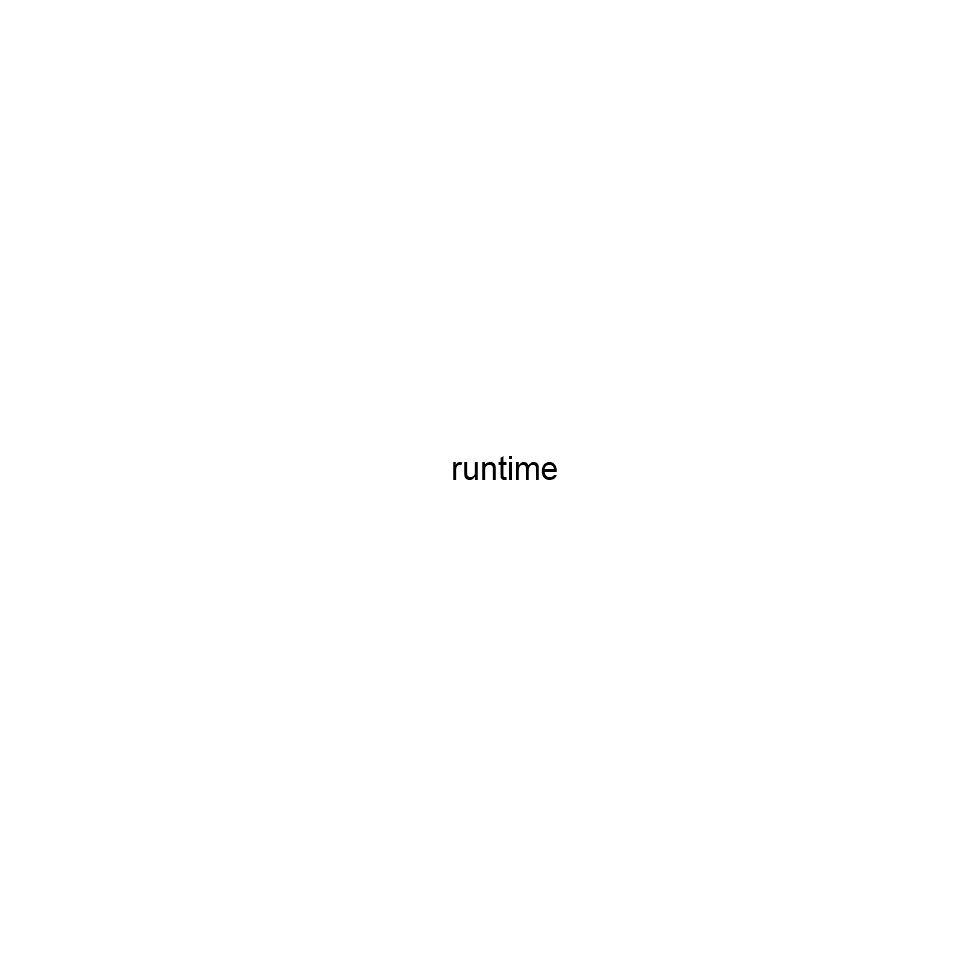

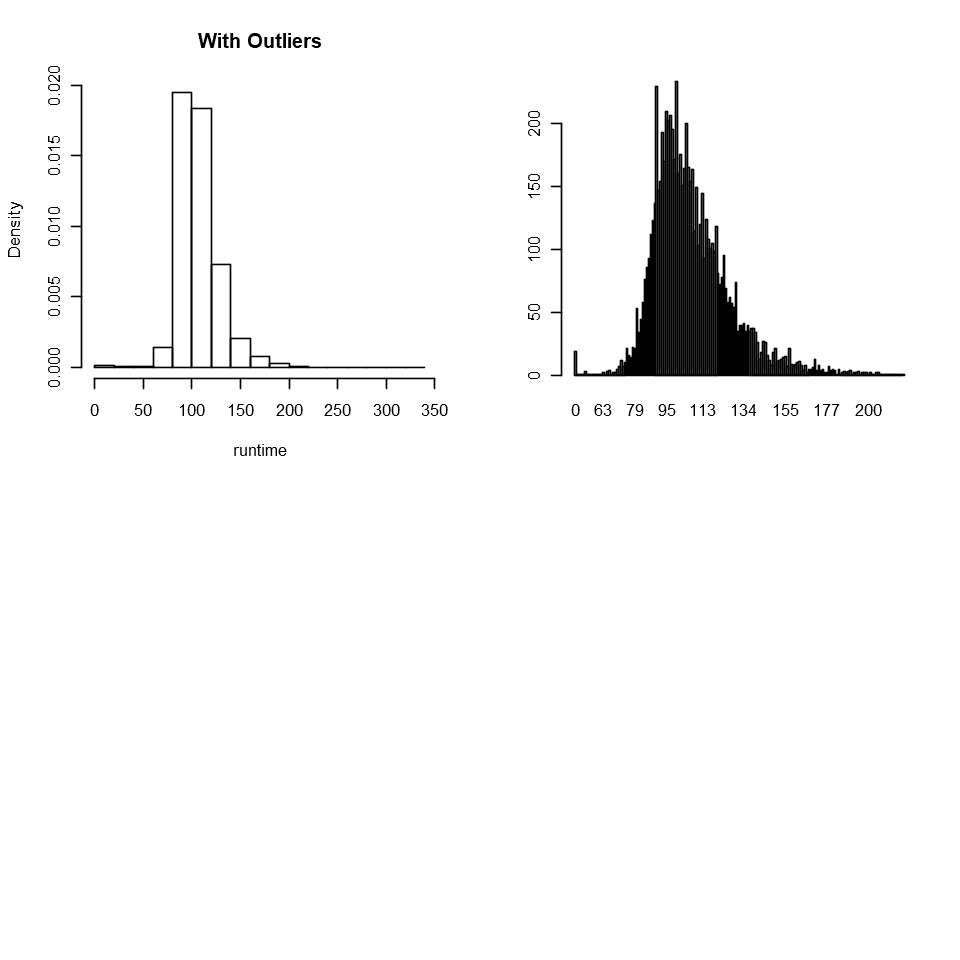

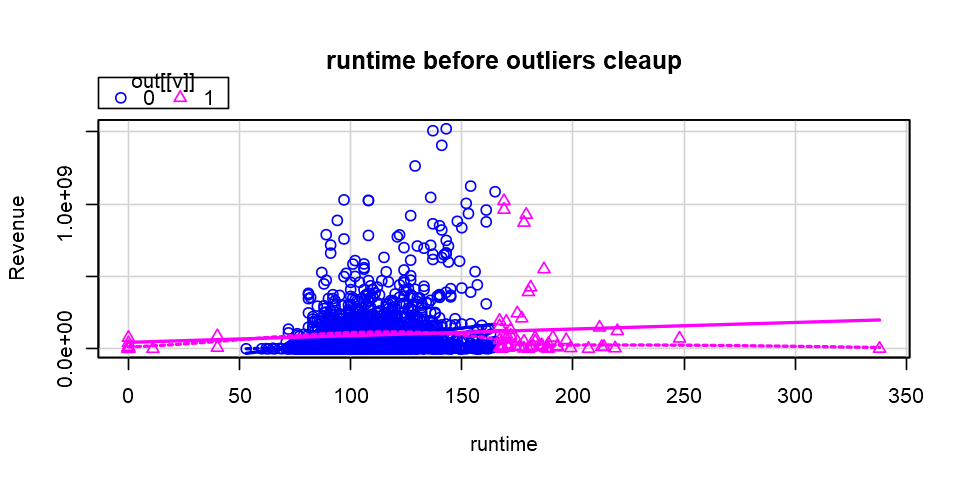

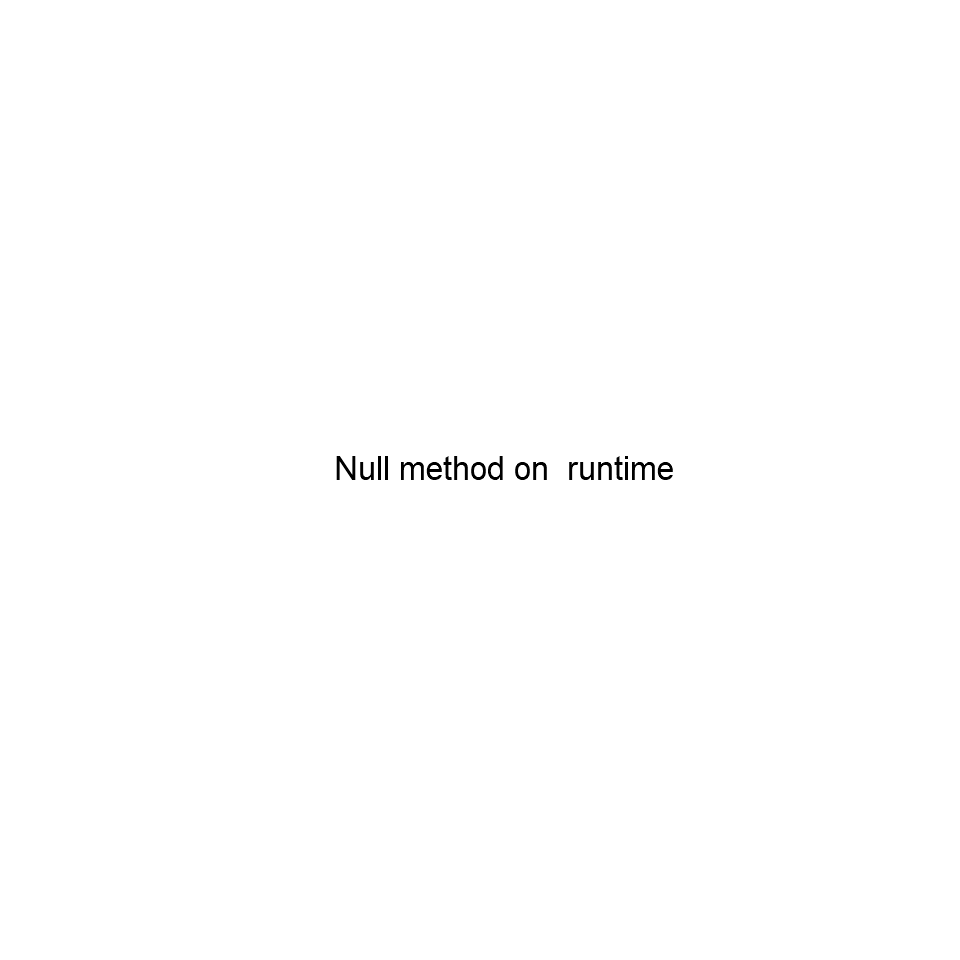

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


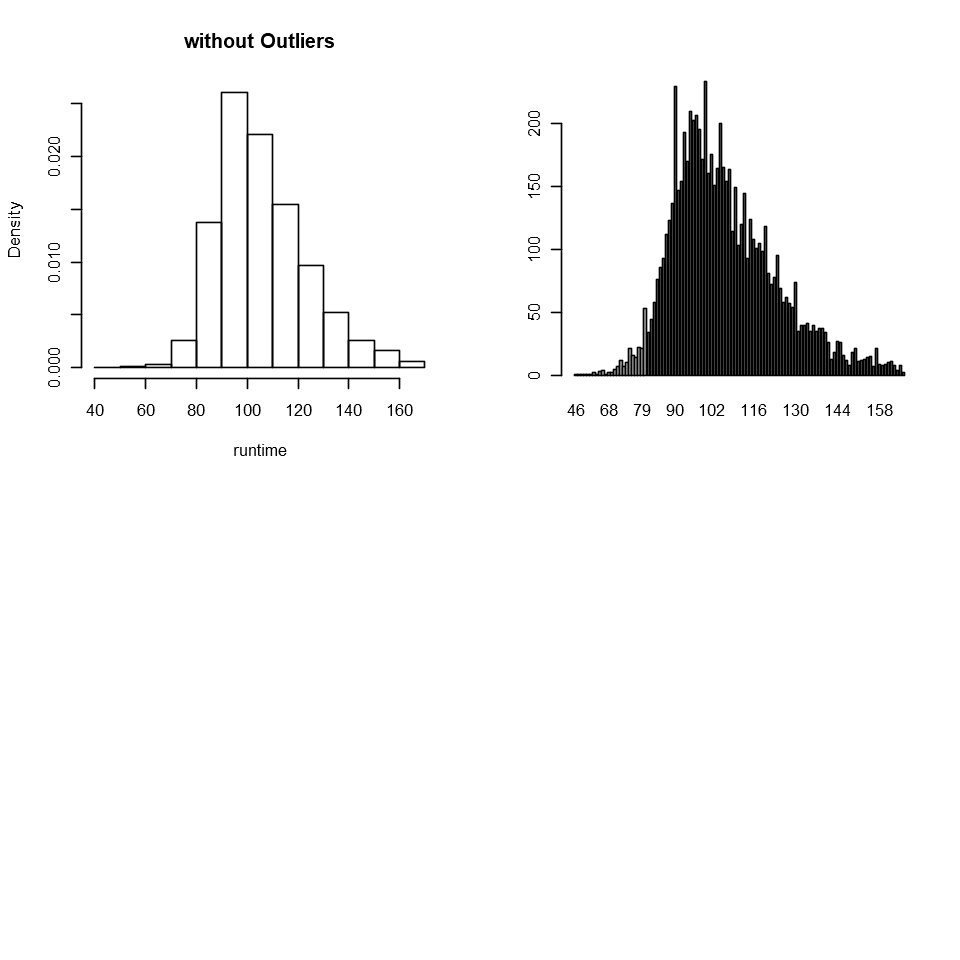

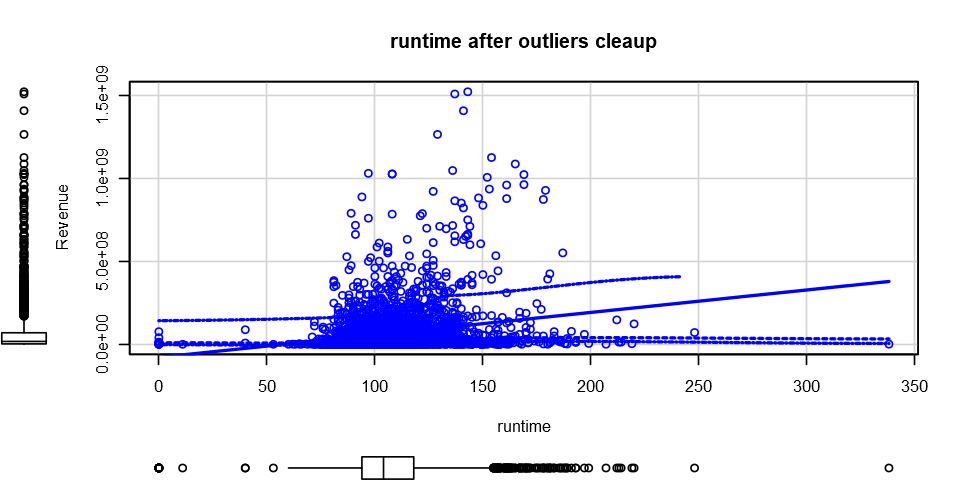

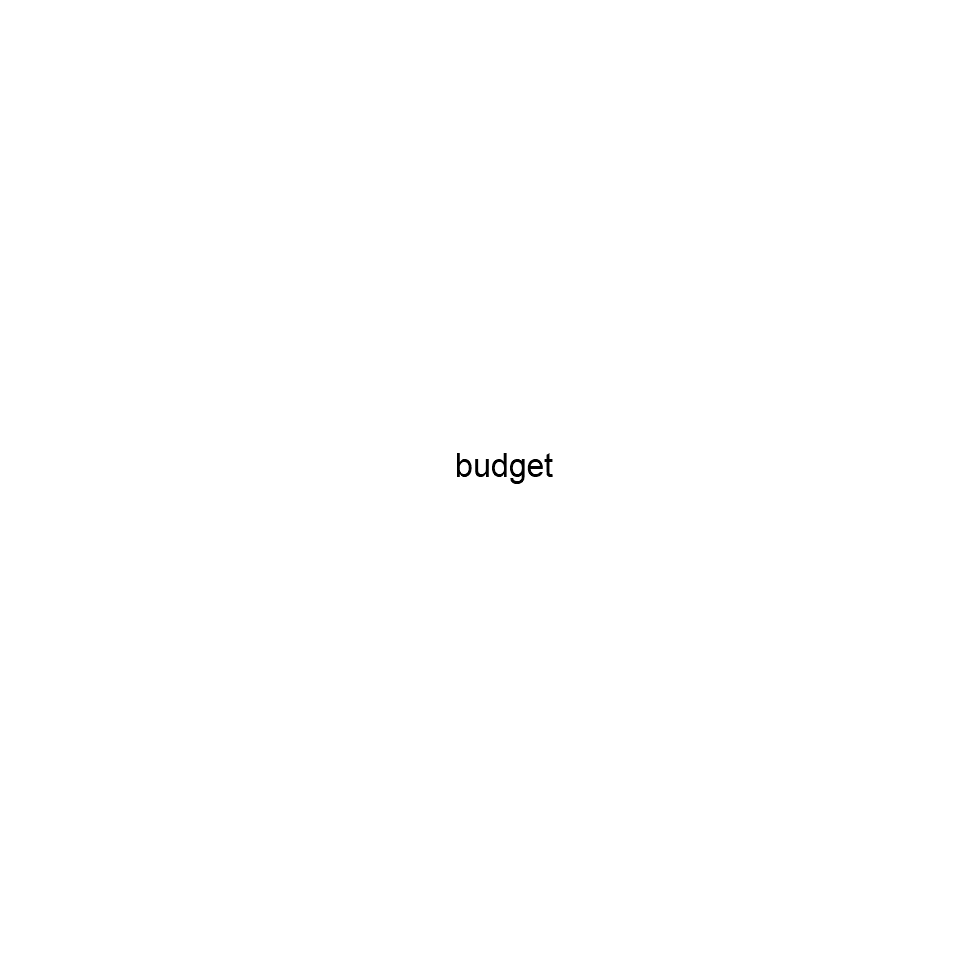

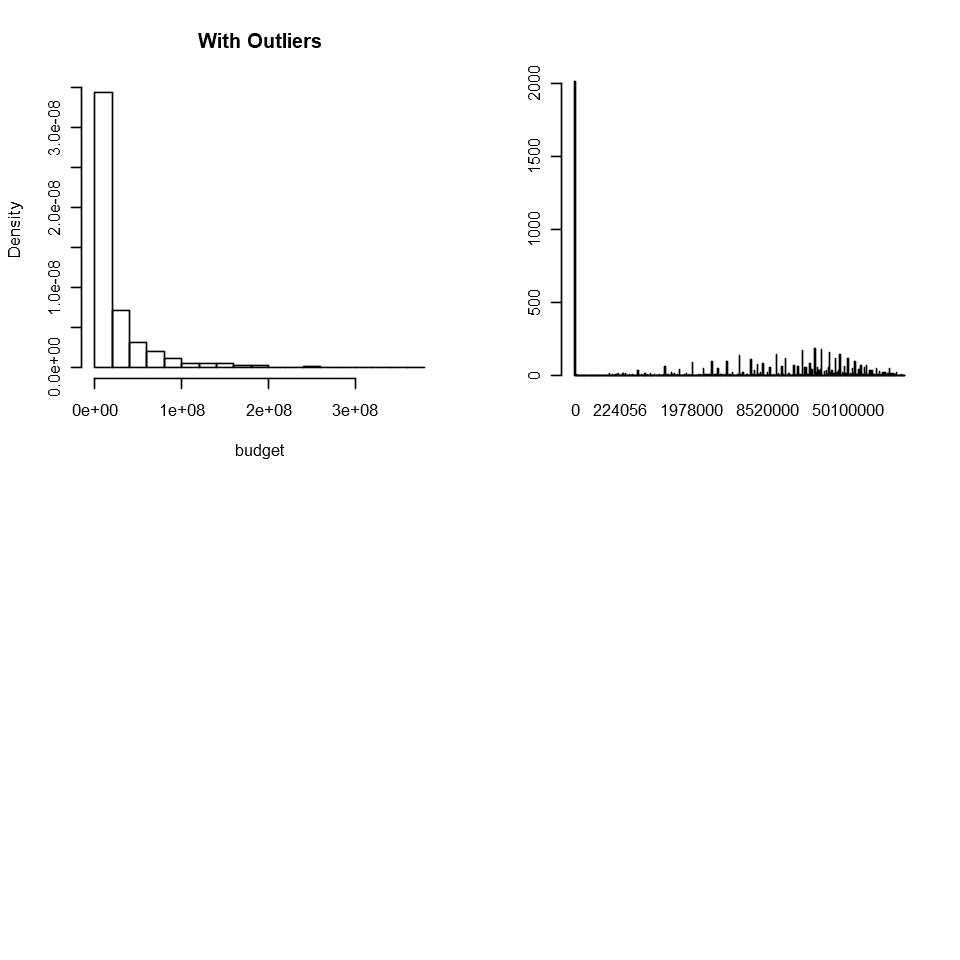

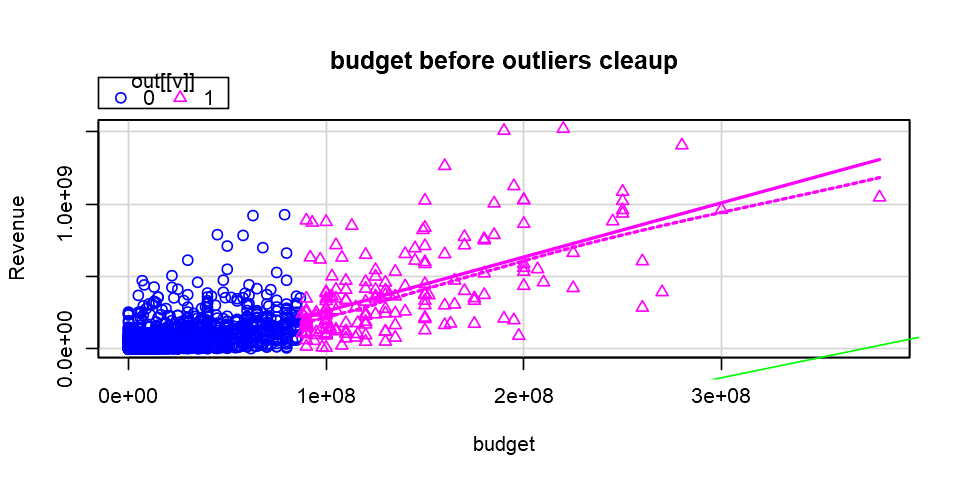

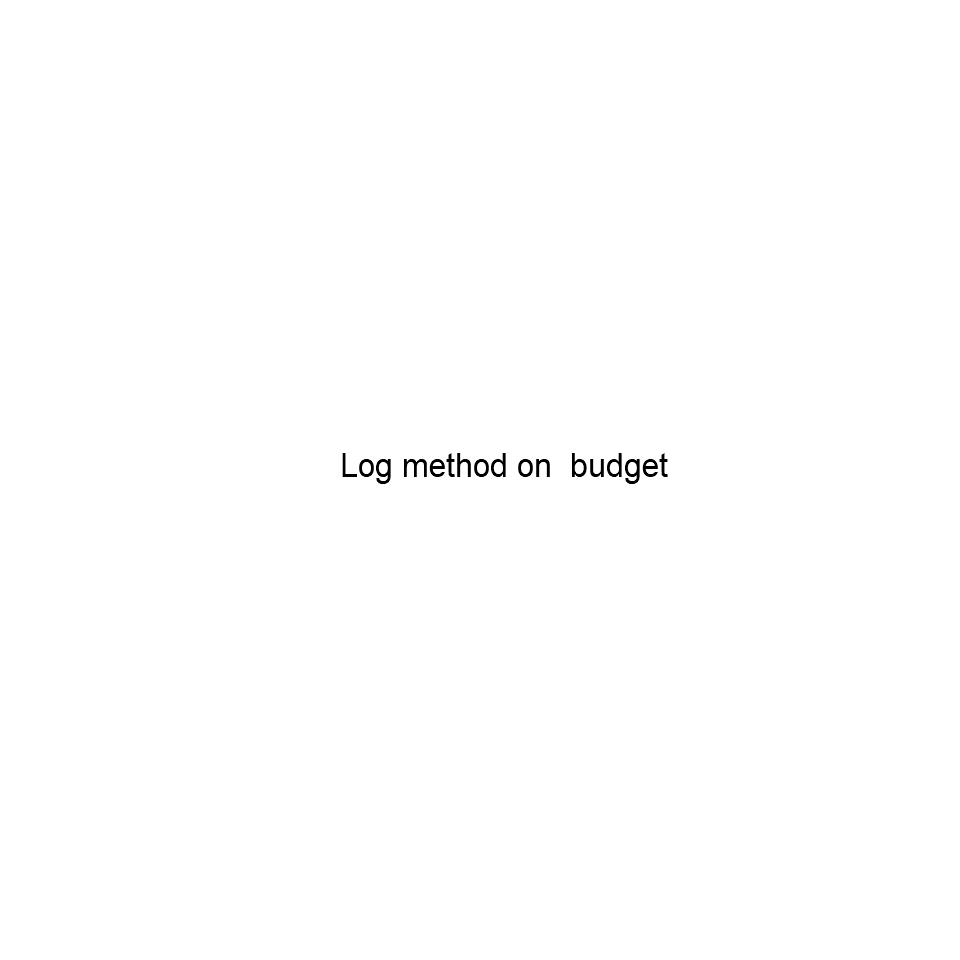

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


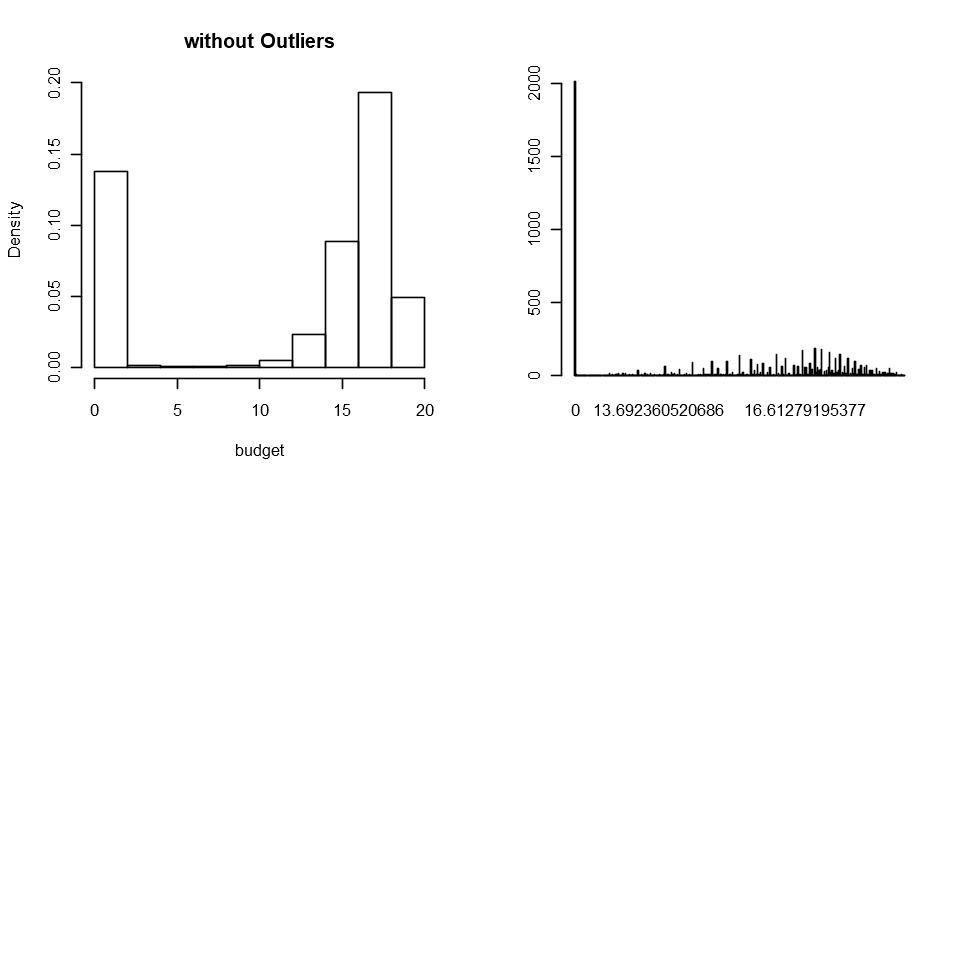

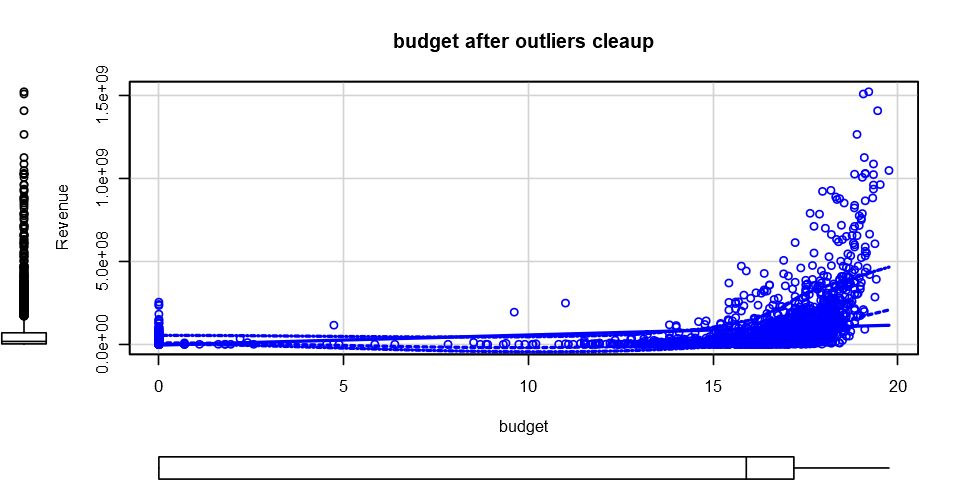

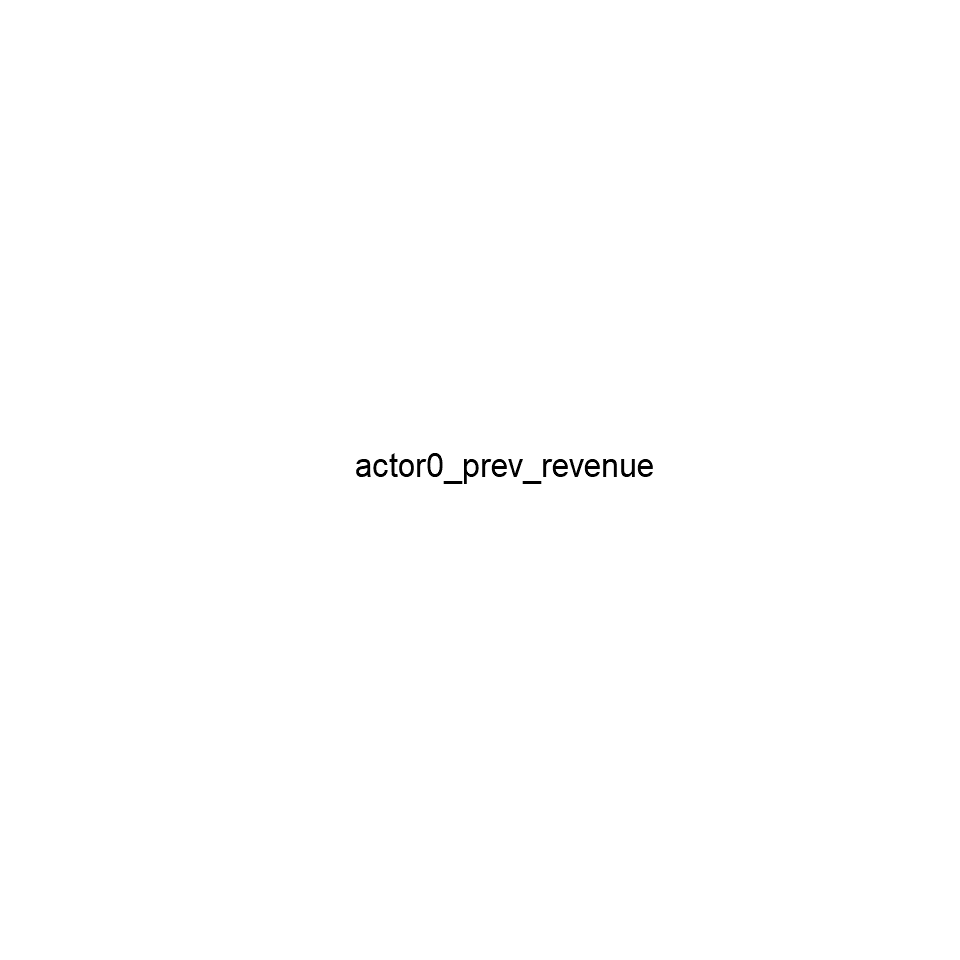

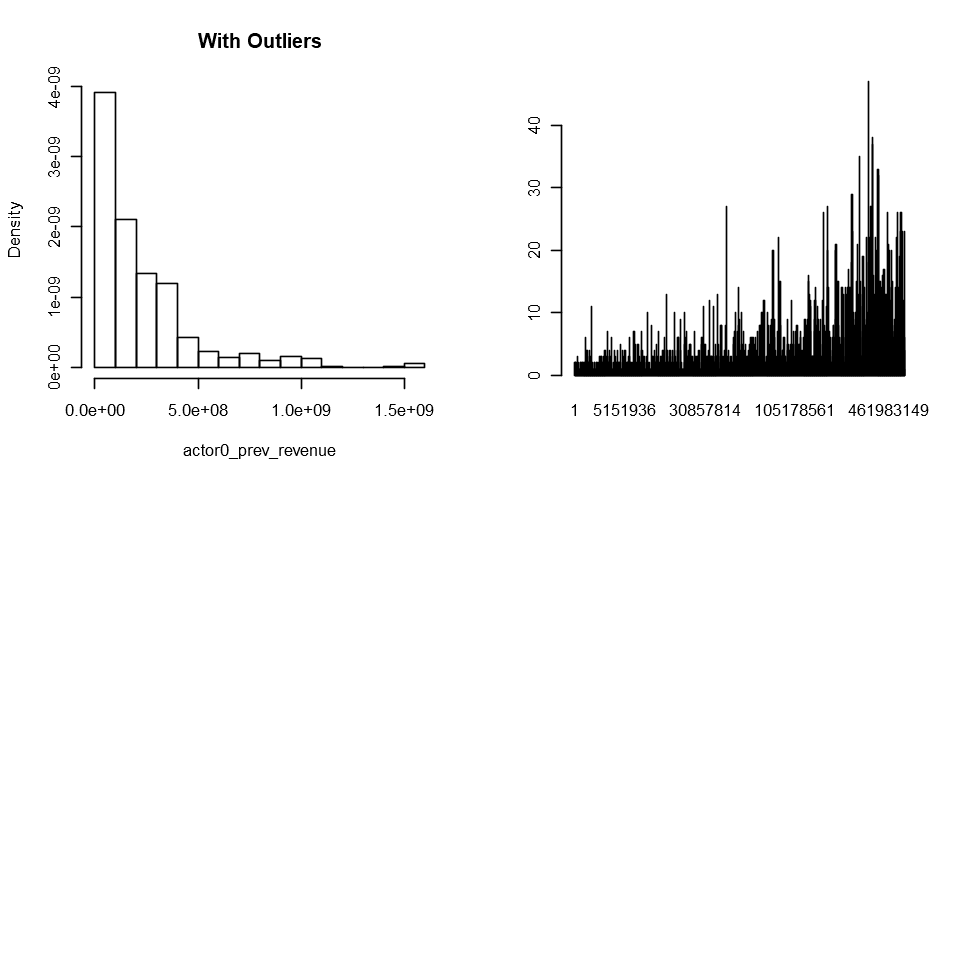

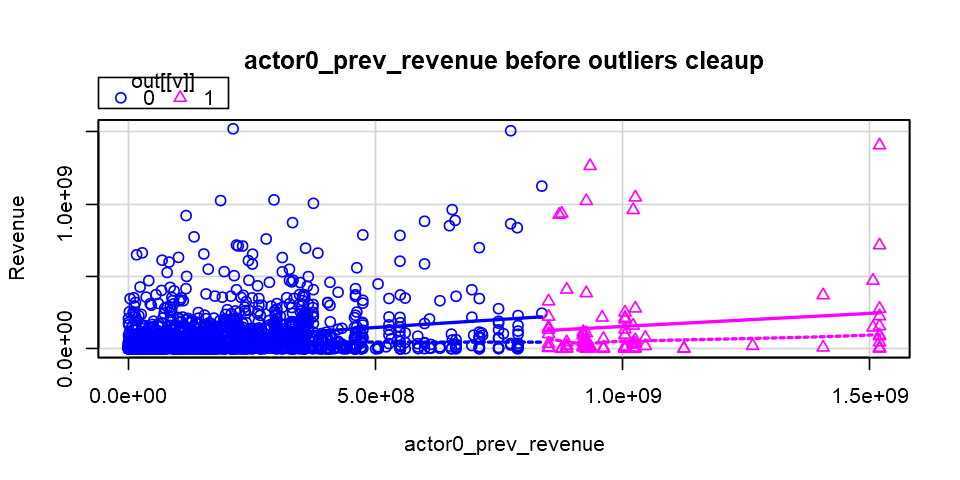

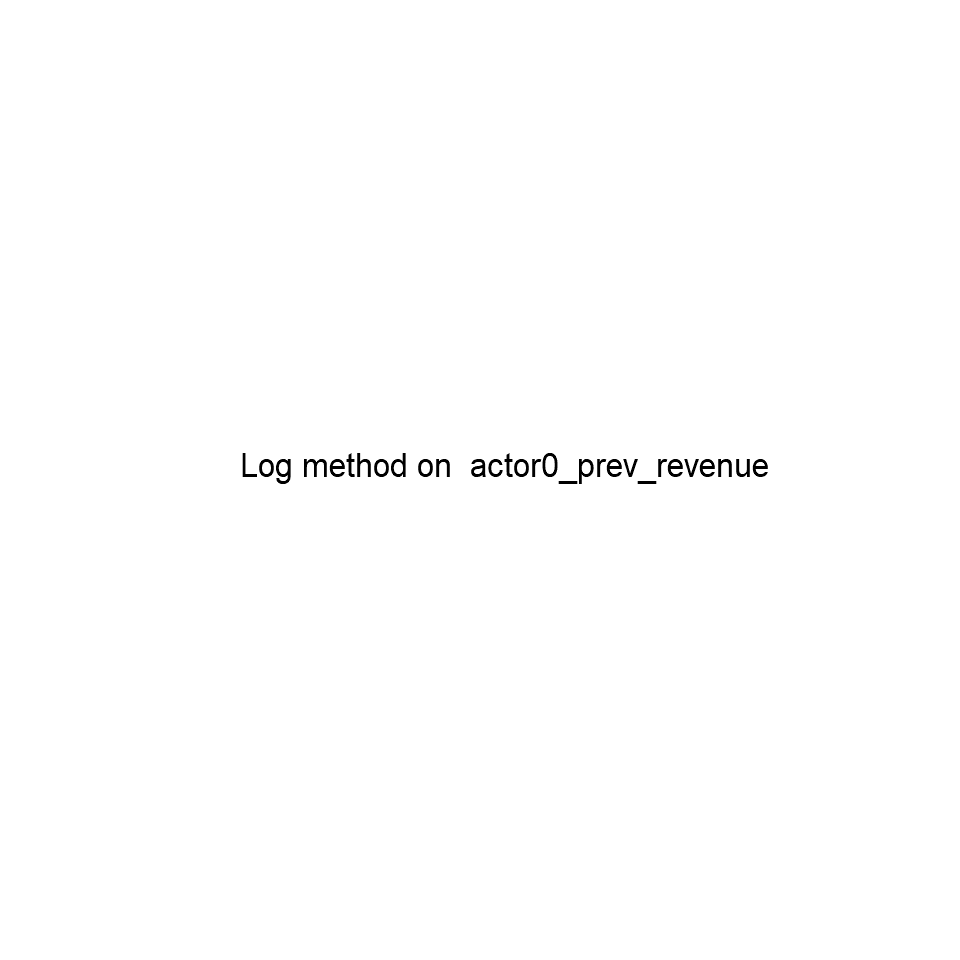

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


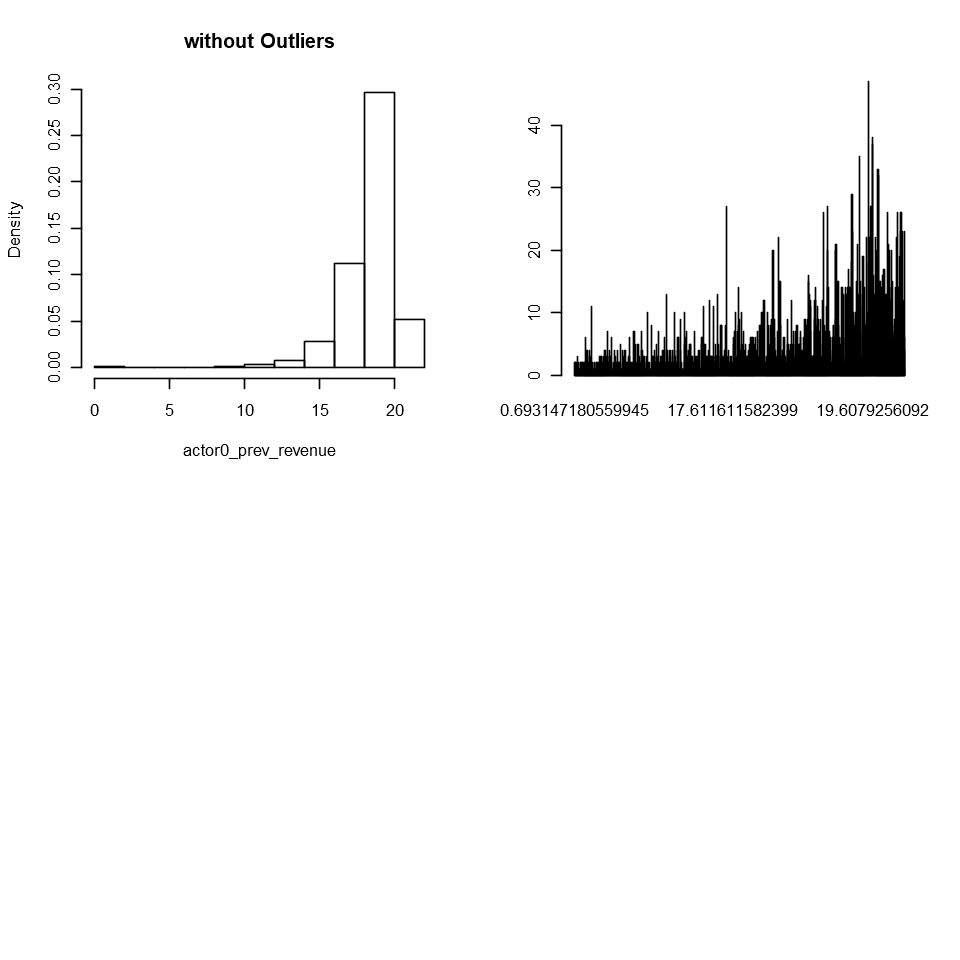

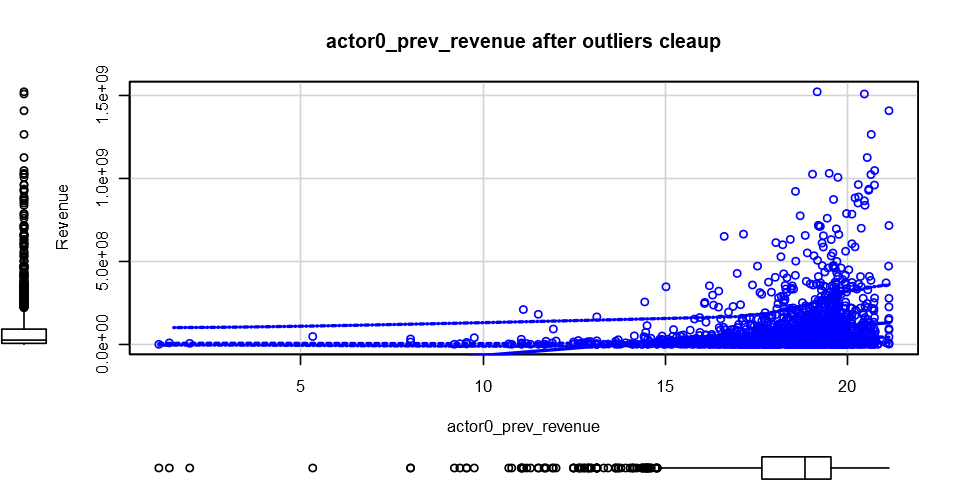

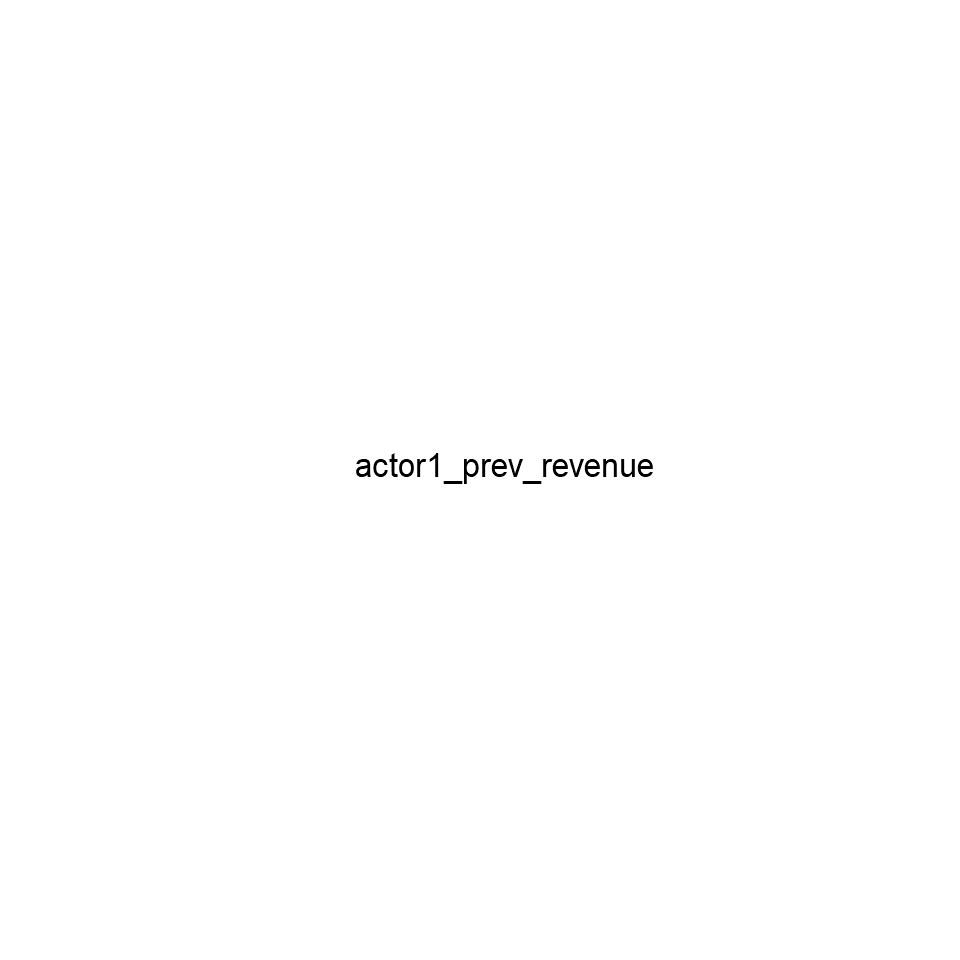

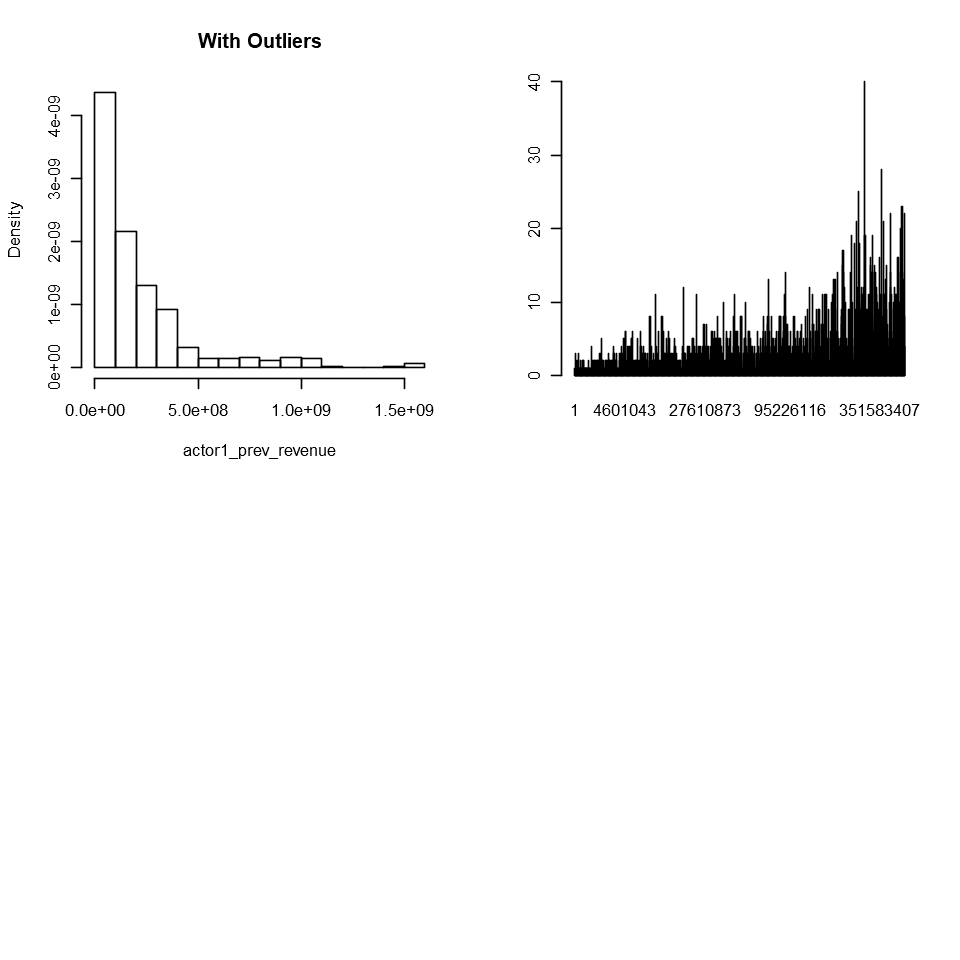

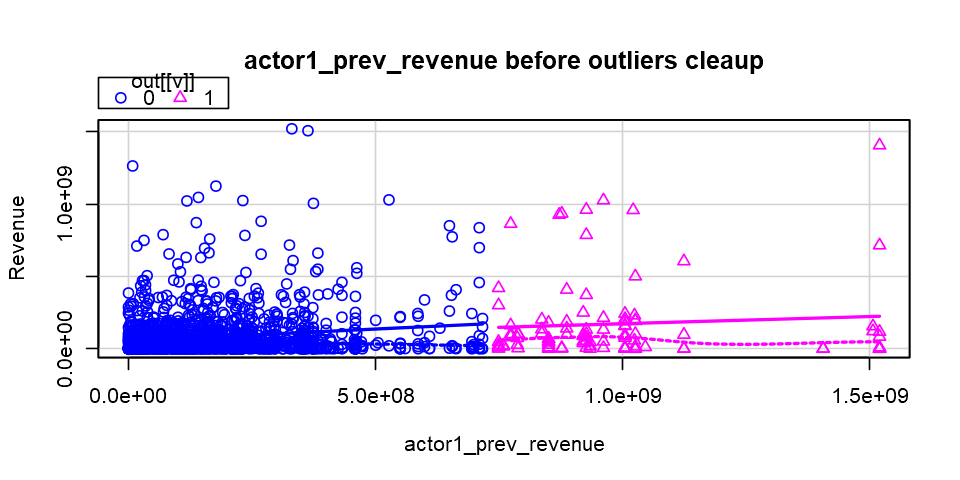

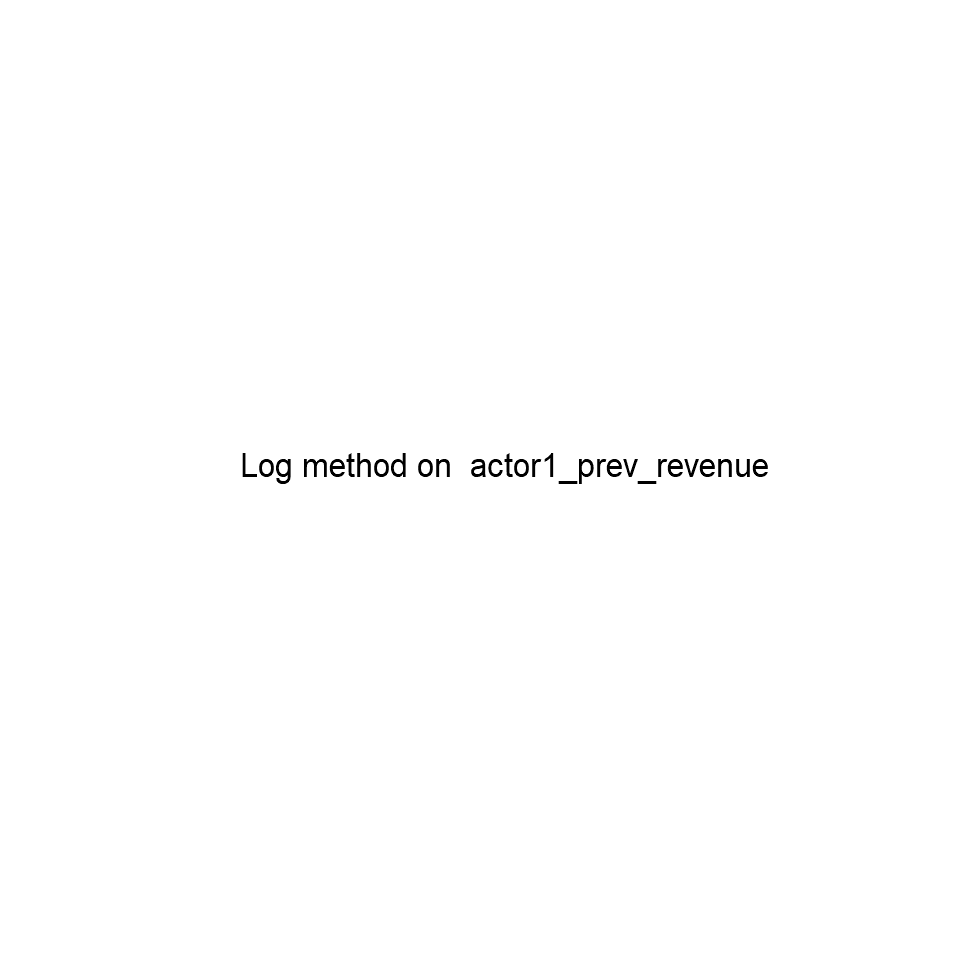

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


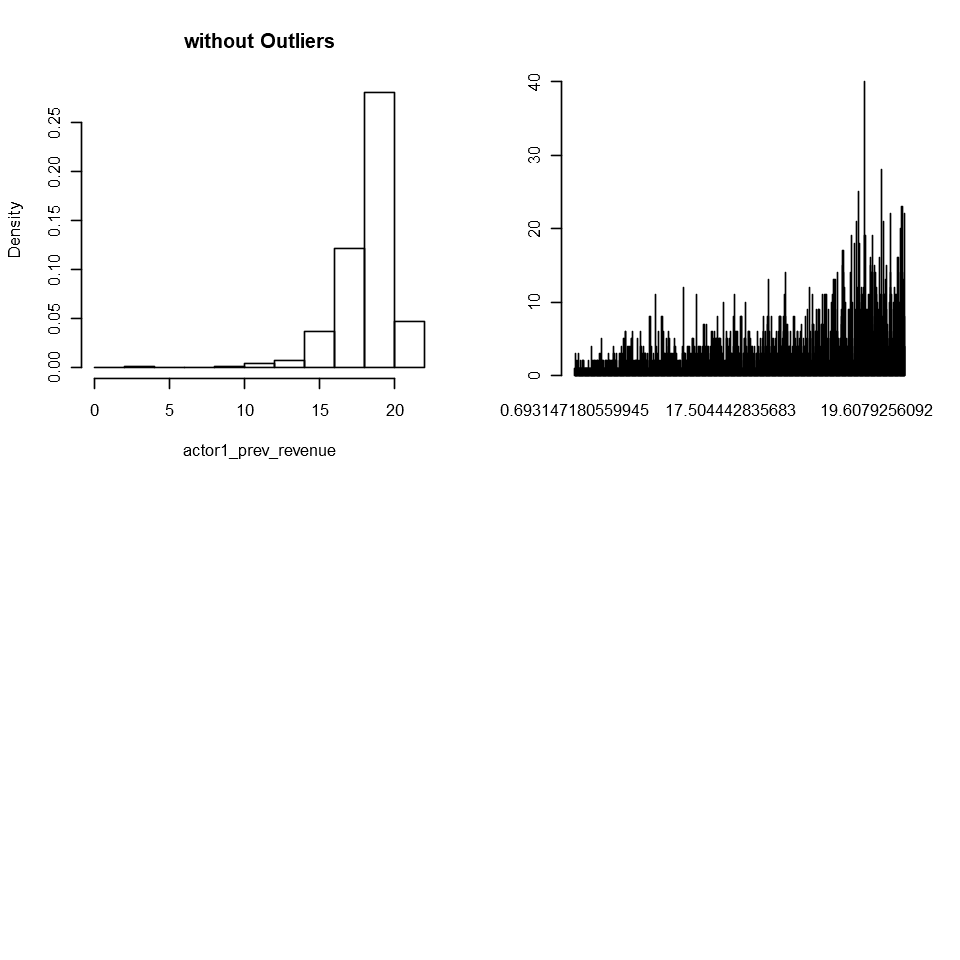

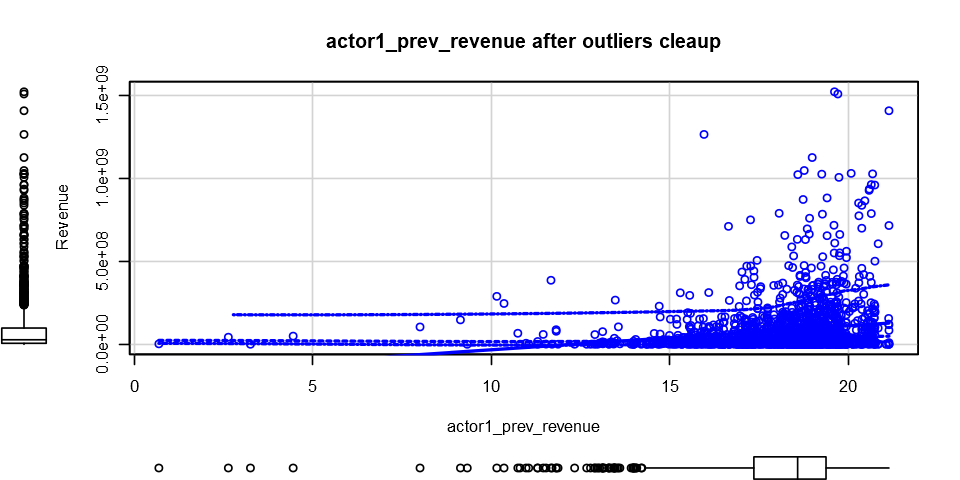

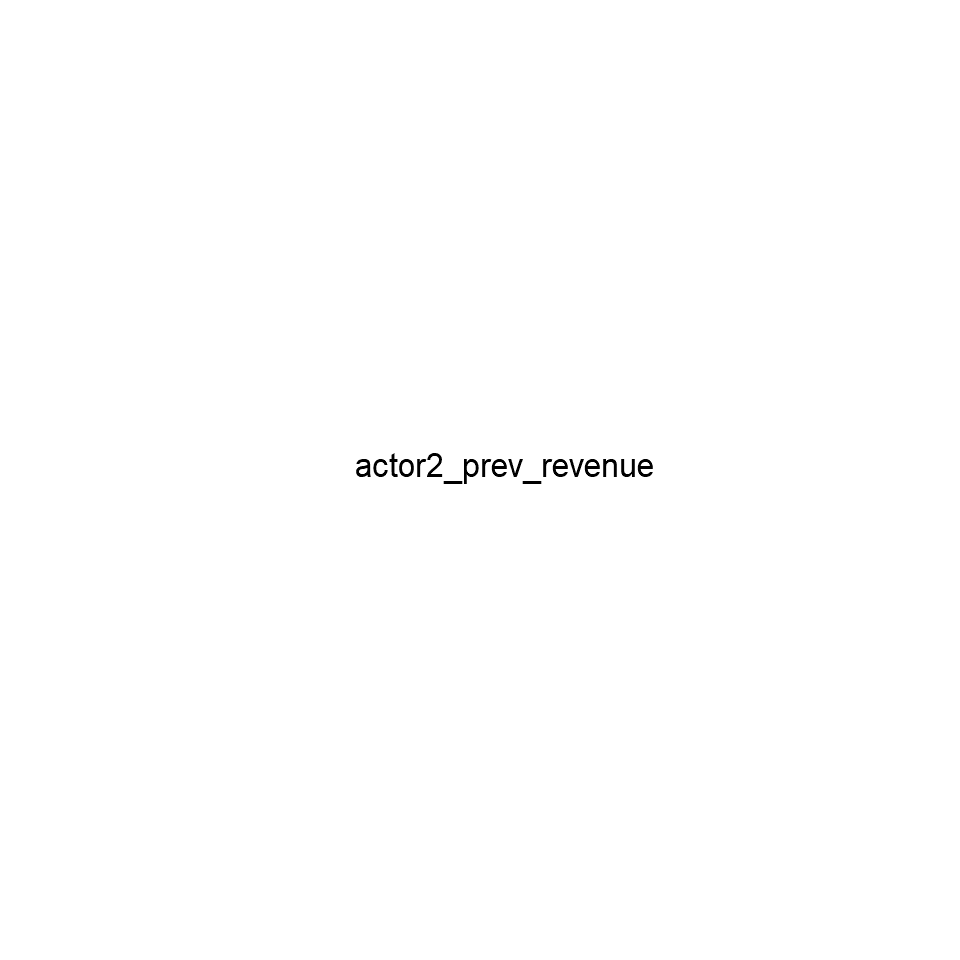

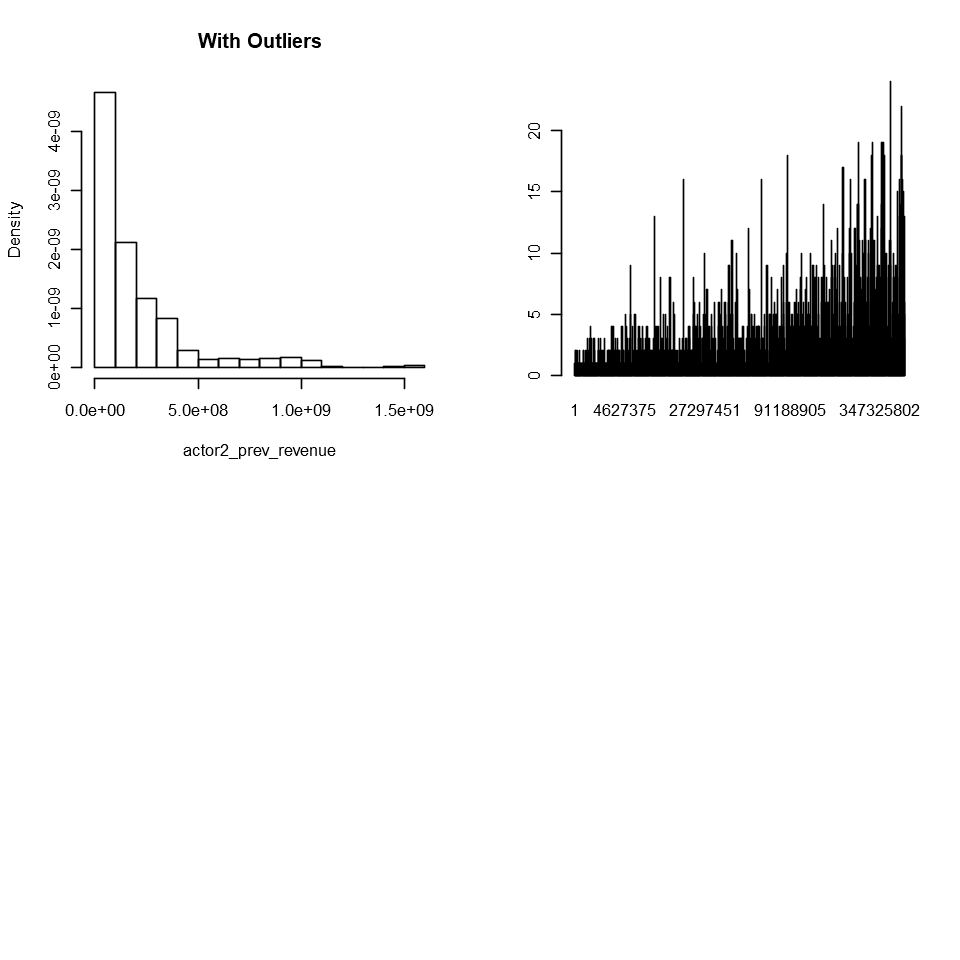

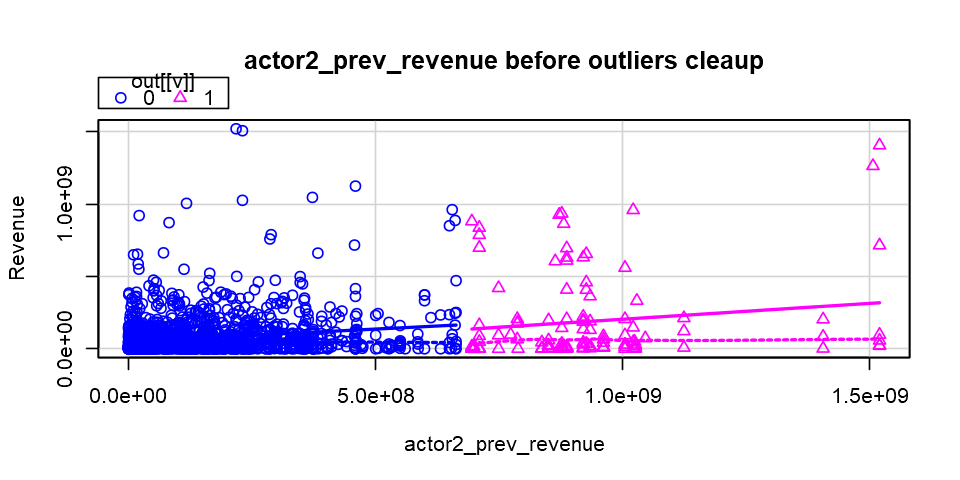

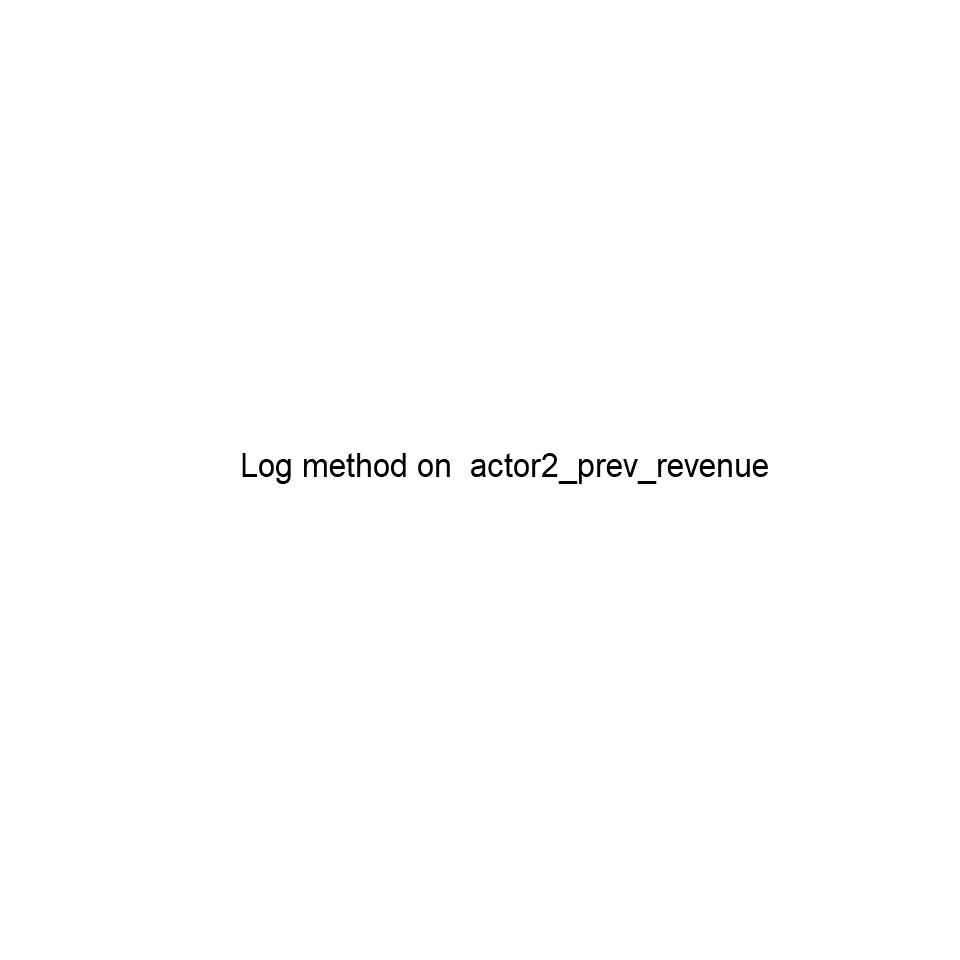

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"


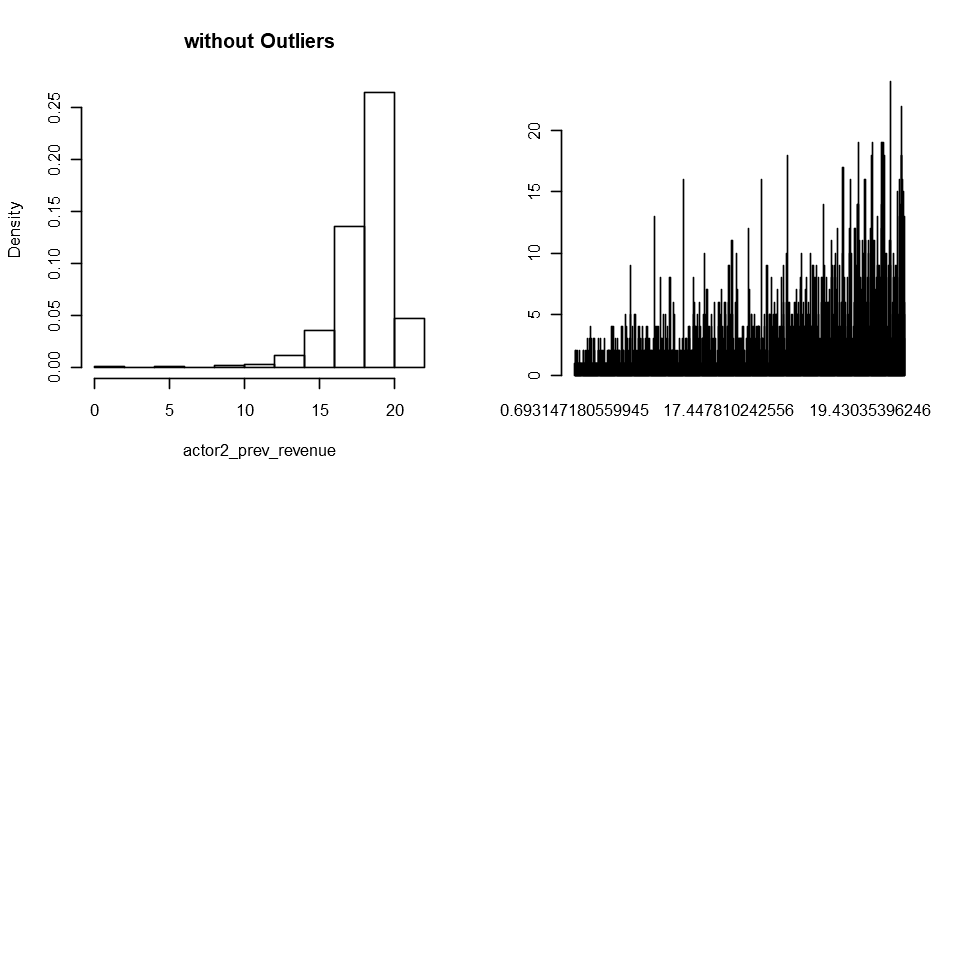

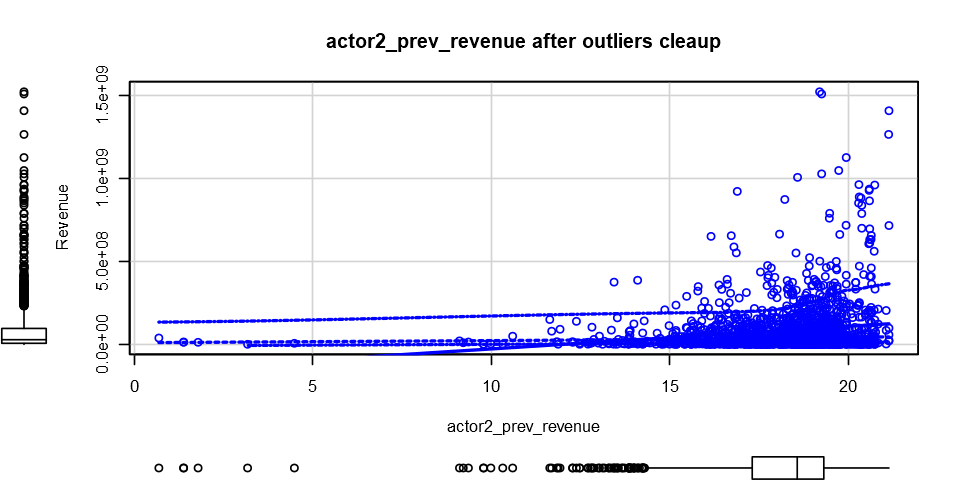

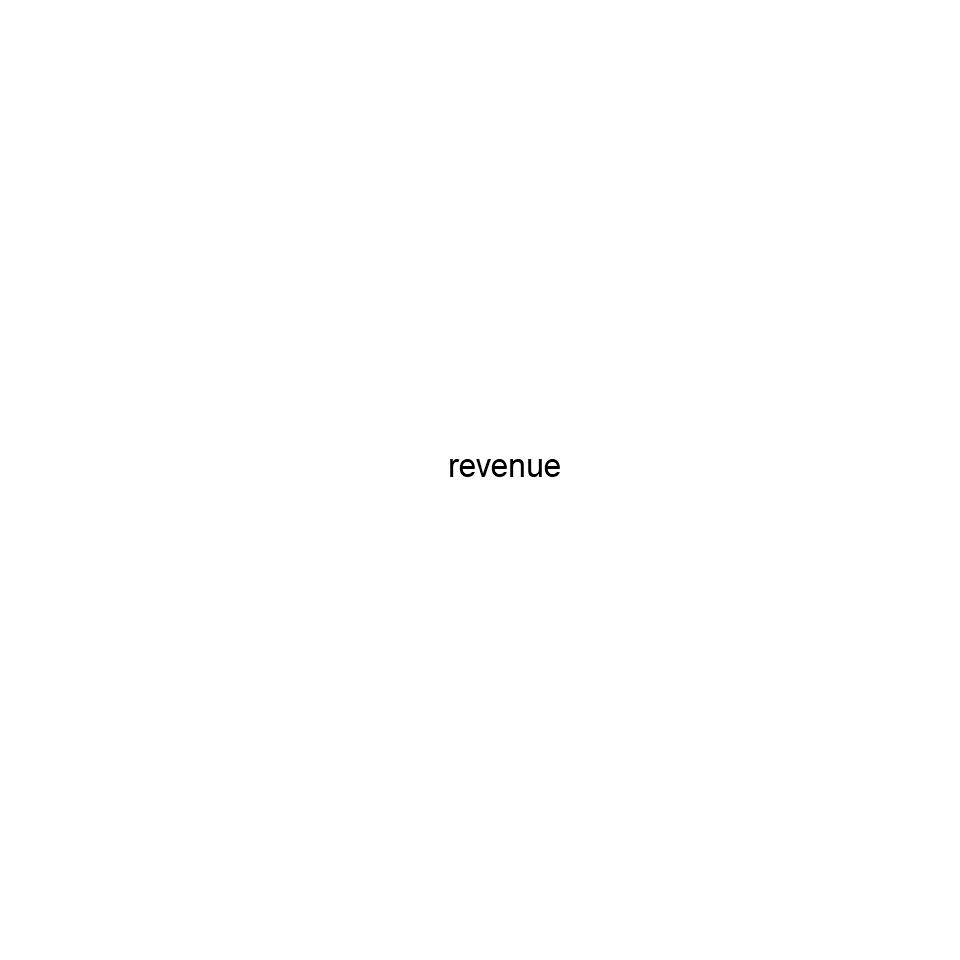

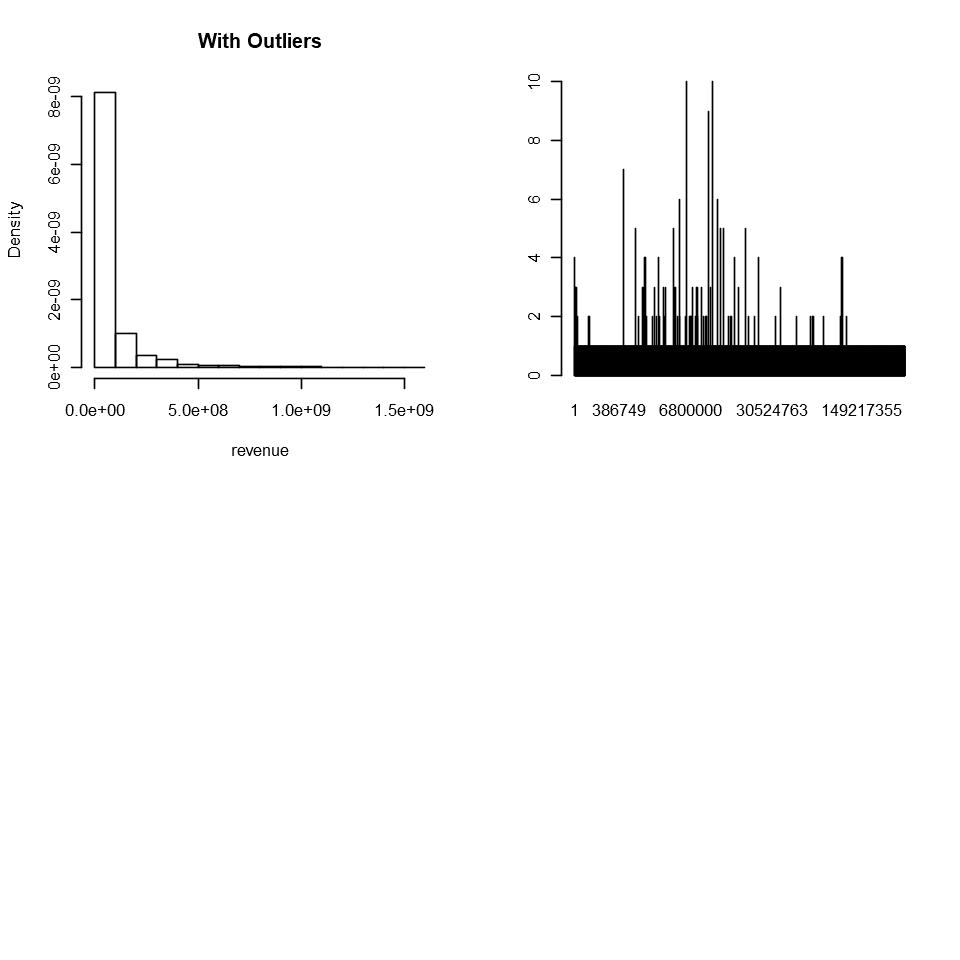

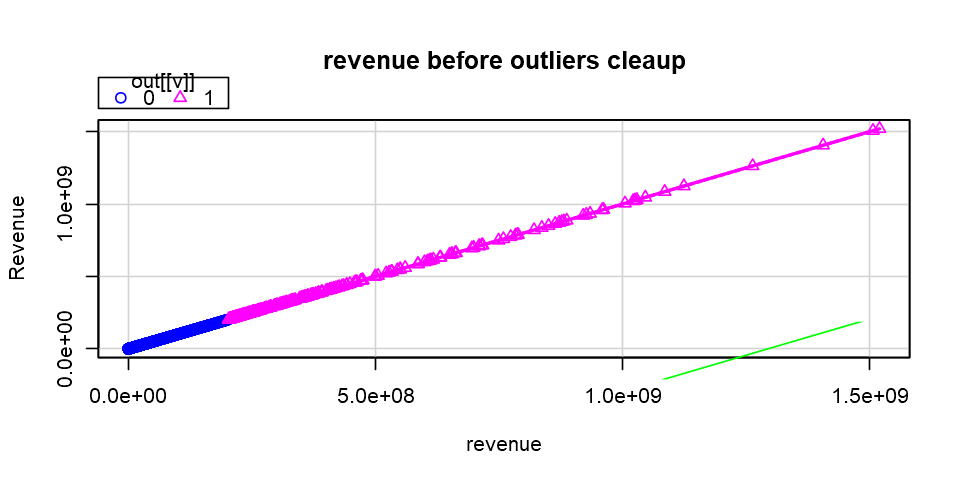

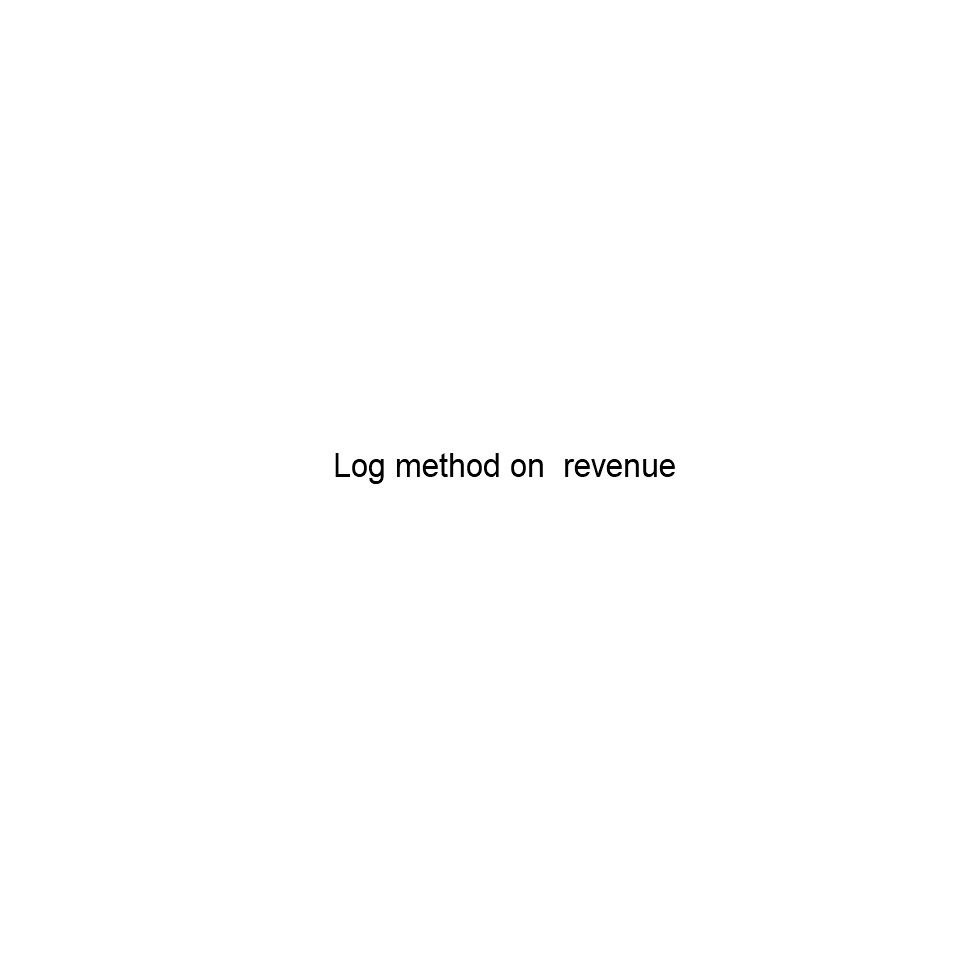

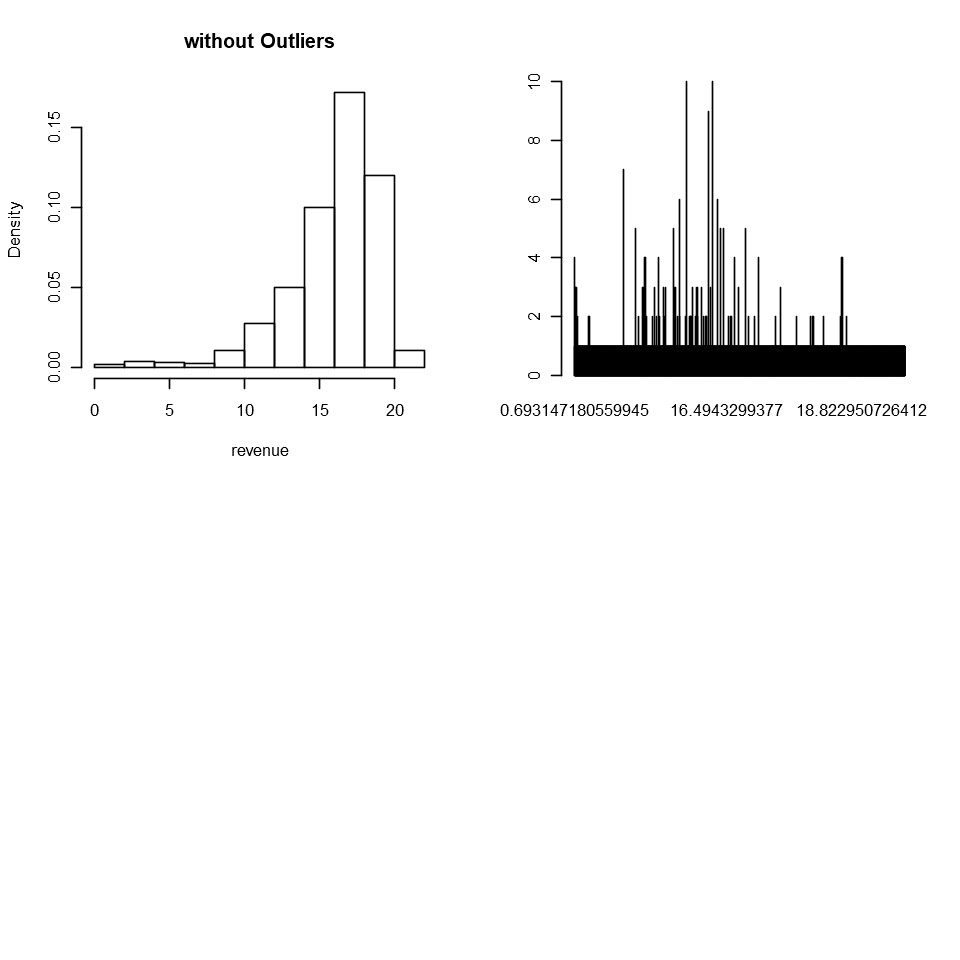

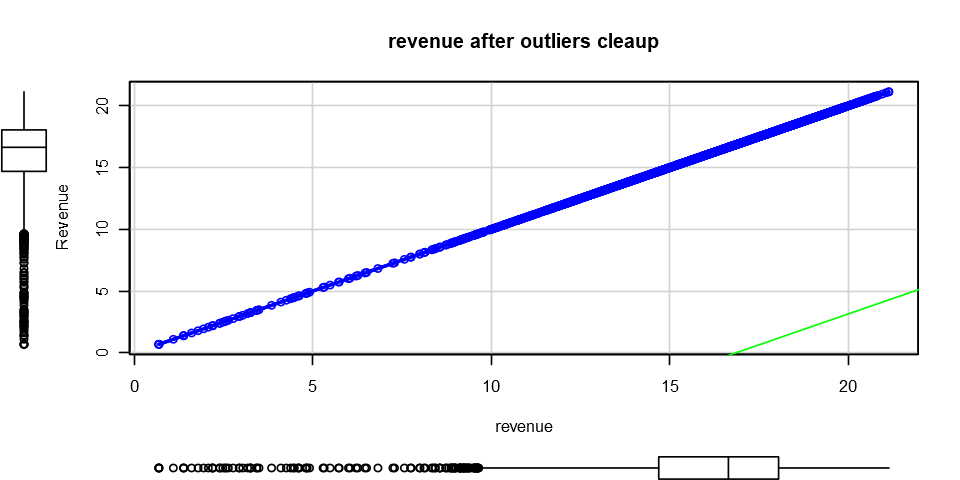

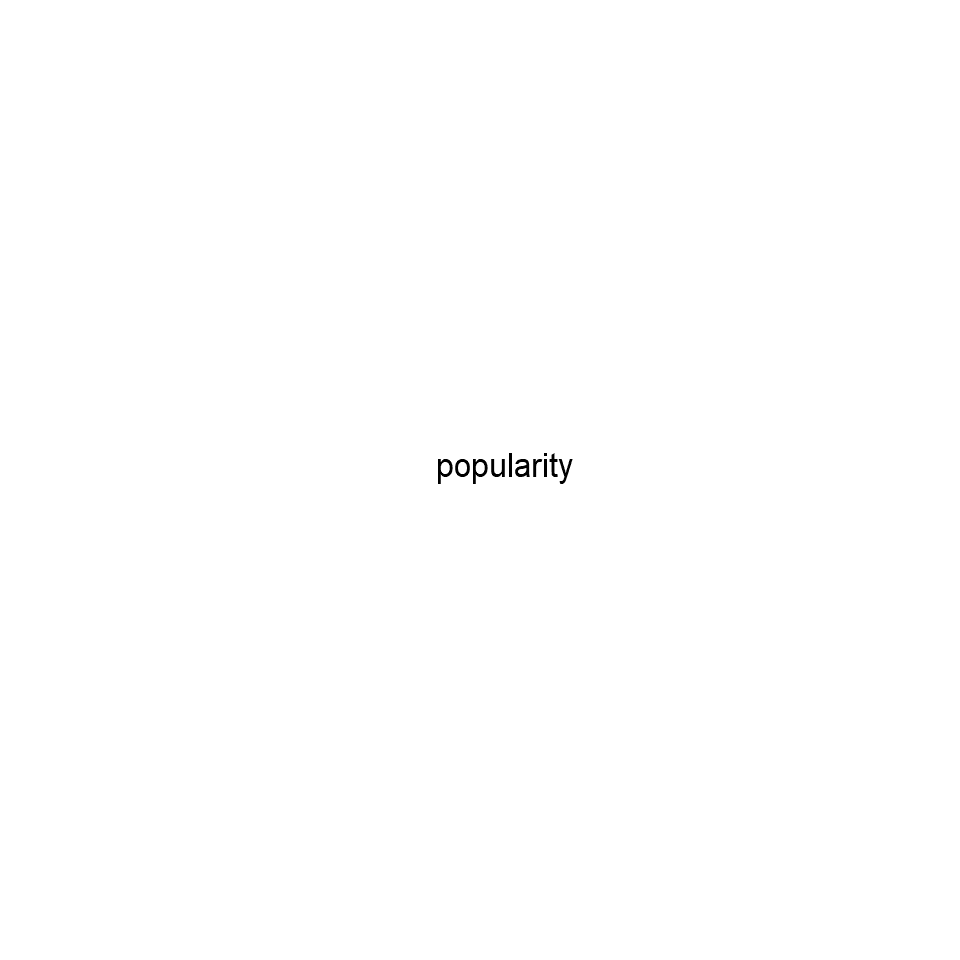

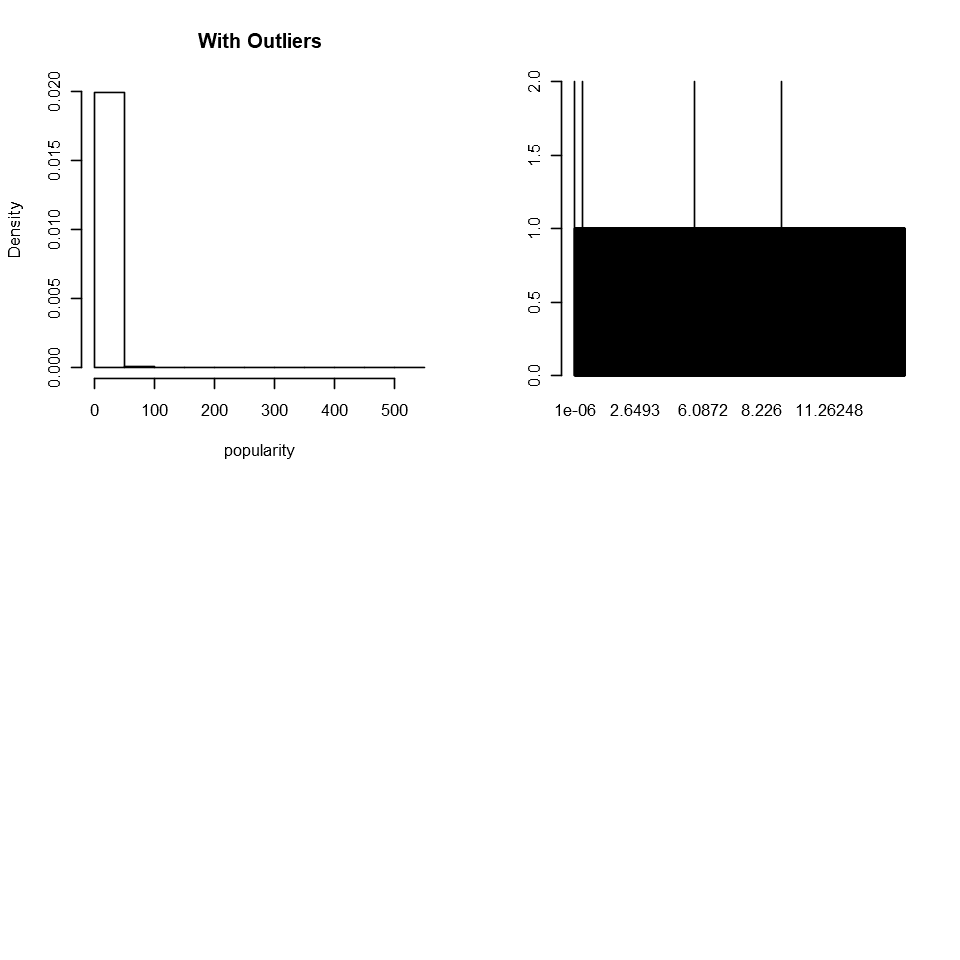

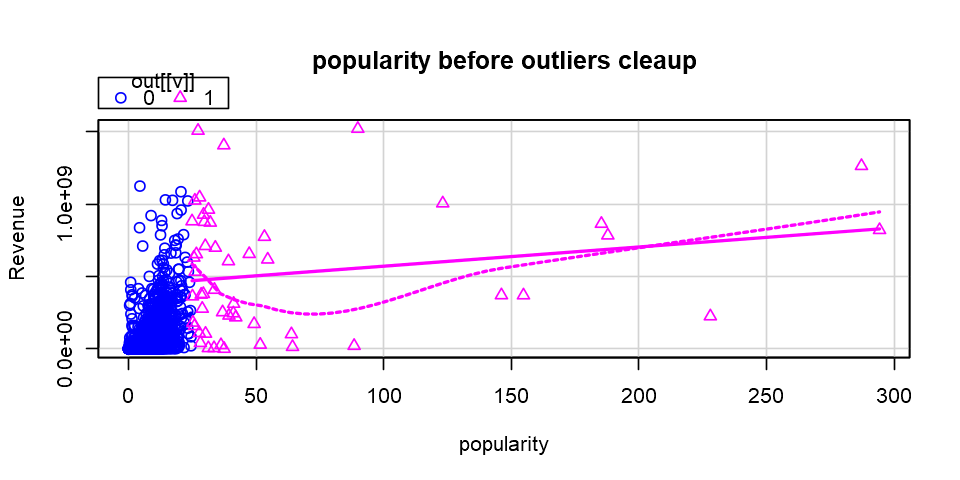

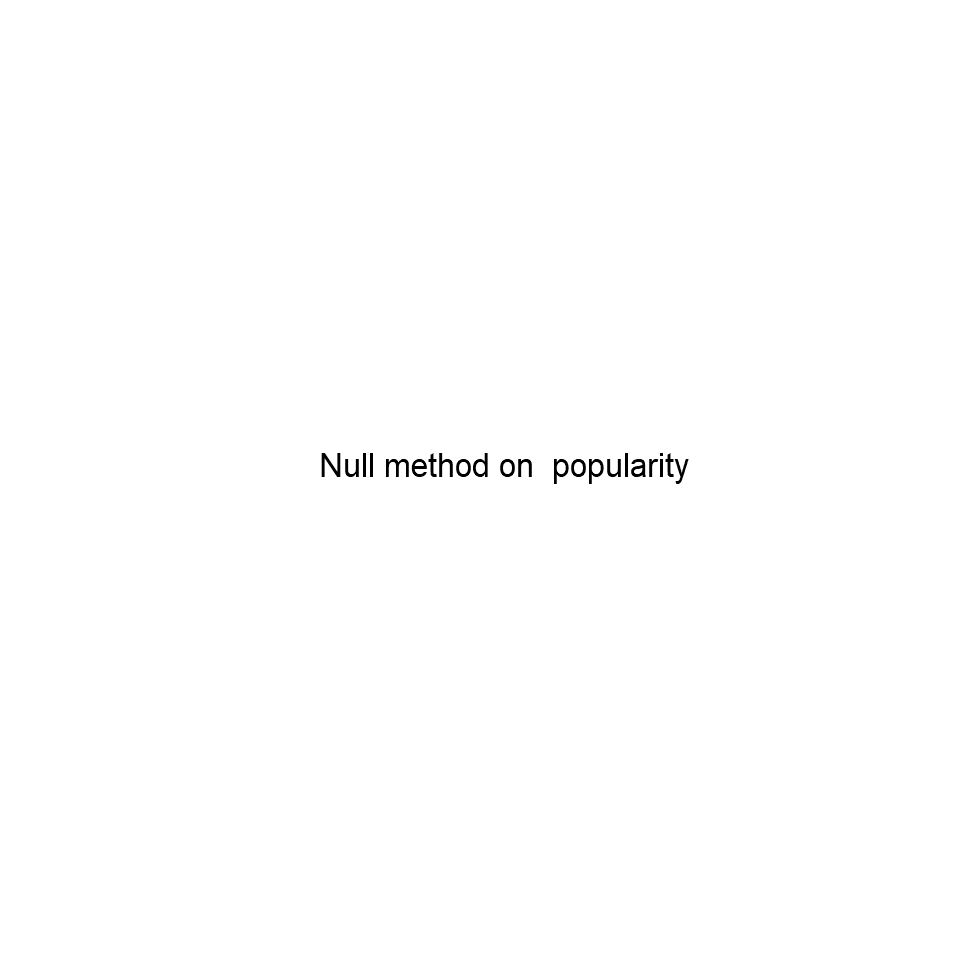

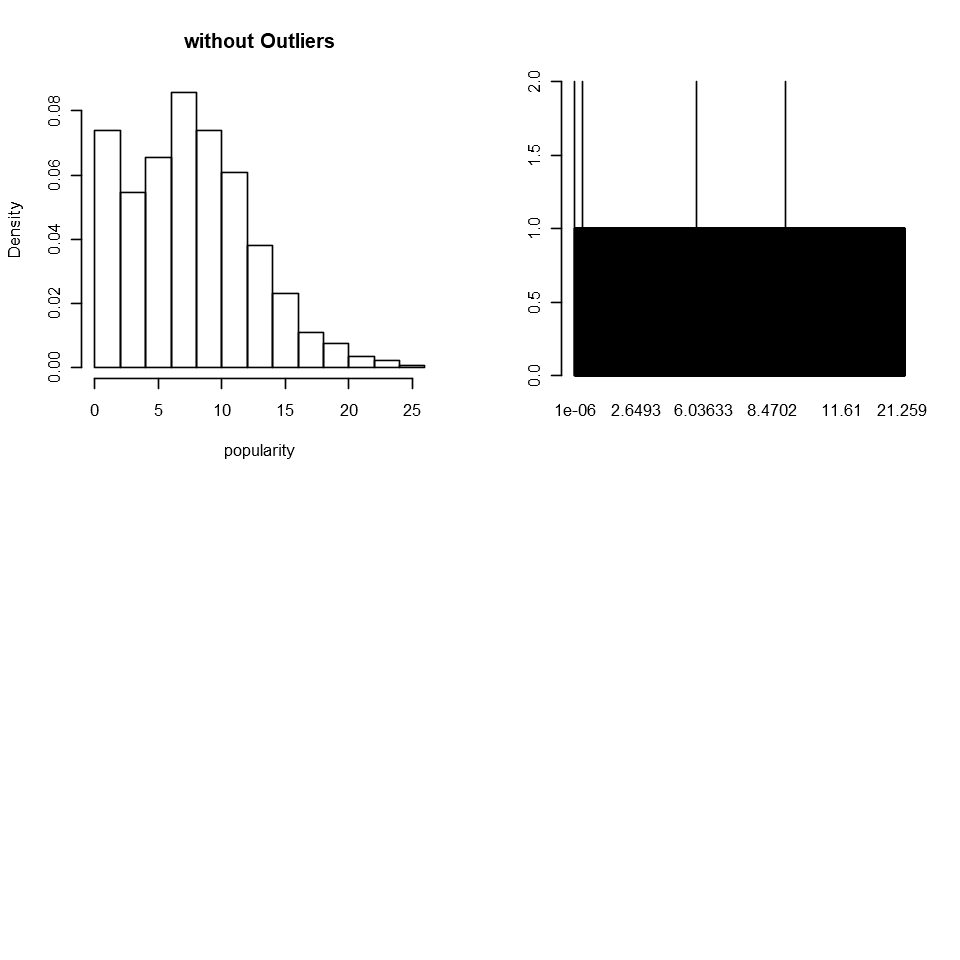

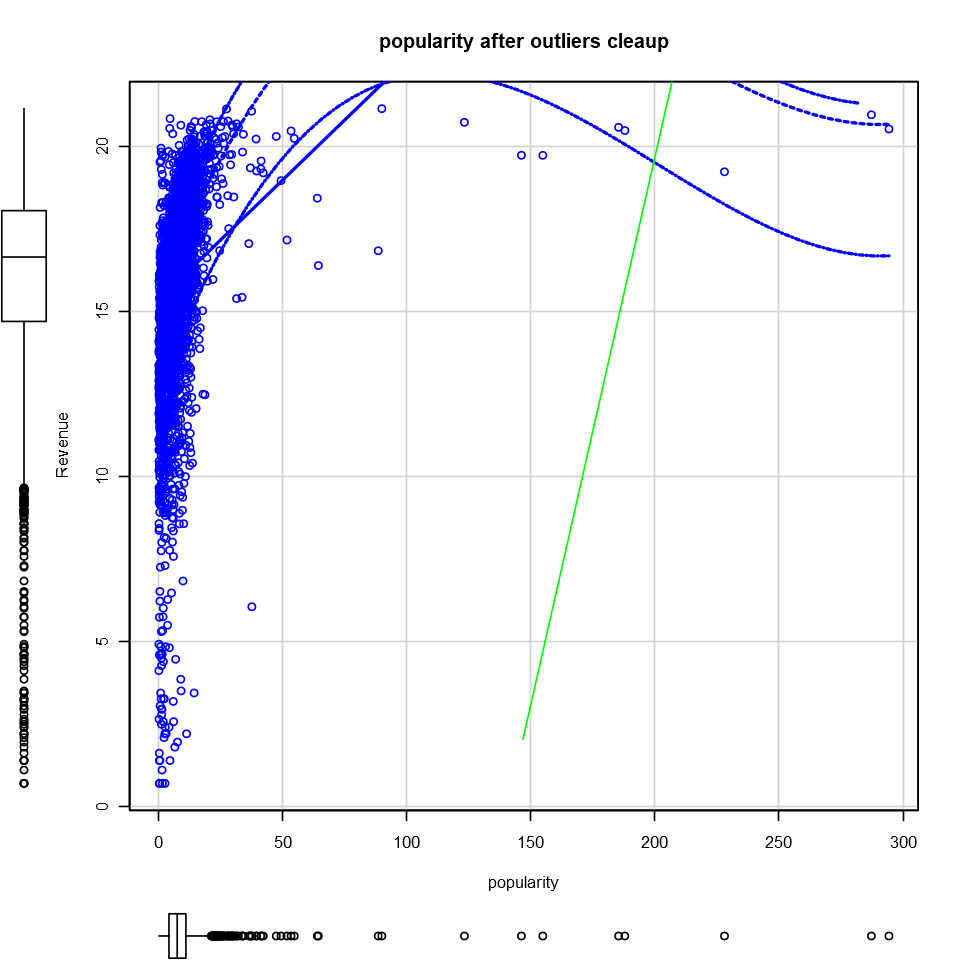

In [2]:
# list all the numeric variables
numerics<-str_trim(protocol$Feature.name[protocol$Value.type == "Numeric"])


outlierMatrix <- function(data,threshold=1.5) {
  vn <- names(data)
  outdata <- data.frame(row1=1:nrow(data))
  for(v in vn) {
    if(is.numeric(data[[v]])) {
      med<- median(data[[v]], na.rm = T)
      outlow <- quantile(data[[v]],probs = 0.25,na.rm = T)
      outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
      irq_level <- (outhigh - outlow) * threshold
      outlow <- outlow - irq_level
      outhigh <- outhigh +  irq_level
      mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
      outdata[v] <- mv
    } else {
      mv <- rep(0,nrow(data))
    }
  }
  outdata$row1 <- NULL
  return(outdata)
}
##########################################################################################
outlierMatrixWinsorizing <- function(data, v, threshold=1.5) {
  if(is.numeric(data[[v]])) {
    med<- median(data[[v]], na.rm = T)
    outlow <- quantile(data[[v]],probs = 0.25,na.rm = T)
    outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
    irq_level <- (outhigh - outlow) * threshold
    outlow <- outlow - irq_level
    outhigh <- outhigh +  irq_level

    data[data[[v]] < outlow, v]<-outlow

    data[data[[v]] > outhigh, v]<-outhigh

  } else {
    mv <- rep(0,nrow(data))
  }

  return(data)
}

##########################################################################################

movies_threshold<-2.0

out<-outlierMatrix(movies,threshold = movies_threshold)


ocmovies<-movies

options(repr.plot.width = 16, repr.plot.height = 16)
for(v in numerics) {
  #look on variable with some variability


    par(mfrow=c(1,1))
    #options(repr.plot.width = 8, repr.plot.height = 4)
    
    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, v,
         cex = 1.6, col = "black")

    par(mfrow=c(2,2))
    #options(repr.plot.width = 8, repr.plot.height = 8)
    hist(movies[[v]], freq = FALSE, xlab = v,  main = "With Outliers")

    barplot(table(movies[[v]]))

    #dev.new(width=5, height=4)
    scatterplot(movies[['revenue']] ~ movies[[v]] | out[[v]],
                xlab=v, ylab='Revenue',
                main=paste(v, "before outliers cleaup"))
    abline(lm(ocmovies$revenue ~ movies[[v]]), col = 'green')


    ##############################
    #Handle outliers
    ##############################


    if (protocol[v,"Outlier.treatment"] == "Leave"){
     
        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, paste("Do nothing for", v),
        cex = 1.6, col = "black")
        
    } else if (protocol[v,"Outlier.treatment"] == "Null"){

        #drop outlier value (replace by NA)
        ocmovies[which(out[v] == 1), v]<-NA

        
        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, paste("Null method on ", v),
           cex = 1.6, col = "black")

        par(mfrow=c(2,2))
        #options(repr.plot.width = 8, repr.plot.height = 8)
        hist(ocmovies[[v]], freq = FALSE, xlab = v,  main = "without Outliers")

        barplot(table(ocmovies[[v]]))

        #dev.new(width=5, height=4)
        scatterplot(ocmovies[['revenue']] ~ movies[[v]],
                  xlab=v, ylab="Revenue",
                  main=paste(v, "after outliers cleaup"))

        abline(lm(ocmovies$revenue ~ ocmovies[[v]]), col = 'green')
        
    } else if (protocol[v,"Outlier.treatment"] == "Log"){

        ocmovies[[v]]<-log(movies[[v]] + 1)
        
        
        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, paste("Log method on ", v),
           cex = 1.6, col = "black")
        par(mfrow=c(2,2))
        #options(repr.plot.width = 8, repr.plot.height = 8)
        hist(ocmovies[[v]], freq = FALSE, xlab = v,  main = "without Outliers")

        barplot(table(ocmovies[[v]]))

        scatterplot(ocmovies[['revenue']] ~ ocmovies[[v]],
                  xlab=v, ylab="Revenue",
                  main=paste(v, "after outliers cleaup"))
        abline(lm(ocmovies$revenue ~ ocmovies[[v]]), col = 'green')

    } else if (protocol[v,"Outlier.treatment"] == "Sqrt"){

        ocmovies[[v]]<-sqrt(movies[[v]] + 1)

        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, paste("Sqrt method on ", v),
           cex = 1.6, col = "black")
        par(mfrow=c(2,2))
        #options(repr.plot.width = 8, repr.plot.height = 8)
        hist(ocmovies[[v]], freq = FALSE, xlab = v,  main = "without Outliers")

        barplot(table(ocmovies[[v]]))

        scatterplot(ocmovies[['revenue']] ~ movies[[v]],
                  xlab=v, ylab="Revenue",
                  main=paste(v, "after outliers cleaup"))
        abline(lm(ocmovies$revenue ~ ocmovies[[v]]), col = 'green')


    } else if (protocol[v,"Outlier.treatment"] == "Winsorizing"){

        ocmovies<-outlierMatrixWinsorizing(movies, v, movies_threshold)
    
        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, paste("Winsorizing method on ", v),
           cex = 1.6, col = "black")

        par(mfrow=c(2,2))
        #options(repr.plot.width = 8, repr.plot.height = 8)
        hist(ocmovies[[v]], freq = FALSE, xlab = v,  main = "without Outliers")

        barplot(table(ocmovies[[v]]))

        scatterplot(ocmovies[['revenue']] ~ movies[[v]],
                  xlab=v, ylab="Revenue",
                  main=paste(v, "after outliers cleaup"))
        abline(lm(ocmovies$revenue ~ ocmovies[[v]]), col = 'green')


    } else if (protocol[v,"Outlier.treatment"] == "Categorize"){

        cat_num<-protocol[v,"Categories.num"]
        cat_num_vec<-unlist(strsplit(cat_num, ","))


        cat_names<-protocol[v,"Categories.names"]
        cat_names_vec<-unlist(strsplit(cat_names, ","))

        ocmovies[[v]]<-cut(movies[[v]], breaks = as.numeric(cat_num_vec), labels = cat_names_vec,
                                            right = FALSE)
        
        st<-sprintf("Numeric variable %s Was categorized, values were replaced with %s breaks \
                  with following names %s", v, cat_num, cat_names)
        
        par(mfrow=c(1,1))
        #options(repr.plot.width = 8, repr.plot.height = 4)
        plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
        text(x = 0.5, y = 0.5, st,
           cex = 1.6, col = "black")
        #options(repr.plot.width = 8, repr.plot.height = 8)
        par(mfrow=c(1,1))
        plot(ocmovies[[v]], xlab = v)
    }

}
par(mfrow=c(1,1))


In [23]:
dev.off()

Cairo 
    2